# Project Title: American Sign Language Detection System ✌👋✋

### Problem Description:

Communication is a fundamental human right, and yet, it remains a challenge for individuals who are deaf or hard of hearing. American Sign Language (ASL) is a visual language used by millions of people in the around the world. Developing an effective ASL detection system can greatly enhance communication and inclusivity for the deaf community. This project aims to create a robust ASL detection system capable of recognizing ASL signs and gestures in real-time.

### Motivation:

The motivation behind this project is to bridge the communication gap between the deaf and hearing communities, empowering individuals who rely on ASL as their primary means of communication. By building an accurate and accessible ASL detection system, we can facilitate better communication, education, and employment opportunities for the deaf and hard of hearing.

### Project Goals:

Develop a real-time ASL detection system capable of recognizing a wide range of ASL signs and gestures.
Create an intuitive user interface for seamless communication between deaf and hearing individuals.
Ensure the system is accessible and user-friendly, meeting the needs of the deaf community.
Continuously improve the system's accuracy and expand its sign recognition capabilities.
Scope:

This project will focus on the development and deployment of a prototype ASL detection system for everyday communication. It aims to recognize ASL signs and gestures from video streams, making it usable in various contexts, including video calls, educational settings, and social interactions.

### Approach:

The project will leverage computer vision and deep learning techniques to detect and recognize ASL signs and gestures from video input. It will involve data collection, preprocessing, feature extraction, model training, and real-time recognition. User feedback and collaboration with the ASL community will be essential throughout the development process.

### Expected Outcomes:

A functional ASL detection system capable of recognizing a substantial vocabulary of ASL signs.
An accessible user interface that facilitates real-time ASL communication.
Evaluation metrics demonstrating the system's accuracy and usability.
Documentation and educational materials for users and developers.
Impact:

The successful development and deployment of this ASL detection system can have a profound impact on the lives of individuals who rely on ASL. It can promote inclusivity, improve access to education and employment opportunities, and foster greater understanding and communication between the deaf and hearing communities.

# 1. Installing and importing necessary libraries

In [1]:
!pip install mediapipe

  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/cc/d8/c77d3f50bf59e28dd1d82ac5a07770a806522848227f7f00d932b34862bf/mediapipe-0.10.5-cp310-cp310-win_amd64.whl.metadata
  Using cached mediapipe-0.10.5-cp310-cp310-win_amd64.whl.metadata (9.8 kB)
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for flatbuffers>=2.0 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7a/94/a1615bac6706eb8a58fe08675b80a11b5463ef9591176dd3e572

In [21]:
# Importing all the necessary libraries 

import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import mediapipe as mp
import pickle
import os

# 2. Creating the data-set

In [22]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = './data'

### Plotting the landmarks using the mediapipe library

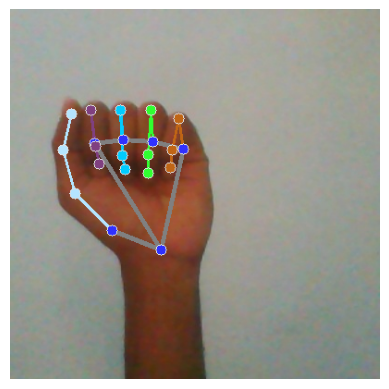

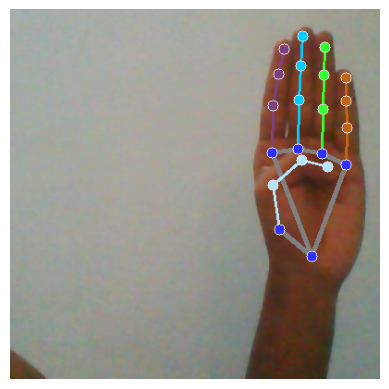

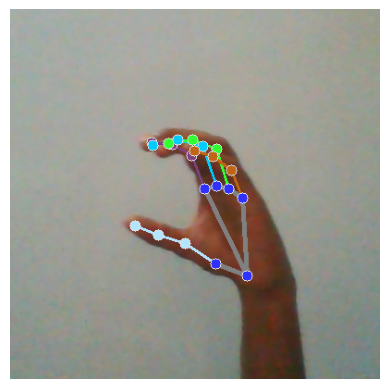

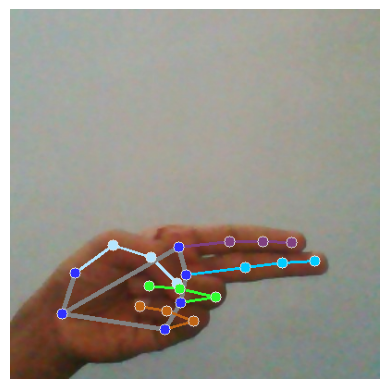

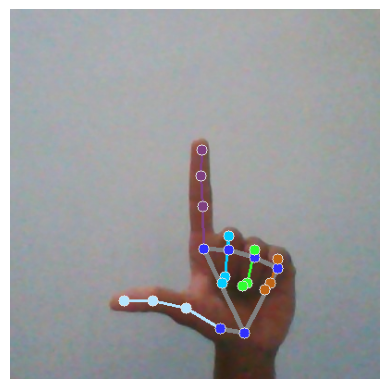

TypeError: 'NoneType' object is not iterable

In [3]:
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        results = hands.process(img_rgb)
        for hand_landmarks in results.multi_hand_landmarks:
                    mp_drawing.draw_landmarks(
                        img_rgb,
                        hand_landmarks,
                        mp_hands.HAND_CONNECTIONS,
                        mp_drawing_styles.get_default_hand_landmarks_style(),
                        mp_drawing_styles.get_default_hand_connections_style()
                    )
    
    plt.figure()
    plt.imshow(img_rgb)
    
    plt.axis('off')
    plt.show()

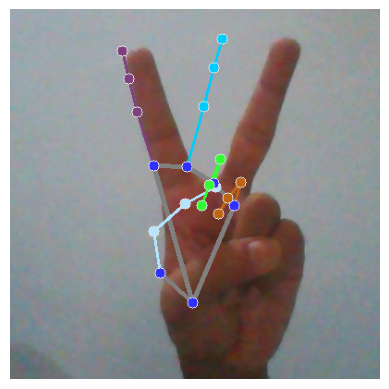

In [6]:
path = "./data/5/0.jpg"
img_x = cv2.imread(path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mp_drawing.draw_landmarks(
                        img_rgb,
                        hand_landmarks,
                        mp_hands.HAND_CONNECTIONS,
                        mp_drawing_styles.get_default_hand_landmarks_style(),
                        mp_drawing_styles.get_default_hand_connections_style()
)

hands.process(img_rgb)

plt.imshow(img_rgb)
plt.axis('off')  # Optionally, to turn off axis labels
plt.show()

In [8]:
os.listdir(DATA_DIR)

['0', '1', '2', '3', '4', '5', '6', '7']

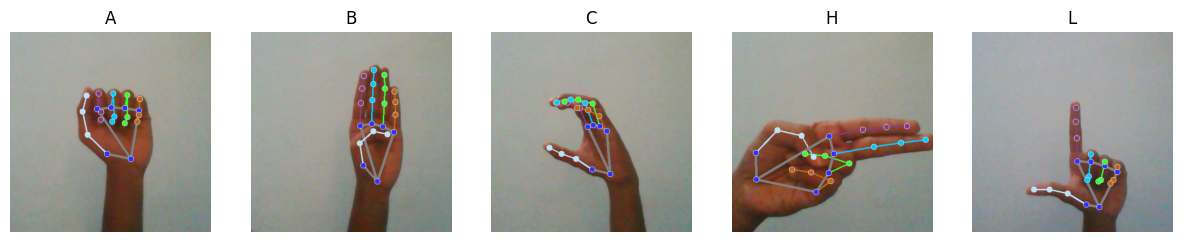

In [23]:
# Create a single big plot with three subplots side by side
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
titles = ["A", "B", "C", "H", "L", "V"]

# Iterate through the directory and process images
for i, dir_ in enumerate(os.listdir(DATA_DIR)):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                img_rgb,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style()
            )

    # Display images with landmarks in subplots
    axes[i].imshow(img_rgb)
    axes[i].set_title(titles[i])
    axes[i].axis('off')

# Show the single big plot with subplots side by side
plt.show()


In [9]:
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        results = hands.process(img_rgb)
        for hand_landmarks in results.multi_hand_landmarks:
            for i in range(len(hand_landmarks.landmark)):
                print(hand_landmarks.landmark[i])
    

x: 0.5862950682640076
y: 0.6365978121757507
z: -1.0922872206720058e-06

x: 0.4720335602760315
y: 0.6108102798461914
z: -0.04859074950218201

x: 0.37706464529037476
y: 0.5156986117362976
z: -0.06425032764673233

x: 0.353578120470047
y: 0.4011487662792206
z: -0.07932150363922119

x: 0.37757864594459534
y: 0.3176966905593872
z: -0.082147978246212

x: 0.4244252145290375
y: 0.3885466754436493
z: 0.010194014757871628

x: 0.42817994952201843
y: 0.3172879219055176
z: -0.05540414899587631

x: 0.4402209222316742
y: 0.40645503997802734
z: -0.0873863697052002

x: 0.4416957199573517
y: 0.4405469298362732
z: -0.09844721853733063

x: 0.49690642952919006
y: 0.38236552476882935
z: 0.009263761341571808

x: 0.5028784275054932
y: 0.31457290053367615
z: -0.058558814227581024

x: 0.5062174201011658
y: 0.42829641699790955
z: -0.07050971686840057

x: 0.49963104724884033
y: 0.45038139820098877
z: -0.05965358018875122

x: 0.5658109784126282
y: 0.38628527522087097
z: -0.0062802438624203205

x: 0.5768113732337952

x: 0.39271995425224304
y: 0.6433995366096497
z: -1.3531417835110915e-06

x: 0.26150742173194885
y: 0.5930997133255005
z: -0.03487371280789375

x: 0.16250506043434143
y: 0.48803746700286865
z: -0.048360586166381836

x: 0.13301286101341248
y: 0.3681168854236603
z: -0.0667296051979065

x: 0.15013623237609863
y: 0.27362698316574097
z: -0.07469887286424637

x: 0.22056198120117188
y: 0.35321083664894104
z: 0.022882992401719093

x: 0.20967033505439758
y: 0.262753427028656
z: -0.041696012020111084

x: 0.2174883782863617
y: 0.3593405783176422
z: -0.07626348733901978

x: 0.22760534286499023
y: 0.4151398539543152
z: -0.08836119621992111

x: 0.2965657711029053
y: 0.34574413299560547
z: 0.014742983505129814

x: 0.2859766483306885
y: 0.259976863861084
z: -0.04677024483680725

x: 0.28870436549186707
y: 0.3843604028224945
z: -0.057965222746133804

x: 0.2972775995731354
y: 0.43008413910865784
z: -0.04828605428338051

x: 0.3751874268054962
y: 0.3528401255607605
z: -0.0072824773378670216

x: 0.3691850006

x: 0.6208895444869995
y: 0.8166253566741943
z: -9.763575690158177e-07

x: 0.5187143087387085
y: 0.8069993257522583
z: -0.05253466218709946

x: 0.4328550398349762
y: 0.7032936215400696
z: -0.06566821038722992

x: 0.41270339488983154
y: 0.5947475433349609
z: -0.07536279410123825

x: 0.4277613162994385
y: 0.5210075974464417
z: -0.071452297270298

x: 0.470323383808136
y: 0.5833731293678284
z: 0.0022357937414199114

x: 0.4786500930786133
y: 0.5052305459976196
z: -0.0550263449549675

x: 0.491290807723999
y: 0.5940364003181458
z: -0.07681345194578171

x: 0.4872187376022339
y: 0.6222481727600098
z: -0.08164583146572113

x: 0.5355349779129028
y: 0.5823975801467896
z: 0.00683146296069026

x: 0.5480396747589111
y: 0.5142088532447815
z: -0.049980100244283676

x: 0.5505262613296509
y: 0.6215789318084717
z: -0.05245613679289818

x: 0.5364842414855957
y: 0.6260976791381836
z: -0.036926791071891785

x: 0.597849428653717
y: 0.5912084579467773
z: -0.0034427745267748833

x: 0.6133515238761902
y: 0.534115

x: 0.40122896432876587
y: 0.592147707939148
z: -1.43446914080414e-06

x: 0.26202288269996643
y: 0.5481770038604736
z: -0.03648856282234192

x: 0.15447217226028442
y: 0.44401127099990845
z: -0.04876900464296341

x: 0.11920216679573059
y: 0.31846708059310913
z: -0.06636600196361542

x: 0.14085373282432556
y: 0.21870484948158264
z: -0.07257311791181564

x: 0.2084069848060608
y: 0.30188238620758057
z: 0.031402528285980225

x: 0.19173207879066467
y: 0.20916834473609924
z: -0.036072973161935806

x: 0.20672649145126343
y: 0.31125062704086304
z: -0.07084325700998306

x: 0.2214086949825287
y: 0.3604064881801605
z: -0.08259296417236328

x: 0.2883133292198181
y: 0.28931885957717896
z: 0.023230377584695816

x: 0.2748960852622986
y: 0.20692132413387299
z: -0.043333251029253006

x: 0.2850918173789978
y: 0.33690524101257324
z: -0.05423245206475258

x: 0.29691848158836365
y: 0.3739793002605438
z: -0.042160049080848694

x: 0.3699513375759125
y: 0.2920234799385071
z: -0.0002953670918941498

x: 0.3577890

x: 0.563728392124176
y: 0.6487036943435669
z: -1.1692005728036747e-06

x: 0.4465893805027008
y: 0.620076060295105
z: -0.043096065521240234

x: 0.35183951258659363
y: 0.5227980017662048
z: -0.05622447282075882

x: 0.32850074768066406
y: 0.4116148352622986
z: -0.06966264545917511

x: 0.35277241468429565
y: 0.33182159066200256
z: -0.07136157900094986

x: 0.3971220552921295
y: 0.39730802178382874
z: 0.013326128013432026

x: 0.40224525332450867
y: 0.3235623836517334
z: -0.0477416105568409

x: 0.4149622321128845
y: 0.4150571823120117
z: -0.07728918641805649

x: 0.41573891043663025
y: 0.45283395051956177
z: -0.08731608837842941

x: 0.46808215975761414
y: 0.3907792270183563
z: 0.010245626792311668

x: 0.4769657850265503
y: 0.3201473355293274
z: -0.05360541492700577

x: 0.48330849409103394
y: 0.43563544750213623
z: -0.06393519043922424

x: 0.47547271847724915
y: 0.46467921137809753
z: -0.052615243941545486

x: 0.5363765358924866
y: 0.3943917751312256
z: -0.006494483444839716

x: 0.5480688810348

x: 0.40942978858947754
y: 0.5837814211845398
z: -1.4747674867976457e-06

x: 0.2664474844932556
y: 0.5306999683380127
z: -0.032265421003103256

x: 0.15938615798950195
y: 0.4195888638496399
z: -0.04582953453063965

x: 0.12588383257389069
y: 0.2959859073162079
z: -0.06568122655153275

x: 0.14555388689041138
y: 0.19718113541603088
z: -0.07590656727552414

x: 0.2211458683013916
y: 0.28469622135162354
z: 0.02063998207449913

x: 0.2103332132101059
y: 0.19190993905067444
z: -0.0483427532017231

x: 0.21878184378147125
y: 0.29060593247413635
z: -0.08546000719070435

x: 0.23111200332641602
y: 0.3457036018371582
z: -0.09883488714694977

x: 0.3008701503276825
y: 0.27586260437965393
z: 0.009076938964426517

x: 0.29065045714378357
y: 0.18978208303451538
z: -0.056529078632593155

x: 0.29672715067863464
y: 0.3140947222709656
z: -0.06818943470716476

x: 0.30923375487327576
y: 0.3574548363685608
z: -0.05855366215109825

x: 0.38326555490493774
y: 0.28039810061454773
z: -0.01616659015417099

x: 0.373624593

x: 0.4625742435455322
y: 0.5481102466583252
z: -1.401042709403555e-06

x: 0.3248803913593292
y: 0.5070734024047852
z: -0.036512888967990875

x: 0.2202160656452179
y: 0.3881906270980835
z: -0.04665859416127205

x: 0.19618915021419525
y: 0.25953391194343567
z: -0.0609169639647007

x: 0.2192106544971466
y: 0.163815438747406
z: -0.06475423276424408

x: 0.28336742520332336
y: 0.2541375160217285
z: 0.01997654139995575

x: 0.2781805396080017
y: 0.16623587906360626
z: -0.04537438228726387

x: 0.2872263789176941
y: 0.2688446640968323
z: -0.07780478149652481

x: 0.29717713594436646
y: 0.32135385274887085
z: -0.08853262662887573

x: 0.36353108286857605
y: 0.24578909575939178
z: 0.0113944998010993

x: 0.36051517724990845
y: 0.1637834757566452
z: -0.0529145747423172

x: 0.36321234703063965
y: 0.2910306453704834
z: -0.06176164001226425

x: 0.3706129491329193
y: 0.3320139944553375
z: -0.04956580698490143

x: 0.44378772377967834
y: 0.2523461580276489
z: -0.011333595961332321

x: 0.44203293323516846
y:

x: 0.5062229037284851
y: 0.5422402620315552
z: -1.2820997881135554e-06

x: 0.37495213747024536
y: 0.5038295984268188
z: -0.03621063008904457

x: 0.2708781361579895
y: 0.39583468437194824
z: -0.04670880734920502

x: 0.2461477369070053
y: 0.27142131328582764
z: -0.060478344559669495

x: 0.26333367824554443
y: 0.17870968580245972
z: -0.06280829012393951

x: 0.32834985852241516
y: 0.25983479619026184
z: 0.022911738604307175

x: 0.3223695158958435
y: 0.16947102546691895
z: -0.038429565727710724

x: 0.33568716049194336
y: 0.2648775577545166
z: -0.06898476183414459

x: 0.3460150957107544
y: 0.3178471624851227
z: -0.07888719439506531

x: 0.4085633158683777
y: 0.2505846321582794
z: 0.01547600794583559

x: 0.4042176604270935
y: 0.1691320240497589
z: -0.04498672112822533

x: 0.4097309708595276
y: 0.29119837284088135
z: -0.05410335958003998

x: 0.4141455292701721
y: 0.32866281270980835
z: -0.04253266379237175

x: 0.487946480512619
y: 0.2570321559906006
z: -0.005831326823681593

x: 0.48759746551513

x: 0.5298259258270264
y: 0.5518460273742676
z: -1.403144210598839e-06

x: 0.3944186866283417
y: 0.5080612897872925
z: -0.036811478435993195

x: 0.2927393317222595
y: 0.39993152022361755
z: -0.04851648211479187

x: 0.2659054696559906
y: 0.2722291946411133
z: -0.0650985985994339

x: 0.29169565439224243
y: 0.17729835212230682
z: -0.07085245102643967

x: 0.3469521999359131
y: 0.26476815342903137
z: 0.02770063653588295

x: 0.3452560305595398
y: 0.17513014376163483
z: -0.042883023619651794

x: 0.355623722076416
y: 0.2773127555847168
z: -0.07888424396514893

x: 0.36438700556755066
y: 0.32999223470687866
z: -0.09056952595710754

x: 0.4280335009098053
y: 0.25693202018737793
z: 0.018748760223388672

x: 0.42886775732040405
y: 0.17484131455421448
z: -0.05271520838141441

x: 0.43242254853248596
y: 0.3045434057712555
z: -0.06564714014530182

x: 0.4356703758239746
y: 0.34323227405548096
z: -0.0539504699409008

x: 0.508294403553009
y: 0.2622894048690796
z: -0.00529452646151185

x: 0.5110809803009033
y

x: 0.5645357370376587
y: 0.5728598237037659
z: -1.3686550346392323e-06

x: 0.4298297166824341
y: 0.5325687527656555
z: -0.03697705268859863

x: 0.3239571154117584
y: 0.4285498857498169
z: -0.05016898363828659

x: 0.2919333577156067
y: 0.3043264150619507
z: -0.06777725368738174

x: 0.31130874156951904
y: 0.2072155922651291
z: -0.07491835951805115

x: 0.3784322142601013
y: 0.2885657548904419
z: 0.025041721761226654

x: 0.37210512161254883
y: 0.19929534196853638
z: -0.04408041387796402

x: 0.383378267288208
y: 0.2988665699958801
z: -0.08098695427179337

x: 0.3941259980201721
y: 0.35625556111335754
z: -0.0935128852725029

x: 0.45841196179389954
y: 0.27769091725349426
z: 0.016189636662602425

x: 0.4546775221824646
y: 0.1941514015197754
z: -0.052634455263614655

x: 0.4606946110725403
y: 0.3217698633670807
z: -0.06617842614650726

x: 0.4652981758117676
y: 0.366293340921402
z: -0.0555378682911396

x: 0.5384460687637329
y: 0.2817755341529846
z: -0.00717467674985528

x: 0.535516083240509
y: 0.19

x: 0.6474951505661011
y: 0.6609160900115967
z: -1.6017606867535505e-06

x: 0.4991752505302429
y: 0.6127068996429443
z: -0.0443497896194458

x: 0.38654932379722595
y: 0.49514293670654297
z: -0.06115619093179703

x: 0.3552553653717041
y: 0.3583584427833557
z: -0.08201128989458084

x: 0.37666037678718567
y: 0.2547350525856018
z: -0.0910160019993782

x: 0.4468346834182739
y: 0.3447532057762146
z: 0.021434616297483444

x: 0.44825977087020874
y: 0.242404505610466
z: -0.05636920407414436

x: 0.4631076455116272
y: 0.3522385060787201
z: -0.10028093308210373

x: 0.470161110162735
y: 0.4144354462623596
z: -0.11716713756322861

x: 0.5348035097122192
y: 0.3369802236557007
z: 0.013089797459542751

x: 0.5344735383987427
y: 0.24455416202545166
z: -0.06298168003559113

x: 0.540700376033783
y: 0.3783937096595764
z: -0.08241656422615051

x: 0.5389695763587952
y: 0.4198313355445862
z: -0.0760776549577713

x: 0.6209526658058167
y: 0.34260818362236023
z: -0.011020914651453495

x: 0.6236953735351562
y: 0.250

x: 0.6891126036643982
y: 0.6622169613838196
z: -1.5672741255912115e-06

x: 0.5411373972892761
y: 0.6099328994750977
z: -0.042368579655885696

x: 0.43099626898765564
y: 0.48983532190322876
z: -0.05684672296047211

x: 0.40210580825805664
y: 0.35084599256515503
z: -0.0763472318649292

x: 0.4307442903518677
y: 0.249383807182312
z: -0.08357655256986618

x: 0.49596142768859863
y: 0.33973440527915955
z: 0.029698194935917854

x: 0.49565795063972473
y: 0.2396884262561798
z: -0.04599326103925705

x: 0.5065299868583679
y: 0.3502272069454193
z: -0.08636500686407089

x: 0.5121551156044006
y: 0.4055367708206177
z: -0.10048650950193405

x: 0.5815379023551941
y: 0.3347632586956024
z: 0.02063249610364437

x: 0.5831444263458252
y: 0.24227872490882874
z: -0.054954882711172104

x: 0.5854650735855103
y: 0.3795013129711151
z: -0.0714038535952568

x: 0.5831300020217896
y: 0.4182796776294708
z: -0.0613686703145504

x: 0.6660326719284058
y: 0.341881662607193
z: -0.004854678642004728

x: 0.6724816560745239
y: 0

x: 0.7242833375930786
y: 0.6714717149734497
z: -1.6082148022178444e-06

x: 0.5736060738563538
y: 0.6229923367500305
z: -0.049409717321395874

x: 0.46403396129608154
y: 0.49768996238708496
z: -0.06484505534172058

x: 0.43664056062698364
y: 0.35115599632263184
z: -0.08410949259996414

x: 0.46665626764297485
y: 0.24681338667869568
z: -0.08968763053417206

x: 0.5268109440803528
y: 0.34644192457199097
z: 0.027690082788467407

x: 0.5361723303794861
y: 0.24189770221710205
z: -0.05526996776461601

x: 0.5473353266716003
y: 0.3593398928642273
z: -0.09711749106645584

x: 0.5491189360618591
y: 0.4116591811180115
z: -0.11103953421115875

x: 0.6164025068283081
y: 0.3445036709308624
z: 0.020584415644407272

x: 0.625373125076294
y: 0.24773800373077393
z: -0.06520308554172516

x: 0.6255377531051636
y: 0.39314284920692444
z: -0.08318614214658737

x: 0.6158660054206848
y: 0.4261264204978943
z: -0.07192521542310715

x: 0.7016065120697021
y: 0.3517620265483856
z: -0.0044770813547074795

x: 0.71469831466674

x: 0.7408093214035034
y: 0.6720685958862305
z: -1.5418106613651616e-06

x: 0.5918788909912109
y: 0.620944082736969
z: -0.04891546815633774

x: 0.48132258653640747
y: 0.49891185760498047
z: -0.06704775989055634

x: 0.454872727394104
y: 0.3558892607688904
z: -0.08853007853031158

x: 0.48682957887649536
y: 0.2524303197860718
z: -0.09689025580883026

x: 0.547291100025177
y: 0.3467118740081787
z: 0.02302846498787403

x: 0.5532712936401367
y: 0.24383695423603058
z: -0.05675368383526802

x: 0.5648671388626099
y: 0.3587599992752075
z: -0.0980827733874321

x: 0.5678501725196838
y: 0.41337814927101135
z: -0.1125897616147995

x: 0.6364263892173767
y: 0.34350651502609253
z: 0.015306849032640457

x: 0.6434637904167175
y: 0.2492428869009018
z: -0.06597398966550827

x: 0.643879234790802
y: 0.3882793188095093
z: -0.08388213068246841

x: 0.6347782015800476
y: 0.42581111192703247
z: -0.07397287338972092

x: 0.7227914929389954
y: 0.3522631525993347
z: -0.009473882615566254

x: 0.7331756353378296
y: 0.264

x: 0.7507500052452087
y: 0.6718041896820068
z: -1.5401139989990043e-06

x: 0.6006951928138733
y: 0.6217241883277893
z: -0.05061652883887291

x: 0.4907315671443939
y: 0.4962742030620575
z: -0.06626985222101212

x: 0.4688761234283447
y: 0.349617063999176
z: -0.08515919744968414

x: 0.5028000473976135
y: 0.24497216939926147
z: -0.08975891768932343

x: 0.5555576682090759
y: 0.3401309847831726
z: 0.03142673894762993

x: 0.5711178183555603
y: 0.24518758058547974
z: -0.050959404557943344

x: 0.5793816447257996
y: 0.36099907755851746
z: -0.0943252369761467

x: 0.5785041451454163
y: 0.41522613167762756
z: -0.1095680370926857

x: 0.6486538052558899
y: 0.3385451138019562
z: 0.025089561939239502

x: 0.6630918979644775
y: 0.24865110218524933
z: -0.06096699833869934

x: 0.6593765616416931
y: 0.39315691590309143
z: -0.08136831969022751

x: 0.6476444602012634
y: 0.42905697226524353
z: -0.07182250171899796

x: 0.7375956773757935
y: 0.3500240743160248
z: 0.0008183730533346534

x: 0.7564370036125183
y: 0

x: 0.7550331950187683
y: 0.6361211538314819
z: -1.6388830772484653e-06

x: 0.6130903363227844
y: 0.5939767360687256
z: -0.05144771188497543

x: 0.503751277923584
y: 0.4615463614463806
z: -0.06364663690328598

x: 0.4852982759475708
y: 0.3097001910209656
z: -0.07789503037929535

x: 0.5192443132400513
y: 0.20900750160217285
z: -0.078213632106781

x: 0.5826854705810547
y: 0.3093565106391907
z: 0.023674607276916504

x: 0.5963529944419861
y: 0.21203379333019257
z: -0.05681607499718666

x: 0.5986700057983398
y: 0.331400990486145
z: -0.0939764603972435

x: 0.5932678580284119
y: 0.3780612051486969
z: -0.10562507063150406

x: 0.6732520461082458
y: 0.31179484724998474
z: 0.018132023513317108

x: 0.6878020167350769
y: 0.22601771354675293
z: -0.06257496774196625

x: 0.6770855188369751
y: 0.3733055591583252
z: -0.07448835670948029

x: 0.6603584885597229
y: 0.39773744344711304
z: -0.06045021489262581

x: 0.7561922073364258
y: 0.32505565881729126
z: -0.0059506152756512165

x: 0.7747781276702881
y: 0.2

x: 0.7393629550933838
y: 0.60369473695755
z: -1.4688775991089642e-06

x: 0.5936179161071777
y: 0.5519989728927612
z: -0.04909634217619896

x: 0.48737481236457825
y: 0.42354512214660645
z: -0.06262896955013275

x: 0.4687812924385071
y: 0.27735841274261475
z: -0.07924385368824005

x: 0.5027065873146057
y: 0.17369243502616882
z: -0.08241336047649384

x: 0.5583043694496155
y: 0.27360135316848755
z: 0.031866904348134995

x: 0.5696176290512085
y: 0.17684128880500793
z: -0.04543902352452278

x: 0.5738400220870972
y: 0.2892396152019501
z: -0.08510652184486389

x: 0.575630247592926
y: 0.34649205207824707
z: -0.09821322560310364

x: 0.6494764089584351
y: 0.27031654119491577
z: 0.026125533506274223

x: 0.6627242565155029
y: 0.17898201942443848
z: -0.054316937923431396

x: 0.6553720235824585
y: 0.3218236565589905
z: -0.0711984932422638

x: 0.6472208499908447
y: 0.3620644211769104
z: -0.05917052552103996

x: 0.73647141456604
y: 0.28270795941352844
z: 0.002723374404013157

x: 0.7549014091491699
y: 0

x: 0.7481417655944824
y: 0.5903103351593018
z: -1.6771830360085005e-06

x: 0.6011149287223816
y: 0.5353391766548157
z: -0.055386271327733994

x: 0.49088072776794434
y: 0.39721113443374634
z: -0.07144328951835632

x: 0.475492000579834
y: 0.2432587593793869
z: -0.09036757051944733

x: 0.5075696706771851
y: 0.13568948209285736
z: -0.0944545567035675

x: 0.5708198547363281
y: 0.23889018595218658
z: 0.025677144527435303

x: 0.5763605237007141
y: 0.14009645581245422
z: -0.05871891230344772

x: 0.578203558921814
y: 0.26368656754493713
z: -0.09929262846708298

x: 0.5767282247543335
y: 0.3133457899093628
z: -0.11250190436840057

x: 0.6633561849594116
y: 0.2393726259469986
z: 0.019833847880363464

x: 0.6746571063995361
y: 0.14735205471515656
z: -0.06761794537305832

x: 0.6613215804100037
y: 0.3022310435771942
z: -0.08297565579414368

x: 0.6480959057807922
y: 0.334272563457489
z: -0.0690203532576561

x: 0.751498818397522
y: 0.2541443109512329
z: -0.005388909485191107

x: 0.7691773176193237
y: 0.1

x: 0.7525948286056519
y: 0.5796374678611755
z: -1.696334265943733e-06

x: 0.6039396524429321
y: 0.5298017263412476
z: -0.055326204746961594

x: 0.4904983639717102
y: 0.3864966630935669
z: -0.0696401372551918

x: 0.47165951132774353
y: 0.23368346691131592
z: -0.08618845045566559

x: 0.5034420490264893
y: 0.12574145197868347
z: -0.08900196850299835

x: 0.5685709118843079
y: 0.23314017057418823
z: 0.020524075254797935

x: 0.5849581360816956
y: 0.130636528134346
z: -0.06496725231409073

x: 0.5904286503791809
y: 0.25276124477386475
z: -0.10609127581119537

x: 0.5857493281364441
y: 0.3085739314556122
z: -0.11946477741003036

x: 0.6650134921073914
y: 0.23303237557411194
z: 0.014966079965233803

x: 0.6822516322135925
y: 0.13718242943286896
z: -0.07226821035146713

x: 0.6729834079742432
y: 0.29450300335884094
z: -0.08674592524766922

x: 0.6573683619499207
y: 0.33341526985168457
z: -0.07233736664056778

x: 0.7534865736961365
y: 0.24875527620315552
z: -0.00975525751709938

x: 0.7786662578582764
y

x: 0.5422224998474121
y: 0.6622405648231506
z: -1.2001657978544245e-06

x: 0.4249776303768158
y: 0.63286292552948
z: -0.0443887785077095

x: 0.33034926652908325
y: 0.5316852927207947
z: -0.05908589065074921

x: 0.3030846118927002
y: 0.41926419734954834
z: -0.07418195903301239

x: 0.32322585582733154
y: 0.3378628194332123
z: -0.07734626531600952

x: 0.37735408544540405
y: 0.40671756863594055
z: 0.010497204028069973

x: 0.38072529435157776
y: 0.33124685287475586
z: -0.05236450582742691

x: 0.39379164576530457
y: 0.4241868853569031
z: -0.08155205100774765

x: 0.3951359689235687
y: 0.4627700448036194
z: -0.09087938815355301

x: 0.44796013832092285
y: 0.40147727727890015
z: 0.007424669805914164

x: 0.45312070846557617
y: 0.3298114240169525
z: -0.0569380484521389

x: 0.4598037004470825
y: 0.4462089240550995
z: -0.06622102111577988

x: 0.4520638883113861
y: 0.4725024402141571
z: -0.05441507697105408

x: 0.5169033408164978
y: 0.4056156277656555
z: -0.009645170532166958

x: 0.5251656174659729
y

x: 0.7104367613792419
y: 0.5856075882911682
z: -1.7624039401198388e-06

x: 0.5606659054756165
y: 0.5294262766838074
z: -0.055736880749464035

x: 0.44427627325057983
y: 0.3844565153121948
z: -0.07086462527513504

x: 0.42376482486724854
y: 0.22535867989063263
z: -0.08991806954145432

x: 0.4561935067176819
y: 0.11197277903556824
z: -0.09466320276260376

x: 0.52528315782547
y: 0.22749629616737366
z: 0.025227000936865807

x: 0.5314185619354248
y: 0.11839118599891663
z: -0.06160879507660866

x: 0.543351948261261
y: 0.24248148500919342
z: -0.10200659185647964

x: 0.5428922176361084
y: 0.29425787925720215
z: -0.11434641480445862

x: 0.621940016746521
y: 0.22514255344867706
z: 0.01897915080189705

x: 0.6307282447814941
y: 0.12694118916988373
z: -0.07015635818243027

x: 0.628082275390625
y: 0.28623661398887634
z: -0.08351077139377594

x: 0.6159738302230835
y: 0.32334646582603455
z: -0.06742754578590393

x: 0.7126679420471191
y: 0.23742619156837463
z: -0.007480002008378506

x: 0.7279861569404602


x: 0.6826897859573364
y: 0.5851494073867798
z: -1.7840139889813145e-06

x: 0.5312010645866394
y: 0.5347051024436951
z: -0.05796757712960243

x: 0.4077277183532715
y: 0.3883621096611023
z: -0.07349232584238052

x: 0.382051557302475
y: 0.22742202877998352
z: -0.09112352132797241

x: 0.41206052899360657
y: 0.11112716794013977
z: -0.09425290673971176

x: 0.4901481568813324
y: 0.22610898315906525
z: 0.015429890714585781

x: 0.49942469596862793
y: 0.11782999336719513
z: -0.07108298689126968

x: 0.5057963728904724
y: 0.2470993548631668
z: -0.11042388528585434

x: 0.5045838356018066
y: 0.301273375749588
z: -0.12308192253112793

x: 0.5873663425445557
y: 0.2228284776210785
z: 0.010428914800286293

x: 0.5965287685394287
y: 0.12441636621952057
z: -0.07686274498701096

x: 0.5893003940582275
y: 0.2876625061035156
z: -0.08772986382246017

x: 0.5807475447654724
y: 0.32414400577545166
z: -0.07132765650749207

x: 0.6789253950119019
y: 0.23650023341178894
z: -0.014286735095083714

x: 0.6949141025543213
y

x: 0.6447435617446899
y: 0.5996818542480469
z: -1.7944523733604e-06

x: 0.49117740988731384
y: 0.54578697681427
z: -0.05718003213405609

x: 0.36912885308265686
y: 0.40262922644615173
z: -0.0751318633556366

x: 0.34725403785705566
y: 0.24484394490718842
z: -0.09572069346904755

x: 0.3756731152534485
y: 0.13167543709278107
z: -0.10115112364292145

x: 0.44447314739227295
y: 0.23132744431495667
z: 0.01635267212986946

x: 0.44105789065361023
y: 0.1333404928445816
z: -0.07291236519813538

x: 0.45234715938568115
y: 0.2683549225330353
z: -0.11321452260017395

x: 0.46102428436279297
y: 0.31430232524871826
z: -0.12605556845664978

x: 0.5425215363502502
y: 0.22819483280181885
z: 0.008668556809425354

x: 0.5452255010604858
y: 0.1350579857826233
z: -0.08077438920736313

x: 0.5391042232513428
y: 0.2978738248348236
z: -0.0918651670217514

x: 0.5365003347396851
y: 0.321892648935318
z: -0.07476405799388885

x: 0.6394286751747131
y: 0.240024596452713
z: -0.018886571750044823

x: 0.6479877233505249
y: 0.

x: 0.5761706233024597
y: 0.6109309196472168
z: -1.7317024685326032e-06

x: 0.41403770446777344
y: 0.5561455488204956
z: -0.04783662408590317

x: 0.29346632957458496
y: 0.4166366159915924
z: -0.0632544532418251

x: 0.26738667488098145
y: 0.26318731904029846
z: -0.08378487825393677

x: 0.28915056586265564
y: 0.14863920211791992
z: -0.09109284728765488

x: 0.36952391266822815
y: 0.2515508234500885
z: 0.02213897556066513

x: 0.3644634783267975
y: 0.1446513533592224
z: -0.06272953003644943

x: 0.3727685511112213
y: 0.2683093845844269
z: -0.10529575496912003

x: 0.38091129064559937
y: 0.33326849341392517
z: -0.11888351291418076

x: 0.4654847979545593
y: 0.24554112553596497
z: 0.01256867591291666

x: 0.46439820528030396
y: 0.14705166220664978
z: -0.07069791853427887

x: 0.4626336097717285
y: 0.30158543586730957
z: -0.08499298989772797

x: 0.4625779986381531
y: 0.3484755754470825
z: -0.071255624294281

x: 0.5626060962677002
y: 0.25468331575393677
z: -0.014864603988826275

x: 0.5634219646453857

x: 0.5402086973190308
y: 0.6600751876831055
z: -1.8009593532042345e-06

x: 0.37575218081474304
y: 0.5902245044708252
z: -0.03840048983693123

x: 0.2587309777736664
y: 0.4521002173423767
z: -0.053010500967502594

x: 0.22919045388698578
y: 0.3005840480327606
z: -0.0758010596036911

x: 0.25661247968673706
y: 0.18589039146900177
z: -0.08645037561655045

x: 0.3389022648334503
y: 0.28995373845100403
z: 0.03192123770713806

x: 0.32842957973480225
y: 0.18164575099945068
z: -0.049533866345882416

x: 0.3348127007484436
y: 0.31029412150382996
z: -0.09343244880437851

x: 0.3482832610607147
y: 0.37775546312332153
z: -0.10972058773040771

x: 0.4340180456638336
y: 0.28093892335891724
z: 0.018295733258128166

x: 0.42615944147109985
y: 0.18381842970848083
z: -0.06181085482239723

x: 0.4241170585155487
y: 0.33907949924468994
z: -0.07883139699697495

x: 0.4342201054096222
y: 0.3875967562198639
z: -0.06951585412025452

x: 0.5328310132026672
y: 0.28965795040130615
z: -0.011979728937149048

x: 0.52643752098

x: 0.5494624972343445
y: 0.6655777096748352
z: -1.805707029234327e-06

x: 0.3885729908943176
y: 0.6047048568725586
z: -0.043384213000535965

x: 0.26502400636672974
y: 0.4677119553089142
z: -0.05983956903219223

x: 0.23013797402381897
y: 0.31486907601356506
z: -0.08313953131437302

x: 0.2600712776184082
y: 0.19606661796569824
z: -0.09333151578903198

x: 0.3407345116138458
y: 0.2991814911365509
z: 0.028472688049077988

x: 0.3250187635421753
y: 0.18887047469615936
z: -0.05505547672510147

x: 0.3340860903263092
y: 0.31641215085983276
z: -0.09692121297121048

x: 0.34943732619285583
y: 0.37636736035346985
z: -0.1114111989736557

x: 0.4344491958618164
y: 0.2896783947944641
z: 0.016904659569263458

x: 0.4222525954246521
y: 0.19210563600063324
z: -0.06511710584163666

x: 0.42286840081214905
y: 0.3504474461078644
z: -0.07784240692853928

x: 0.4364827275276184
y: 0.3910147547721863
z: -0.0641089379787445

x: 0.5320452451705933
y: 0.2970734238624573
z: -0.01254600752145052

x: 0.5216468572616577
y

x: 0.5221623182296753
y: 0.686001181602478
z: -1.8354375015405822e-06

x: 0.36384519934654236
y: 0.617080807685852
z: -0.046037521213293076

x: 0.24279063940048218
y: 0.4813225269317627
z: -0.06462067365646362

x: 0.2058991640806198
y: 0.32982873916625977
z: -0.0895615816116333

x: 0.23178304731845856
y: 0.21181634068489075
z: -0.10060487687587738

x: 0.31855228543281555
y: 0.3132030665874481
z: 0.026209449395537376

x: 0.3054935932159424
y: 0.1999025046825409
z: -0.058348994702100754

x: 0.3146108090877533
y: 0.3288533091545105
z: -0.1015198603272438

x: 0.3286976218223572
y: 0.39044010639190674
z: -0.11677367985248566

x: 0.41292500495910645
y: 0.305166631937027
z: 0.01567462459206581

x: 0.40027695894241333
y: 0.20471788942813873
z: -0.06715220957994461

x: 0.40012499690055847
y: 0.36042520403862
z: -0.0814608708024025

x: 0.4111601412296295
y: 0.4001429080963135
z: -0.06949256360530853

x: 0.5096132755279541
y: 0.31491488218307495
z: -0.01294440682977438

x: 0.4995163083076477
y: 0

x: 0.4885556697845459
y: 0.6917071342468262
z: -1.8763370235319599e-06

x: 0.3285803496837616
y: 0.6164668202400208
z: -0.037816185504198074

x: 0.2109021246433258
y: 0.48434269428253174
z: -0.056502338498830795

x: 0.17381232976913452
y: 0.3388032019138336
z: -0.0838254988193512

x: 0.1973533034324646
y: 0.2220446765422821
z: -0.09918160736560822

x: 0.2867211401462555
y: 0.32039448618888855
z: 0.024780787527561188

x: 0.2687411606311798
y: 0.20702213048934937
z: -0.061087511479854584

x: 0.27900877594947815
y: 0.3333576023578644
z: -0.10703875869512558

x: 0.2964106798171997
y: 0.399233341217041
z: -0.1241045817732811

x: 0.37835660576820374
y: 0.3127954304218292
z: 0.009390299208462238

x: 0.3605167269706726
y: 0.2114202231168747
z: -0.07416193932294846

x: 0.3638394773006439
y: 0.36599504947662354
z: -0.09061742573976517

x: 0.3801780939102173
y: 0.40928277373313904
z: -0.080619677901268

x: 0.47470319271087646
y: 0.3206562399864197
z: -0.022555463016033173

x: 0.4598453640937805
y

x: 0.7331773042678833
y: 0.8205513954162598
z: -9.272254146708292e-07

x: 0.6324587464332581
y: 0.816398561000824
z: -0.05303218960762024

x: 0.5444607734680176
y: 0.7123823761940002
z: -0.06551404297351837

x: 0.5242272615432739
y: 0.6041601896286011
z: -0.07324573397636414

x: 0.542461097240448
y: 0.5325002670288086
z: -0.06761085987091064

x: 0.5837974548339844
y: 0.5933980345726013
z: -0.0007093552849255502

x: 0.5981395244598389
y: 0.5251343250274658
z: -0.05373299494385719

x: 0.6103010177612305
y: 0.6114150285720825
z: -0.07428587228059769

x: 0.6010621190071106
y: 0.6345295310020447
z: -0.0805191695690155

x: 0.6495823860168457
y: 0.5890403985977173
z: 0.004208687227219343

x: 0.6639595627784729
y: 0.5299931168556213
z: -0.05131400376558304

x: 0.6684355139732361
y: 0.6339761018753052
z: -0.05542140081524849

x: 0.6534809470176697
y: 0.6387500762939453
z: -0.042588647454977036

x: 0.7118635177612305
y: 0.596459150314331
z: -0.004786275792866945

x: 0.7307960391044617
y: 0.54500

x: 0.4043251574039459
y: 0.820702314376831
z: -1.6697865703463322e-06

x: 0.26375824213027954
y: 0.7595400810241699
z: -0.03974243998527527

x: 0.15666142106056213
y: 0.6346376538276672
z: -0.051144957542419434

x: 0.12839028239250183
y: 0.5016624331474304
z: -0.06856156140565872

x: 0.151450976729393
y: 0.40272825956344604
z: -0.07194872945547104

x: 0.22508026659488678
y: 0.48006340861320496
z: 0.035519979894161224

x: 0.21174034476280212
y: 0.39246028661727905
z: -0.039659079164266586

x: 0.22131584584712982
y: 0.5117068290710449
z: -0.07523506134748459

x: 0.23321406543254852
y: 0.5467349290847778
z: -0.08742442727088928

x: 0.3126773238182068
y: 0.47766226530075073
z: 0.02477871999144554

x: 0.29948776960372925
y: 0.40028834342956543
z: -0.05073968693614006

x: 0.29761868715286255
y: 0.5391862392425537
z: -0.061483025550842285

x: 0.3063357174396515
y: 0.5483282804489136
z: -0.04828658327460289

x: 0.4017241895198822
y: 0.48860830068588257
z: -0.0034674524795264006

x: 0.389881283

x: 0.37048107385635376
y: 0.905224621295929
z: -1.613443032510986e-06

x: 0.23611274361610413
y: 0.8434871435165405
z: -0.04326924309134483

x: 0.13621562719345093
y: 0.7207307815551758
z: -0.057177357375621796

x: 0.10698512196540833
y: 0.5895158648490906
z: -0.07581011950969696

x: 0.13261768221855164
y: 0.48966163396835327
z: -0.08107654750347137

x: 0.2100266069173813
y: 0.5715934634208679
z: 0.027760935947299004

x: 0.19608086347579956
y: 0.4824245870113373
z: -0.04398270696401596

x: 0.2003236562013626
y: 0.5986623764038086
z: -0.07838854938745499

x: 0.2116418480873108
y: 0.63176029920578
z: -0.0918000116944313

x: 0.29329347610473633
y: 0.5711371898651123
z: 0.019042201340198517

x: 0.2821187973022461
y: 0.4891308844089508
z: -0.0539938248693943

x: 0.27449265122413635
y: 0.6290048956871033
z: -0.0648210272192955

x: 0.282796174287796
y: 0.641274094581604
z: -0.05361754447221756

x: 0.37723201513290405
y: 0.5855408906936646
z: -0.006573768798261881

x: 0.37097764015197754
y: 0.

x: 0.3846885561943054
y: 0.9454350471496582
z: -1.61513787588774e-06

x: 0.25333911180496216
y: 0.8834198713302612
z: -0.04821858927607536

x: 0.1574944108724594
y: 0.7549999952316284
z: -0.06116073206067085

x: 0.1382589191198349
y: 0.6248946785926819
z: -0.07678180187940598

x: 0.16930782794952393
y: 0.5321436524391174
z: -0.07725200802087784

x: 0.22968769073486328
y: 0.60055011510849
z: 0.02939099259674549

x: 0.2186494618654251
y: 0.5264385342597961
z: -0.03776643052697182

x: 0.2249029576778412
y: 0.6445193886756897
z: -0.06954646110534668

x: 0.23527680337429047
y: 0.6643528938293457
z: -0.08316702395677567

x: 0.3144161105155945
y: 0.6021959781646729
z: 0.023732073605060577

x: 0.30300819873809814
y: 0.5347959399223328
z: -0.04710931330919266

x: 0.29522550106048584
y: 0.6704993844032288
z: -0.05743987858295441

x: 0.30513888597488403
y: 0.669918417930603
z: -0.0458994060754776

x: 0.3989350199699402
y: 0.6192895770072937
z: 0.0007149075390771031

x: 0.392316073179245
y: 0.5454

x: 0.36966949701309204
y: 0.945415198802948
z: -1.6137173588504083e-06

x: 0.24202263355255127
y: 0.8901389837265015
z: -0.04586604982614517

x: 0.14349091053009033
y: 0.7660397291183472
z: -0.05871517211198807

x: 0.11948955804109573
y: 0.6387931704521179
z: -0.07544005662202835

x: 0.1476258635520935
y: 0.5448361039161682
z: -0.07694993168115616

x: 0.21489368379116058
y: 0.609194815158844
z: 0.031169742345809937

x: 0.20324485003948212
y: 0.5280508995056152
z: -0.04229264333844185

x: 0.21071572601795197
y: 0.6452829837799072
z: -0.0761490985751152

x: 0.22089092433452606
y: 0.6765775680541992
z: -0.08763184398412704

x: 0.29819896817207336
y: 0.6102980971336365
z: 0.024675317108631134

x: 0.2868674695491791
y: 0.5431926846504211
z: -0.05061549320816994

x: 0.28225240111351013
y: 0.6795300245285034
z: -0.06104838103055954

x: 0.2893980145454407
y: 0.6833183765411377
z: -0.0473988801240921

x: 0.3820100426673889
y: 0.6269134879112244
z: 0.00022375011758413166

x: 0.37324807047843933


x: 0.4182431697845459
y: 0.8867499828338623
z: -1.5191105831036111e-06

x: 0.291283518075943
y: 0.8464959263801575
z: -0.042701076716184616

x: 0.18950404226779938
y: 0.7282320261001587
z: -0.05305463820695877

x: 0.16644811630249023
y: 0.6044865250587463
z: -0.06581227481365204

x: 0.19218358397483826
y: 0.5180038809776306
z: -0.06423602998256683

x: 0.25459176301956177
y: 0.5888774991035461
z: 0.01907939650118351

x: 0.25141027569770813
y: 0.5061990022659302
z: -0.048361215740442276

x: 0.26197898387908936
y: 0.6182993650436401
z: -0.07696393877267838

x: 0.26506859064102173
y: 0.6444815397262573
z: -0.08660425990819931

x: 0.33607739210128784
y: 0.5889415740966797
z: 0.011675582267343998

x: 0.33530178666114807
y: 0.5171672701835632
z: -0.05791555717587471

x: 0.3304848372936249
y: 0.6470930576324463
z: -0.06558573246002197

x: 0.3271068334579468
y: 0.6523461937904358
z: -0.05250329151749611

x: 0.41484934091567993
y: 0.6010823249816895
z: -0.011356674134731293

x: 0.416923820972442

x: 0.512373685836792
y: 0.8899091482162476
z: -1.4971951713960152e-06

x: 0.38898134231567383
y: 0.8353908061981201
z: -0.05342111364006996

x: 0.29554951190948486
y: 0.7166203260421753
z: -0.06983531266450882

x: 0.2771775722503662
y: 0.5873426198959351
z: -0.0871632993221283

x: 0.31148087978363037
y: 0.5007379651069641
z: -0.08932016044855118

x: 0.36176764965057373
y: 0.5738202929496765
z: 0.02096634916961193

x: 0.3694040775299072
y: 0.4904603958129883
z: -0.051108743995428085

x: 0.3693760633468628
y: 0.6067041754722595
z: -0.08382303267717361

x: 0.36838287115097046
y: 0.6353005170822144
z: -0.09509284794330597

x: 0.4438728094100952
y: 0.5806974768638611
z: 0.01893100142478943

x: 0.45228296518325806
y: 0.5066640377044678
z: -0.05601678416132927

x: 0.4381645917892456
y: 0.6403539776802063
z: -0.06694095581769943

x: 0.43071383237838745
y: 0.6431471705436707
z: -0.05423222482204437

x: 0.5215460062026978
y: 0.5969852805137634
z: -0.0007754936232231557

x: 0.5332986116409302
y: 

x: 0.554029643535614
y: 0.8839636445045471
z: -1.4657638303106069e-06

x: 0.42748963832855225
y: 0.8223419189453125
z: -0.05226931348443031

x: 0.33748966455459595
y: 0.7057809829711914
z: -0.06841882318258286

x: 0.3223094344139099
y: 0.5775092840194702
z: -0.08662410080432892

x: 0.3613046109676361
y: 0.49062222242355347
z: -0.08958357572555542

x: 0.405912846326828
y: 0.5622490048408508
z: 0.033153656870126724

x: 0.41872572898864746
y: 0.48663443326950073
z: -0.03713104873895645

x: 0.4203992784023285
y: 0.598537802696228
z: -0.07003011554479599

x: 0.4171271026134491
y: 0.6221976280212402
z: -0.08167184144258499

x: 0.48786622285842896
y: 0.5691448450088501
z: 0.030634315684437752

x: 0.5023020505905151
y: 0.5000454783439636
z: -0.044614605605602264

x: 0.49011024832725525
y: 0.632073700428009
z: -0.05747007206082344

x: 0.4779932200908661
y: 0.6323180198669434
z: -0.04545758292078972

x: 0.5653751492500305
y: 0.585908055305481
z: 0.009904563426971436

x: 0.5820625424385071
y: 0.5

x: 0.5869576930999756
y: 0.8817200660705566
z: -1.52083111970569e-06

x: 0.46730536222457886
y: 0.8232544660568237
z: -0.05970831960439682

x: 0.37366247177124023
y: 0.705470085144043
z: -0.08166298270225525

x: 0.35650452971458435
y: 0.5755026340484619
z: -0.10408534109592438

x: 0.3993155360221863
y: 0.48700737953186035
z: -0.11046966910362244

x: 0.43663376569747925
y: 0.5594354867935181
z: 0.017739199101924896

x: 0.44277235865592957
y: 0.47844094038009644
z: -0.05548044294118881

x: 0.44932541251182556
y: 0.5957427620887756
z: -0.08688070625066757

x: 0.45023635029792786
y: 0.6264938116073608
z: -0.09672285616397858

x: 0.5188479423522949
y: 0.5641180872917175
z: 0.01777043379843235

x: 0.5288360118865967
y: 0.4943627715110779
z: -0.05926264822483063

x: 0.5215351581573486
y: 0.6306052207946777
z: -0.06865479052066803

x: 0.5121486783027649
y: 0.6321188807487488
z: -0.053782448172569275

x: 0.5981853604316711
y: 0.5795970559120178
z: -0.0007501387153752148

x: 0.6140866279602051
y

x: 0.7607125639915466
y: 0.809514045715332
z: -8.932479431678075e-07

x: 0.6564098000526428
y: 0.7975167036056519
z: -0.05846337974071503

x: 0.5714532732963562
y: 0.6893116235733032
z: -0.07324545830488205

x: 0.5510502457618713
y: 0.5757222175598145
z: -0.08284148573875427

x: 0.5705177187919617
y: 0.49968498945236206
z: -0.07846308499574661

x: 0.6070091128349304
y: 0.5754103660583496
z: 0.0002185374905820936

x: 0.6254028677940369
y: 0.5002553462982178
z: -0.055670276284217834

x: 0.6394295692443848
y: 0.5877220034599304
z: -0.07735631614923477

x: 0.629467785358429
y: 0.6170167922973633
z: -0.08276008814573288

x: 0.6731875538825989
y: 0.5705353617668152
z: 0.007948211394250393

x: 0.6941361427307129
y: 0.5060324668884277
z: -0.04980097711086273

x: 0.6999183297157288
y: 0.6107208132743835
z: -0.05522684380412102

x: 0.6804900765419006
y: 0.6206507086753845
z: -0.042174484580755234

x: 0.7348232269287109
y: 0.5775264501571655
z: 0.0008624992915429175

x: 0.7587020993232727
y: 0.52

x: 0.6636557579040527
y: 0.675514817237854
z: -1.515542976449069e-06

x: 0.525556206703186
y: 0.6179532408714294
z: -0.04139203205704689

x: 0.4269576370716095
y: 0.5099241137504578
z: -0.05498027801513672

x: 0.40576377511024475
y: 0.38436102867126465
z: -0.07304958999156952

x: 0.4343414306640625
y: 0.2940754294395447
z: -0.07837705314159393

x: 0.4921208322048187
y: 0.3688296377658844
z: 0.03253883123397827

x: 0.4977457821369171
y: 0.28179416060447693
z: -0.040655482560396194

x: 0.5078510642051697
y: 0.39060333371162415
z: -0.08045806735754013

x: 0.5089196562767029
y: 0.43338853120803833
z: -0.09574580192565918

x: 0.5773869752883911
y: 0.370161771774292
z: 0.024315303191542625

x: 0.5823161005973816
y: 0.2918761372566223
z: -0.051718857139348984

x: 0.5804685354232788
y: 0.41937997937202454
z: -0.07219944894313812

x: 0.571448802947998
y: 0.44163888692855835
z: -0.06637419015169144

x: 0.6591150164604187
y: 0.38202399015426636
z: 0.00017748885147739202

x: 0.6670495271682739
y: 

x: 0.4840225875377655
y: 0.7045086026191711
z: -1.2461030109989224e-06

x: 0.3617119789123535
y: 0.6618967056274414
z: -0.04050513729453087

x: 0.2671736478805542
y: 0.5634667873382568
z: -0.05600979924201965

x: 0.24315541982650757
y: 0.45115095376968384
z: -0.07353959232568741

x: 0.2626529037952423
y: 0.36801356077194214
z: -0.07930686324834824

x: 0.3205700218677521
y: 0.4348606765270233
z: 0.014139833860099316

x: 0.31601402163505554
y: 0.3548122048377991
z: -0.051065318286418915

x: 0.3265082836151123
y: 0.4510380029678345
z: -0.08272874355316162

x: 0.33277249336242676
y: 0.4904130697250366
z: -0.0933925211429596

x: 0.39278292655944824
y: 0.43021681904792786
z: 0.008441879414021969

x: 0.3910428285598755
y: 0.35357174277305603
z: -0.05648227035999298

x: 0.39415401220321655
y: 0.47312048077583313
z: -0.06625428050756454

x: 0.39374804496765137
y: 0.49899476766586304
z: -0.05479598417878151

x: 0.46518099308013916
y: 0.4357770085334778
z: -0.011408901773393154

x: 0.465935587882

x: 0.7603704929351807
y: 0.7937840223312378
z: -9.03426666809537e-07

x: 0.6581894755363464
y: 0.7847428321838379
z: -0.053743988275527954

x: 0.5717674493789673
y: 0.6815453767776489
z: -0.0671396404504776

x: 0.5515890121459961
y: 0.5729636549949646
z: -0.07665146887302399

x: 0.5684889554977417
y: 0.49966782331466675
z: -0.07250959426164627

x: 0.6081860661506653
y: 0.5627188086509705
z: 0.004916508682072163

x: 0.6217893362045288
y: 0.4908662438392639
z: -0.04984540119767189

x: 0.6364360451698303
y: 0.5764690637588501
z: -0.07102041691541672

x: 0.6287945508956909
y: 0.6011690497398376
z: -0.07636532187461853

x: 0.6737364530563354
y: 0.5579596161842346
z: 0.009508819319307804

x: 0.6931939125061035
y: 0.494159072637558
z: -0.048013944178819656

x: 0.6981998085975647
y: 0.5976345539093018
z: -0.052962761372327805

x: 0.6816474795341492
y: 0.6041617393493652
z: -0.03911837190389633

x: 0.7353049516677856
y: 0.5654855370521545
z: -0.000643025676254183

x: 0.7595199942588806
y: 0.514

x: 0.7641446590423584
y: 0.7012571096420288
z: -1.6362275800929638e-06

x: 0.6217060685157776
y: 0.6453268527984619
z: -0.052575286477804184

x: 0.5180953741073608
y: 0.5212185382843018
z: -0.06879990547895432

x: 0.5024780035018921
y: 0.38133272528648376
z: -0.08791020512580872

x: 0.5328455567359924
y: 0.2841494381427765
z: -0.09201841056346893

x: 0.5844240188598633
y: 0.3652413785457611
z: 0.029645996168255806

x: 0.5950273275375366
y: 0.27631691098213196
z: -0.053442541509866714

x: 0.6056129336357117
y: 0.3959992527961731
z: -0.09679888188838959

x: 0.6054608225822449
y: 0.43780839443206787
z: -0.11316335946321487

x: 0.6751139760017395
y: 0.36775729060173035
z: 0.023455286398530006

x: 0.6850110292434692
y: 0.28681010007858276
z: -0.06341864168643951

x: 0.6798824667930603
y: 0.42972132563591003
z: -0.08443664759397507

x: 0.668256402015686
y: 0.4475904107093811
z: -0.07579439133405685

x: 0.7613207101821899
y: 0.3809211254119873
z: -0.0013342538150027394

x: 0.7747290730476379


x: 0.47289127111434937
y: 0.6998162269592285
z: -1.2297660987314885e-06

x: 0.35568147897720337
y: 0.666519045829773
z: -0.04172797128558159

x: 0.26053088903427124
y: 0.5668101906776428
z: -0.054990217089653015

x: 0.2351042926311493
y: 0.45186924934387207
z: -0.06998927891254425

x: 0.2579314410686493
y: 0.36663365364074707
z: -0.07312940061092377

x: 0.30773887038230896
y: 0.4404039978981018
z: 0.016299398615956306

x: 0.30842462182044983
y: 0.36296752095222473
z: -0.047993432730436325

x: 0.320006400346756
y: 0.45612600445747375
z: -0.07874149829149246

x: 0.3240962624549866
y: 0.49492305517196655
z: -0.08898543566465378

x: 0.3820491433143616
y: 0.43163955211639404
z: 0.011757993139326572

x: 0.38620126247406006
y: 0.36018285155296326
z: -0.053068406879901886

x: 0.3888154923915863
y: 0.47727543115615845
z: -0.06300091743469238

x: 0.3852500915527344
y: 0.501356840133667
z: -0.0518956184387207

x: 0.45499387383461
y: 0.43554022908210754
z: -0.00702128978446126

x: 0.46367344260215

x: 0.7162089347839355
y: 0.7101279497146606
z: -1.5804320128154359e-06

x: 0.572684109210968
y: 0.6591997146606445
z: -0.05302773416042328

x: 0.46015483140945435
y: 0.5360044240951538
z: -0.07266036421060562

x: 0.4292610287666321
y: 0.3974684476852417
z: -0.09456468373537064

x: 0.4595208466053009
y: 0.2958431839942932
z: -0.10285419225692749

x: 0.5198394656181335
y: 0.3794882595539093
z: 0.015913333743810654

x: 0.5285919308662415
y: 0.2823999226093292
z: -0.06510292738676071

x: 0.5431836843490601
y: 0.39783844351768494
z: -0.1076638400554657

x: 0.5449792742729187
y: 0.45372721552848816
z: -0.12352801114320755

x: 0.6098161935806274
y: 0.3751666247844696
z: 0.010733971372246742

x: 0.6207937598228455
y: 0.28572845458984375
z: -0.0737379640340805

x: 0.626266598701477
y: 0.4296918213367462
z: -0.09338518232107162

x: 0.6159417629241943
y: 0.4686921536922455
z: -0.08509378880262375

x: 0.6964985132217407
y: 0.3837326765060425
z: -0.01115359552204609

x: 0.7124338746070862
y: 0.2968

x: 0.6750426888465881
y: 0.7090778350830078
z: -1.400229962200683e-06

x: 0.5231544971466064
y: 0.6574082374572754
z: -0.038863178342580795

x: 0.41053488850593567
y: 0.5494133234024048
z: -0.056428760290145874

x: 0.38044440746307373
y: 0.4195866286754608
z: -0.08013006299734116

x: 0.40539395809173584
y: 0.31864795088768005
z: -0.09311150014400482

x: 0.467741459608078
y: 0.3953382074832916
z: 0.027425937354564667

x: 0.4699515998363495
y: 0.28581589460372925
z: -0.04944882541894913

x: 0.49030062556266785
y: 0.38702163100242615
z: -0.09974269568920135

x: 0.5020961165428162
y: 0.463941752910614
z: -0.12076254934072495

x: 0.555135190486908
y: 0.3827090859413147
z: 0.01631283387541771

x: 0.5582329630851746
y: 0.2780030369758606
z: -0.06358623504638672

x: 0.5701970458030701
y: 0.4091127812862396
z: -0.09205496311187744

x: 0.5702289342880249
y: 0.47983941435813904
z: -0.08971495926380157

x: 0.6403405666351318
y: 0.387655109167099
z: -0.009219696745276451

x: 0.6481642127037048
y: 0

x: 0.6366868019104004
y: 0.7048925757408142
z: -1.430554789294547e-06

x: 0.4866473078727722
y: 0.6675596833229065
z: -0.042123936116695404

x: 0.36856845021247864
y: 0.5618147253990173
z: -0.05909804254770279

x: 0.3312791883945465
y: 0.4343410134315491
z: -0.08009093999862671

x: 0.33962392807006836
y: 0.33333638310432434
z: -0.09036830812692642

x: 0.41195574402809143
y: 0.406625896692276
z: 0.019795145839452744

x: 0.40451154112815857
y: 0.30398452281951904
z: -0.05480678752064705

x: 0.4299696981906891
y: 0.40484005212783813
z: -0.1009790450334549

x: 0.44767796993255615
y: 0.4751710295677185
z: -0.11940111964941025

x: 0.4981486201286316
y: 0.38934463262557983
z: 0.010954483412206173

x: 0.4923582673072815
y: 0.28917428851127625
z: -0.06402906030416489

x: 0.5087290406227112
y: 0.41902250051498413
z: -0.0873967781662941

x: 0.5143362879753113
y: 0.4811684489250183
z: -0.08257301151752472

x: 0.5836269855499268
y: 0.39035966992378235
z: -0.012261571362614632

x: 0.582025945186615


x: 0.6166552901268005
y: 0.7113296985626221
z: -1.345074792880041e-06

x: 0.460824579000473
y: 0.6684089303016663
z: -0.036688365042209625

x: 0.3391663134098053
y: 0.5775076150894165
z: -0.05588075518608093

x: 0.28968578577041626
y: 0.4559174180030823
z: -0.0818750336766243

x: 0.3039892017841339
y: 0.35504746437072754
z: -0.09809944778680801

x: 0.38551539182662964
y: 0.43877580761909485
z: 0.02248920127749443

x: 0.3701086640357971
y: 0.32534506916999817
z: -0.05133640766143799

x: 0.396250456571579
y: 0.4133101999759674
z: -0.10066808760166168

x: 0.41379958391189575
y: 0.4912593960762024
z: -0.12134487926959991

x: 0.4658096134662628
y: 0.4189499616622925
z: 0.012020555324852467

x: 0.4511013925075531
y: 0.30997365713119507
z: -0.06476810574531555

x: 0.47339481115341187
y: 0.42829447984695435
z: -0.09478110820055008

x: 0.48142650723457336
y: 0.506588339805603
z: -0.09527832269668579

x: 0.5473480224609375
y: 0.41300225257873535
z: -0.011657236143946648

x: 0.5342490077018738
y:

x: 0.6234838366508484
y: 0.7096765041351318
z: -1.3612361726700328e-06

x: 0.4672463834285736
y: 0.6708463430404663
z: -0.037121884524822235

x: 0.344089150428772
y: 0.579329788684845
z: -0.05607714504003525

x: 0.29466360807418823
y: 0.45588526129722595
z: -0.0813681036233902

x: 0.30866190791130066
y: 0.352377712726593
z: -0.09700286388397217

x: 0.3863856792449951
y: 0.43790313601493835
z: 0.023615173995494843

x: 0.3734626770019531
y: 0.32468682527542114
z: -0.05172351747751236

x: 0.4013940989971161
y: 0.411106675863266
z: -0.10203136503696442

x: 0.4204007387161255
y: 0.49004676938056946
z: -0.12275854498147964

x: 0.4697638750076294
y: 0.4176289737224579
z: 0.01314273476600647

x: 0.45783859491348267
y: 0.30971917510032654
z: -0.06464235484600067

x: 0.48102763295173645
y: 0.42770111560821533
z: -0.09529373049736023

x: 0.48797741532325745
y: 0.5044644474983215
z: -0.09567376971244812

x: 0.553674578666687
y: 0.4105932116508484
z: -0.010691867209970951

x: 0.5421159267425537
y: 

x: 0.6238630414009094
y: 0.7105133533477783
z: -1.4379514823303907e-06

x: 0.46443772315979004
y: 0.6790182590484619
z: -0.0377163365483284

x: 0.33987370133399963
y: 0.585768461227417
z: -0.053278788924217224

x: 0.29222583770751953
y: 0.4590661823749542
z: -0.07377121597528458

x: 0.3085644245147705
y: 0.3599184453487396
z: -0.08315017074346542

x: 0.38215839862823486
y: 0.44028809666633606
z: 0.025942066684365273

x: 0.372860848903656
y: 0.3344132602214813
z: -0.04726531356573105

x: 0.39997604489326477
y: 0.42929843068122864
z: -0.09227343648672104

x: 0.41392701864242554
y: 0.4993326663970947
z: -0.10991036891937256

x: 0.4656769633293152
y: 0.41919058561325073
z: 0.01673952117562294

x: 0.4548732042312622
y: 0.31919631361961365
z: -0.057764213532209396

x: 0.47959083318710327
y: 0.44361767172813416
z: -0.08101348578929901

x: 0.48269692063331604
y: 0.5069249868392944
z: -0.07677225023508072

x: 0.547014057636261
y: 0.4117904305458069
z: -0.006530593149363995

x: 0.539071559906005

x: 0.47447139024734497
y: 0.7191656827926636
z: -1.2661478194786469e-06

x: 0.34829744696617126
y: 0.6748898029327393
z: -0.040437184274196625

x: 0.2530442178249359
y: 0.5785271525382996
z: -0.05581801384687424

x: 0.22734418511390686
y: 0.46360841393470764
z: -0.0739506408572197

x: 0.24941471219062805
y: 0.37444382905960083
z: -0.08134455233812332

x: 0.30402544140815735
y: 0.4481865167617798
z: 0.017288193106651306

x: 0.3051920533180237
y: 0.3659631609916687
z: -0.04895634576678276

x: 0.3162829279899597
y: 0.4584951400756836
z: -0.0847478061914444

x: 0.32015708088874817
y: 0.5053708553314209
z: -0.09827534854412079

x: 0.3801439106464386
y: 0.44179049134254456
z: 0.011668289080262184

x: 0.3807506263256073
y: 0.36664003133773804
z: -0.054225437343120575

x: 0.3858318626880646
y: 0.48309260606765747
z: -0.0689355805516243

x: 0.38430118560791016
y: 0.5169737935066223
z: -0.06195518746972084

x: 0.454721063375473
y: 0.4481053054332733
z: -0.007807240821421146

x: 0.458171278238296

x: 0.6198148131370544
y: 0.6981117725372314
z: -1.3545629826694494e-06

x: 0.46666619181632996
y: 0.6742848753929138
z: -0.034633100032806396

x: 0.34292086958885193
y: 0.5876240134239197
z: -0.04733174294233322

x: 0.2950192093849182
y: 0.46540892124176025
z: -0.06532537937164307

x: 0.31419050693511963
y: 0.37064895033836365
z: -0.07307680696249008

x: 0.387045294046402
y: 0.4497186243534088
z: 0.02647724188864231

x: 0.37293368577957153
y: 0.34252625703811646
z: -0.04255542531609535

x: 0.3986361026763916
y: 0.43375512957572937
z: -0.0843249261379242

x: 0.41494452953338623
y: 0.4993510842323303
z: -0.10087236762046814

x: 0.4679127335548401
y: 0.429543673992157
z: 0.016329649835824966

x: 0.4520112872123718
y: 0.3267669975757599
z: -0.05525920167565346

x: 0.4749961495399475
y: 0.44626277685165405
z: -0.07678753137588501

x: 0.48349207639694214
y: 0.5051552057266235
z: -0.07175987213850021

x: 0.5456936955451965
y: 0.42343127727508545
z: -0.007287893444299698

x: 0.5348565578460693

x: 0.7762620449066162
y: 0.7663872241973877
z: -8.264917141787009e-07

x: 0.6707955598831177
y: 0.7474172115325928
z: -0.053853634744882584

x: 0.583219051361084
y: 0.6505662798881531
z: -0.07151182740926743

x: 0.5615334510803223
y: 0.5402991771697998
z: -0.08636609464883804

x: 0.5818694233894348
y: 0.4638051688671112
z: -0.08829295635223389

x: 0.6227260231971741
y: 0.5278749465942383
z: 0.007059142924845219

x: 0.6362774968147278
y: 0.4529905319213867
z: -0.051107197999954224

x: 0.6507493853569031
y: 0.5390008091926575
z: -0.07744824141263962

x: 0.6436612010002136
y: 0.568838894367218
z: -0.08597170561552048

x: 0.6901538372039795
y: 0.5264226794242859
z: 0.011225362308323383

x: 0.7061715126037598
y: 0.46003130078315735
z: -0.04769289121031761

x: 0.7109468579292297
y: 0.5641742944717407
z: -0.05768813192844391

x: 0.6903080940246582
y: 0.5724977850914001
z: -0.048164453357458115

x: 0.7527555823326111
y: 0.5345811247825623
z: 0.0008013452752493322

x: 0.7749950289726257
y: 0.47

x: 0.6110456585884094
y: 0.722396969795227
z: -1.4976612874306738e-06

x: 0.4567895233631134
y: 0.6778379082679749
z: -0.04042082279920578

x: 0.3373459279537201
y: 0.5703571438789368
z: -0.05283871293067932

x: 0.30238986015319824
y: 0.4351707100868225
z: -0.07030868530273438

x: 0.3324696123600006
y: 0.33677828311920166
z: -0.0751497820019722

x: 0.3962685167789459
y: 0.41352763772010803
z: 0.03591378778219223

x: 0.3922424018383026
y: 0.31378158926963806
z: -0.038978639990091324

x: 0.40467551350593567
y: 0.4204663634300232
z: -0.08043448626995087

x: 0.4128257930278778
y: 0.47533342242240906
z: -0.09589875489473343

x: 0.4826570153236389
y: 0.40269142389297485
z: 0.027011370286345482

x: 0.4765075743198395
y: 0.30644816160202026
z: -0.05095057561993599

x: 0.48497140407562256
y: 0.4427274167537689
z: -0.07012908160686493

x: 0.48868489265441895
y: 0.4830372929573059
z: -0.061586394906044006

x: 0.5669689178466797
y: 0.4073176980018616
z: 0.0020595486275851727

x: 0.5668796300888062

x: 0.46574151515960693
y: 0.7201592922210693
z: -1.2617371112355613e-06

x: 0.3481394648551941
y: 0.6834394335746765
z: -0.04242755100131035

x: 0.2511220872402191
y: 0.5850147008895874
z: -0.05709737539291382

x: 0.22170516848564148
y: 0.4696497321128845
z: -0.07419045269489288

x: 0.24476870894432068
y: 0.3823150396347046
z: -0.07919737696647644

x: 0.29727476835250854
y: 0.45574522018432617
z: 0.019356971606612206

x: 0.2958943247795105
y: 0.3775247037410736
z: -0.04697469249367714

x: 0.3102644681930542
y: 0.4721550941467285
z: -0.07903749495744705

x: 0.3144434094429016
y: 0.5072643756866455
z: -0.09004875272512436

x: 0.3723828196525574
y: 0.44661691784858704
z: 0.01417536661028862

x: 0.3740924298763275
y: 0.37567225098609924
z: -0.05193370208144188

x: 0.37794119119644165
y: 0.4923660159111023
z: -0.06296870112419128

x: 0.372001051902771
y: 0.5101051330566406
z: -0.052481379359960556

x: 0.44749897718429565
y: 0.45040130615234375
z: -0.00594090623781085

x: 0.45342862606048584

x: 0.7835866212844849
y: 0.7697259187698364
z: -9.332227364211576e-07

x: 0.6752446293830872
y: 0.749280571937561
z: -0.05274279788136482

x: 0.5857268571853638
y: 0.644848644733429
z: -0.06845922023057938

x: 0.5614810585975647
y: 0.5301072001457214
z: -0.08191840350627899

x: 0.5827623009681702
y: 0.4516531527042389
z: -0.08182759582996368

x: 0.6234769821166992
y: 0.5225247740745544
z: 0.009367664344608784

x: 0.6350669264793396
y: 0.44076377153396606
z: -0.05115963891148567

x: 0.6516777276992798
y: 0.5310050249099731
z: -0.07803063094615936

x: 0.6442747712135315
y: 0.5624565482139587
z: -0.08662624657154083

x: 0.6911463141441345
y: 0.51894211769104
z: 0.011956848204135895

x: 0.7052370309829712
y: 0.44755589962005615
z: -0.04978335276246071

x: 0.7123748660087585
y: 0.557809591293335
z: -0.059589773416519165

x: 0.690848708152771
y: 0.5665106177330017
z: -0.0488668754696846

x: 0.7560009956359863
y: 0.5261173248291016
z: -0.00033564650220796466

x: 0.7749862670898438
y: 0.467560

x: 0.6023004055023193
y: 0.7339235544204712
z: -1.657567054280662e-06

x: 0.4507960081100464
y: 0.6850163340568542
z: -0.058663755655288696

x: 0.32951250672340393
y: 0.5596837997436523
z: -0.0762874111533165

x: 0.29804012179374695
y: 0.4157186448574066
z: -0.0956936776638031

x: 0.3398112654685974
y: 0.3148207366466522
z: -0.09737065434455872

x: 0.39282652735710144
y: 0.38938894867897034
z: 0.033382344990968704

x: 0.39670881628990173
y: 0.29693520069122314
z: -0.04833459109067917

x: 0.41332367062568665
y: 0.42166972160339355
z: -0.08658161014318466

x: 0.41213878989219666
y: 0.4498971402645111
z: -0.10021030902862549

x: 0.4868259131908417
y: 0.3884321451187134
z: 0.029554549604654312

x: 0.48915114998817444
y: 0.3027309775352478
z: -0.05619208142161369

x: 0.4935007095336914
y: 0.4519031345844269
z: -0.07019037008285522

x: 0.4825974404811859
y: 0.45236480236053467
z: -0.05582248792052269

x: 0.5786241888999939
y: 0.3998357355594635
z: 0.005224423948675394

x: 0.5852552056312561


x: 0.45981183648109436
y: 0.7382754683494568
z: -1.311706796514045e-06

x: 0.3362704813480377
y: 0.6907252073287964
z: -0.038606174290180206

x: 0.24253913760185242
y: 0.5944904088973999
z: -0.055230457335710526

x: 0.21420343220233917
y: 0.4820515811443329
z: -0.07555726170539856

x: 0.23543128371238708
y: 0.39386385679244995
z: -0.08545320481061935

x: 0.29407376050949097
y: 0.46514269709587097
z: 0.016154250130057335

x: 0.2909170687198639
y: 0.38295644521713257
z: -0.04991314187645912

x: 0.30312979221343994
y: 0.47757279872894287
z: -0.08564833551645279

x: 0.30895882844924927
y: 0.522006630897522
z: -0.0995481088757515

x: 0.3684439957141876
y: 0.4586804211139679
z: 0.00862928293645382

x: 0.36499303579330444
y: 0.38358864188194275
z: -0.05642840638756752

x: 0.36909371614456177
y: 0.4981459975242615
z: -0.0713929533958435

x: 0.36729615926742554
y: 0.5277963876724243
z: -0.06524588912725449

x: 0.4427051544189453
y: 0.4639265537261963
z: -0.01255731750279665

x: 0.44228839874267

x: 0.44705891609191895
y: 0.7586203217506409
z: -1.346676526736701e-06

x: 0.3276079595088959
y: 0.7174296379089355
z: -0.041077882051467896

x: 0.2311316430568695
y: 0.6183977127075195
z: -0.05472148582339287

x: 0.20329579710960388
y: 0.5024682879447937
z: -0.07123570889234543

x: 0.22624471783638
y: 0.4155304729938507
z: -0.07570148259401321

x: 0.28314539790153503
y: 0.48380330204963684
z: 0.01952587440609932

x: 0.27561652660369873
y: 0.40738996863365173
z: -0.04551919922232628

x: 0.28877776861190796
y: 0.5069765448570251
z: -0.0762418657541275

x: 0.2952895760536194
y: 0.5398552417755127
z: -0.08699627220630646

x: 0.35679787397384644
y: 0.4776736795902252
z: 0.013359387405216694

x: 0.35141900181770325
y: 0.40759044885635376
z: -0.05253244936466217

x: 0.3561668395996094
y: 0.5292446613311768
z: -0.062353383749723434

x: 0.3548120856285095
y: 0.5462138652801514
z: -0.05145697295665741

x: 0.4297495484352112
y: 0.48353856801986694
z: -0.007621385622769594

x: 0.42898184061050415

x: 0.44228827953338623
y: 0.7925647497177124
z: -1.3713882935917354e-06

x: 0.32134032249450684
y: 0.7413614392280579
z: -0.03928191214799881

x: 0.22635167837142944
y: 0.6396347284317017
z: -0.053863879293203354

x: 0.19780994951725006
y: 0.5232703685760498
z: -0.07273687422275543

x: 0.2252228856086731
y: 0.4355994462966919
z: -0.07982686161994934

x: 0.27920326590538025
y: 0.506250262260437
z: 0.026624755933880806

x: 0.2729160785675049
y: 0.4291311204433441
z: -0.041076574474573135

x: 0.28479766845703125
y: 0.5281856060028076
z: -0.07480048388242722

x: 0.29061970114707947
y: 0.560774564743042
z: -0.08694259077310562

x: 0.35389283299446106
y: 0.5012134909629822
z: 0.018788592889904976

x: 0.3492068946361542
y: 0.4302961528301239
z: -0.051101572811603546

x: 0.35312920808792114
y: 0.5507503151893616
z: -0.06432310491800308

x: 0.3516189754009247
y: 0.5673055648803711
z: -0.054166171699762344

x: 0.42892730236053467
y: 0.506488025188446
z: -0.00435091694816947

x: 0.428063750267028

x: 0.4560190439224243
y: 0.7578103542327881
z: -1.3541327916755108e-06

x: 0.3365488052368164
y: 0.7096472978591919
z: -0.039025720208883286

x: 0.24392104148864746
y: 0.6078490614891052
z: -0.0529337003827095

x: 0.22143888473510742
y: 0.4927935004234314
z: -0.07006219774484634

x: 0.2483348548412323
y: 0.4082639217376709
z: -0.07529788464307785

x: 0.2993895411491394
y: 0.4752454459667206
z: 0.021722767502069473

x: 0.29360562562942505
y: 0.3989200294017792
z: -0.04276985302567482

x: 0.3042900264263153
y: 0.4977870583534241
z: -0.07432641088962555

x: 0.3111654818058014
y: 0.5316981673240662
z: -0.08576421439647675

x: 0.3721007704734802
y: 0.47122904658317566
z: 0.014630211517214775

x: 0.3678152859210968
y: 0.40044236183166504
z: -0.050954099744558334

x: 0.3692420423030853
y: 0.5194345116615295
z: -0.06202337518334389

x: 0.36894887685775757
y: 0.5371372699737549
z: -0.051721084862947464

x: 0.4450097680091858
y: 0.47867098450660706
z: -0.007079969625920057

x: 0.4442841708660126

x: 0.5680490732192993
y: 0.6484683156013489
z: -1.170486825685657e-06

x: 0.45100560784339905
y: 0.6219074726104736
z: -0.04392304643988609

x: 0.35581153631210327
y: 0.5263932347297668
z: -0.05791427567601204

x: 0.3330094814300537
y: 0.41458940505981445
z: -0.07209581881761551

x: 0.35310888290405273
y: 0.33408021926879883
z: -0.07429244369268417

x: 0.4037288427352905
y: 0.3955986201763153
z: 0.013226772658526897

x: 0.40807223320007324
y: 0.3249073624610901
z: -0.04723643884062767

x: 0.4200577735900879
y: 0.4160579741001129
z: -0.07682371139526367

x: 0.42119142413139343
y: 0.4521808624267578
z: -0.08722902089357376

x: 0.47327902913093567
y: 0.38865429162979126
z: 0.010489043779671192

x: 0.4806881248950958
y: 0.32239609956741333
z: -0.05116911605000496

x: 0.4864138066768646
y: 0.43477576971054077
z: -0.06122950464487076

x: 0.4784848690032959
y: 0.4607064425945282
z: -0.05083334073424339

x: 0.5405336618423462
y: 0.3924335241317749
z: -0.00606200285255909

x: 0.5509896278381348

x: 0.6045448780059814
y: 0.8191587924957275
z: -9.971851113732555e-07

x: 0.5006592869758606
y: 0.8015569448471069
z: -0.04782111570239067

x: 0.4161635637283325
y: 0.7034017443656921
z: -0.05965748429298401

x: 0.39501839876174927
y: 0.5963038802146912
z: -0.06970533728599548

x: 0.4122343957424164
y: 0.522849440574646
z: -0.06596782803535461

x: 0.4556591510772705
y: 0.5790205597877502
z: 0.015763066709041595

x: 0.4612818956375122
y: 0.5072723031044006
z: -0.03985805809497833

x: 0.47216445207595825
y: 0.5973961353302002
z: -0.06352250277996063

x: 0.46865543723106384
y: 0.62246173620224
z: -0.07054398208856583

x: 0.5203890204429626
y: 0.5770617127418518
z: 0.017220567911863327

x: 0.5289242267608643
y: 0.5142494440078735
z: -0.03933703526854515

x: 0.5295863747596741
y: 0.6205174922943115
z: -0.04533005878329277

x: 0.518558144569397
y: 0.6246960163116455
z: -0.03260352835059166

x: 0.5820486545562744
y: 0.5861554145812988
z: 0.0038976578507572412

x: 0.5949661731719971
y: 0.52824

x: 0.41144508123397827
y: 0.6603367328643799
z: -1.3455630778480554e-06

x: 0.27925193309783936
y: 0.60657799243927
z: -0.03536020964384079

x: 0.18386441469192505
y: 0.5035592317581177
z: -0.05037619546055794

x: 0.1578308343887329
y: 0.3856089413166046
z: -0.07046415656805038

x: 0.17917689681053162
y: 0.2931019067764282
z: -0.08079801499843597

x: 0.23837558925151825
y: 0.3738666772842407
z: 0.017858704552054405

x: 0.2373279333114624
y: 0.28660741448402405
z: -0.05134133622050285

x: 0.2479875236749649
y: 0.38344964385032654
z: -0.09022465348243713

x: 0.2569323480129242
y: 0.43626874685287476
z: -0.1055942103266716

x: 0.3168548345565796
y: 0.3672390282154083
z: 0.008397541008889675

x: 0.31541141867637634
y: 0.28506022691726685
z: -0.058523353189229965

x: 0.3186984956264496
y: 0.4039750397205353
z: -0.0737856924533844

x: 0.3218492865562439
y: 0.443857342004776
z: -0.06779595464468002

x: 0.3957214951515198
y: 0.3733915388584137
z: -0.014700143598020077

x: 0.39599233865737915
y

x: 0.6346874237060547
y: 0.7473609447479248
z: 6.455163656937657e-07

x: 0.5613497495651245
y: 0.6677872538566589
z: -0.03519478440284729

x: 0.5437802076339722
y: 0.5605853199958801
z: -0.05117304250597954

x: 0.6115850806236267
y: 0.5013098120689392
z: -0.06689336895942688

x: 0.6799091696739197
y: 0.5132302641868591
z: -0.08261355757713318

x: 0.5422729253768921
y: 0.46786412596702576
z: -0.01343594305217266

x: 0.545976996421814
y: 0.3527253270149231
z: -0.03821178153157234

x: 0.555605947971344
y: 0.2817850112915039
z: -0.0650138109922409

x: 0.565610945224762
y: 0.22125928103923798
z: -0.08663502335548401

x: 0.602348804473877
y: 0.45897865295410156
z: -0.019328195601701736

x: 0.6063281297683716
y: 0.33833593130111694
z: -0.03877082094550133

x: 0.6128557324409485
y: 0.2596530616283417
z: -0.06457902491092682

x: 0.6170743107795715
y: 0.1914847493171692
z: -0.08403301239013672

x: 0.6600632667541504
y: 0.47194501757621765
z: -0.03149859607219696

x: 0.6659398674964905
y: 0.35883

x: 0.8130750060081482
y: 0.6578092575073242
z: 8.297778890664631e-07

x: 0.7247378826141357
y: 0.585765540599823
z: -0.037688467651605606

x: 0.7039307355880737
y: 0.46317410469055176
z: -0.052651990205049515

x: 0.7802668809890747
y: 0.3902229368686676
z: -0.06518544256687164

x: 0.8578861951828003
y: 0.40413638949394226
z: -0.07809492945671082

x: 0.7061158418655396
y: 0.3776187300682068
z: -0.028236987069249153

x: 0.7099027633666992
y: 0.248629629611969
z: -0.05631235986948013

x: 0.7202779650688171
y: 0.16398900747299194
z: -0.0829622820019722

x: 0.7325199842453003
y: 0.09470394253730774
z: -0.10454043745994568

x: 0.7742105722427368
y: 0.3663443624973297
z: -0.03274238109588623

x: 0.7757631540298462
y: 0.23124898970127106
z: -0.055992890149354935

x: 0.7811541557312012
y: 0.13777494430541992
z: -0.08206892013549805

x: 0.7859317064285278
y: 0.05727413296699524
z: -0.1006956547498703

x: 0.8379068970680237
y: 0.3792378902435303
z: -0.0423886701464653

x: 0.842349648475647
y: 0.2

x: 0.7684857249259949
y: 0.6634889841079712
z: 6.714034270771663e-07

x: 0.6786735653877258
y: 0.5784206986427307
z: -0.03637425974011421

x: 0.6526370048522949
y: 0.4553203582763672
z: -0.05158979445695877

x: 0.7215361595153809
y: 0.3754960000514984
z: -0.06606642156839371

x: 0.7991677522659302
y: 0.37423205375671387
z: -0.07993337512016296

x: 0.6583318114280701
y: 0.3589780330657959
z: -0.017263006418943405

x: 0.6589468717575073
y: 0.22942118346691132
z: -0.043746814131736755

x: 0.666998565196991
y: 0.14785172045230865
z: -0.0708334892988205

x: 0.6760143637657166
y: 0.07867637276649475
z: -0.09315324574708939

x: 0.7238179445266724
y: 0.3473948836326599
z: -0.023398946970701218

x: 0.7229578495025635
y: 0.21095570921897888
z: -0.044314488768577576

x: 0.7257591485977173
y: 0.12012407183647156
z: -0.07016339898109436

x: 0.7266032695770264
y: 0.04109609127044678
z: -0.089572973549366

x: 0.7873908281326294
y: 0.3599267303943634
z: -0.03552592918276787

x: 0.7896252870559692
y: 0

x: 0.7334624528884888
y: 0.6691062450408936
z: 7.37926825422619e-07

x: 0.6427404880523682
y: 0.5883171558380127
z: -0.03953218460083008

x: 0.6184018850326538
y: 0.46025344729423523
z: -0.055010247975587845

x: 0.6914662718772888
y: 0.37731239199638367
z: -0.06949854642152786

x: 0.7715550661087036
y: 0.38503777980804443
z: -0.08408506959676743

x: 0.6209996938705444
y: 0.36762216687202454
z: -0.018334023654460907

x: 0.6182928085327148
y: 0.23790369927883148
z: -0.046465855091810226

x: 0.6263326406478882
y: 0.15470623970031738
z: -0.07596469670534134

x: 0.636166512966156
y: 0.0842519998550415
z: -0.1004687026143074

x: 0.6860539317131042
y: 0.3544943630695343
z: -0.02395823784172535

x: 0.6825650334358215
y: 0.21923868358135223
z: -0.04647980257868767

x: 0.6867218017578125
y: 0.1280273050069809
z: -0.07437603920698166

x: 0.6893665790557861
y: 0.048435330390930176
z: -0.09572761505842209

x: 0.7485363483428955
y: 0.3665126860141754
z: -0.0363788940012455

x: 0.7478594779968262
y: 

x: 0.5320382118225098
y: 0.857171356678009
z: 6.289814109550207e-07

x: 0.41862180829048157
y: 0.7737125158309937
z: -0.04152935370802879

x: 0.37213411927223206
y: 0.6148490309715271
z: -0.0520528219640255

x: 0.4402872323989868
y: 0.4953564703464508
z: -0.06237134337425232

x: 0.5320178270339966
y: 0.48698803782463074
z: -0.07295312732458115

x: 0.3763989210128784
y: 0.5095434188842773
z: -0.006995823699980974

x: 0.36287254095077515
y: 0.36000919342041016
z: -0.030914705246686935

x: 0.3597041368484497
y: 0.2668437361717224
z: -0.06058570370078087

x: 0.35929030179977417
y: 0.18643411993980408
z: -0.08745279908180237

x: 0.4530752897262573
y: 0.4840925931930542
z: -0.013688500039279461

x: 0.43645966053009033
y: 0.32724976539611816
z: -0.031994909048080444

x: 0.42831864953041077
y: 0.22504757344722748
z: -0.06151212379336357

x: 0.4182804822921753
y: 0.13527244329452515
z: -0.08548952639102936

x: 0.5278640985488892
y: 0.4899320900440216
z: -0.028217431157827377

x: 0.5144349932670

x: 0.6238262057304382
y: 0.6719079613685608
z: 6.415303914764081e-07

x: 0.5382296442985535
y: 0.5861372351646423
z: -0.03293256461620331

x: 0.5157174468040466
y: 0.46447741985321045
z: -0.04703002795577049

x: 0.5834980607032776
y: 0.3893100321292877
z: -0.06233682855963707

x: 0.656010091304779
y: 0.40052270889282227
z: -0.07824502885341644

x: 0.5096828937530518
y: 0.37118199467658997
z: -0.009469720534980297

x: 0.5017566084861755
y: 0.24377897381782532
z: -0.03574126213788986

x: 0.5029293894767761
y: 0.16308166086673737
z: -0.06404576450586319

x: 0.5064389109611511
y: 0.09364378452301025
z: -0.08756952732801437

x: 0.5736275911331177
y: 0.3543536067008972
z: -0.019089555367827415

x: 0.566392719745636
y: 0.2196711301803589
z: -0.04055428504943848

x: 0.5659162998199463
y: 0.1296699196100235
z: -0.06843765825033188

x: 0.5645684003829956
y: 0.05194973945617676
z: -0.08933772146701813

x: 0.6373199820518494
y: 0.3634641468524933
z: -0.035099003463983536

x: 0.6318544149398804
y: 

x: 0.5893217921257019
y: 0.6762731075286865
z: 6.306847808446037e-07

x: 0.5016916990280151
y: 0.5908324122428894
z: -0.03525814414024353

x: 0.4761606454849243
y: 0.4646008610725403
z: -0.04832646995782852

x: 0.5469816327095032
y: 0.3877395987510681
z: -0.06190212443470955

x: 0.6243543028831482
y: 0.4062767028808594
z: -0.07591458410024643

x: 0.4748329818248749
y: 0.37718120217323303
z: -0.010860687121748924

x: 0.469917356967926
y: 0.24859654903411865
z: -0.03527318313717842

x: 0.47203582525253296
y: 0.16795353591442108
z: -0.0629177987575531

x: 0.47533825039863586
y: 0.09802493453025818
z: -0.08672893047332764

x: 0.5379652976989746
y: 0.3604457676410675
z: -0.018847458064556122

x: 0.5319257378578186
y: 0.22457362711429596
z: -0.03901167958974838

x: 0.5311712622642517
y: 0.13415426015853882
z: -0.06690900027751923

x: 0.5281494855880737
y: 0.05582273006439209
z: -0.08831028640270233

x: 0.600256085395813
y: 0.36907514929771423
z: -0.03332486003637314

x: 0.594822347164154
y: 

x: 0.5481674671173096
y: 0.6823816299438477
z: 6.040444873178785e-07

x: 0.4589390158653259
y: 0.5982309579849243
z: -0.03567669540643692

x: 0.42904242873191833
y: 0.47132301330566406
z: -0.04936709254980087

x: 0.49609777331352234
y: 0.3884589672088623
z: -0.06390824913978577

x: 0.5703048706054688
y: 0.4032056927680969
z: -0.0790802389383316

x: 0.43205296993255615
y: 0.3789404332637787
z: -0.010603263042867184

x: 0.4237535893917084
y: 0.2503833472728729
z: -0.03708681836724281

x: 0.4265052378177643
y: 0.1694202423095703
z: -0.06659303605556488

x: 0.4310218393802643
y: 0.09908610582351685
z: -0.09172733128070831

x: 0.4946667551994324
y: 0.36159640550613403
z: -0.01884285733103752

x: 0.4865174889564514
y: 0.2280125916004181
z: -0.040217846632003784

x: 0.48599520325660706
y: 0.13884495198726654
z: -0.06794355809688568

x: 0.4843924641609192
y: 0.061645299196243286
z: -0.08927325159311295

x: 0.5571028590202332
y: 0.3699403703212738
z: -0.033913545310497284

x: 0.5509234666824341

x: 0.5056948661804199
y: 0.6853932738304138
z: 6.540172989843995e-07

x: 0.4127652049064636
y: 0.6092745065689087
z: -0.03924107551574707

x: 0.38006165623664856
y: 0.48195981979370117
z: -0.0549505352973938

x: 0.4513789117336273
y: 0.3972649574279785
z: -0.0700487270951271

x: 0.5347188115119934
y: 0.4158713221549988
z: -0.08585117757320404

x: 0.3855777382850647
y: 0.38752251863479614
z: -0.019785746932029724

x: 0.37692204117774963
y: 0.25816071033477783
z: -0.04687805846333504

x: 0.379105806350708
y: 0.17467132210731506
z: -0.07670416682958603

x: 0.38432246446609497
y: 0.10295221209526062
z: -0.10256578773260117

x: 0.4498133659362793
y: 0.36913666129112244
z: -0.026240570470690727

x: 0.4395798146724701
y: 0.2359631359577179
z: -0.04796195775270462

x: 0.43812599778175354
y: 0.1455112248659134
z: -0.0755634680390358

x: 0.4358542859554291
y: 0.06730878353118896
z: -0.09718138724565506

x: 0.5117639899253845
y: 0.37729525566101074
z: -0.0392729826271534

x: 0.5052134990692139
y:

x: 0.4771980047225952
y: 0.6905536651611328
z: 6.663104272774945e-07

x: 0.3848384618759155
y: 0.6139532327651978
z: -0.03767364099621773

x: 0.3521634638309479
y: 0.4845430850982666
z: -0.05287330970168114

x: 0.42234161496162415
y: 0.3997366428375244
z: -0.06788226962089539

x: 0.5056440830230713
y: 0.4184056520462036
z: -0.08355633914470673

x: 0.35689374804496765
y: 0.39123398065567017
z: -0.017836133018136024

x: 0.3458916246891022
y: 0.2624746263027191
z: -0.04398655891418457

x: 0.3446711301803589
y: 0.17950968444347382
z: -0.0731181800365448

x: 0.3466308116912842
y: 0.10804817080497742
z: -0.09850668907165527

x: 0.42039355635643005
y: 0.3734332025051117
z: -0.025529030710458755

x: 0.40726542472839355
y: 0.2394152134656906
z: -0.04711943864822388

x: 0.40255171060562134
y: 0.14789751172065735
z: -0.07473445683717728

x: 0.39759790897369385
y: 0.06843256950378418
z: -0.09602033346891403

x: 0.48312216997146606
y: 0.38191327452659607
z: -0.03968009352684021

x: 0.47284975647926

x: 0.4558427035808563
y: 0.713929295539856
z: 4.26514361606678e-07

x: 0.3602738380432129
y: 0.6286918520927429
z: -0.03374318405985832

x: 0.32449179887771606
y: 0.49747881293296814
z: -0.047861408442258835

x: 0.39387431740760803
y: 0.4074249267578125
z: -0.06344600766897202

x: 0.4773886501789093
y: 0.4217255711555481
z: -0.07987033575773239

x: 0.3372368812561035
y: 0.39275845885276794
z: -0.00806945376098156

x: 0.32463210821151733
y: 0.26250872015953064
z: -0.03276858478784561

x: 0.321865975856781
y: 0.18109513819217682
z: -0.06131590157747269

x: 0.32134637236595154
y: 0.10978269577026367
z: -0.08717405050992966

x: 0.4002746343612671
y: 0.3756182789802551
z: -0.018495239317417145

x: 0.3859134018421173
y: 0.23874512314796448
z: -0.039191339164972305

x: 0.3800021708011627
y: 0.14851363003253937
z: -0.0658872053027153

x: 0.374235600233078
y: 0.07017290592193604
z: -0.08749230951070786

x: 0.4622940123081207
y: 0.3855268359184265
z: -0.0356125682592392

x: 0.4526759386062622
y:

x: 0.427632600069046
y: 0.7140488624572754
z: 6.083872108320065e-07

x: 0.33188286423683167
y: 0.6399440169334412
z: -0.038442861288785934

x: 0.2946849465370178
y: 0.5045709013938904
z: -0.05184471979737282

x: 0.36585837602615356
y: 0.4130854606628418
z: -0.06530644744634628

x: 0.4520558714866638
y: 0.4296626150608063
z: -0.07941337674856186

x: 0.3048510253429413
y: 0.40126824378967285
z: -0.0136025445535779

x: 0.2927328944206238
y: 0.2695466876029968
z: -0.03743574023246765

x: 0.28952497243881226
y: 0.1857808232307434
z: -0.06575852632522583

x: 0.2896164655685425
y: 0.1139407753944397
z: -0.0913282111287117

x: 0.3697182834148407
y: 0.3811889588832855
z: -0.02088823914527893

x: 0.35559219121932983
y: 0.24400822818279266
z: -0.039753507822752

x: 0.35021573305130005
y: 0.15246537327766418
z: -0.06599732488393784

x: 0.34497320652008057
y: 0.07348546385765076
z: -0.08701126277446747

x: 0.4334259033203125
y: 0.3895353078842163
z: -0.03508501499891281

x: 0.42329511046409607
y: 0

x: 0.4017634093761444
y: 0.7285988330841064
z: 5.161611511539377e-07

x: 0.3002466857433319
y: 0.6504089832305908
z: -0.03780914098024368

x: 0.26064833998680115
y: 0.5120673179626465
z: -0.050356425344944

x: 0.3304261267185211
y: 0.41767334938049316
z: -0.06386318802833557

x: 0.4127545654773712
y: 0.4337281286716461
z: -0.0779612809419632

x: 0.27874505519866943
y: 0.404070645570755
z: -0.007350819185376167

x: 0.2644732594490051
y: 0.2714964747428894
z: -0.03197631612420082

x: 0.2623212933540344
y: 0.18763980269432068
z: -0.06134569272398949

x: 0.2632080018520355
y: 0.11414456367492676
z: -0.08768454939126968

x: 0.3440161943435669
y: 0.38546839356422424
z: -0.01588163897395134

x: 0.3301755487918854
y: 0.24833963811397552
z: -0.03635066747665405

x: 0.32493898272514343
y: 0.15553024411201477
z: -0.06305604428052902

x: 0.31951257586479187
y: 0.07454836368560791
z: -0.08399452269077301

x: 0.4078930616378784
y: 0.3948168158531189
z: -0.03199538215994835

x: 0.3967965841293335
y: 

x: 0.37317487597465515
y: 0.7476413249969482
z: 4.7168711603262636e-07

x: 0.2742927074432373
y: 0.663474977016449
z: -0.0364106185734272

x: 0.2360132932662964
y: 0.5215212106704712
z: -0.05005737394094467

x: 0.3077242374420166
y: 0.42772993445396423
z: -0.06525502353906631

x: 0.3914059102535248
y: 0.4443398714065552
z: -0.08147231489419937

x: 0.26148515939712524
y: 0.411266028881073
z: -0.008183096535503864

x: 0.25081926584243774
y: 0.2781190872192383
z: -0.033638764172792435

x: 0.2487936019897461
y: 0.19404207170009613
z: -0.06274997442960739

x: 0.250488817691803
y: 0.12083324790000916
z: -0.08900703489780426

x: 0.32648059725761414
y: 0.3946017622947693
z: -0.01809348352253437

x: 0.3152795135974884
y: 0.25593340396881104
z: -0.03967977315187454

x: 0.3111047148704529
y: 0.16400352120399475
z: -0.06594530493021011

x: 0.30731648206710815
y: 0.08477669954299927
z: -0.0868096649646759

x: 0.39034849405288696
y: 0.4054688811302185
z: -0.03542136773467064

x: 0.3825514316558838
y

x: 0.35358789563179016
y: 0.7240447998046875
z: 6.267542289606354e-07

x: 0.2549794614315033
y: 0.6437653303146362
z: -0.03524365648627281

x: 0.21998392045497894
y: 0.5050867795944214
z: -0.04687338322401047

x: 0.2926645278930664
y: 0.4148414731025696
z: -0.05922478809952736

x: 0.37769705057144165
y: 0.42610910534858704
z: -0.0726325660943985

x: 0.23930326104164124
y: 0.4055805802345276
z: -0.011473760940134525

x: 0.22790157794952393
y: 0.2725575864315033
z: -0.036197684705257416

x: 0.22855916619300842
y: 0.1888708621263504
z: -0.06425623595714569

x: 0.23318549990653992
y: 0.11678370833396912
z: -0.08914517611265182

x: 0.3044237792491913
y: 0.3893416225910187
z: -0.01986570470035076

x: 0.29179316759109497
y: 0.2500499486923218
z: -0.03969047591090202

x: 0.2886611819267273
y: 0.1583990603685379
z: -0.0658465102314949

x: 0.2865234911441803
y: 0.08000332117080688
z: -0.08644567430019379

x: 0.36774587631225586
y: 0.400462806224823
z: -0.035189930349588394

x: 0.3609180152416229

x: 0.33622920513153076
y: 0.7312350869178772
z: 7.007220119703561e-07

x: 0.23881599307060242
y: 0.6515247821807861
z: -0.03721771389245987

x: 0.20475398004055023
y: 0.5148101449012756
z: -0.05134996026754379

x: 0.28301090002059937
y: 0.430268257856369
z: -0.06571067124605179

x: 0.3729240596294403
y: 0.4460190534591675
z: -0.08124832808971405

x: 0.22697779536247253
y: 0.4141151010990143
z: -0.017064440995454788

x: 0.21867038309574127
y: 0.2807375192642212
z: -0.04527917131781578

x: 0.22273267805576324
y: 0.1951465755701065
z: -0.07621825486421585

x: 0.2309381663799286
y: 0.12242349982261658
z: -0.1027144268155098

x: 0.29392388463020325
y: 0.39926573634147644
z: -0.025448812171816826

x: 0.28405654430389404
y: 0.2603774070739746
z: -0.04756712540984154

x: 0.283669650554657
y: 0.16697819530963898
z: -0.07569298148155212

x: 0.28478625416755676
y: 0.08673638105392456
z: -0.0975576788187027

x: 0.35742950439453125
y: 0.4111180603504181
z: -0.04080599546432495

x: 0.353083908557891

x: 0.3048371970653534
y: 0.7621741890907288
z: 7.159397910072585e-07

x: 0.20685219764709473
y: 0.6794980764389038
z: -0.03489603102207184

x: 0.17789462208747864
y: 0.5395382642745972
z: -0.04777052626013756

x: 0.2573515772819519
y: 0.4528113007545471
z: -0.0624462328851223

x: 0.34631219506263733
y: 0.46838992834091187
z: -0.0783412829041481

x: 0.19350263476371765
y: 0.430513471364975
z: -0.006825388874858618

x: 0.18624445796012878
y: 0.2972014248371124
z: -0.03361770883202553

x: 0.1874852031469345
y: 0.21136079728603363
z: -0.06448420137166977

x: 0.19298222661018372
y: 0.13788345456123352
z: -0.09140484780073166

x: 0.2608691155910492
y: 0.4134957492351532
z: -0.018629202619194984

x: 0.24935761094093323
y: 0.27239978313446045
z: -0.0414828285574913

x: 0.2458111047744751
y: 0.17672023177146912
z: -0.07167498022317886

x: 0.2436087727546692
y: 0.09332305192947388
z: -0.09427035599946976

x: 0.32660260796546936
y: 0.4257037043571472
z: -0.03779925778508186

x: 0.32181316614151
y

x: 0.30434733629226685
y: 0.7629175186157227
z: 8.057626814661489e-07

x: 0.20542195439338684
y: 0.6909292340278625
z: -0.0391228012740612

x: 0.17213138937950134
y: 0.5488361716270447
z: -0.05428530275821686

x: 0.2507091462612152
y: 0.4584656357765198
z: -0.06886334717273712

x: 0.34266436100006104
y: 0.4726361930370331
z: -0.08467834442853928

x: 0.18956845998764038
y: 0.44277215003967285
z: -0.02116408757865429

x: 0.18234646320343018
y: 0.30653196573257446
z: -0.04819636419415474

x: 0.18208223581314087
y: 0.21796560287475586
z: -0.07778862118721008

x: 0.18629229068756104
y: 0.14356839656829834
z: -0.10407792031764984

x: 0.2593180239200592
y: 0.42554908990859985
z: -0.02939680404961109

x: 0.24738098680973053
y: 0.28418979048728943
z: -0.052099987864494324

x: 0.24252957105636597
y: 0.18793296813964844
z: -0.08042556047439575

x: 0.23823992908000946
y: 0.10407772660255432
z: -0.10210451483726501

x: 0.32592451572418213
y: 0.4382651746273041
z: -0.04429526999592781

x: 0.32027551

x: 0.3331541121006012
y: 0.8014585971832275
z: 6.503138365587802e-07

x: 0.23495225608348846
y: 0.7211242914199829
z: -0.03647128865122795

x: 0.20380523800849915
y: 0.5795685648918152
z: -0.0505213588476181

x: 0.2801657021045685
y: 0.490998238325119
z: -0.06617972254753113

x: 0.36461973190307617
y: 0.5096102356910706
z: -0.08347398787736893

x: 0.22831106185913086
y: 0.4719103276729584
z: -0.010482223704457283

x: 0.22145488858222961
y: 0.34047162532806396
z: -0.03874770924448967

x: 0.2224661111831665
y: 0.25352299213409424
z: -0.07036589086055756

x: 0.22800956666469574
y: 0.17729583382606506
z: -0.09773265570402145

x: 0.2950060963630676
y: 0.45623719692230225
z: -0.02190861850976944

x: 0.28682029247283936
y: 0.3171727657318115
z: -0.045820485800504684

x: 0.28416839241981506
y: 0.2203046828508377
z: -0.07588540762662888

x: 0.28228482604026794
y: 0.13486230373382568
z: -0.09883876889944077

x: 0.3588011562824249
y: 0.4688990116119385
z: -0.04070953652262688

x: 0.35660356283187

x: 0.3276962637901306
y: 0.7724453210830688
z: 6.742829441463982e-07

x: 0.2216724008321762
y: 0.6990313529968262
z: -0.03656866028904915

x: 0.18470235168933868
y: 0.555846631526947
z: -0.047473471611738205

x: 0.2558310925960541
y: 0.45931291580200195
z: -0.05917798727750778

x: 0.34267258644104004
y: 0.4730862081050873
z: -0.07222025841474533

x: 0.21353670954704285
y: 0.4525347948074341
z: -0.007324553094804287

x: 0.2067866027355194
y: 0.32071998715400696
z: -0.0322883166372776

x: 0.20856589078903198
y: 0.23393186926841736
z: -0.0618753544986248

x: 0.21392035484313965
y: 0.160069078207016
z: -0.08821632713079453

x: 0.28115788102149963
y: 0.43430593609809875
z: -0.01660042814910412

x: 0.2713019847869873
y: 0.29538869857788086
z: -0.037832360714673996

x: 0.26783487200737
y: 0.2003488689661026
z: -0.06683839112520218

x: 0.26503846049308777
y: 0.1172972023487091
z: -0.08888061344623566

x: 0.3452000319957733
y: 0.44450730085372925
z: -0.03321444243192673

x: 0.3410276174545288
y

x: 0.328607439994812
y: 0.7816517353057861
z: 5.748966600549466e-07

x: 0.22395820915699005
y: 0.7056085467338562
z: -0.03771578148007393

x: 0.18346130847930908
y: 0.5624883770942688
z: -0.04990529641509056

x: 0.2522774040699005
y: 0.46138888597488403
z: -0.06308434158563614

x: 0.3357540965080261
y: 0.4617568850517273
z: -0.07737507671117783

x: 0.21357931196689606
y: 0.45491209626197815
z: -0.009077719412744045

x: 0.2072305679321289
y: 0.32009321451187134
z: -0.03612738475203514

x: 0.20943216979503632
y: 0.23429100215435028
z: -0.0668901652097702

x: 0.2147238850593567
y: 0.16097146272659302
z: -0.09391411393880844

x: 0.2833385765552521
y: 0.43741878867149353
z: -0.018841756507754326

x: 0.27361929416656494
y: 0.2942653298377991
z: -0.04197706654667854

x: 0.27109381556510925
y: 0.20073238015174866
z: -0.07255934923887253

x: 0.26825451850891113
y: 0.1175660789012909
z: -0.09631746262311935

x: 0.3483247756958008
y: 0.44812700152397156
z: -0.03602501004934311

x: 0.3435744643211

x: 0.3431086242198944
y: 0.7778061628341675
z: 6.863176622573519e-07

x: 0.23472623527050018
y: 0.7073878049850464
z: -0.041777342557907104

x: 0.18704020977020264
y: 0.5621147751808167
z: -0.05542526766657829

x: 0.25064679980278015
y: 0.45535650849342346
z: -0.06947008520364761

x: 0.33675503730773926
y: 0.45257019996643066
z: -0.08473511040210724

x: 0.22892379760742188
y: 0.4542789161205292
z: -0.011241007596254349

x: 0.22201961278915405
y: 0.32012853026390076
z: -0.03864613547921181

x: 0.22261092066764832
y: 0.23304453492164612
z: -0.06901316344738007

x: 0.22675006091594696
y: 0.1587335765361786
z: -0.09555881470441818

x: 0.2975969910621643
y: 0.43797245621681213
z: -0.019238168373703957

x: 0.2892467677593231
y: 0.2942037582397461
z: -0.04209312051534653

x: 0.2874997556209564
y: 0.19952493906021118
z: -0.07076708972454071

x: 0.2855845093727112
y: 0.11761751770973206
z: -0.09295818209648132

x: 0.3608393669128418
y: 0.44961273670196533
z: -0.03546195849776268

x: 0.357088685

x: 0.34378913044929504
y: 0.780498206615448
z: 6.179502065606357e-07

x: 0.23589260876178741
y: 0.7057324647903442
z: -0.04162599518895149

x: 0.18701207637786865
y: 0.5626131892204285
z: -0.056808218359947205

x: 0.25115782022476196
y: 0.45841753482818604
z: -0.07231288403272629

x: 0.34122368693351746
y: 0.46236708760261536
z: -0.08808042109012604

x: 0.22966380417346954
y: 0.44819480180740356
z: -0.009577693417668343

x: 0.22476384043693542
y: 0.3156828284263611
z: -0.03713524714112282

x: 0.2280808687210083
y: 0.2310207337141037
z: -0.06832003593444824

x: 0.23534736037254333
y: 0.15920719504356384
z: -0.09544862061738968

x: 0.29856160283088684
y: 0.432544469833374
z: -0.01771787367761135

x: 0.29153013229370117
y: 0.2913120985031128
z: -0.04119935631752014

x: 0.2898715138435364
y: 0.1981932818889618
z: -0.07052518427371979

x: 0.28883329033851624
y: 0.11645951867103577
z: -0.09283655136823654

x: 0.3629077970981598
y: 0.4447213411331177
z: -0.034060217440128326

x: 0.36035883426

x: 0.3371987044811249
y: 0.773342490196228
z: 6.649466968156048e-07

x: 0.22439277172088623
y: 0.705581784248352
z: -0.04360637068748474

x: 0.17340940237045288
y: 0.5642784833908081
z: -0.06072382628917694

x: 0.2374543845653534
y: 0.4606708288192749
z: -0.07763195782899857

x: 0.32772302627563477
y: 0.47155916690826416
z: -0.09538918733596802

x: 0.22554026544094086
y: 0.4407997131347656
z: -0.015344170853495598

x: 0.22233393788337708
y: 0.3101516366004944
z: -0.04409987851977348

x: 0.2257641851902008
y: 0.22626128792762756
z: -0.07628167420625687

x: 0.23345023393630981
y: 0.15384739637374878
z: -0.10456571727991104

x: 0.2961980104446411
y: 0.42527803778648376
z: -0.02408660762012005

x: 0.2886884808540344
y: 0.2847069501876831
z: -0.04889313131570816

x: 0.2872381806373596
y: 0.19138085842132568
z: -0.07862871140241623

x: 0.28704336285591125
y: 0.10956496000289917
z: -0.1013445258140564

x: 0.360723614692688
y: 0.4388953149318695
z: -0.040960200130939484

x: 0.35825181007385254

x: 0.3358355164527893
y: 0.7685379981994629
z: 6.848607085885305e-07

x: 0.22218254208564758
y: 0.702256977558136
z: -0.04329017922282219

x: 0.16925160586833954
y: 0.5624048709869385
z: -0.05995209142565727

x: 0.23140063881874084
y: 0.4603317379951477
z: -0.0763990581035614

x: 0.31913673877716064
y: 0.47234392166137695
z: -0.09352890402078629

x: 0.2254466861486435
y: 0.43792223930358887
z: -0.013833754695951939

x: 0.2201145589351654
y: 0.3062132000923157
z: -0.042082130908966064

x: 0.22151818871498108
y: 0.2212633341550827
z: -0.07394402474164963

x: 0.22715958952903748
y: 0.14899951219558716
z: -0.1013047844171524

x: 0.294991672039032
y: 0.4223736822605133
z: -0.021546829491853714

x: 0.2873438596725464
y: 0.2811761796474457
z: -0.045190535485744476

x: 0.2850651741027832
y: 0.18695831298828125
z: -0.0731908455491066

x: 0.28392016887664795
y: 0.1077507734298706
z: -0.09409178048372269

x: 0.35885921120643616
y: 0.43419039249420166
z: -0.03752787783741951

x: 0.3555930554866791

x: 0.3328186273574829
y: 0.7668849229812622
z: 6.36558809219423e-07

x: 0.22311559319496155
y: 0.697509765625
z: -0.04112999141216278

x: 0.1737212836742401
y: 0.5608758330345154
z: -0.05660057067871094

x: 0.23747214674949646
y: 0.4658990800380707
z: -0.07246919721364975

x: 0.31992289423942566
y: 0.4760414958000183
z: -0.0900677740573883

x: 0.22775094211101532
y: 0.4405123293399811
z: -0.01731504499912262

x: 0.22057615220546722
y: 0.30784738063812256
z: -0.04739832878112793

x: 0.22226497530937195
y: 0.2221987396478653
z: -0.07926412671804428

x: 0.22847892343997955
y: 0.14842143654823303
z: -0.10679304599761963

x: 0.29592135548591614
y: 0.42425769567489624
z: -0.027053363621234894

x: 0.2878797948360443
y: 0.2820366621017456
z: -0.054046861827373505

x: 0.2856433689594269
y: 0.18677683174610138
z: -0.08458991348743439

x: 0.28460490703582764
y: 0.10442855954170227
z: -0.1075979620218277

x: 0.358467161655426
y: 0.4363947808742523
z: -0.04451729729771614

x: 0.3572695255279541
y: 

x: 0.33543074131011963
y: 0.7782859206199646
z: 5.92412789046648e-07

x: 0.22886645793914795
y: 0.7039416432380676
z: -0.03952386602759361

x: 0.18558336794376373
y: 0.5649059414863586
z: -0.054442793130874634

x: 0.2591542899608612
y: 0.47621744871139526
z: -0.07043787837028503

x: 0.3468731939792633
y: 0.4881146252155304
z: -0.08793842792510986

x: 0.22801987826824188
y: 0.44434770941734314
z: -0.013453221879899502

x: 0.22210478782653809
y: 0.3114539086818695
z: -0.042919840663671494

x: 0.22318342328071594
y: 0.22534175217151642
z: -0.07486388087272644

x: 0.22654666006565094
y: 0.1521107256412506
z: -0.10185358673334122

x: 0.2962234616279602
y: 0.42754602432250977
z: -0.023257669061422348

x: 0.28958508372306824
y: 0.2851511240005493
z: -0.04870794713497162

x: 0.2858072817325592
y: 0.19035357236862183
z: -0.0780922919511795

x: 0.28176650404930115
y: 0.10938137769699097
z: -0.09989923983812332

x: 0.359971284866333
y: 0.43820661306381226
z: -0.04073621332645416

x: 0.35972201824

x: 0.3381274342536926
y: 0.7769201397895813
z: 5.562607725551061e-07

x: 0.23273809254169464
y: 0.6980850696563721
z: -0.04066411778330803

x: 0.19032251834869385
y: 0.5580499768257141
z: -0.05460292100906372

x: 0.26485979557037354
y: 0.4702720046043396
z: -0.06931266188621521

x: 0.34863707423210144
y: 0.4847990870475769
z: -0.08545505255460739

x: 0.22830340266227722
y: 0.4423481822013855
z: -0.009581096470355988

x: 0.21887090802192688
y: 0.3089858591556549
z: -0.03766341507434845

x: 0.2208620309829712
y: 0.22334691882133484
z: -0.06995612382888794

x: 0.22628995776176453
y: 0.1495417356491089
z: -0.09766696393489838

x: 0.29606983065605164
y: 0.4254534840583801
z: -0.018161211162805557

x: 0.28627997636795044
y: 0.28382986783981323
z: -0.04185357317328453

x: 0.2832622528076172
y: 0.18989266455173492
z: -0.0728045254945755

x: 0.2810623347759247
y: 0.10776910185813904
z: -0.09639830887317657

x: 0.35895848274230957
y: 0.4368124306201935
z: -0.034694790840148926

x: 0.355847001075

x: 0.33583104610443115
y: 0.7755897045135498
z: 6.395715672624647e-07

x: 0.2278641313314438
y: 0.6992355585098267
z: -0.0391990952193737

x: 0.18430829048156738
y: 0.5579972267150879
z: -0.053351689130067825

x: 0.25993359088897705
y: 0.4704563021659851
z: -0.06886030733585358

x: 0.3470618724822998
y: 0.48812568187713623
z: -0.08582960069179535

x: 0.22698840498924255
y: 0.4380851089954376
z: -0.007590718101710081

x: 0.2195802927017212
y: 0.3066169321537018
z: -0.0357760488986969

x: 0.2195529341697693
y: 0.22081710398197174
z: -0.06770306825637817

x: 0.22267529368400574
y: 0.14722728729248047
z: -0.09530675411224365

x: 0.2937224209308624
y: 0.42325127124786377
z: -0.017993852496147156

x: 0.28547000885009766
y: 0.28218770027160645
z: -0.043105728924274445

x: 0.28092265129089355
y: 0.18732644617557526
z: -0.07343180477619171

x: 0.27642521262168884
y: 0.10692888498306274
z: -0.09579148888587952

x: 0.356736421585083
y: 0.4362390339374542
z: -0.03659963235259056

x: 0.355358511209

x: 0.3337629735469818
y: 0.7767727375030518
z: 6.446152269745653e-07

x: 0.22806298732757568
y: 0.6959911584854126
z: -0.037641528993844986

x: 0.18753820657730103
y: 0.552916407585144
z: -0.05088360980153084

x: 0.26408007740974426
y: 0.4710506796836853
z: -0.06598398089408875

x: 0.34887760877609253
y: 0.4966472387313843
z: -0.08298206329345703

x: 0.22822795808315277
y: 0.44032928347587585
z: -0.004966381937265396

x: 0.2195521742105484
y: 0.31074103713035583
z: -0.032607585191726685

x: 0.2197326123714447
y: 0.22585439682006836
z: -0.0650995597243309

x: 0.22374305129051208
y: 0.15058758854866028
z: -0.09323591738939285

x: 0.29377269744873047
y: 0.4236568510532379
z: -0.015708977356553078

x: 0.28458845615386963
y: 0.28369802236557007
z: -0.038967568427324295

x: 0.2803715169429779
y: 0.1884680837392807
z: -0.06970717757940292

x: 0.2762487828731537
y: 0.10523247718811035
z: -0.09294368326663971

x: 0.3559550940990448
y: 0.4355590343475342
z: -0.034522559493780136

x: 0.3530313372

x: 0.33614230155944824
y: 0.7673766613006592
z: 5.948857619841874e-07

x: 0.2258933037519455
y: 0.6963450908660889
z: -0.041599299758672714

x: 0.1834346204996109
y: 0.5569591522216797
z: -0.056437890976667404

x: 0.26095548272132874
y: 0.4704301059246063
z: -0.07195749133825302

x: 0.35003042221069336
y: 0.4861464500427246
z: -0.08886320143938065

x: 0.22124932706356049
y: 0.44202423095703125
z: -0.012783125974237919

x: 0.20895899832248688
y: 0.310383141040802
z: -0.04187769442796707

x: 0.20860451459884644
y: 0.22414502501487732
z: -0.0732838585972786

x: 0.21290701627731323
y: 0.15151849389076233
z: -0.09952767193317413

x: 0.2886762320995331
y: 0.4220042824745178
z: -0.020597467198967934

x: 0.2772146761417389
y: 0.28165480494499207
z: -0.04555950313806534

x: 0.2720716595649719
y: 0.18734799325466156
z: -0.07432251423597336

x: 0.26891398429870605
y: 0.10761186480522156
z: -0.09522554278373718

x: 0.3519127666950226
y: 0.43035387992858887
z: -0.03643842786550522

x: 0.34785485267

x: 0.7279114723205566
y: 0.7241290807723999
z: 7.857150876589003e-07

x: 0.6532085537910461
y: 0.648241400718689
z: -0.03642769530415535

x: 0.6385027766227722
y: 0.5465624332427979
z: -0.05454982444643974

x: 0.7039511799812317
y: 0.48174676299095154
z: -0.07134171575307846

x: 0.7711913585662842
y: 0.48534467816352844
z: -0.08838623017072678

x: 0.6358052492141724
y: 0.4580552875995636
z: -0.022945929318666458

x: 0.6439148187637329
y: 0.34244948625564575
z: -0.05123556777834892

x: 0.6560764312744141
y: 0.26867908239364624
z: -0.07866185903549194

x: 0.6680402159690857
y: 0.2069108784198761
z: -0.10019347071647644

x: 0.698141872882843
y: 0.4503699839115143
z: -0.02796856313943863

x: 0.7056446075439453
y: 0.32882076501846313
z: -0.0513957142829895

x: 0.7142359018325806
y: 0.24819351732730865
z: -0.07830410450696945

x: 0.7195146679878235
y: 0.17747604846954346
z: -0.09817720204591751

x: 0.7552571296691895
y: 0.4632686674594879
z: -0.03857780620455742

x: 0.7647854089736938
y: 0.3

x: 0.3335757553577423
y: 0.7719671726226807
z: 6.308392244136485e-07

x: 0.2283114790916443
y: 0.6898058652877808
z: -0.03721832484006882

x: 0.19003719091415405
y: 0.5427370071411133
z: -0.048660095781087875

x: 0.26996514201164246
y: 0.46008121967315674
z: -0.06183933466672897

x: 0.3565106987953186
y: 0.4836893379688263
z: -0.07711535692214966

x: 0.22035172581672668
y: 0.44019991159439087
z: -0.004837958142161369

x: 0.2088843435049057
y: 0.3066619336605072
z: -0.031522609293460846

x: 0.20904633402824402
y: 0.21970894932746887
z: -0.06287654489278793

x: 0.21269002556800842
y: 0.14408811926841736
z: -0.08985929936170578

x: 0.28610366582870483
y: 0.4228586256504059
z: -0.014765111729502678

x: 0.27607831358909607
y: 0.28163471817970276
z: -0.036578938364982605

x: 0.2702956795692444
y: 0.18606363236904144
z: -0.06711951643228531

x: 0.2642841637134552
y: 0.10258400440216064
z: -0.09024465829133987

x: 0.34838971495628357
y: 0.4333670735359192
z: -0.03263670951128006

x: 0.34713047

x: 0.7281648516654968
y: 0.7927924394607544
z: 7.011011575741577e-07

x: 0.6083943247795105
y: 0.6973526477813721
z: -0.03781285881996155

x: 0.5584667325019836
y: 0.5462710857391357
z: -0.04998462647199631

x: 0.6245760321617126
y: 0.4327731132507324
z: -0.06379595398902893

x: 0.7153489589691162
y: 0.4141368865966797
z: -0.07771851867437363

x: 0.536712646484375
y: 0.44354456663131714
z: 8.519679977325723e-05

x: 0.5137127041816711
y: 0.29265570640563965
z: -0.02718663401901722

x: 0.5058908462524414
y: 0.1991369128227234
z: -0.05939948931336403

x: 0.5005338788032532
y: 0.11685454845428467
z: -0.08739323914051056

x: 0.61346036195755
y: 0.41416260600090027
z: -0.01055310107767582

x: 0.5875797867774963
y: 0.25721538066864014
z: -0.03279061242938042

x: 0.5732331871986389
y: 0.15458452701568604
z: -0.06715253740549088

x: 0.5574829578399658
y: 0.062475502490997314
z: -0.09368915855884552

x: 0.692836582660675
y: 0.41718828678131104
z: -0.029172483831644058

x: 0.6702691316604614
y: 0

x: 0.7316873073577881
y: 0.7159831523895264
z: 8.084573437372455e-07

x: 0.6567628383636475
y: 0.648311197757721
z: -0.03705957904458046

x: 0.6424577832221985
y: 0.5461733341217041
z: -0.05425795912742615

x: 0.7060547471046448
y: 0.4822831153869629
z: -0.06934366375207901

x: 0.7697190642356873
y: 0.4866916835308075
z: -0.0845540463924408

x: 0.6374576091766357
y: 0.4578455984592438
z: -0.024672260507941246

x: 0.6452224254608154
y: 0.3431440591812134
z: -0.05209330841898918

x: 0.6580386161804199
y: 0.2687421441078186
z: -0.07825605571269989

x: 0.6711123585700989
y: 0.20781564712524414
z: -0.09827831387519836

x: 0.7001078128814697
y: 0.44994673132896423
z: -0.028456587344408035

x: 0.7072433829307556
y: 0.3297082781791687
z: -0.05057968199253082

x: 0.7150694727897644
y: 0.24790872633457184
z: -0.07605145126581192

x: 0.7201621532440186
y: 0.17815867066383362
z: -0.09429595619440079

x: 0.7578515410423279
y: 0.4626001715660095
z: -0.037648119032382965

x: 0.7663961052894592
y: 0.3

x: 0.4303562045097351
y: 0.7884458303451538
z: 6.002483132760972e-07

x: 0.3269888162612915
y: 0.7069230079650879
z: -0.03809737786650658

x: 0.2838379740715027
y: 0.5811529159545898
z: -0.05472685769200325

x: 0.3474070727825165
y: 0.49592331051826477
z: -0.07270581275224686

x: 0.42657405138015747
y: 0.49223828315734863
z: -0.09205672889947891

x: 0.3280152678489685
y: 0.4658294916152954
z: -0.013633793219923973

x: 0.3242343068122864
y: 0.33423349261283875
z: -0.04666765034198761

x: 0.32828229665756226
y: 0.24947094917297363
z: -0.08032049238681793

x: 0.33454400300979614
y: 0.1764257550239563
z: -0.10727698355913162

x: 0.39704060554504395
y: 0.45023101568222046
z: -0.02427230402827263

x: 0.39404019713401794
y: 0.30772048234939575
z: -0.05309794843196869

x: 0.39279890060424805
y: 0.21422508358955383
z: -0.0848526805639267

x: 0.39096567034721375
y: 0.13329783082008362
z: -0.10774168372154236

x: 0.4608679413795471
y: 0.4604138433933258
z: -0.042269475758075714

x: 0.462796896696

x: 0.469056636095047
y: 0.782325267791748
z: 7.481614829885075e-07

x: 0.36523446440696716
y: 0.7079999446868896
z: -0.03999364376068115

x: 0.3258025348186493
y: 0.5775790810585022
z: -0.05525573715567589

x: 0.395020067691803
y: 0.4920816123485565
z: -0.0700787827372551

x: 0.4771052598953247
y: 0.49986639618873596
z: -0.08609533309936523

x: 0.3638487458229065
y: 0.46881425380706787
z: -0.019119992852211

x: 0.3620140254497528
y: 0.33583468198776245
z: -0.04774433746933937

x: 0.3685155510902405
y: 0.25161194801330566
z: -0.07711829245090485

x: 0.3778567314147949
y: 0.18161696195602417
z: -0.10179819166660309

x: 0.4341486990451813
y: 0.4542652666568756
z: -0.026609892025589943

x: 0.43024465441703796
y: 0.3137519955635071
z: -0.0510912761092186

x: 0.43181222677230835
y: 0.2209537923336029
z: -0.08020416647195816

x: 0.4331706464290619
y: 0.1423707902431488
z: -0.10178973525762558

x: 0.49875161051750183
y: 0.46610066294670105
z: -0.04111773148179054

x: 0.4999083876609802
y: 0.33

x: 0.5367351770401001
y: 0.793205976486206
z: 6.998456001383602e-07

x: 0.4291365444660187
y: 0.7239877581596375
z: -0.04088443145155907

x: 0.38253843784332275
y: 0.5967013835906982
z: -0.05713609978556633

x: 0.43943527340888977
y: 0.5057366490364075
z: -0.07308392971754074

x: 0.5142138004302979
y: 0.4994044005870819
z: -0.09032014012336731

x: 0.4251430034637451
y: 0.4848898649215698
z: -0.02326923795044422

x: 0.4230770766735077
y: 0.3506806194782257
z: -0.05677567794919014

x: 0.4304623603820801
y: 0.2640777826309204
z: -0.08893032371997833

x: 0.43950438499450684
y: 0.1910933554172516
z: -0.11460680514574051

x: 0.49516916275024414
y: 0.4701864719390869
z: -0.03189423307776451

x: 0.4926837980747223
y: 0.32624226808547974
z: -0.06170286983251572

x: 0.4926985204219818
y: 0.23080125451087952
z: -0.09324736893177032

x: 0.49185124039649963
y: 0.14929765462875366
z: -0.11582642048597336

x: 0.5592492818832397
y: 0.48102614283561707
z: -0.04754653200507164

x: 0.5613093376159668
y: 

x: 0.5734641551971436
y: 0.7984157800674438
z: 6.636726652686775e-07

x: 0.46470561623573303
y: 0.7277848720550537
z: -0.041929692029953

x: 0.41416263580322266
y: 0.5942771434783936
z: -0.05683066323399544

x: 0.47065630555152893
y: 0.49671199917793274
z: -0.07160014659166336

x: 0.5482911467552185
y: 0.5024628043174744
z: -0.08742879331111908

x: 0.46606194972991943
y: 0.47641605138778687
z: -0.014218376018106937

x: 0.4653845429420471
y: 0.3456931710243225
z: -0.04252588376402855

x: 0.47058650851249695
y: 0.26167136430740356
z: -0.07326989620923996

x: 0.47825512290000916
y: 0.18843278288841248
z: -0.09960290789604187

x: 0.536136269569397
y: 0.4611683487892151
z: -0.022513575851917267

x: 0.5348277688026428
y: 0.3202662765979767
z: -0.047036781907081604

x: 0.5360671281814575
y: 0.2266402393579483
z: -0.07632225751876831

x: 0.5365319848060608
y: 0.14484629034996033
z: -0.0982014536857605

x: 0.600359320640564
y: 0.4736143946647644
z: -0.03859900310635567

x: 0.6024512648582458
y:

x: 0.5563889741897583
y: 0.7972161769866943
z: 5.808500986859144e-07

x: 0.45131078362464905
y: 0.7170206308364868
z: -0.041786521673202515

x: 0.40577638149261475
y: 0.5760765075683594
z: -0.05822690948843956

x: 0.46740490198135376
y: 0.47451308369636536
z: -0.07447531819343567

x: 0.5457972884178162
y: 0.4935460388660431
z: -0.09146381169557571

x: 0.4481266140937805
y: 0.46605390310287476
z: -0.01689593493938446

x: 0.44532427191734314
y: 0.32978785037994385
z: -0.04465208575129509

x: 0.4489138722419739
y: 0.2439996749162674
z: -0.0751069188117981

x: 0.45517390966415405
y: 0.17037293314933777
z: -0.10168758779764175

x: 0.5187605023384094
y: 0.4502291977405548
z: -0.02457522600889206

x: 0.514391303062439
y: 0.3074355125427246
z: -0.0477181114256382

x: 0.5145859122276306
y: 0.21355195343494415
z: -0.07607197761535645

x: 0.5143968462944031
y: 0.1323961317539215
z: -0.09830286353826523

x: 0.583734393119812
y: 0.46147608757019043
z: -0.03955597057938576

x: 0.5839464664459229
y: 

x: 0.5446648597717285
y: 0.797807514667511
z: 4.532669777290721e-07

x: 0.4374103844165802
y: 0.7168291211128235
z: -0.03581065684556961

x: 0.39378052949905396
y: 0.5640426278114319
z: -0.04468882456421852

x: 0.4579453766345978
y: 0.457224577665329
z: -0.0544758103787899

x: 0.536120593547821
y: 0.4782303273677826
z: -0.06537392735481262

x: 0.4305807054042816
y: 0.4611680507659912
z: -0.005828836001455784

x: 0.42422255873680115
y: 0.32136619091033936
z: -0.02781042270362377

x: 0.426712304353714
y: 0.23438484966754913
z: -0.055020008236169815

x: 0.43146827816963196
y: 0.15874484181404114
z: -0.08068056404590607

x: 0.500397801399231
y: 0.44352006912231445
z: -0.015186324715614319

x: 0.4918867349624634
y: 0.2990591526031494
z: -0.03382503241300583

x: 0.49152567982673645
y: 0.20397363603115082
z: -0.059752967208623886

x: 0.4901268780231476
y: 0.12038788199424744
z: -0.08059552311897278

x: 0.5662376284599304
y: 0.4557567536830902
z: -0.03164089843630791

x: 0.5593958497047424
y: 

x: 0.5481435656547546
y: 0.791545569896698
z: 6.287222618084343e-07

x: 0.4458109736442566
y: 0.7069867253303528
z: -0.040675219148397446

x: 0.40852025151252747
y: 0.5615299344062805
z: -0.052211079746484756

x: 0.4798421263694763
y: 0.4621221721172333
z: -0.0638551414012909

x: 0.5617813467979431
y: 0.47333842515945435
z: -0.07625787705183029

x: 0.42777299880981445
y: 0.45873305201530457
z: -0.009019752033054829

x: 0.42304542660713196
y: 0.31970012187957764
z: -0.033794935792684555

x: 0.427683025598526
y: 0.23274724185466766
z: -0.0643271878361702

x: 0.43364304304122925
y: 0.15669488906860352
z: -0.09226273745298386

x: 0.4978027939796448
y: 0.44110721349716187
z: -0.0164862759411335

x: 0.4902866780757904
y: 0.29727160930633545
z: -0.035839442163705826

x: 0.49130979180336
y: 0.2040257304906845
z: -0.06549489498138428

x: 0.48998817801475525
y: 0.1198861300945282
z: -0.08992896229028702

x: 0.563452422618866
y: 0.45358893275260925
z: -0.03177502006292343

x: 0.5591191649436951
y

x: 0.5578750967979431
y: 0.7911481857299805
z: 6.885828724989551e-07

x: 0.455131471157074
y: 0.7068996429443359
z: -0.041560400277376175

x: 0.4168972671031952
y: 0.5600882172584534
z: -0.05527911335229874

x: 0.49106088280677795
y: 0.4596861004829407
z: -0.06854674220085144

x: 0.5822882056236267
y: 0.47211408615112305
z: -0.0818827822804451

x: 0.4328896403312683
y: 0.4613322913646698
z: -0.014621218666434288

x: 0.42780426144599915
y: 0.32047420740127563
z: -0.04128324240446091

x: 0.4345646798610687
y: 0.23229579627513885
z: -0.07142658531665802

x: 0.4445393979549408
y: 0.15697047114372253
z: -0.09852312505245209

x: 0.5043655633926392
y: 0.4425734579563141
z: -0.02082369290292263

x: 0.497042179107666
y: 0.29751986265182495
z: -0.04166913777589798

x: 0.49864181876182556
y: 0.20307129621505737
z: -0.06915409862995148

x: 0.49979862570762634
y: 0.12132221460342407
z: -0.09117618203163147

x: 0.5725433826446533
y: 0.4535733759403229
z: -0.03466932103037834

x: 0.5704212188720703
y

x: 0.7506423592567444
y: 0.7667133808135986
z: 6.932443170626357e-07

x: 0.676232099533081
y: 0.6868135929107666
z: -0.036602459847927094

x: 0.661612331867218
y: 0.5775688886642456
z: -0.05327807739377022

x: 0.7309080958366394
y: 0.5141089558601379
z: -0.06939240545034409

x: 0.8007645606994629
y: 0.5209648609161377
z: -0.08533504605293274

x: 0.6601640582084656
y: 0.48527947068214417
z: -0.01613975502550602

x: 0.6679732799530029
y: 0.3697885274887085
z: -0.0427897647023201

x: 0.6809805631637573
y: 0.2988487184047699
z: -0.07080812007188797

x: 0.6940057873725891
y: 0.23764315247535706
z: -0.09371310472488403

x: 0.7232438921928406
y: 0.47619056701660156
z: -0.021859753876924515

x: 0.7301812767982483
y: 0.3548237085342407
z: -0.04321325570344925

x: 0.7390835285186768
y: 0.27706125378608704
z: -0.07021546363830566

x: 0.7445729970932007
y: 0.20665079355239868
z: -0.09082749485969543

x: 0.7825201749801636
y: 0.4903619587421417
z: -0.033873531967401505

x: 0.7919046878814697
y: 0.3

x: 0.5414458513259888
y: 0.8047957420349121
z: 6.685268090222962e-07

x: 0.4395579695701599
y: 0.7160157561302185
z: -0.042594604194164276

x: 0.4041054844856262
y: 0.5652377605438232
z: -0.057395778596401215

x: 0.48180821537971497
y: 0.465360552072525
z: -0.07217560708522797

x: 0.5714607834815979
y: 0.4819624125957489
z: -0.0880201905965805

x: 0.4195442795753479
y: 0.46269896626472473
z: -0.0158541277050972

x: 0.4110928475856781
y: 0.3182728886604309
z: -0.04375332593917847

x: 0.4129943549633026
y: 0.2268594354391098
z: -0.0763329491019249

x: 0.4183327257633209
y: 0.14767342805862427
z: -0.10584381222724915

x: 0.49336618185043335
y: 0.44438791275024414
z: -0.0243418887257576

x: 0.48259449005126953
y: 0.29376980662345886
z: -0.047511935234069824

x: 0.4821139872074127
y: 0.19456583261489868
z: -0.08025668561458588

x: 0.4809116721153259
y: 0.10535898804664612
z: -0.10676012933254242

x: 0.5628384947776794
y: 0.4584619700908661
z: -0.04045988246798515

x: 0.556713342666626
y: 0.

x: 0.5379441976547241
y: 0.8052387237548828
z: 6.535175316457753e-07

x: 0.4372720420360565
y: 0.712598979473114
z: -0.04042666777968407

x: 0.4046134054660797
y: 0.5678948163986206
z: -0.054080862551927567

x: 0.4824030101299286
y: 0.47057056427001953
z: -0.0678965151309967

x: 0.5708761215209961
y: 0.48927104473114014
z: -0.08258276432752609

x: 0.4148685336112976
y: 0.4689447283744812
z: -0.010111913084983826

x: 0.4105212688446045
y: 0.32695674896240234
z: -0.03577905148267746

x: 0.4125164747238159
y: 0.23680151998996735
z: -0.06692060828208923

x: 0.4168260991573334
y: 0.15852120518684387
z: -0.09504587948322296

x: 0.4888996183872223
y: 0.4503498375415802
z: -0.018357237800955772

x: 0.4828075170516968
y: 0.30370911955833435
z: -0.03964051231741905

x: 0.4827701449394226
y: 0.20553620159626007
z: -0.07128043472766876

x: 0.48070594668388367
y: 0.11843317747116089
z: -0.0966435968875885

x: 0.5588697195053101
y: 0.46220678091049194
z: -0.03410442918539047

x: 0.5560309290885925
y

x: 0.5166489481925964
y: 0.7924952507019043
z: 5.944859822193393e-07

x: 0.41858553886413574
y: 0.7060728669166565
z: -0.03911549970507622

x: 0.3843478560447693
y: 0.5682243704795837
z: -0.05366633087396622

x: 0.45387548208236694
y: 0.4749163091182709
z: -0.06857538968324661

x: 0.5330319404602051
y: 0.4896058738231659
z: -0.08434726297855377

x: 0.3969953954219818
y: 0.46868637204170227
z: -0.014274976216256618

x: 0.39068326354026794
y: 0.332314133644104
z: -0.042240291833877563

x: 0.3924104869365692
y: 0.24532562494277954
z: -0.07338064163923264

x: 0.3965461254119873
y: 0.1702500581741333
z: -0.10071878880262375

x: 0.46712589263916016
y: 0.4493459165096283
z: -0.02334112487733364

x: 0.45894765853881836
y: 0.3066146671772003
z: -0.04678390547633171

x: 0.4585239887237549
y: 0.21203330159187317
z: -0.07691996544599533

x: 0.45664238929748535
y: 0.12889018654823303
z: -0.1004834920167923

x: 0.5341281890869141
y: 0.45949679613113403
z: -0.039544038474559784

x: 0.528952956199646


x: 0.4878559708595276
y: 0.7780183553695679
z: 7.020431098681001e-07

x: 0.3927370309829712
y: 0.6967656016349792
z: -0.038911812007427216

x: 0.36052823066711426
y: 0.5619639754295349
z: -0.05309927463531494

x: 0.43173497915267944
y: 0.4715920686721802
z: -0.06684432178735733

x: 0.5164834260940552
y: 0.47914010286331177
z: -0.08106385916471481

x: 0.36489808559417725
y: 0.4672600030899048
z: -0.016623729839920998

x: 0.360186368227005
y: 0.332486093044281
z: -0.04242052882909775

x: 0.3645493984222412
y: 0.24874275922775269
z: -0.07107162475585938

x: 0.3708302974700928
y: 0.17723152041435242
z: -0.09630252420902252

x: 0.4334612488746643
y: 0.44953426718711853
z: -0.023183761164546013

x: 0.42678794264793396
y: 0.30926796793937683
z: -0.04316568002104759

x: 0.42826369404792786
y: 0.21914374828338623
z: -0.07054085284471512

x: 0.42807722091674805
y: 0.14029309153556824
z: -0.0925157368183136

x: 0.4993630349636078
y: 0.45944634079933167
z: -0.03657110780477524

x: 0.49592754244804

x: 0.48399919271469116
y: 0.7746745347976685
z: 7.428180879287538e-07

x: 0.39070838689804077
y: 0.6920483112335205
z: -0.03818274289369583

x: 0.3604238033294678
y: 0.5551561117172241
z: -0.05493452027440071

x: 0.4359394907951355
y: 0.46475350856781006
z: -0.07167574018239975

x: 0.5254458785057068
y: 0.48393526673316956
z: -0.08925852924585342

x: 0.36307358741760254
y: 0.46146905422210693
z: -0.019447388127446175

x: 0.3580661714076996
y: 0.328939825296402
z: -0.04747617244720459

x: 0.36200541257858276
y: 0.24483861029148102
z: -0.07792368531227112

x: 0.3703257441520691
y: 0.17291387915611267
z: -0.10440545529127121

x: 0.4313300848007202
y: 0.4430679678916931
z: -0.027905160561203957

x: 0.4247908890247345
y: 0.30231061577796936
z: -0.05067431181669235

x: 0.4248429834842682
y: 0.21007628738880157
z: -0.07877402007579803

x: 0.4249558448791504
y: 0.129409521818161
z: -0.10069839656352997

x: 0.4984331429004669
y: 0.4536852240562439
z: -0.04307254031300545

x: 0.4966456890106201


x: 0.48633772134780884
y: 0.7671797275543213
z: 7.378959594461776e-07

x: 0.3876807987689972
y: 0.6857393980026245
z: -0.04107053577899933

x: 0.3540547490119934
y: 0.5467134118080139
z: -0.05757981538772583

x: 0.4294531047344208
y: 0.4548240005970001
z: -0.0735631138086319

x: 0.5211186408996582
y: 0.4704073369503021
z: -0.09041836112737656

x: 0.3638122081756592
y: 0.4516061842441559
z: -0.020355265587568283

x: 0.356615275144577
y: 0.3155149817466736
z: -0.049370549619197845

x: 0.35887765884399414
y: 0.22881948947906494
z: -0.08081946521997452

x: 0.36453235149383545
y: 0.15503588318824768
z: -0.10825128108263016

x: 0.4336639940738678
y: 0.4320186376571655
z: -0.02781090885400772

x: 0.4250729978084564
y: 0.28962844610214233
z: -0.05195596069097519

x: 0.4239906072616577
y: 0.1955484002828598
z: -0.08226841688156128

x: 0.4218413531780243
y: 0.11327046155929565
z: -0.10579811781644821

x: 0.5006506443023682
y: 0.44096848368644714
z: -0.04232143610715866

x: 0.49763137102127075
y:

x: 0.5509945154190063
y: 0.7822133898735046
z: 5.936466322964407e-07

x: 0.46485111117362976
y: 0.7055573463439941
z: -0.028669696301221848

x: 0.43535280227661133
y: 0.5926921963691711
z: -0.038709599524736404

x: 0.4887946844100952
y: 0.5103502869606018
z: -0.0494430847465992

x: 0.5554796457290649
y: 0.501758337020874
z: -0.06010961905121803

x: 0.42851272225379944
y: 0.527909517288208
z: -0.004166404251009226

x: 0.41719186305999756
y: 0.41568586230278015
z: -0.024688392877578735

x: 0.41678595542907715
y: 0.34602421522140503
z: -0.04806843400001526

x: 0.4178225100040436
y: 0.2852517366409302
z: -0.0681307464838028

x: 0.4845922589302063
y: 0.510073184967041
z: -0.010724675841629505

x: 0.47222042083740234
y: 0.3925265669822693
z: -0.026080628857016563

x: 0.4677466154098511
y: 0.31669241189956665
z: -0.04912998154759407

x: 0.46239185333251953
y: 0.2496679425239563
z: -0.06736800819635391

x: 0.5407470464706421
y: 0.5144814252853394
z: -0.02305297553539276

x: 0.530133843421936
y

x: 0.4887232482433319
y: 0.7722232341766357
z: 6.926520086381061e-07

x: 0.38944101333618164
y: 0.6874650716781616
z: -0.03969094529747963

x: 0.3551413118839264
y: 0.5465437769889832
z: -0.05486126244068146

x: 0.429536372423172
y: 0.4529699683189392
z: -0.0704537034034729

x: 0.5166401267051697
y: 0.4661790728569031
z: -0.08739984035491943

x: 0.3673858940601349
y: 0.44479677081108093
z: -0.01649663969874382

x: 0.3598521649837494
y: 0.30538830161094666
z: -0.045150067657232285

x: 0.36164435744285583
y: 0.21659988164901733
z: -0.07650765031576157

x: 0.366832971572876
y: 0.14103654026985168
z: -0.10376972705125809

x: 0.43931275606155396
y: 0.42599350214004517
z: -0.025796040892601013

x: 0.431252658367157
y: 0.27828189730644226
z: -0.04950948804616928

x: 0.4306383728981018
y: 0.1816287338733673
z: -0.08009429275989532

x: 0.42927196621894836
y: 0.0978822112083435
z: -0.10394648462533951

x: 0.5078025460243225
y: 0.4372060298919678
z: -0.042325545102357864

x: 0.504991352558136
y: 

x: 0.47432276606559753
y: 0.7703317403793335
z: 6.139482024991594e-07

x: 0.375302255153656
y: 0.6824964880943298
z: -0.040102120488882065

x: 0.338405579328537
y: 0.5331547260284424
z: -0.0553213506937027

x: 0.41144824028015137
y: 0.43545421957969666
z: -0.07079525291919708

x: 0.4995501637458801
y: 0.4536170959472656
z: -0.08732128143310547

x: 0.35495972633361816
y: 0.42486366629600525
z: -0.017031550407409668

x: 0.34702587127685547
y: 0.2826720178127289
z: -0.045078862458467484

x: 0.34813469648361206
y: 0.19249914586544037
z: -0.0767960250377655

x: 0.3530904948711395
y: 0.11455938220024109
z: -0.10497638583183289

x: 0.42651820182800293
y: 0.4074612557888031
z: -0.02669316902756691

x: 0.4187908470630646
y: 0.25716572999954224
z: -0.049323178827762604

x: 0.4181895852088928
y: 0.15827329456806183
z: -0.0792635977268219

x: 0.4175589084625244
y: 0.07149329781532288
z: -0.1032421663403511

x: 0.49495986104011536
y: 0.4217173159122467
z: -0.04351520165801048

x: 0.4908344447612762

x: 0.7772787809371948
y: 0.7307498455047607
z: 9.523126323074393e-07

x: 0.6993746757507324
y: 0.6603590250015259
z: -0.04385494813323021

x: 0.679649293422699
y: 0.5663290619850159
z: -0.06748087704181671

x: 0.7410228848457336
y: 0.5026322603225708
z: -0.08801653236150742

x: 0.8071637153625488
y: 0.49353665113449097
z: -0.10802130401134491

x: 0.6602063179016113
y: 0.47035399079322815
z: -0.032547008246183395

x: 0.6669387817382812
y: 0.34944355487823486
z: -0.06569556146860123

x: 0.6771339178085327
y: 0.2723202705383301
z: -0.09643914550542831

x: 0.6861661672592163
y: 0.20711645483970642
z: -0.11945153772830963

x: 0.7236378788948059
y: 0.4577842950820923
z: -0.03498544171452522

x: 0.7279642224311829
y: 0.33244556188583374
z: -0.062405169010162354

x: 0.7326738238334656
y: 0.24819274246692657
z: -0.09207215905189514

x: 0.7323653697967529
y: 0.17453455924987793
z: -0.11331266164779663

x: 0.7839781045913696
y: 0.4687001407146454
z: -0.043219197541475296

x: 0.7891215085983276
y:

x: 0.7846697568893433
y: 0.7250751852989197
z: 6.920500368323701e-07

x: 0.7029742002487183
y: 0.6476055979728699
z: -0.036725107580423355

x: 0.6831327080726624
y: 0.5321494340896606
z: -0.05078442022204399

x: 0.7519422769546509
y: 0.45977264642715454
z: -0.06379454582929611

x: 0.8231849670410156
y: 0.4664751887321472
z: -0.07600609958171844

x: 0.6801812052726746
y: 0.43509534001350403
z: -0.012704570777714252

x: 0.6851223111152649
y: 0.3145621120929718
z: -0.03703058883547783

x: 0.6971895694732666
y: 0.23818188905715942
z: -0.06361615657806396

x: 0.7083303928375244
y: 0.1732112169265747
z: -0.08572328090667725

x: 0.7450657486915588
y: 0.42623674869537354
z: -0.017365867272019386

x: 0.749332845211029
y: 0.30064404010772705
z: -0.03630790114402771

x: 0.7563023567199707
y: 0.21757064759731293
z: -0.06124042347073555

x: 0.7598598003387451
y: 0.1444866955280304
z: -0.08025310933589935

x: 0.8053698539733887
y: 0.4405151307582855
z: -0.028377825394272804

x: 0.8112016916275024
y:

x: 0.7713140845298767
y: 0.7062082290649414
z: 8.142330898408545e-07

x: 0.6941860318183899
y: 0.6265952587127686
z: -0.036251142621040344

x: 0.6811081171035767
y: 0.5098273754119873
z: -0.05288102850317955

x: 0.7537139654159546
y: 0.4392751455307007
z: -0.06864670664072037

x: 0.8240364193916321
y: 0.44847536087036133
z: -0.0847976878285408

x: 0.6840816736221313
y: 0.4238860607147217
z: -0.02153724618256092

x: 0.6887862086296082
y: 0.30054908990859985
z: -0.04916379973292351

x: 0.7000530958175659
y: 0.22202646732330322
z: -0.07627792656421661

x: 0.7128419280052185
y: 0.1565188765525818
z: -0.09790536016225815

x: 0.747122049331665
y: 0.41450273990631104
z: -0.027588147670030594

x: 0.7537459135055542
y: 0.2863978147506714
z: -0.04988692328333855

x: 0.7611379027366638
y: 0.19926050305366516
z: -0.0758276954293251

x: 0.7666637301445007
y: 0.12476891279220581
z: -0.09476716071367264

x: 0.8074533939361572
y: 0.4280061721801758
z: -0.03952506184577942

x: 0.8154670596122742
y: 0.3

x: 0.7787681818008423
y: 0.7048004865646362
z: 6.737749345120392e-07

x: 0.6895713210105896
y: 0.6246381998062134
z: -0.04044425114989281

x: 0.6667057275772095
y: 0.4997798800468445
z: -0.05583279952406883

x: 0.7363480925559998
y: 0.4206644892692566
z: -0.06963539868593216

x: 0.8067601919174194
y: 0.4227810800075531
z: -0.08231369405984879

x: 0.6745882630348206
y: 0.3967771828174591
z: -0.01610524021089077

x: 0.676185667514801
y: 0.269657701253891
z: -0.041879188269376755

x: 0.6867703199386597
y: 0.1906934678554535
z: -0.06898961961269379

x: 0.6984132528305054
y: 0.12368735671043396
z: -0.09145153313875198

x: 0.7393656969070435
y: 0.3881499767303467
z: -0.0199875570833683

x: 0.7374384999275208
y: 0.2558223605155945
z: -0.041157592087984085

x: 0.7418335676193237
y: 0.1669664978981018
z: -0.06722033023834229

x: 0.745032787322998
y: 0.08934950828552246
z: -0.08628205209970474

x: 0.8017061948776245
y: 0.4038600027561188
z: -0.03062223084270954

x: 0.8028566837310791
y: 0.277267

x: 0.7926571369171143
y: 0.6884866952896118
z: 7.169340960899717e-07

x: 0.7056671977043152
y: 0.60727858543396
z: -0.03904371336102486

x: 0.6818787455558777
y: 0.48215916752815247
z: -0.05290661007165909

x: 0.7576272487640381
y: 0.40828901529312134
z: -0.06502789258956909

x: 0.8370649814605713
y: 0.4240342080593109
z: -0.07625279575586319

x: 0.6842535734176636
y: 0.3898810148239136
z: -0.015606731176376343

x: 0.6860506534576416
y: 0.2641199827194214
z: -0.03886805847287178

x: 0.6957440376281738
y: 0.18426276743412018
z: -0.06473904103040695

x: 0.7067036628723145
y: 0.11657020449638367
z: -0.08684027940034866

x: 0.748900294303894
y: 0.3795262277126312
z: -0.01902616210281849

x: 0.7497246265411377
y: 0.24882878363132477
z: -0.037333011627197266

x: 0.7536424398422241
y: 0.15995311737060547
z: -0.06279423832893372

x: 0.7569700479507446
y: 0.08166620135307312
z: -0.08184057474136353

x: 0.8116656541824341
y: 0.39262521266937256
z: -0.028712932020425797

x: 0.8162209391593933
y: 

x: 0.5914915800094604
y: 0.714980959892273
z: -9.789315669195275e-08

x: 0.5043076276779175
y: 0.6909314393997192
z: -0.02789943665266037

x: 0.42293715476989746
y: 0.6379746794700623
z: -0.055006906390190125

x: 0.3514055609703064
y: 0.6129865646362305
z: -0.08538156002759933

x: 0.2916967272758484
y: 0.5799318552017212
z: -0.11351463943719864

x: 0.4765704870223999
y: 0.48032131791114807
z: -0.013934468850493431

x: 0.4386095702648163
y: 0.38414496183395386
z: -0.06661643087863922

x: 0.38147059082984924
y: 0.3586919605731964
z: -0.11266379058361053

x: 0.32517972588539124
y: 0.3631187081336975
z: -0.13959503173828125

x: 0.5058953762054443
y: 0.47217974066734314
z: -0.027504291385412216

x: 0.4693280756473541
y: 0.3597170412540436
z: -0.08275853842496872

x: 0.3960763216018677
y: 0.3419065475463867
z: -0.12263181805610657

x: 0.33008378744125366
y: 0.36003613471984863
z: -0.14204038679599762

x: 0.5395573973655701
y: 0.4795387089252472
z: -0.048548247665166855

x: 0.509416401386261


x: 0.7683576345443726
y: 0.7234562635421753
z: -1.8477804530903086e-07

x: 0.6813226938247681
y: 0.6868641376495361
z: -0.0255576279014349

x: 0.6060200929641724
y: 0.6266403794288635
z: -0.053870171308517456

x: 0.5415865182876587
y: 0.5974345207214355
z: -0.08550970256328583

x: 0.48732733726501465
y: 0.5663091540336609
z: -0.11608325690031052

x: 0.6732282638549805
y: 0.479499876499176
z: -0.01830565370619297

x: 0.6452354788780212
y: 0.38182178139686584
z: -0.0718918889760971

x: 0.5974867343902588
y: 0.35290974378585815
z: -0.11935382336378098

x: 0.5454339385032654
y: 0.35282742977142334
z: -0.14718097448349

x: 0.7096594572067261
y: 0.47655996680259705
z: -0.033368341624736786

x: 0.6821439862251282
y: 0.3682923913002014
z: -0.08515660464763641

x: 0.6219621896743774
y: 0.34529441595077515
z: -0.12334727495908737

x: 0.5604546666145325
y: 0.3546779751777649
z: -0.14336000382900238

x: 0.7488606572151184
y: 0.49129152297973633
z: -0.05545538291335106

x: 0.7283986806869507
y: 0.3

x: 0.80364590883255
y: 0.7203223705291748
z: -1.371677171846386e-07

x: 0.7191799283027649
y: 0.6828187704086304
z: -0.027937665581703186

x: 0.6487913131713867
y: 0.6231494545936584
z: -0.058082323521375656

x: 0.5874083638191223
y: 0.593171238899231
z: -0.09123683720827103

x: 0.5342628955841064
y: 0.5585048198699951
z: -0.12308627367019653

x: 0.7188121676445007
y: 0.47492724657058716
z: -0.019020436331629753

x: 0.6952477097511292
y: 0.3761700987815857
z: -0.075194351375103

x: 0.6480445861816406
y: 0.3474242091178894
z: -0.12438078224658966

x: 0.5976583957672119
y: 0.3482756018638611
z: -0.15260811150074005

x: 0.7569079995155334
y: 0.473264217376709
z: -0.03348938375711441

x: 0.7365423440933228
y: 0.3612971305847168
z: -0.09057438373565674

x: 0.673786997795105
y: 0.3409147262573242
z: -0.13098320364952087

x: 0.6109997034072876
y: 0.35576191544532776
z: -0.14977021515369415

x: 0.7971729040145874
y: 0.489131361246109
z: -0.055285513401031494

x: 0.7808643579483032
y: 0.3793674

x: 0.5934686660766602
y: 0.5761153697967529
z: -5.150840465262263e-08

x: 0.46905946731567383
y: 0.5418165922164917
z: -0.016248049214482307

x: 0.35979163646698
y: 0.46038925647735596
z: -0.04347752407193184

x: 0.25075408816337585
y: 0.4292382001876831
z: -0.08030220866203308

x: 0.1555139124393463
y: 0.3933364450931549
z: -0.1145411878824234

x: 0.4682157039642334
y: 0.25740575790405273
z: 0.008747734129428864

x: 0.3946021795272827
y: 0.13247205317020416
z: -0.046325746923685074

x: 0.29969513416290283
y: 0.09098048508167267
z: -0.0973781943321228

x: 0.20973724126815796
y: 0.09054157137870789
z: -0.12887708842754364

x: 0.49179384112358093
y: 0.2452678382396698
z: -0.019742639735341072

x: 0.40377283096313477
y: 0.10833722352981567
z: -0.07406206429004669

x: 0.2854800224304199
y: 0.07337719202041626
z: -0.11837292462587357

x: 0.1835480034351349
y: 0.08256176114082336
z: -0.14428198337554932

x: 0.5155662298202515
y: 0.25081199407577515
z: -0.05706660822033882

x: 0.4342479705810

x: 0.8302949070930481
y: 0.7191095352172852
z: -8.397177708729942e-08

x: 0.754978597164154
y: 0.6861888766288757
z: -0.029901914298534393

x: 0.691129744052887
y: 0.6267693042755127
z: -0.061531633138656616

x: 0.6326364874839783
y: 0.6000039577484131
z: -0.09517857432365417

x: 0.5814112424850464
y: 0.5690831542015076
z: -0.1277376413345337

x: 0.7560151815414429
y: 0.4797315001487732
z: -0.028535252436995506

x: 0.7365304827690125
y: 0.381160706281662
z: -0.08894511312246323

x: 0.6892649531364441
y: 0.35554373264312744
z: -0.14096607267856598

x: 0.6394321918487549
y: 0.3628253638744354
z: -0.17024894058704376

x: 0.794620156288147
y: 0.48083335161209106
z: -0.042511604726314545

x: 0.779525101184845
y: 0.37277692556381226
z: -0.09971396625041962

x: 0.7197025418281555
y: 0.35245072841644287
z: -0.14023543894290924

x: 0.6580929756164551
y: 0.36600515246391296
z: -0.16019104421138763

x: 0.8367215991020203
y: 0.5001415014266968
z: -0.06363210827112198

x: 0.8298300504684448
y: 0.39

x: 0.5932648777961731
y: 0.5721702575683594
z: -2.8423496445384444e-08

x: 0.46332740783691406
y: 0.5360556840896606
z: -0.0024926885962486267

x: 0.35458657145500183
y: 0.4570189118385315
z: -0.02766651101410389

x: 0.24811811745166779
y: 0.42824602127075195
z: -0.0665920302271843

x: 0.15049675107002258
y: 0.38952237367630005
z: -0.1042078509926796

x: 0.4582568109035492
y: 0.2523396611213684
z: 0.023245692253112793

x: 0.38512009382247925
y: 0.12956677377223969
z: -0.0320720374584198

x: 0.2900402545928955
y: 0.08644869923591614
z: -0.0842343419790268

x: 0.19864347577095032
y: 0.08574488759040833
z: -0.11701636761426926

x: 0.4847339391708374
y: 0.2412559986114502
z: -0.016309699043631554

x: 0.398283451795578
y: 0.10782749950885773
z: -0.07320734113454819

x: 0.2785018980503082
y: 0.07012203335762024
z: -0.12118589878082275

x: 0.17453590035438538
y: 0.07932287454605103
z: -0.1500394344329834

x: 0.5093496441841125
y: 0.24790875613689423
z: -0.06443372368812561

x: 0.4292498528957

x: 0.5982464551925659
y: 0.7175109386444092
z: -1.4500261613648036e-07

x: 0.5074647665023804
y: 0.6919128894805908
z: -0.025194618850946426

x: 0.4249187707901001
y: 0.6387338638305664
z: -0.04993657395243645

x: 0.3522687554359436
y: 0.6135600805282593
z: -0.07861468195915222

x: 0.29139935970306396
y: 0.5809651017189026
z: -0.10536476224660873

x: 0.4785897731781006
y: 0.48180925846099854
z: -0.008708033710718155

x: 0.4388463497161865
y: 0.389928936958313
z: -0.058755263686180115

x: 0.3817073404788971
y: 0.3625463843345642
z: -0.10359285026788712

x: 0.3251820206642151
y: 0.36479002237319946
z: -0.13074199855327606

x: 0.5071653723716736
y: 0.47156885266304016
z: -0.023470548912882805

x: 0.46559223532676697
y: 0.36344343423843384
z: -0.07579895853996277

x: 0.3937285244464874
y: 0.3446839451789856
z: -0.11525540798902512

x: 0.327960729598999
y: 0.36092883348464966
z: -0.13555966317653656

x: 0.5415878295898438
y: 0.477627694606781
z: -0.045540258288383484

x: 0.5071113109588623


x: 0.5761234760284424
y: 0.5628796219825745
z: 7.593254025550777e-08

x: 0.4562962055206299
y: 0.5348215699195862
z: -0.019310515373945236

x: 0.35126590728759766
y: 0.45926934480667114
z: -0.04657497629523277

x: 0.24253612756729126
y: 0.43058016896247864
z: -0.0830080658197403

x: 0.14580145478248596
y: 0.3936193287372589
z: -0.11715123057365417

x: 0.4511536955833435
y: 0.25420647859573364
z: 0.009099363349378109

x: 0.3794700503349304
y: 0.1339169293642044
z: -0.04698866605758667

x: 0.2839926481246948
y: 0.08673913776874542
z: -0.09933052957057953

x: 0.19425129890441895
y: 0.08176979422569275
z: -0.13237574696540833

x: 0.47516846656799316
y: 0.2409430891275406
z: -0.018467335030436516

x: 0.39370885491371155
y: 0.10864570736885071
z: -0.07601433992385864

x: 0.2776288688182831
y: 0.06722162663936615
z: -0.12436800450086594

x: 0.1746940314769745
y: 0.07108481228351593
z: -0.152786523103714

x: 0.5019134879112244
y: 0.24401414394378662
z: -0.05511903017759323

x: 0.42461180686950

x: 0.8366819024085999
y: 0.7190417051315308
z: 4.024652255907313e-08

x: 0.7674906849861145
y: 0.6935275793075562
z: -0.02918003872036934

x: 0.7037548422813416
y: 0.6439370512962341
z: -0.06596575677394867

x: 0.642727792263031
y: 0.6270664930343628
z: -0.1046987995505333

x: 0.5831938982009888
y: 0.6131738424301147
z: -0.14428098499774933

x: 0.7606156468391418
y: 0.503049373626709
z: -0.05076080188155174

x: 0.7416534423828125
y: 0.4046991467475891
z: -0.11583875864744186

x: 0.688611626625061
y: 0.3842250406742096
z: -0.16734758019447327

x: 0.637039840221405
y: 0.39478546380996704
z: -0.19591200351715088

x: 0.7974974513053894
y: 0.506123423576355
z: -0.06825986504554749

x: 0.7788975834846497
y: 0.3947630226612091
z: -0.13157588243484497

x: 0.7129039764404297
y: 0.376742422580719
z: -0.17239318788051605

x: 0.6535746455192566
y: 0.3918532729148865
z: -0.19237731397151947

x: 0.8384718894958496
y: 0.5262135863304138
z: -0.09129417687654495

x: 0.8245946764945984
y: 0.419074833393

x: 0.8249456286430359
y: 0.7188857793807983
z: -4.0359648068033493e-08

x: 0.7526529431343079
y: 0.6947855949401855
z: -0.025926370173692703

x: 0.6847336292266846
y: 0.6437422037124634
z: -0.05821768939495087

x: 0.6213377118110657
y: 0.628089189529419
z: -0.09276676923036575

x: 0.5608230233192444
y: 0.615899384021759
z: -0.1274109184741974

x: 0.7390542030334473
y: 0.499347060918808
z: -0.03639037162065506

x: 0.7134977579116821
y: 0.4037533402442932
z: -0.09492567926645279

x: 0.6597917675971985
y: 0.38547566533088684
z: -0.14280621707439423

x: 0.608768105506897
y: 0.397738516330719
z: -0.16963079571723938

x: 0.7738062739372253
y: 0.50053870677948
z: -0.05284794420003891

x: 0.746099591255188
y: 0.39333420991897583
z: -0.10724485665559769

x: 0.6795260906219482
y: 0.3769601583480835
z: -0.1442355215549469

x: 0.6203356981277466
y: 0.39210933446884155
z: -0.16305285692214966

x: 0.8130296468734741
y: 0.5182836651802063
z: -0.07515984773635864

x: 0.790103554725647
y: 0.41231536865

x: 0.5927724838256836
y: 0.7164167761802673
z: -1.6080457498901524e-07

x: 0.5036689043045044
y: 0.69291752576828
z: -0.026148157194256783

x: 0.4231710135936737
y: 0.6389555335044861
z: -0.05307476595044136

x: 0.3504069447517395
y: 0.6133766174316406
z: -0.08376943320035934

x: 0.2891842722892761
y: 0.5796979069709778
z: -0.112393319606781

x: 0.47583648562431335
y: 0.48014387488365173
z: -0.011169285513460636

x: 0.43742865324020386
y: 0.3861551284790039
z: -0.06410737335681915

x: 0.3790917992591858
y: 0.36138737201690674
z: -0.11064384877681732

x: 0.32408857345581055
y: 0.3663889467716217
z: -0.1381109207868576

x: 0.50545334815979
y: 0.47002139687538147
z: -0.025693828240036964

x: 0.4656049609184265
y: 0.3594561815261841
z: -0.07922377437353134

x: 0.3925974369049072
y: 0.34260016679763794
z: -0.11743520945310593

x: 0.32764673233032227
y: 0.36129772663116455
z: -0.13627482950687408

x: 0.5405772924423218
y: 0.4773178696632385
z: -0.047899167984724045

x: 0.5079007148742676
y: 

x: 0.5780091881752014
y: 0.5720787048339844
z: 5.04403416812238e-08

x: 0.4654618799686432
y: 0.541414201259613
z: -0.030071964487433434

x: 0.3573639392852783
y: 0.46155351400375366
z: -0.05946815386414528

x: 0.2478366643190384
y: 0.42807286977767944
z: -0.09485705196857452

x: 0.15304678678512573
y: 0.3905816674232483
z: -0.12693020701408386

x: 0.4563482701778412
y: 0.2582845687866211
z: -0.002796716755256057

x: 0.3820558786392212
y: 0.1359887570142746
z: -0.06156154349446297

x: 0.2862968444824219
y: 0.08986149728298187
z: -0.11526914685964584

x: 0.1981513798236847
y: 0.08548827469348907
z: -0.1488388329744339

x: 0.4784400463104248
y: 0.24493345618247986
z: -0.02282889187335968

x: 0.398487389087677
y: 0.11186571419239044
z: -0.0832483172416687

x: 0.2836236357688904
y: 0.069444939494133
z: -0.13286520540714264

x: 0.18152335286140442
y: 0.071988046169281
z: -0.16167186200618744

x: 0.5050389766693115
y: 0.24807453155517578
z: -0.05219170078635216

x: 0.43097662925720215
y: 0.1

x: 0.8275926113128662
y: 0.717159628868103
z: -2.8760842951669474e-07

x: 0.7449429631233215
y: 0.6861559152603149
z: -0.0014080647379159927

x: 0.6704041957855225
y: 0.6321538686752319
z: -0.018917836248874664

x: 0.5985811948776245
y: 0.6114535927772522
z: -0.0442117378115654

x: 0.5336306691169739
y: 0.5958297252655029
z: -0.0690845400094986

x: 0.7494276165962219
y: 0.4974948763847351
z: 0.008651159703731537

x: 0.6983507871627808
y: 0.42088428139686584
z: -0.027437256649136543

x: 0.6370329260826111
y: 0.3991468846797943
z: -0.061446692794561386

x: 0.578622043132782
y: 0.40310606360435486
z: -0.08229038864374161

x: 0.7618066072463989
y: 0.4921623766422272
z: -0.014722105115652084

x: 0.6944343447685242
y: 0.3992837071418762
z: -0.05005247890949249

x: 0.6197752356529236
y: 0.37665826082229614
z: -0.07873891294002533

x: 0.5554901957511902
y: 0.38598474860191345
z: -0.09545214474201202

x: 0.7715935111045837
y: 0.5004867911338806
z: -0.04277074709534645

x: 0.706134021282196
y: 0

x: 0.8354096412658691
y: 0.7129721641540527
z: -4.084252225311502e-07

x: 0.7448971271514893
y: 0.6822509765625
z: 0.009945714846253395

x: 0.6742255687713623
y: 0.6264349222183228
z: -0.0026881753001362085

x: 0.605745792388916
y: 0.604878842830658
z: -0.025479784235358238

x: 0.5428685545921326
y: 0.5858902931213379
z: -0.04811595007777214

x: 0.7664794921875
y: 0.4806693494319916
z: 0.02541974000632763

x: 0.7016409039497375
y: 0.40676382184028625
z: -0.005351911298930645

x: 0.6339083909988403
y: 0.3901941776275635
z: -0.03651353344321251

x: 0.5738498568534851
y: 0.3997458815574646
z: -0.05546190217137337

x: 0.7789340615272522
y: 0.4763655960559845
z: -0.0024253851734101772

x: 0.6929668188095093
y: 0.38817837834358215
z: -0.03142018988728523

x: 0.6135353446006775
y: 0.37621909379959106
z: -0.05704764276742935

x: 0.552642285823822
y: 0.3907223343849182
z: -0.07232983410358429

x: 0.7820923328399658
y: 0.48744213581085205
z: -0.03465019166469574

x: 0.7033105492591858
y: 0.39334

x: 0.843515157699585
y: 0.7138181328773499
z: -4.217924924887484e-07

x: 0.7548198103904724
y: 0.680661678314209
z: 0.011914832517504692

x: 0.6883791089057922
y: 0.6261680126190186
z: 0.0009347182349301875

x: 0.6220570802688599
y: 0.6023363471031189
z: -0.018970148637890816

x: 0.5602303743362427
y: 0.5823700428009033
z: -0.039219241589307785

x: 0.7816742062568665
y: 0.48635315895080566
z: 0.021181771531701088

x: 0.7088003754615784
y: 0.4142857491970062
z: -0.003762837266549468

x: 0.6432891488075256
y: 0.394288033246994
z: -0.03006700612604618

x: 0.5857880711555481
y: 0.39899948239326477
z: -0.04632820561528206

x: 0.7915188670158386
y: 0.47915178537368774
z: -0.003604345256462693

x: 0.7016123533248901
y: 0.39485007524490356
z: -0.025443552061915398

x: 0.6262773871421814
y: 0.37683290243148804
z: -0.04819075018167496

x: 0.5662267208099365
y: 0.38730913400650024
z: -0.06401877850294113

x: 0.7891684174537659
y: 0.48802971839904785
z: -0.031323425471782684

x: 0.708306074142456


x: 0.8473401069641113
y: 0.7014659643173218
z: -3.994792336925457e-07

x: 0.7609322667121887
y: 0.678598940372467
z: -0.0008336161845363677

x: 0.6934346556663513
y: 0.6264743804931641
z: -0.01419078093022108

x: 0.627347469329834
y: 0.5997238159179688
z: -0.03208845108747482

x: 0.5688724517822266
y: 0.5765289664268494
z: -0.04888373240828514

x: 0.7958758473396301
y: 0.49000078439712524
z: 0.002834093291312456

x: 0.7187033891677856
y: 0.4154401123523712
z: -0.02447022683918476

x: 0.6497789621353149
y: 0.3962118327617645
z: -0.049289993941783905

x: 0.5940943956375122
y: 0.4041019380092621
z: -0.0632932111620903

x: 0.8062149882316589
y: 0.4807538688182831
z: -0.013695979490876198

x: 0.7124693393707275
y: 0.39247167110443115
z: -0.03769613429903984

x: 0.6348406076431274
y: 0.37451231479644775
z: -0.057455915957689285

x: 0.5767215490341187
y: 0.38543111085891724
z: -0.07005829364061356

x: 0.8004254698753357
y: 0.4880770146846771
z: -0.033453553915023804

x: 0.7143772840499878
y: 

x: 0.5853086709976196
y: 0.5666686296463013
z: 1.0535024586033614e-07

x: 0.47566094994544983
y: 0.5392258763313293
z: -0.029650062322616577

x: 0.37269026041030884
y: 0.46191203594207764
z: -0.061960045248270035

x: 0.2649918794631958
y: 0.4320574402809143
z: -0.10051270574331284

x: 0.1695651412010193
y: 0.39784687757492065
z: -0.13603082299232483

x: 0.4772047996520996
y: 0.25877442955970764
z: -0.008856955915689468

x: 0.40573418140411377
y: 0.13442201912403107
z: -0.07194726169109344

x: 0.30717986822128296
y: 0.08643771708011627
z: -0.12773767113685608

x: 0.2169206142425537
y: 0.0815642774105072
z: -0.16144317388534546

x: 0.49925869703292847
y: 0.2469615340232849
z: -0.030283255502581596

x: 0.42411187291145325
y: 0.1086803674697876
z: -0.09382319450378418

x: 0.30633941292762756
y: 0.06748342514038086
z: -0.14311017096042633

x: 0.20371413230895996
y: 0.07072453200817108
z: -0.17027811706066132

x: 0.5248801708221436
y: 0.2522919178009033
z: -0.06065075471997261

x: 0.45540797

x: 0.8375427722930908
y: 0.7170421481132507
z: -4.816662340090261e-07

x: 0.7468418478965759
y: 0.6861844062805176
z: 0.014003582298755646

x: 0.6765038967132568
y: 0.6264649033546448
z: 0.005981944967061281

x: 0.6094318628311157
y: 0.6016464233398438
z: -0.012041740119457245

x: 0.5469604730606079
y: 0.5861044526100159
z: -0.030160192400217056

x: 0.7672078609466553
y: 0.4851672947406769
z: 0.028657229617238045

x: 0.6977163553237915
y: 0.4114954471588135
z: 0.0024610301479697227

x: 0.6293435096740723
y: 0.3912333846092224
z: -0.02557220123708248

x: 0.568919837474823
y: 0.3965545892715454
z: -0.043003879487514496

x: 0.7779896855354309
y: 0.4786577522754669
z: 0.0015903617022559047

x: 0.6920105814933777
y: 0.393208384513855
z: -0.02142985723912716

x: 0.6151811480522156
y: 0.37917274236679077
z: -0.04413353651762009

x: 0.5549749732017517
y: 0.3911718726158142
z: -0.058827731758356094

x: 0.7777698636054993
y: 0.4879996180534363
z: -0.029085226356983185

x: 0.6988930106163025
y: 0

x: 0.8363155126571655
y: 0.7181299924850464
z: -5.071515829513373e-07

x: 0.7416608333587646
y: 0.6849234104156494
z: 0.01944737695157528

x: 0.670417070388794
y: 0.6255211234092712
z: 0.011827132664620876

x: 0.604159951210022
y: 0.6019347310066223
z: -0.007655522786080837

x: 0.5434513092041016
y: 0.5858411192893982
z: -0.027414830401539803

x: 0.7617170214653015
y: 0.48176321387290955
z: 0.03495772182941437

x: 0.6937775611877441
y: 0.4052105247974396
z: 0.008356599137187004

x: 0.6246165037155151
y: 0.38851234316825867
z: -0.0197412371635437

x: 0.5639282464981079
y: 0.39718911051750183
z: -0.036727044731378555

x: 0.77394700050354
y: 0.4771374762058258
z: 0.00391935370862484

x: 0.6874483227729797
y: 0.3880128860473633
z: -0.01877349242568016

x: 0.6089903712272644
y: 0.377291738986969
z: -0.04073072969913483

x: 0.5503249168395996
y: 0.3925563097000122
z: -0.05464697629213333

x: 0.7744185328483582
y: 0.4880264103412628
z: -0.03085748292505741

x: 0.6928583979606628
y: 0.39514887

x: 0.5900638699531555
y: 0.7160371541976929
z: -1.464385235294685e-07

x: 0.5029906630516052
y: 0.6924757361412048
z: -0.025625206530094147

x: 0.4221002757549286
y: 0.6375740766525269
z: -0.05096035823225975

x: 0.3498106896877289
y: 0.611984372138977
z: -0.08027778565883636

x: 0.2883831858634949
y: 0.5788536667823792
z: -0.1075812578201294

x: 0.47641026973724365
y: 0.48242005705833435
z: -0.007534491363912821

x: 0.43627801537513733
y: 0.39007022976875305
z: -0.058492183685302734

x: 0.37797921895980835
y: 0.3649708926677704
z: -0.10404306650161743

x: 0.3221183717250824
y: 0.3710189461708069
z: -0.13113510608673096

x: 0.5050538778305054
y: 0.47242364287376404
z: -0.022538302466273308

x: 0.46202629804611206
y: 0.36470818519592285
z: -0.07532155513763428

x: 0.38949841260910034
y: 0.3480830788612366
z: -0.11507301032543182

x: 0.32411623001098633
y: 0.3657458424568176
z: -0.13508391380310059

x: 0.5396512150764465
y: 0.4784866273403168
z: -0.04512397572398186

x: 0.502192378044128

x: 0.8242731094360352
y: 0.7144373655319214
z: -4.230795411785948e-07

x: 0.7288285493850708
y: 0.6836024522781372
z: 0.011512061581015587

x: 0.6599661111831665
y: 0.6248373985290527
z: 0.0010494706220924854

x: 0.5929381251335144
y: 0.6008979082107544
z: -0.018170803785324097

x: 0.5313869118690491
y: 0.5848506093025208
z: -0.037310563027858734

x: 0.764729917049408
y: 0.48544737696647644
z: 0.01959986984729767

x: 0.6897212266921997
y: 0.41088175773620605
z: -0.007822402752935886

x: 0.6195680499076843
y: 0.3922807276248932
z: -0.03491508588194847

x: 0.5596339702606201
y: 0.40059927105903625
z: -0.051025278866291046

x: 0.7764136791229248
y: 0.4797373116016388
z: -0.005576648283749819

x: 0.6827504634857178
y: 0.39132049679756165
z: -0.0306802187114954

x: 0.6026331782341003
y: 0.3771780729293823
z: -0.05326279252767563

x: 0.5411714911460876
y: 0.3894549608230591
z: -0.06734765321016312

x: 0.7734514474868774
y: 0.49022185802459717
z: -0.03377681225538254

x: 0.6865242719650269
y:

x: 0.8202487826347351
y: 0.7159106731414795
z: -4.42898823393989e-07

x: 0.7232366800308228
y: 0.6798709034919739
z: 0.014080393128097057

x: 0.652565598487854
y: 0.6244313716888428
z: 0.0017609585775062442

x: 0.5838485360145569
y: 0.6025937795639038
z: -0.02204211615025997

x: 0.5192080140113831
y: 0.5832564234733582
z: -0.04640096426010132

x: 0.7439206838607788
y: 0.4769324064254761
z: 0.030604515224695206

x: 0.674442708492279
y: 0.40286505222320557
z: 0.00030533733661286533

x: 0.6049333810806274
y: 0.38595151901245117
z: -0.03163393959403038

x: 0.5415309071540833
y: 0.3942278325557709
z: -0.05140116438269615

x: 0.7573304772377014
y: 0.47238850593566895
z: 0.0005361062358133495

x: 0.6663083434104919
y: 0.38460975885391235
z: -0.02724516950547695

x: 0.5872967839241028
y: 0.373500794172287
z: -0.05389200896024704

x: 0.5261533260345459
y: 0.3883834481239319
z: -0.07062874734401703

x: 0.7603486180305481
y: 0.48477962613105774
z: -0.03359081223607063

x: 0.6746495366096497
y: 0.

x: 0.8095271587371826
y: 0.7075953483581543
z: -3.7793145679643203e-07

x: 0.723343551158905
y: 0.6862796545028687
z: -0.01526306476444006

x: 0.6494634747505188
y: 0.630561113357544
z: -0.03648611158132553

x: 0.574492335319519
y: 0.6029285788536072
z: -0.06120995059609413

x: 0.5070258975028992
y: 0.5851454734802246
z: -0.0841701403260231

x: 0.7438570857048035
y: 0.48393842577934265
z: -0.005812480580061674

x: 0.6719934940338135
y: 0.40804046392440796
z: -0.0429663248360157

x: 0.6030167937278748
y: 0.3883369266986847
z: -0.07618828862905502

x: 0.5434870719909668
y: 0.3948441445827484
z: -0.09547498822212219

x: 0.7542434334754944
y: 0.4758259356021881
z: -0.018794337287545204

x: 0.6654171347618103
y: 0.38743478059768677
z: -0.05467237904667854

x: 0.5860312581062317
y: 0.37131184339523315
z: -0.08174943178892136

x: 0.5231952667236328
y: 0.3820534348487854
z: -0.09645560383796692

x: 0.7561841011047363
y: 0.4828031361103058
z: -0.03688476234674454

x: 0.6707215309143066
y: 0.395

x: 0.7827311754226685
y: 0.7122898101806641
z: -4.0701576153878705e-07

x: 0.7001177072525024
y: 0.6848788261413574
z: -0.0018105871276929975

x: 0.6246132850646973
y: 0.6271794438362122
z: -0.01899646781384945

x: 0.5512269735336304
y: 0.6034035086631775
z: -0.04437069967389107

x: 0.48471128940582275
y: 0.5860283374786377
z: -0.06917110085487366

x: 0.7110851407051086
y: 0.48262202739715576
z: 0.010357535444200039

x: 0.6458354592323303
y: 0.4052088260650635
z: -0.02700413390994072

x: 0.5750228762626648
y: 0.3868420422077179
z: -0.06171198561787605

x: 0.5119276642799377
y: 0.39601266384124756
z: -0.08273719251155853

x: 0.7239442467689514
y: 0.4757843315601349
z: -0.013899685814976692

x: 0.6406947374343872
y: 0.38357940316200256
z: -0.05020460486412048

x: 0.5582137107849121
y: 0.36864739656448364
z: -0.07910597324371338

x: 0.4932757019996643
y: 0.3851796090602875
z: -0.09553739428520203

x: 0.7294657826423645
y: 0.4846233129501343
z: -0.0432949997484684

x: 0.6471726894378662
y:

x: 0.7588111758232117
y: 0.6865770220756531
z: -4.1934450223379827e-07

x: 0.6681880354881287
y: 0.6636395454406738
z: -0.002070702612400055

x: 0.5958117246627808
y: 0.6112235188484192
z: -0.018262378871440887

x: 0.5259353518486023
y: 0.587976336479187
z: -0.04027280583977699

x: 0.4624529480934143
y: 0.5714177489280701
z: -0.06170995905995369

x: 0.7032493948936462
y: 0.4629528522491455
z: 0.00495109660550952

x: 0.624621570110321
y: 0.38835716247558594
z: -0.029284901916980743

x: 0.5479244589805603
y: 0.37076276540756226
z: -0.061088502407073975

x: 0.4832647144794464
y: 0.3837161064147949
z: -0.07907238602638245

x: 0.7150870561599731
y: 0.454333633184433
z: -0.013991659507155418

x: 0.6187258958816528
y: 0.36521750688552856
z: -0.04418778046965599

x: 0.5336101055145264
y: 0.3508276045322418
z: -0.07017705589532852

x: 0.4682265818119049
y: 0.3658624291419983
z: -0.08573433011770248

x: 0.7129859924316406
y: 0.4621090888977051
z: -0.03687063604593277

x: 0.6225646734237671
y: 0.

x: 0.6302832961082458
y: 0.5671107172966003
z: 1.3232947537744622e-07

x: 0.5234583020210266
y: 0.5381573438644409
z: -0.03113430365920067

x: 0.4201701581478119
y: 0.4571183919906616
z: -0.06281967461109161

x: 0.3148705065250397
y: 0.4247429370880127
z: -0.10032043606042862

x: 0.22113299369812012
y: 0.3905121386051178
z: -0.13565780222415924

x: 0.5170522332191467
y: 0.2587609887123108
z: -0.009340731427073479

x: 0.45106959342956543
y: 0.13708098232746124
z: -0.07056783139705658

x: 0.36158186197280884
y: 0.0905565619468689
z: -0.12595392763614655

x: 0.27751344442367554
y: 0.08533598482608795
z: -0.16073077917099

x: 0.5437054634094238
y: 0.24700962007045746
z: -0.030365215614438057

x: 0.4746335744857788
y: 0.11260464787483215
z: -0.09267794340848923

x: 0.36345237493515015
y: 0.06836472451686859
z: -0.14258632063865662

x: 0.2611514627933502
y: 0.06967824697494507
z: -0.17188338935375214

x: 0.5744752883911133
y: 0.25307923555374146
z: -0.060683999210596085

x: 0.511538743972778

x: 0.7463701963424683
y: 0.6844863295555115
z: -3.296576096545323e-07

x: 0.6521194577217102
y: 0.6594932079315186
z: 0.0022603936959058046

x: 0.5793240666389465
y: 0.6027857065200806
z: -0.01371251605451107

x: 0.5079315900802612
y: 0.5796686410903931
z: -0.034981176257133484

x: 0.44139590859413147
y: 0.5599719882011414
z: -0.05629163980484009

x: 0.6796568632125854
y: 0.45636120438575745
z: -0.006486100610345602

x: 0.5864388942718506
y: 0.38233768939971924
z: -0.038674887269735336

x: 0.509494423866272
y: 0.3607293367385864
z: -0.06612315773963928

x: 0.444862425327301
y: 0.36463266611099243
z: -0.08205396682024002

x: 0.6917282342910767
y: 0.448529452085495
z: -0.028305385261774063

x: 0.5882282257080078
y: 0.35375815629959106
z: -0.05918887257575989

x: 0.5030241012573242
y: 0.33498403429985046
z: -0.08257037401199341

x: 0.43531787395477295
y: 0.34712862968444824
z: -0.09690503031015396

x: 0.6849117279052734
y: 0.4603274464607239
z: -0.051934681832790375

x: 0.5893526077270508

x: 0.7311629056930542
y: 0.6696553826332092
z: -2.321309153785478e-07

x: 0.645709753036499
y: 0.6532055139541626
z: -0.03888890519738197

x: 0.5649510622024536
y: 0.6033894419670105
z: -0.06677332520484924

x: 0.4858987331390381
y: 0.5767719149589539
z: -0.08839671313762665

x: 0.417712926864624
y: 0.5571708083152771
z: -0.10708087682723999

x: 0.6585466861724854
y: 0.4585757851600647
z: -0.05621489882469177

x: 0.5661623477935791
y: 0.3740132749080658
z: -0.09453420341014862

x: 0.490237295627594
y: 0.3543802797794342
z: -0.12246019393205643

x: 0.4268903136253357
y: 0.36132627725601196
z: -0.1367974430322647

x: 0.67110675573349
y: 0.43958523869514465
z: -0.05034894868731499

x: 0.5644864439964294
y: 0.34303411841392517
z: -0.08995631337165833

x: 0.47805702686309814
y: 0.32589465379714966
z: -0.11264126747846603

x: 0.41109564900398254
y: 0.3410285413265228
z: -0.12368644773960114

x: 0.667132556438446
y: 0.4412308633327484
z: -0.04729490354657173

x: 0.5704864859580994
y: 0.344079

x: 0.7116903066635132
y: 0.6626390814781189
z: -2.2204949345905334e-07

x: 0.6214545965194702
y: 0.6458396315574646
z: -0.02554919943213463

x: 0.5433374047279358
y: 0.5933825969696045
z: -0.050669651478528976

x: 0.4650583267211914
y: 0.5691943764686584
z: -0.07342985272407532

x: 0.3957631587982178
y: 0.5513185262680054
z: -0.0946521982550621

x: 0.6450701355934143
y: 0.4488541781902313
z: -0.041225869208574295

x: 0.5497947931289673
y: 0.3691362142562866
z: -0.07756131142377853

x: 0.47070685029029846
y: 0.34711241722106934
z: -0.104852594435215

x: 0.40648531913757324
y: 0.3507692217826843
z: -0.1203627735376358

x: 0.6592167019844055
y: 0.4325629770755768
z: -0.04591606557369232

x: 0.5509704351425171
y: 0.33499905467033386
z: -0.0849764347076416

x: 0.46235573291778564
y: 0.3184739947319031
z: -0.11013326793909073

x: 0.39441409707069397
y: 0.33117154240608215
z: -0.12372201681137085

x: 0.6553930044174194
y: 0.4378204941749573
z: -0.05269360542297363

x: 0.5541645884513855
y: 0.

x: 0.6923626661300659
y: 0.6577904224395752
z: -2.2606064931096626e-07

x: 0.6031233072280884
y: 0.6426101326942444
z: -0.009717470034956932

x: 0.522896409034729
y: 0.5876255631446838
z: -0.033494818955659866

x: 0.4454309940338135
y: 0.5657364130020142
z: -0.058772895485162735

x: 0.3738083839416504
y: 0.5506159067153931
z: -0.08370596170425415

x: 0.634999692440033
y: 0.4357592463493347
z: -0.03488197550177574

x: 0.5350435972213745
y: 0.3521048128604889
z: -0.07599321752786636

x: 0.44855788350105286
y: 0.3351770043373108
z: -0.10681211948394775

x: 0.3787708878517151
y: 0.3470904231071472
z: -0.12419076263904572

x: 0.6416804790496826
y: 0.42730802297592163
z: -0.05170343443751335

x: 0.5277014970779419
y: 0.32171541452407837
z: -0.09076128900051117

x: 0.432727575302124
y: 0.3078187108039856
z: -0.1172737330198288

x: 0.36033371090888977
y: 0.3233334422111511
z: -0.13296766579151154

x: 0.6292222142219543
y: 0.4425472915172577
z: -0.0694006010890007

x: 0.5247344970703125
y: 0.33

x: 0.6077181696891785
y: 0.5914223790168762
z: 2.4884277749492867e-08

x: 0.5013542771339417
y: 0.557601809501648
z: -0.026720643043518066

x: 0.3976738452911377
y: 0.4816235899925232
z: -0.057097677141427994

x: 0.2933376133441925
y: 0.4508894681930542
z: -0.09469639509916306

x: 0.20097163319587708
y: 0.4133322536945343
z: -0.129139244556427

x: 0.49303311109542847
y: 0.2808879613876343
z: -0.0023063214030116796

x: 0.42868325114250183
y: 0.16038648784160614
z: -0.058799706399440765

x: 0.3384923040866852
y: 0.11919072270393372
z: -0.10899980366230011

x: 0.2540616989135742
y: 0.11753739416599274
z: -0.14015628397464752

x: 0.5186688303947449
y: 0.27209416031837463
z: -0.024615192785859108

x: 0.4449253976345062
y: 0.14001357555389404
z: -0.0818704292178154

x: 0.3322640061378479
y: 0.10527510941028595
z: -0.1248357892036438

x: 0.23204387724399567
y: 0.11114498972892761
z: -0.14884041249752045

x: 0.5452009439468384
y: 0.27840656042099
z: -0.05618094652891159

x: 0.47460439801216125

x: 0.6700326204299927
y: 0.6650663018226624
z: -2.515617723020114e-07

x: 0.5749664306640625
y: 0.6523163914680481
z: -0.05151006579399109

x: 0.48087194561958313
y: 0.5971367955207825
z: -0.0866921991109848

x: 0.38917022943496704
y: 0.5659140348434448
z: -0.11226490885019302

x: 0.3086502254009247
y: 0.5482463836669922
z: -0.13484296202659607

x: 0.5718539953231812
y: 0.4355069696903229
z: -0.07583918422460556

x: 0.46692726016044617
y: 0.344780832529068
z: -0.12072309106588364

x: 0.37913376092910767
y: 0.3258519768714905
z: -0.15249769389629364

x: 0.3097876310348511
y: 0.3360845446586609
z: -0.1682141274213791

x: 0.5874834656715393
y: 0.4149002730846405
z: -0.06219403073191643

x: 0.46399229764938354
y: 0.31063413619995117
z: -0.10856253653764725

x: 0.36590611934661865
y: 0.29461708664894104
z: -0.1348276138305664

x: 0.2912503778934479
y: 0.3111191987991333
z: -0.14731605350971222

x: 0.5845413208007812
y: 0.4185695946216583
z: -0.05130815505981445

x: 0.4723470211029053
y: 0.3

x: 0.6363356709480286
y: 0.6621197462081909
z: -2.9305047632988135e-07

x: 0.5367957353591919
y: 0.6479998230934143
z: -0.02577347680926323

x: 0.4453941583633423
y: 0.5885463356971741
z: -0.05301080271601677

x: 0.35864555835723877
y: 0.5628774166107178
z: -0.07794228941202164

x: 0.2797800898551941
y: 0.547436535358429
z: -0.10186885297298431

x: 0.5492348670959473
y: 0.4193650186061859
z: -0.04747554659843445

x: 0.4365825355052948
y: 0.32955917716026306
z: -0.09207677841186523

x: 0.3449535369873047
y: 0.3126007318496704
z: -0.12519940733909607

x: 0.27423202991485596
y: 0.3244079351425171
z: -0.14257192611694336

x: 0.5616251230239868
y: 0.4084495007991791
z: -0.05330437794327736

x: 0.43193742632865906
y: 0.3010556995868683
z: -0.09878109395503998

x: 0.3312545418739319
y: 0.2893064022064209
z: -0.12860003113746643

x: 0.2574428915977478
y: 0.3089883029460907
z: -0.14467035233974457

x: 0.5532731413841248
y: 0.421296089887619
z: -0.061358384788036346

x: 0.43636709451675415
y: 0.

x: 0.6978560090065002
y: 0.5549601316452026
z: 2.3331926968239713e-07

x: 0.5978990793228149
y: 0.5285201668739319
z: -0.03322097286581993

x: 0.49795132875442505
y: 0.4507375955581665
z: -0.061621543020009995

x: 0.40008312463760376
y: 0.41415759921073914
z: -0.09303975105285645

x: 0.316127210855484
y: 0.37707746028900146
z: -0.12255527079105377

x: 0.5908403992652893
y: 0.26413220167160034
z: -0.01702556386590004

x: 0.5360629558563232
y: 0.1436934918165207
z: -0.0722508430480957

x: 0.4569327235221863
y: 0.09043045341968536
z: -0.12093517929315567

x: 0.3793402910232544
y: 0.07466888427734375
z: -0.15109002590179443

x: 0.6220260262489319
y: 0.25243833661079407
z: -0.03189494460821152

x: 0.5635948777198792
y: 0.12408338487148285
z: -0.08698970824480057

x: 0.47052156925201416
y: 0.07603026926517487
z: -0.13014940917491913

x: 0.3822973370552063
y: 0.06900730729103088
z: -0.15461023151874542

x: 0.6584575176239014
y: 0.25528597831726074
z: -0.054630931466817856

x: 0.60642212629318

x: 0.5958086252212524
y: 0.7038229703903198
z: -3.7444652889462304e-07

x: 0.4765690565109253
y: 0.6577030420303345
z: 0.019220754504203796

x: 0.3846815824508667
y: 0.5892058610916138
z: 0.004297824576497078

x: 0.2988472580909729
y: 0.5623935461044312
z: -0.023893386125564575

x: 0.22126150131225586
y: 0.5389918088912964
z: -0.052143312990665436

x: 0.5171444416046143
y: 0.4151453375816345
z: 0.028861472383141518

x: 0.4344903826713562
y: 0.3144737780094147
z: -0.005148747935891151

x: 0.35034286975860596
y: 0.2861233353614807
z: -0.0388176403939724

x: 0.2737841010093689
y: 0.2907446026802063
z: -0.05976336449384689

x: 0.5348504185676575
y: 0.4118179976940155
z: -0.008694037795066833

x: 0.4273686408996582
y: 0.2972785234451294
z: -0.04092894494533539

x: 0.3274881839752197
y: 0.2756350636482239
z: -0.06825225800275803

x: 0.25026965141296387
y: 0.28870782256126404
z: -0.0863037034869194

x: 0.535793125629425
y: 0.42745473980903625
z: -0.05049226060509682

x: 0.4362180829048157
y: 

x: 0.5824912190437317
y: 0.7030376195907593
z: -2.3666243009756727e-07

x: 0.47688770294189453
y: 0.6635218858718872
z: 0.0017976623494178057

x: 0.38355571031570435
y: 0.592537522315979
z: -0.015750650316476822

x: 0.2950189709663391
y: 0.5676078796386719
z: -0.044560953974723816

x: 0.215621680021286
y: 0.5438985824584961
z: -0.0731172263622284

x: 0.4802076518535614
y: 0.42520567774772644
z: 0.02205982431769371

x: 0.4284278154373169
y: 0.3227391242980957
z: -0.018556566908955574

x: 0.356561541557312
y: 0.2894710600376129
z: -0.0584932342171669

x: 0.2843443751335144
y: 0.2936064600944519
z: -0.08349446952342987

x: 0.5031341314315796
y: 0.41825491189956665
z: -0.009789921343326569

x: 0.43509382009506226
y: 0.3030531704425812
z: -0.048290859907865524

x: 0.34782132506370544
y: 0.2683107852935791
z: -0.08256743848323822

x: 0.2684558033943176
y: 0.2732045352458954
z: -0.10487229377031326

x: 0.5228363275527954
y: 0.42724302411079407
z: -0.048362623900175095

x: 0.45957106351852417


x: 0.5803088545799255
y: 0.701687216758728
z: -2.2838605673314305e-07

x: 0.4766116440296173
y: 0.6576396226882935
z: -0.0014303148491308093

x: 0.38438355922698975
y: 0.5904001593589783
z: -0.02020975388586521

x: 0.2949678599834442
y: 0.5680415034294128
z: -0.050385475158691406

x: 0.21524667739868164
y: 0.5428624153137207
z: -0.07929670065641403

x: 0.484197199344635
y: 0.4159708023071289
z: 0.029322154819965363

x: 0.42521339654922485
y: 0.31718361377716064
z: -0.009901619516313076

x: 0.35069769620895386
y: 0.286865234375
z: -0.05016639083623886

x: 0.27785930037498474
y: 0.29139453172683716
z: -0.07579761743545532

x: 0.5056918263435364
y: 0.4087354838848114
z: -0.0012316781794652343

x: 0.43030846118927
y: 0.2965397834777832
z: -0.03891121596097946

x: 0.34197384119033813
y: 0.26704713702201843
z: -0.07417648285627365

x: 0.26363253593444824
y: 0.27525562047958374
z: -0.09692417830228806

x: 0.5230307579040527
y: 0.4168621897697449
z: -0.03956616669893265

x: 0.45367738604545593

x: 0.5997121334075928
y: 0.7192361354827881
z: -1.3530653575344331e-07

x: 0.5067367553710938
y: 0.6902711391448975
z: -0.025513622909784317

x: 0.4250856935977936
y: 0.638311505317688
z: -0.05286989361047745

x: 0.3517194986343384
y: 0.6135036945343018
z: -0.08450853824615479

x: 0.2894042432308197
y: 0.5811089277267456
z: -0.11441177129745483

x: 0.4769573211669922
y: 0.4813562333583832
z: -0.010700643993914127

x: 0.4362433850765228
y: 0.3861818015575409
z: -0.06268129497766495

x: 0.38082313537597656
y: 0.3569697141647339
z: -0.10896865278482437

x: 0.3272413909435272
y: 0.35758447647094727
z: -0.1369045525789261

x: 0.5073179006576538
y: 0.4709503948688507
z: -0.025915896520018578

x: 0.46802645921707153
y: 0.35808584094047546
z: -0.08155880123376846

x: 0.39528554677963257
y: 0.3398647904396057
z: -0.12205763906240463

x: 0.3286529779434204
y: 0.35982340574264526
z: -0.1422586739063263

x: 0.5420292615890503
y: 0.47742363810539246
z: -0.04837377369403839

x: 0.5096779465675354
y:

x: 0.5417391061782837
y: 0.6195898056030273
z: -9.697675551478824e-08

x: 0.4442747235298157
y: 0.587714433670044
z: -0.009131751023232937

x: 0.34751224517822266
y: 0.5185705423355103
z: -0.02836201712489128

x: 0.25650566816329956
y: 0.4940045177936554
z: -0.05616901069879532

x: 0.17594298720359802
y: 0.47134852409362793
z: -0.08314280211925507

x: 0.4379778504371643
y: 0.35209009051322937
z: 0.011442580260336399

x: 0.38006624579429626
y: 0.24925249814987183
z: -0.028668351471424103

x: 0.30833160877227783
y: 0.21104218065738678
z: -0.06726370006799698

x: 0.2364971935749054
y: 0.20660749077796936
z: -0.0920550748705864

x: 0.46115127205848694
y: 0.3435259759426117
z: -0.014766857028007507

x: 0.39367666840553284
y: 0.22768154740333557
z: -0.05698501318693161

x: 0.3046235740184784
y: 0.19033582508563995
z: -0.09178739786148071

x: 0.22213615477085114
y: 0.19289085268974304
z: -0.11260533332824707

x: 0.4799536466598511
y: 0.34946632385253906
z: -0.04799932241439819

x: 0.413640737

x: 0.5808612108230591
y: 0.6283490061759949
z: -2.027356202916053e-07

x: 0.4723507761955261
y: 0.5855728387832642
z: -0.00028322593425400555

x: 0.38256123661994934
y: 0.518212080001831
z: -0.01734851859509945

x: 0.2965331971645355
y: 0.49379003047943115
z: -0.04615655168890953

x: 0.21897399425506592
y: 0.4663948118686676
z: -0.07424876093864441

x: 0.4681957960128784
y: 0.3477131128311157
z: 0.03052852489054203

x: 0.41966429352760315
y: 0.24643608927726746
z: -0.008548328652977943

x: 0.3524220883846283
y: 0.211192324757576
z: -0.04909571632742882

x: 0.2831726670265198
y: 0.2096448838710785
z: -0.07499721646308899

x: 0.4912441670894623
y: 0.3397200405597687
z: 0.0003680063528008759

x: 0.43076881766319275
y: 0.22644472122192383
z: -0.037398334592580795

x: 0.34837570786476135
y: 0.19233602285385132
z: -0.07234959304332733

x: 0.27019238471984863
y: 0.1968439817428589
z: -0.09425952285528183

x: 0.5138996839523315
y: 0.34670761227607727
z: -0.03734152764081955

x: 0.4589438140392

x: 0.613861620426178
y: 0.6078106164932251
z: -3.431515693819165e-08

x: 0.519595205783844
y: 0.5679891705513
z: -0.0158675704151392

x: 0.4331340789794922
y: 0.5017770528793335
z: -0.03660786524415016

x: 0.3503263294696808
y: 0.4745362401008606
z: -0.06487011164426804

x: 0.27888697385787964
y: 0.44310176372528076
z: -0.09152716398239136

x: 0.516060471534729
y: 0.339346319437027
z: 0.009571180678904057

x: 0.4802020788192749
y: 0.2353629171848297
z: -0.032063476741313934

x: 0.41747909784317017
y: 0.1961660236120224
z: -0.07163109630346298

x: 0.3507438600063324
y: 0.18843014538288116
z: -0.09724428504705429

x: 0.5387399196624756
y: 0.3320992887020111
z: -0.011859653517603874

x: 0.49391987919807434
y: 0.2157999724149704
z: -0.055976029485464096

x: 0.41290825605392456
y: 0.17913490533828735
z: -0.09121404588222504

x: 0.3339414894580841
y: 0.17979004979133606
z: -0.11174026131629944

x: 0.5616897940635681
y: 0.33779579401016235
z: -0.041144732385873795

x: 0.5173231959342957
y: 0.

x: 0.6664963364601135
y: 0.595384955406189
z: -5.860210094965623e-08

x: 0.5753681063652039
y: 0.555263876914978
z: -0.016658440232276917

x: 0.49040138721466064
y: 0.4853101074695587
z: -0.03512149676680565

x: 0.4099211096763611
y: 0.4525822401046753
z: -0.06029490754008293

x: 0.3410700559616089
y: 0.4187868535518646
z: -0.08355071395635605

x: 0.5679423213005066
y: 0.3262996971607208
z: 0.013773542828857899

x: 0.536102294921875
y: 0.22336295247077942
z: -0.02814406342804432

x: 0.4776313900947571
y: 0.18336285650730133
z: -0.06986287236213684

x: 0.41397613286972046
y: 0.17628036439418793
z: -0.09672987461090088

x: 0.5948525667190552
y: 0.31977298855781555
z: -0.0062167043797671795

x: 0.5658160448074341
y: 0.20177794992923737
z: -0.05069158971309662

x: 0.48948541283607483
y: 0.1619093120098114
z: -0.08769789338111877

x: 0.41210436820983887
y: 0.16476881504058838
z: -0.10902035236358643

x: 0.6227503418922424
y: 0.32562509179115295
z: -0.03408569097518921

x: 0.5956071019172668

x: 0.6907384395599365
y: 0.581625759601593
z: -8.069216761441567e-08

x: 0.5986331105232239
y: 0.540326714515686
z: -0.016290009021759033

x: 0.5128164887428284
y: 0.4707391858100891
z: -0.035689905285835266

x: 0.43267059326171875
y: 0.43856847286224365
z: -0.06189176067709923

x: 0.36567384004592896
y: 0.4031294584274292
z: -0.08627598732709885

x: 0.5875630974769592
y: 0.30988141894340515
z: 0.012297771871089935

x: 0.5574488639831543
y: 0.20635776221752167
z: -0.029371192678809166

x: 0.502839982509613
y: 0.16700148582458496
z: -0.07047200947999954

x: 0.4414128065109253
y: 0.15831787884235382
z: -0.0966174453496933

x: 0.6144591569900513
y: 0.3028005361557007
z: -0.007428045384585857

x: 0.5835533142089844
y: 0.18638013303279877
z: -0.051101960241794586

x: 0.5112977623939514
y: 0.15021942555904388
z: -0.0871928483247757

x: 0.43618375062942505
y: 0.15325169265270233
z: -0.10767104476690292

x: 0.6437833905220032
y: 0.3101314306259155
z: -0.0349058099091053

x: 0.6191303133964539


x: 0.7401740550994873
y: 0.5819583535194397
z: -2.50216078967469e-08

x: 0.6456522941589355
y: 0.5434722304344177
z: -0.027344869449734688

x: 0.5642803311347961
y: 0.4731796383857727
z: -0.051948126405477524

x: 0.487250953912735
y: 0.4363466501235962
z: -0.08064449578523636

x: 0.4218614101409912
y: 0.3970884084701538
z: -0.10752873867750168

x: 0.6411910057067871
y: 0.3139890432357788
z: -0.0003350128245074302

x: 0.606491208076477
y: 0.21129362285137177
z: -0.046858008950948715

x: 0.5553138256072998
y: 0.16996631026268005
z: -0.09223754703998566

x: 0.4972616732120514
y: 0.15832290053367615
z: -0.12047073990106583

x: 0.673086941242218
y: 0.3092145025730133
z: -0.013888342306017876

x: 0.6437618136405945
y: 0.19707825779914856
z: -0.06109042838215828

x: 0.5797111392021179
y: 0.15755265951156616
z: -0.10082366317510605

x: 0.5094079971313477
y: 0.15589772164821625
z: -0.12271153181791306

x: 0.7086828947067261
y: 0.3165680766105652
z: -0.03551601618528366

x: 0.6836919784545898
y:

x: 0.7792994379997253
y: 0.5496104955673218
z: -1.387881951586678e-07

x: 0.6859861612319946
y: 0.5107730031013489
z: -0.027309175580739975

x: 0.6071418523788452
y: 0.4394247531890869
z: -0.05245215445756912

x: 0.5341147184371948
y: 0.40053433179855347
z: -0.08169013261795044

x: 0.47216796875
y: 0.3596107065677643
z: -0.10903706401586533

x: 0.6855201721191406
y: 0.2809625566005707
z: -0.0006724416743963957

x: 0.6539602279663086
y: 0.17815937101840973
z: -0.04823550209403038

x: 0.6045210361480713
y: 0.13946416974067688
z: -0.0941789373755455

x: 0.5481698513031006
y: 0.12950843572616577
z: -0.12161140888929367

x: 0.7174586057662964
y: 0.2753981947898865
z: -0.012426274828612804

x: 0.6846712231636047
y: 0.16767548024654388
z: -0.05714414268732071

x: 0.6258419156074524
y: 0.13128696382045746
z: -0.09669163078069687

x: 0.5609856247901917
y: 0.1273556798696518
z: -0.11892881989479065

x: 0.7539721131324768
y: 0.28247883915901184
z: -0.03224626183509827

x: 0.7302902936935425
y: 0.

x: 0.801511287689209
y: 0.5057194232940674
z: -6.437951327598057e-08

x: 0.711836576461792
y: 0.47045063972473145
z: -0.024803699925541878

x: 0.6334342956542969
y: 0.4056764841079712
z: -0.049104172736406326

x: 0.5600448846817017
y: 0.3746950626373291
z: -0.07791348546743393

x: 0.4953591227531433
y: 0.3417275547981262
z: -0.10500460118055344

x: 0.7037988305091858
y: 0.2467394918203354
z: 0.0016115366015583277

x: 0.6696441173553467
y: 0.14851756393909454
z: -0.043625619262456894

x: 0.6179361343383789
y: 0.11236141622066498
z: -0.08720909804105759

x: 0.5630113482475281
y: 0.10443104803562164
z: -0.11359098553657532

x: 0.7358736991882324
y: 0.2405160516500473
z: -0.012736816890537739

x: 0.7033221125602722
y: 0.12950682640075684
z: -0.05919581651687622

x: 0.640274167060852
y: 0.09802058339118958
z: -0.09812198579311371

x: 0.5762509703636169
y: 0.10361921787261963
z: -0.1186574324965477

x: 0.7712106704711914
y: 0.24822187423706055
z: -0.03504129499197006

x: 0.747130274772644
y:

x: 0.8165510892868042
y: 0.5516724586486816
z: 1.606253334784924e-07

x: 0.720248281955719
y: 0.5147780776023865
z: -0.041023701429367065

x: 0.6232782006263733
y: 0.43009310960769653
z: -0.07655581831932068

x: 0.5310717821121216
y: 0.38607263565063477
z: -0.11402077227830887

x: 0.4524739384651184
y: 0.33342215418815613
z: -0.14956454932689667

x: 0.7243030071258545
y: 0.23362842202186584
z: -0.026133842766284943

x: 0.6764970421791077
y: 0.1138678640127182
z: -0.08728036284446716

x: 0.6028998494148254
y: 0.06375908851623535
z: -0.1426410675048828

x: 0.5280927419662476
y: 0.04814106225967407
z: -0.1775435507297516

x: 0.7671417593955994
y: 0.22535765171051025
z: -0.04118127375841141

x: 0.7246313691139221
y: 0.09476380050182343
z: -0.10127903521060944

x: 0.6336033940315247
y: 0.049054116010665894
z: -0.1480940580368042

x: 0.5455144643783569
y: 0.04589259624481201
z: -0.17558692395687103

x: 0.8135583996772766
y: 0.23614513874053955
z: -0.06512479484081268

x: 0.7810782194137573
y

x: 0.8177508115768433
y: 0.5459911227226257
z: -7.565586201963015e-08

x: 0.7323496341705322
y: 0.5148928761482239
z: -0.027708750218153

x: 0.6561065316200256
y: 0.45074933767318726
z: -0.05507693067193031

x: 0.5819412469863892
y: 0.4216201603412628
z: -0.08583144098520279

x: 0.51436847448349
y: 0.3943184018135071
z: -0.11546019464731216

x: 0.7192083597183228
y: 0.2945801019668579
z: -0.00745784118771553

x: 0.6872974634170532
y: 0.19762125611305237
z: -0.05683000385761261

x: 0.637160062789917
y: 0.16551150381565094
z: -0.10328792035579681

x: 0.5836589932441711
y: 0.1638142466545105
z: -0.13074997067451477

x: 0.7524837255477905
y: 0.2890600264072418
z: -0.020116249099373817

x: 0.7214897871017456
y: 0.18243879079818726
z: -0.06689714640378952

x: 0.6605918407440186
y: 0.15236222743988037
z: -0.10602443665266037

x: 0.5962897539138794
y: 0.157664954662323
z: -0.12701493501663208

x: 0.7904031276702881
y: 0.2997480034828186
z: -0.04045487567782402

x: 0.7656461000442505
y: 0.19108

x: 0.8271101713180542
y: 0.5569560527801514
z: 5.5311588198492245e-08

x: 0.7256150245666504
y: 0.5201621055603027
z: -0.03601511940360069

x: 0.6280332207679749
y: 0.43352603912353516
z: -0.06731261312961578

x: 0.5360012650489807
y: 0.3885743319988251
z: -0.10175788402557373

x: 0.4585498571395874
y: 0.3354753851890564
z: -0.13446350395679474

x: 0.7214168906211853
y: 0.2360629141330719
z: -0.012249807827174664

x: 0.669555127620697
y: 0.11745701730251312
z: -0.07081933319568634

x: 0.5996363759040833
y: 0.07070396840572357
z: -0.12686525285243988

x: 0.526464581489563
y: 0.059679001569747925
z: -0.1618749350309372

x: 0.7647228837013245
y: 0.22675976157188416
z: -0.027460852637887

x: 0.7133485078811646
y: 0.10016600787639618
z: -0.08243740350008011

x: 0.6302509903907776
y: 0.053218454122543335
z: -0.13071347773075104

x: 0.5431674718856812
y: 0.045403629541397095
z: -0.16003286838531494

x: 0.8130404949188232
y: 0.2355877161026001
z: -0.051695071160793304

x: 0.773518979549408
y: 

x: 0.8173413872718811
y: 0.5939193367958069
z: -1.5585115420435613e-07

x: 0.7304232120513916
y: 0.5584031343460083
z: -0.022886205464601517

x: 0.6497761607170105
y: 0.49778294563293457
z: -0.050826527178287506

x: 0.5759039521217346
y: 0.47313353419303894
z: -0.0836082175374031

x: 0.5098711848258972
y: 0.44917404651641846
z: -0.1155620589852333

x: 0.7149133086204529
y: 0.34303930401802063
z: -0.012085095047950745

x: 0.6805518865585327
y: 0.23970888555049896
z: -0.06679273396730423

x: 0.6262197494506836
y: 0.21031571924686432
z: -0.11515975743532181

x: 0.5691691637039185
y: 0.2130773365497589
z: -0.14328008890151978

x: 0.747891902923584
y: 0.33678609132766724
z: -0.02973438799381256

x: 0.7151394486427307
y: 0.21706035733222961
z: -0.08807850629091263

x: 0.6445795893669128
y: 0.19698648154735565
z: -0.1310935616493225

x: 0.5754842758178711
y: 0.2157057225704193
z: -0.15161043405532837

x: 0.7845026254653931
y: 0.34742704033851624
z: -0.05418727546930313

x: 0.7574864625930786


x: 0.5957961678504944
y: 0.7133855819702148
z: -2.3652449954170152e-07

x: 0.5054051280021667
y: 0.6900235414505005
z: -0.024402977898716927

x: 0.4251292645931244
y: 0.6308906078338623
z: -0.048003118485212326

x: 0.3540210723876953
y: 0.6005369424819946
z: -0.07596922665834427

x: 0.2927106022834778
y: 0.5655534267425537
z: -0.10216528177261353

x: 0.47610753774642944
y: 0.4861569404602051
z: -0.005808968096971512

x: 0.4322485029697418
y: 0.3973179757595062
z: -0.0575498566031456

x: 0.3715532422065735
y: 0.37529170513153076
z: -0.10348113626241684

x: 0.31472909450531006
y: 0.3819333016872406
z: -0.13042108714580536

x: 0.5059113502502441
y: 0.47509506344795227
z: -0.021329255774617195

x: 0.45882779359817505
y: 0.36712488532066345
z: -0.07534782588481903

x: 0.38327258825302124
y: 0.3563171625137329
z: -0.11500229686498642

x: 0.3193500339984894
y: 0.37847214937210083
z: -0.1338866800069809

x: 0.5411761999130249
y: 0.4807817041873932
z: -0.04434969648718834

x: 0.501623809337616


x: 0.5975810885429382
y: 0.7127094864845276
z: -2.2715630620950833e-07

x: 0.5074654221534729
y: 0.6896647214889526
z: -0.027304567396640778

x: 0.4263075888156891
y: 0.6324081420898438
z: -0.05235462635755539

x: 0.35513997077941895
y: 0.6018908023834229
z: -0.08081284910440445

x: 0.29419124126434326
y: 0.568061113357544
z: -0.10737473517656326

x: 0.476875364780426
y: 0.4852675497531891
z: -0.010098549537360668

x: 0.4315716326236725
y: 0.3944641351699829
z: -0.06142633408308029

x: 0.3736201524734497
y: 0.370228111743927
z: -0.10695747286081314

x: 0.3185434937477112
y: 0.3743520975112915
z: -0.13379068672657013

x: 0.5074892640113831
y: 0.47282645106315613
z: -0.02295069769024849

x: 0.4601597189903259
y: 0.3662915527820587
z: -0.07497894763946533

x: 0.38820335268974304
y: 0.35135138034820557
z: -0.11322731524705887

x: 0.32477784156799316
y: 0.36912044882774353
z: -0.1322285383939743

x: 0.5430436134338379
y: 0.47775858640670776
z: -0.04341666027903557

x: 0.5036548972129822
y: 

x: 0.5851458311080933
y: 0.7092598080635071
z: -6.243612205025784e-08

x: 0.5042502284049988
y: 0.6898343563079834
z: -0.029605841264128685

x: 0.4267936944961548
y: 0.6326779127120972
z: -0.05668859928846359

x: 0.3553197979927063
y: 0.6052213907241821
z: -0.08652187883853912

x: 0.2913721203804016
y: 0.5742905139923096
z: -0.11460758000612259

x: 0.4782259464263916
y: 0.4843188226222992
z: -0.013824010267853737

x: 0.4362039864063263
y: 0.39248839020729065
z: -0.06442876905202866

x: 0.37903064489364624
y: 0.3670136332511902
z: -0.1089136004447937

x: 0.3244019150733948
y: 0.372993528842926
z: -0.1349782794713974

x: 0.5077806115150452
y: 0.4752732515335083
z: -0.026404893025755882

x: 0.4642087519168854
y: 0.3692183196544647
z: -0.078139528632164

x: 0.3938266634941101
y: 0.3499714136123657
z: -0.11757978051900864

x: 0.3287995457649231
y: 0.3652048408985138
z: -0.13763634860515594

x: 0.5429972410202026
y: 0.4821232855319977
z: -0.046344056725502014

x: 0.5047183632850647
y: 0.3720

x: 0.5898534059524536
y: 0.7111491560935974
z: -1.410184466976716e-07

x: 0.5043365359306335
y: 0.6919342279434204
z: -0.026819977909326553

x: 0.4237948954105377
y: 0.6363139748573303
z: -0.05094420164823532

x: 0.351878821849823
y: 0.6089118123054504
z: -0.07819632440805435

x: 0.29038205742836
y: 0.5784084796905518
z: -0.10357873886823654

x: 0.4784236550331116
y: 0.4840611219406128
z: -0.00992834847420454

x: 0.43726977705955505
y: 0.3931591510772705
z: -0.05952055752277374

x: 0.3786543607711792
y: 0.36733710765838623
z: -0.10328688472509384

x: 0.3230726718902588
y: 0.37342220544815063
z: -0.128848597407341

x: 0.5076914429664612
y: 0.4731878638267517
z: -0.022623535245656967

x: 0.46294116973876953
y: 0.3682241141796112
z: -0.0721062645316124

x: 0.39125803112983704
y: 0.3495790958404541
z: -0.10989402234554291

x: 0.3263663053512573
y: 0.3648737370967865
z: -0.12906712293624878

x: 0.5426505208015442
y: 0.47834789752960205
z: -0.04266135394573212

x: 0.5051615238189697
y: 0.368

x: 0.5918567180633545
y: 0.7161451578140259
z: -1.1741201433324022e-07

x: 0.5063431262969971
y: 0.696247398853302
z: -0.02686469256877899

x: 0.4244997799396515
y: 0.6396085619926453
z: -0.0524289570748806

x: 0.35039064288139343
y: 0.6150740385055542
z: -0.08147118985652924

x: 0.28456223011016846
y: 0.5879669785499573
z: -0.10910415649414062

x: 0.479056715965271
y: 0.4861218333244324
z: -0.011352665722370148

x: 0.4404403567314148
y: 0.3925167918205261
z: -0.062022775411605835

x: 0.3836076855659485
y: 0.364651083946228
z: -0.10658491402864456

x: 0.32773926854133606
y: 0.36847493052482605
z: -0.13302773237228394

x: 0.5089220404624939
y: 0.4753880202770233
z: -0.025116296485066414

x: 0.46632859110832214
y: 0.3675624430179596
z: -0.07738452404737473

x: 0.3950488865375519
y: 0.3469439148902893
z: -0.11646443605422974

x: 0.32863152027130127
y: 0.36086830496788025
z: -0.13601669669151306

x: 0.5445316433906555
y: 0.4809378683567047
z: -0.04621968790888786

x: 0.5050092935562134
y: 

x: 0.5920711755752563
y: 0.7130467891693115
z: -3.0348001445190675e-08

x: 0.5076805353164673
y: 0.6925007104873657
z: -0.023508170619606972

x: 0.42528870701789856
y: 0.6371116638183594
z: -0.048135336488485336

x: 0.3505631685256958
y: 0.6157215237617493
z: -0.07700508087873459

x: 0.2827386260032654
y: 0.5931562781333923
z: -0.10446476936340332

x: 0.47988373041152954
y: 0.4797695279121399
z: -0.006529913749545813

x: 0.4396232068538666
y: 0.38561034202575684
z: -0.054773375391960144

x: 0.3816099464893341
y: 0.35752877593040466
z: -0.09802175313234329

x: 0.32562679052352905
y: 0.36183881759643555
z: -0.12389930337667465

x: 0.5088581442832947
y: 0.47220754623413086
z: -0.022814730182290077

x: 0.47014662623405457
y: 0.3630697429180145
z: -0.0726492702960968

x: 0.39843472838401794
y: 0.3414528965950012
z: -0.11123353242874146

x: 0.33128055930137634
y: 0.35571837425231934
z: -0.13115988671779633

x: 0.5430558919906616
y: 0.47953763604164124
z: -0.04631825536489487

x: 0.5075496435

x: 0.6349426507949829
y: 0.7208619117736816
z: -8.589162092675906e-08

x: 0.5486330986022949
y: 0.691406786441803
z: -0.023380083963274956

x: 0.4667179584503174
y: 0.6366804242134094
z: -0.04863957315683365

x: 0.39375191926956177
y: 0.6140549182891846
z: -0.07782032340765

x: 0.32953304052352905
y: 0.5870299935340881
z: -0.1058504730463028

x: 0.5185231566429138
y: 0.4850960075855255
z: -0.01038249209523201

x: 0.48166659474372864
y: 0.39208340644836426
z: -0.05877561867237091

x: 0.4276450276374817
y: 0.36236757040023804
z: -0.10259570926427841

x: 0.3715570569038391
y: 0.36204102635383606
z: -0.12965762615203857

x: 0.5476772785186768
y: 0.47708970308303833
z: -0.026300573721528053

x: 0.5096445679664612
y: 0.36906930804252625
z: -0.0786677896976471

x: 0.43903225660324097
y: 0.34727954864501953
z: -0.11798278242349625

x: 0.37054312229156494
y: 0.361892968416214
z: -0.13833121955394745

x: 0.5816799998283386
y: 0.4847867786884308
z: -0.04884427413344383

x: 0.5474145412445068
y: 0

x: 0.36538010835647583
y: 0.8414279222488403
z: 9.243670433534135e-07

x: 0.35847896337509155
y: 0.7583985924720764
z: -0.034454409033060074

x: 0.44123953580856323
y: 0.6777399182319641
z: -0.04784650355577469

x: 0.5411781072616577
y: 0.6838054060935974
z: -0.06203493848443031

x: 0.6093053221702576
y: 0.7343767881393433
z: -0.07498784363269806

x: 0.5696718096733093
y: 0.6820613741874695
z: -0.023068083450198174

x: 0.6758521199226379
y: 0.6601872444152832
z: -0.0525767058134079

x: 0.7470749616622925
y: 0.6559703350067139
z: -0.07222636044025421

x: 0.808387279510498
y: 0.6524417400360107
z: -0.08468491584062576

x: 0.5981536507606506
y: 0.7388665676116943
z: -0.027490723878145218

x: 0.7244924306869507
y: 0.7146984338760376
z: -0.0593661330640316

x: 0.8000327348709106
y: 0.7038787603378296
z: -0.07747439295053482

x: 0.8682197332382202
y: 0.6946231126785278
z: -0.08412689715623856

x: 0.602249264717102
y: 0.797204315662384
z: -0.03696901723742485

x: 0.6690688133239746
y: 0.77277

x: 0.11115705966949463
y: 0.521579921245575
z: 2.2320389234664617e-06

x: 0.10312891006469727
y: 0.40739375352859497
z: -0.0623733289539814

x: 0.1973247230052948
y: 0.28777602314949036
z: -0.10774476081132889

x: 0.3149547576904297
y: 0.30007126927375793
z: -0.15634718537330627

x: 0.3973846137523651
y: 0.39246267080307007
z: -0.20627433061599731

x: 0.46139463782310486
y: 0.3122387230396271
z: -0.08491931855678558

x: 0.6282247304916382
y: 0.2728053629398346
z: -0.15449821949005127

x: 0.7434674501419067
y: 0.255673885345459
z: -0.20827339589595795

x: 0.8472743034362793
y: 0.24717554450035095
z: -0.24641336500644684

x: 0.48533567786216736
y: 0.3952842354774475
z: -0.10594841092824936

x: 0.6893869638442993
y: 0.35507676005363464
z: -0.1787344068288803

x: 0.8239071369171143
y: 0.32730725407600403
z: -0.22689726948738098

x: 0.9441295266151428
y: 0.3127029538154602
z: -0.25429198145866394

x: 0.4641602039337158
y: 0.48908859491348267
z: -0.13251671195030212

x: 0.547806978225708
y: 

x: 0.10514757037162781
y: 0.5206814408302307
z: 2.146632823496475e-06

x: 0.10138168931007385
y: 0.39992937445640564
z: -0.05872731655836105

x: 0.19713661074638367
y: 0.2782863676548004
z: -0.10239025950431824

x: 0.3096233308315277
y: 0.290077805519104
z: -0.15079855918884277

x: 0.3884162902832031
y: 0.38345932960510254
z: -0.20075570046901703

x: 0.46634727716445923
y: 0.3113088011741638
z: -0.07418876141309738

x: 0.6329582929611206
y: 0.2742356061935425
z: -0.1389826238155365

x: 0.744780421257019
y: 0.26035648584365845
z: -0.18885618448257446

x: 0.8462740182876587
y: 0.25444233417510986
z: -0.22411209344863892

x: 0.4861454367637634
y: 0.39400655031204224
z: -0.09732429683208466

x: 0.6904367804527283
y: 0.3535606265068054
z: -0.16605231165885925

x: 0.8238252401351929
y: 0.324299156665802
z: -0.21240492165088654

x: 0.940089225769043
y: 0.30716466903686523
z: -0.2387266457080841

x: 0.4635401666164398
y: 0.4864579439163208
z: -0.12677182257175446

x: 0.5451643466949463
y: 0.42

x: 0.09652438759803772
y: 0.543182373046875
z: 2.3588916064909426e-06

x: 0.08682101964950562
y: 0.4124080538749695
z: -0.07760000973939896

x: 0.18824321031570435
y: 0.2988763451576233
z: -0.13107657432556152

x: 0.3117316961288452
y: 0.32999810576438904
z: -0.18728160858154297

x: 0.3958446979522705
y: 0.4280347526073456
z: -0.24491196870803833

x: 0.4502909481525421
y: 0.30884790420532227
z: -0.09174223989248276

x: 0.618985652923584
y: 0.272769033908844
z: -0.17149271070957184

x: 0.7375236749649048
y: 0.25950372219085693
z: -0.2324521392583847

x: 0.8435838222503662
y: 0.2534136474132538
z: -0.2752494812011719

x: 0.477953165769577
y: 0.39406150579452515
z: -0.11197040975093842

x: 0.6794112324714661
y: 0.3570370078086853
z: -0.2007574886083603

x: 0.8186750411987305
y: 0.33230409026145935
z: -0.2608528137207031

x: 0.9385025501251221
y: 0.31966716051101685
z: -0.2951788008213043

x: 0.4600030779838562
y: 0.4916177988052368
z: -0.14073631167411804

x: 0.5517977476119995
y: 0.44259

x: 0.09612196683883667
y: 0.5291743874549866
z: 2.359272002649959e-06

x: 0.08445042371749878
y: 0.41097182035446167
z: -0.07973317801952362

x: 0.18053758144378662
y: 0.2994369864463806
z: -0.13519319891929626

x: 0.3044247627258301
y: 0.32925179600715637
z: -0.1917266547679901

x: 0.3896528482437134
y: 0.42879733443260193
z: -0.24935711920261383

x: 0.4409705698490143
y: 0.31133127212524414
z: -0.10127513110637665

x: 0.6160949468612671
y: 0.2739621102809906
z: -0.1818990260362625

x: 0.7395429611206055
y: 0.2579215466976166
z: -0.24281229078769684

x: 0.8471814393997192
y: 0.25007954239845276
z: -0.28581175208091736

x: 0.4663783609867096
y: 0.3985566198825836
z: -0.11876831203699112

x: 0.674946665763855
y: 0.3605724573135376
z: -0.2061484456062317

x: 0.8176677823066711
y: 0.33618682622909546
z: -0.26505574584007263

x: 0.9426703453063965
y: 0.322348028421402
z: -0.2996426224708557

x: 0.44548118114471436
y: 0.49710512161254883
z: -0.1434980183839798

x: 0.5591309070587158
y: 0.44

x: 0.09063518047332764
y: 0.532477855682373
z: 2.4244582164101303e-06

x: 0.08564713597297668
y: 0.4075513780117035
z: -0.08036059886217117

x: 0.18271806836128235
y: 0.29810911417007446
z: -0.13883210718631744

x: 0.3044828474521637
y: 0.33147773146629333
z: -0.19937965273857117

x: 0.3880082666873932
y: 0.4330407679080963
z: -0.26080960035324097

x: 0.44365978240966797
y: 0.30766311287879944
z: -0.10273177176713943

x: 0.6180514693260193
y: 0.27020102739334106
z: -0.18591749668121338

x: 0.7411516308784485
y: 0.2534405589103699
z: -0.24915872514247894

x: 0.8492472171783447
y: 0.24565525352954865
z: -0.29339027404785156

x: 0.4677084684371948
y: 0.3959837257862091
z: -0.12174531817436218

x: 0.6728171706199646
y: 0.3560750186443329
z: -0.21215619146823883

x: 0.8150525093078613
y: 0.3305225074291229
z: -0.2716785669326782

x: 0.9415143728256226
y: 0.3168114125728607
z: -0.3062478005886078

x: 0.4450618028640747
y: 0.4960474371910095
z: -0.14843684434890747

x: 0.5537800192832947
y: 0

x: 0.10199114680290222
y: 0.5419174432754517
z: 2.179134980906383e-06

x: 0.09202218055725098
y: 0.4171321988105774
z: -0.07767294347286224

x: 0.18744122982025146
y: 0.30768507719039917
z: -0.1302301585674286

x: 0.31050971150398254
y: 0.34422481060028076
z: -0.18303175270557404

x: 0.38934391736984253
y: 0.44610515236854553
z: -0.23636941611766815

x: 0.44105422496795654
y: 0.311251163482666
z: -0.09397484362125397

x: 0.6145014762878418
y: 0.2739136517047882
z: -0.17442503571510315

x: 0.7390619516372681
y: 0.25838974118232727
z: -0.23581168055534363

x: 0.8462643623352051
y: 0.25015580654144287
z: -0.27769187092781067

x: 0.4682921767234802
y: 0.4022909104824066
z: -0.1093749925494194

x: 0.6733213663101196
y: 0.36073777079582214
z: -0.19439199566841125

x: 0.8155145645141602
y: 0.33648234605789185
z: -0.25237247347831726

x: 0.9401845932006836
y: 0.32030701637268066
z: -0.2851559817790985

x: 0.45077770948410034
y: 0.502095103263855
z: -0.13199611008167267

x: 0.5579437017440796
y

x: 0.10049182176589966
y: 0.5508865714073181
z: 2.1848181859240867e-06

x: 0.08202612400054932
y: 0.42766639590263367
z: -0.0785113051533699

x: 0.18214833736419678
y: 0.31507420539855957
z: -0.1284456104040146

x: 0.3101213574409485
y: 0.3500021696090698
z: -0.17817479372024536

x: 0.3973692059516907
y: 0.44380640983581543
z: -0.22695794701576233

x: 0.4353298544883728
y: 0.31121522188186646
z: -0.08478450775146484

x: 0.6085624098777771
y: 0.27822190523147583
z: -0.16207866370677948

x: 0.7333236932754517
y: 0.26548564434051514
z: -0.21956025063991547

x: 0.8385823369026184
y: 0.25781702995300293
z: -0.25793322920799255

x: 0.4681951105594635
y: 0.40234270691871643
z: -0.09772985428571701

x: 0.6723864078521729
y: 0.36358654499053955
z: -0.1802007406949997

x: 0.8120937347412109
y: 0.3418973386287689
z: -0.23478937149047852

x: 0.9319847822189331
y: 0.3267301321029663
z: -0.2636125981807709

x: 0.4555663764476776
y: 0.5006228089332581
z: -0.11873966455459595

x: 0.5544639825820923
y:

x: 0.09398886561393738
y: 0.5452672243118286
z: 2.1747700884588994e-06

x: 0.09220495820045471
y: 0.4230334460735321
z: -0.07279181480407715

x: 0.1929474174976349
y: 0.3166622221469879
z: -0.12481105327606201

x: 0.31483641266822815
y: 0.3485350012779236
z: -0.17971138656139374

x: 0.39734041690826416
y: 0.44235363602638245
z: -0.23586544394493103

x: 0.4507914185523987
y: 0.3327437937259674
z: -0.09088340401649475

x: 0.6205939054489136
y: 0.29550105333328247
z: -0.16541801393032074

x: 0.738877534866333
y: 0.28003594279289246
z: -0.22178804874420166

x: 0.844868540763855
y: 0.2721695601940155
z: -0.26088565587997437

x: 0.4754960536956787
y: 0.41723260283470154
z: -0.10946035385131836

x: 0.6810229420661926
y: 0.3816611170768738
z: -0.18757809698581696

x: 0.817734956741333
y: 0.3588695824146271
z: -0.23860785365104675

x: 0.9386215209960938
y: 0.3467717468738556
z: -0.2674531042575836

x: 0.4530911445617676
y: 0.5142850875854492
z: -0.135223388671875

x: 0.5583975911140442
y: 0.463

x: 0.10501620173454285
y: 0.5553246736526489
z: 2.2800945771450642e-06

x: 0.10169777274131775
y: 0.4386303722858429
z: -0.059097833931446075

x: 0.20016032457351685
y: 0.3174905776977539
z: -0.10114177316427231

x: 0.3170291483402252
y: 0.33286094665527344
z: -0.14680753648281097

x: 0.39442598819732666
y: 0.4370628893375397
z: -0.19348476827144623

x: 0.4620981216430664
y: 0.3467048406600952
z: -0.07625118643045425

x: 0.6254574060440063
y: 0.3091568350791931
z: -0.14236488938331604

x: 0.7395887970924377
y: 0.294803649187088
z: -0.19579820334911346

x: 0.8412676453590393
y: 0.2896527051925659
z: -0.23510685563087463

x: 0.4866541624069214
y: 0.43040531873703003
z: -0.09818907827138901

x: 0.6872448921203613
y: 0.3915858566761017
z: -0.1673477292060852

x: 0.8208820819854736
y: 0.3634447157382965
z: -0.2168256938457489

x: 0.9394158124923706
y: 0.34693989157676697
z: -0.24680796265602112

x: 0.46535781025886536
y: 0.5240800380706787
z: -0.12572243809700012

x: 0.5428090691566467
y: 0

x: 0.10223841667175293
y: 0.5928944945335388
z: 1.999274445552146e-06

x: 0.10263407230377197
y: 0.4736817479133606
z: -0.06433776021003723

x: 0.20269635319709778
y: 0.35914430022239685
z: -0.11044293642044067

x: 0.32272422313690186
y: 0.38055574893951416
z: -0.1604086011648178

x: 0.39794933795928955
y: 0.47839173674583435
z: -0.21159018576145172

x: 0.45656514167785645
y: 0.37816786766052246
z: -0.08061878383159637

x: 0.6286779642105103
y: 0.34250158071517944
z: -0.1516859531402588

x: 0.7469571828842163
y: 0.33212149143218994
z: -0.20355187356472015

x: 0.8508923053741455
y: 0.32823652029037476
z: -0.23822464048862457

x: 0.4808535873889923
y: 0.4628679156303406
z: -0.1001788079738617

x: 0.6855782270431519
y: 0.42675748467445374
z: -0.17406481504440308

x: 0.8182206153869629
y: 0.4056020975112915
z: -0.22103212773799896

x: 0.9322410821914673
y: 0.39338624477386475
z: -0.24549360573291779

x: 0.46073925495147705
y: 0.5594573616981506
z: -0.12632036209106445

x: 0.549236416816711

x: 0.0891190767288208
y: 0.5433976054191589
z: 2.462564452798688e-06

x: 0.08968546986579895
y: 0.41332298517227173
z: -0.0587693490087986

x: 0.1924188733100891
y: 0.28267213702201843
z: -0.09648176282644272

x: 0.3190586268901825
y: 0.3069421052932739
z: -0.13726817071437836

x: 0.40002116560935974
y: 0.4221031665802002
z: -0.17941440641880035

x: 0.45727184414863586
y: 0.3024612069129944
z: -0.07904587686061859

x: 0.6247254014015198
y: 0.26709264516830444
z: -0.14347556233406067

x: 0.7411630153656006
y: 0.26024773716926575
z: -0.19833901524543762

x: 0.8439681529998779
y: 0.2613030672073364
z: -0.2408899962902069

x: 0.4866061806678772
y: 0.39106789231300354
z: -0.10016875714063644

x: 0.6903523206710815
y: 0.35806703567504883
z: -0.1689603626728058

x: 0.8268370628356934
y: 0.3291490375995636
z: -0.2214936763048172

x: 0.9494642019271851
y: 0.31177693605422974
z: -0.25706982612609863

x: 0.4655664265155792
y: 0.48959052562713623
z: -0.12666264176368713

x: 0.5503568053245544
y: 0

x: 0.1002238392829895
y: 0.6503493785858154
z: 1.7112224668380804e-06

x: 0.08546552062034607
y: 0.5227363109588623
z: -0.09860235452651978

x: 0.18878793716430664
y: 0.41644006967544556
z: -0.1556594967842102

x: 0.327409952878952
y: 0.4487571120262146
z: -0.20718629658222198

x: 0.4158974587917328
y: 0.5450991988182068
z: -0.25417423248291016

x: 0.43816110491752625
y: 0.3971738815307617
z: -0.09498605132102966

x: 0.621068000793457
y: 0.365090548992157
z: -0.17292669415473938

x: 0.7457255125045776
y: 0.35869717597961426
z: -0.22698667645454407

x: 0.8525051474571228
y: 0.35621094703674316
z: -0.26268336176872253

x: 0.47289150953292847
y: 0.4924130141735077
z: -0.09633737057447433

x: 0.6804389953613281
y: 0.44924864172935486
z: -0.17772707343101501

x: 0.8178734183311462
y: 0.430594265460968
z: -0.22940900921821594

x: 0.9404900074005127
y: 0.42098578810691833
z: -0.255884051322937

x: 0.4629637598991394
y: 0.5895277857780457
z: -0.10752677172422409

x: 0.5778763294219971
y: 0.559

x: 0.10948789119720459
y: 0.6652991771697998
z: 2.2390581762010697e-06

x: 0.10826539993286133
y: 0.5441126227378845
z: -0.07425485551357269

x: 0.20771774649620056
y: 0.4368129372596741
z: -0.1276949644088745

x: 0.3306742310523987
y: 0.47579240798950195
z: -0.18173542618751526

x: 0.40978848934173584
y: 0.5792180299758911
z: -0.23704630136489868

x: 0.4603555202484131
y: 0.44689464569091797
z: -0.09731920808553696

x: 0.6358400583267212
y: 0.41858944296836853
z: -0.17757448554039001

x: 0.7603580355644226
y: 0.41020530462265015
z: -0.23727957904338837

x: 0.8691864013671875
y: 0.4078863859176636
z: -0.27722635865211487

x: 0.48574310541152954
y: 0.538591742515564
z: -0.11339888721704483

x: 0.7002251148223877
y: 0.5051119923591614
z: -0.19752854108810425

x: 0.8465452194213867
y: 0.4878717362880707
z: -0.25278240442276

x: 0.9780610799789429
y: 0.47795435786247253
z: -0.28264108300209045

x: 0.46424758434295654
y: 0.6391274333000183
z: -0.13525788486003876

x: 0.5760356783866882
y: 0

x: 0.1085529625415802
y: 0.7283666133880615
z: 1.794706463442708e-06

x: 0.11459943652153015
y: 0.5976026058197021
z: -0.06849266588687897

x: 0.22420796751976013
y: 0.48750096559524536
z: -0.11294327676296234

x: 0.3417924642562866
y: 0.5257296562194824
z: -0.16016824543476105

x: 0.4115554988384247
y: 0.6214137673377991
z: -0.20850518345832825

x: 0.4827532172203064
y: 0.5079762935638428
z: -0.07551872730255127

x: 0.6544550657272339
y: 0.4790848195552826
z: -0.14732468128204346

x: 0.7736121416091919
y: 0.47164663672447205
z: -0.201496884226799

x: 0.8772498369216919
y: 0.4688163101673126
z: -0.23810647428035736

x: 0.5030236840248108
y: 0.5984501838684082
z: -0.09377283602952957

x: 0.7047491073608398
y: 0.5664247870445251
z: -0.1684316098690033

x: 0.8298553228378296
y: 0.5455693006515503
z: -0.21870921552181244

x: 0.9386028051376343
y: 0.5333878397941589
z: -0.24588049948215485

x: 0.4780687689781189
y: 0.6981948614120483
z: -0.11968982964754105

x: 0.5782923102378845
y: 0.65179

x: 0.5424391031265259
y: 0.7897384166717529
z: 3.601979869927163e-08

x: 0.4620002508163452
y: 0.7585220336914062
z: -0.05210654437541962

x: 0.366942822933197
y: 0.6983276605606079
z: -0.09785089641809464

x: 0.27236369252204895
y: 0.6654847860336304
z: -0.14586880803108215

x: 0.19242796301841736
y: 0.6662536859512329
z: -0.19340111315250397

x: 0.4227973520755768
y: 0.530475914478302
z: -0.05768977850675583

x: 0.4133836328983307
y: 0.4123910665512085
z: -0.11592663079500198

x: 0.405782550573349
y: 0.33172428607940674
z: -0.141874760389328

x: 0.4051739573478699
y: 0.26354652643203735
z: -0.15653197467327118

x: 0.49089211225509644
y: 0.5401319861412048
z: -0.06250792741775513

x: 0.4815957844257355
y: 0.5021618008613586
z: -0.13240745663642883

x: 0.4737822711467743
y: 0.611320972442627
z: -0.12420304864645004

x: 0.4753001928329468
y: 0.6221851110458374
z: -0.1006457731127739

x: 0.5614716410636902
y: 0.5622808933258057
z: -0.07680383324623108

x: 0.5529244542121887
y: 0.53333061

x: 0.6367882490158081
y: 0.8787469863891602
z: 3.1058146987561486e-07

x: 0.5717175006866455
y: 0.863336980342865
z: -0.05273135006427765

x: 0.47936350107192993
y: 0.8076909780502319
z: -0.09617804735898972

x: 0.3896791934967041
y: 0.7873568534851074
z: -0.14076381921768188

x: 0.31316518783569336
y: 0.790402352809906
z: -0.1864388883113861

x: 0.5296525955200195
y: 0.6507367491722107
z: -0.06014494225382805

x: 0.5270323157310486
y: 0.534663200378418
z: -0.11878352612257004

x: 0.5223233103752136
y: 0.4509306252002716
z: -0.15131701529026031

x: 0.5255323052406311
y: 0.3809400200843811
z: -0.1718970537185669

x: 0.5977251529693604
y: 0.6538548469543457
z: -0.0675199031829834

x: 0.5999742150306702
y: 0.6157549619674683
z: -0.14346379041671753

x: 0.591162383556366
y: 0.7207916975021362
z: -0.14803998172283173

x: 0.5840251445770264
y: 0.7416782975196838
z: -0.13339310884475708

x: 0.6671432852745056
y: 0.6754850149154663
z: -0.08307763934135437

x: 0.6708927154541016
y: 0.6493923664

x: 0.6542679071426392
y: 0.8790951371192932
z: 2.4005862542253453e-07

x: 0.5853074789047241
y: 0.8661258220672607
z: -0.05722852423787117

x: 0.49265897274017334
y: 0.8117874264717102
z: -0.10284196585416794

x: 0.4030187129974365
y: 0.7901102304458618
z: -0.1492065191268921

x: 0.3229759931564331
y: 0.7904885411262512
z: -0.19598270952701569

x: 0.5443426966667175
y: 0.6521780490875244
z: -0.0637417808175087

x: 0.5401464700698853
y: 0.5347312092781067
z: -0.12203024327754974

x: 0.5342493057250977
y: 0.45341700315475464
z: -0.1510467827320099

x: 0.5363632440567017
y: 0.3840022683143616
z: -0.16857245564460754

x: 0.612720787525177
y: 0.655974805355072
z: -0.06969599425792694

x: 0.6184428930282593
y: 0.6202303171157837
z: -0.14654162526130676

x: 0.6094692945480347
y: 0.7295604944229126
z: -0.14859753847122192

x: 0.6005405783653259
y: 0.7474305033683777
z: -0.13141505420207977

x: 0.6814658045768738
y: 0.6767517924308777
z: -0.08438989520072937

x: 0.6875209212303162
y: 0.65808826

x: 0.6722435355186462
y: 0.8875542879104614
z: 2.826183447268704e-07

x: 0.6057019233703613
y: 0.8744370937347412
z: -0.059551775455474854

x: 0.5118505954742432
y: 0.8177032470703125
z: -0.10608836263418198

x: 0.4198978543281555
y: 0.7944605350494385
z: -0.1525668352842331

x: 0.33940333127975464
y: 0.7910179495811462
z: -0.1991749107837677

x: 0.5608938932418823
y: 0.6555694937705994
z: -0.06512492895126343

x: 0.5601948499679565
y: 0.5377667546272278
z: -0.12627996504306793

x: 0.5574086904525757
y: 0.45385292172431946
z: -0.1571802794933319

x: 0.5616939663887024
y: 0.3841668963432312
z: -0.1751091629266739

x: 0.6296541690826416
y: 0.6619077324867249
z: -0.06836520880460739

x: 0.6375911235809326
y: 0.6219943761825562
z: -0.1460355967283249

x: 0.627989649772644
y: 0.732205867767334
z: -0.14729812741279602

x: 0.6166022419929504
y: 0.7499733567237854
z: -0.12861008942127228

x: 0.6990292072296143
y: 0.6842471361160278
z: -0.08075239509344101

x: 0.7066393494606018
y: 0.6613286137

x: 0.6829670667648315
y: 0.8900482654571533
z: 1.693616269449194e-07

x: 0.614852786064148
y: 0.8737435340881348
z: -0.05634046718478203

x: 0.518864095211029
y: 0.8156399726867676
z: -0.10042174160480499

x: 0.42780745029449463
y: 0.7898399829864502
z: -0.14494602382183075

x: 0.3470003604888916
y: 0.7897839546203613
z: -0.1890462189912796

x: 0.5672065615653992
y: 0.6529724597930908
z: -0.06373099982738495

x: 0.5649544596672058
y: 0.5335501432418823
z: -0.12222972512245178

x: 0.5617950558662415
y: 0.4513685703277588
z: -0.14908212423324585

x: 0.5651700496673584
y: 0.3819378912448883
z: -0.1644093543291092

x: 0.6348141431808472
y: 0.6573801636695862
z: -0.0674959048628807

x: 0.6408710479736328
y: 0.6253905892372131
z: -0.1403086632490158

x: 0.6328980326652527
y: 0.7333324551582336
z: -0.13680914044380188

x: 0.6217573285102844
y: 0.7446433901786804
z: -0.11719843000173569

x: 0.7040663957595825
y: 0.6781259179115295
z: -0.08050402998924255

x: 0.7101414203643799
y: 0.65904009342

x: 0.6893466711044312
y: 0.8940088152885437
z: 2.2841972224796336e-07

x: 0.6234391927719116
y: 0.8797473311424255
z: -0.05340858921408653

x: 0.5322186946868896
y: 0.8227169513702393
z: -0.09749001264572144

x: 0.4435403048992157
y: 0.7995532751083374
z: -0.14285260438919067

x: 0.3645920157432556
y: 0.7986503839492798
z: -0.1887979656457901

x: 0.5822119116783142
y: 0.6605696082115173
z: -0.060845568776130676

x: 0.5829013586044312
y: 0.5458317399024963
z: -0.1203356385231018

x: 0.5797813534736633
y: 0.46387848258018494
z: -0.15146532654762268

x: 0.5831401944160461
y: 0.39367300271987915
z: -0.1709141880273819

x: 0.6509682536125183
y: 0.6680839657783508
z: -0.0678873360157013

x: 0.6561599373817444
y: 0.6324371099472046
z: -0.14449498057365417

x: 0.646573543548584
y: 0.7399517893791199
z: -0.1472969502210617

x: 0.6386337280273438
y: 0.7558717727661133
z: -0.13137763738632202

x: 0.7209049463272095
y: 0.6905664801597595
z: -0.08344007283449173

x: 0.7252388596534729
y: 0.67204278

x: 0.7101163268089294
y: 0.9004637598991394
z: 1.7365613302899874e-07

x: 0.6435394287109375
y: 0.8832908272743225
z: -0.051380008459091187

x: 0.5552608370780945
y: 0.8239542245864868
z: -0.09559541195631027

x: 0.46844279766082764
y: 0.7994992733001709
z: -0.14110778272151947

x: 0.3908066153526306
y: 0.7974501848220825
z: -0.187531515955925

x: 0.6087023615837097
y: 0.6625745892524719
z: -0.06365650147199631

x: 0.6089989542961121
y: 0.5443524718284607
z: -0.12275934964418411

x: 0.6073142290115356
y: 0.4625190496444702
z: -0.15308517217636108

x: 0.6117411851882935
y: 0.3942795991897583
z: -0.1717901974916458

x: 0.6772133708000183
y: 0.6725026369094849
z: -0.07101962715387344

x: 0.6887034773826599
y: 0.6359453797340393
z: -0.1475706547498703

x: 0.6774097681045532
y: 0.7436280250549316
z: -0.14962613582611084

x: 0.6673291325569153
y: 0.7614269256591797
z: -0.1332852989435196

x: 0.7464121580123901
y: 0.6962873935699463
z: -0.08619081228971481

x: 0.7546955347061157
y: 0.67565959

x: 0.7287922501564026
y: 0.9027471542358398
z: 1.5924852903026476e-07

x: 0.6610977053642273
y: 0.8812462091445923
z: -0.05556365102529526

x: 0.5730797052383423
y: 0.8234817981719971
z: -0.10149183124303818

x: 0.48704636096954346
y: 0.7973421812057495
z: -0.1484326869249344

x: 0.40891504287719727
y: 0.7941041588783264
z: -0.19539792835712433

x: 0.6234493851661682
y: 0.658328652381897
z: -0.06375930458307266

x: 0.6239661574363708
y: 0.5426077842712402
z: -0.12402179092168808

x: 0.6211696267127991
y: 0.46123266220092773
z: -0.15327294170856476

x: 0.6272396445274353
y: 0.3925289511680603
z: -0.17019042372703552

x: 0.6913522481918335
y: 0.6679959893226624
z: -0.06914136558771133

x: 0.7027844786643982
y: 0.6309278607368469
z: -0.14431437849998474

x: 0.6889361143112183
y: 0.7389732599258423
z: -0.14321859180927277

x: 0.6770005226135254
y: 0.7539892792701721
z: -0.12439266592264175

x: 0.7597805261611938
y: 0.6922680139541626
z: -0.08361837267875671

x: 0.7691496014595032
y: 0.6743

x: 0.7365732192993164
y: 0.899120569229126
z: 1.9122015260109038e-07

x: 0.6710554361343384
y: 0.8808740377426147
z: -0.05358694866299629

x: 0.5850051045417786
y: 0.8223487734794617
z: -0.0994696170091629

x: 0.4986881911754608
y: 0.7945004105567932
z: -0.1469969004392624

x: 0.42113399505615234
y: 0.7943724393844604
z: -0.19484251737594604

x: 0.6329464912414551
y: 0.6616587042808533
z: -0.06339278817176819

x: 0.6325116157531738
y: 0.5436678528785706
z: -0.12441887706518173

x: 0.6304218769073486
y: 0.4613001048564911
z: -0.15236251056194305

x: 0.6367237567901611
y: 0.3920036256313324
z: -0.1676943153142929

x: 0.7013631463050842
y: 0.6709571480751038
z: -0.06876721978187561

x: 0.7110896110534668
y: 0.6310048699378967
z: -0.14365895092487335

x: 0.6969814300537109
y: 0.741536557674408
z: -0.13905315101146698

x: 0.6872758865356445
y: 0.7547804713249207
z: -0.11703729629516602

x: 0.7702625393867493
y: 0.6941156387329102
z: -0.08319296687841415

x: 0.7798286080360413
y: 0.673015654

x: 0.7629635334014893
y: 0.902041494846344
z: 1.8298264592431224e-07

x: 0.6926054358482361
y: 0.8830288648605347
z: -0.05398508533835411

x: 0.6065061092376709
y: 0.8217544555664062
z: -0.09888376295566559

x: 0.5217819213867188
y: 0.7911210060119629
z: -0.14450117945671082

x: 0.44593048095703125
y: 0.7891904711723328
z: -0.19040758907794952

x: 0.6575659513473511
y: 0.6614454388618469
z: -0.06319151073694229

x: 0.6574729084968567
y: 0.5435748100280762
z: -0.12115777283906937

x: 0.659345269203186
y: 0.46178457140922546
z: -0.1486009955406189

x: 0.6667514443397522
y: 0.3935820460319519
z: -0.16406948864459991

x: 0.7234171628952026
y: 0.6686805486679077
z: -0.06732957810163498

x: 0.7329917550086975
y: 0.636419951915741
z: -0.1393486112356186

x: 0.7189906239509583
y: 0.7429706454277039
z: -0.13618385791778564

x: 0.7056995630264282
y: 0.7565510272979736
z: -0.11639589071273804

x: 0.790982186794281
y: 0.6903014183044434
z: -0.08008012920618057

x: 0.8017047643661499
y: 0.668025851

x: 0.7755489945411682
y: 0.892116367816925
z: 2.5462153985245095e-07

x: 0.711271345615387
y: 0.8791096210479736
z: -0.05512172728776932

x: 0.6223761439323425
y: 0.8186579346656799
z: -0.09861135482788086

x: 0.5364478230476379
y: 0.7920355200767517
z: -0.14232414960861206

x: 0.46089452505111694
y: 0.7905744314193726
z: -0.18711821734905243

x: 0.6742327213287354
y: 0.6606478691101074
z: -0.06541326642036438

x: 0.6757364273071289
y: 0.5420809984207153
z: -0.12376166880130768

x: 0.6760601997375488
y: 0.45884063839912415
z: -0.15434373915195465

x: 0.681640625
y: 0.3895021080970764
z: -0.1736023724079132

x: 0.7441717982292175
y: 0.6673949360847473
z: -0.07128190994262695

x: 0.7552834749221802
y: 0.6281812191009521
z: -0.14897072315216064

x: 0.7449830770492554
y: 0.7367633581161499
z: -0.1527910977602005

x: 0.7356086373329163
y: 0.7591443061828613
z: -0.13709045946598053

x: 0.8139618039131165
y: 0.691480815410614
z: -0.08510390669107437

x: 0.8244199156761169
y: 0.671116113662719

x: 0.5346113443374634
y: 0.7884498238563538
z: 1.349949627638125e-07

x: 0.45767587423324585
y: 0.7650365233421326
z: -0.049343764781951904

x: 0.3611559271812439
y: 0.7020373940467834
z: -0.09176307916641235

x: 0.2641814947128296
y: 0.6743749380111694
z: -0.13568459451198578

x: 0.18404942750930786
y: 0.6770999431610107
z: -0.18018651008605957

x: 0.4120327830314636
y: 0.5433769822120667
z: -0.05660206824541092

x: 0.4018217921257019
y: 0.4232454299926758
z: -0.11171357333660126

x: 0.39325273036956787
y: 0.33982956409454346
z: -0.13721118867397308

x: 0.3925870358943939
y: 0.2701469957828522
z: -0.15269841253757477

x: 0.4794905185699463
y: 0.5467806458473206
z: -0.0623125396668911

x: 0.4667823910713196
y: 0.5043572187423706
z: -0.13255518674850464

x: 0.4586421251296997
y: 0.6110592484474182
z: -0.12733381986618042

x: 0.46410810947418213
y: 0.629896879196167
z: -0.10547149181365967

x: 0.5497140884399414
y: 0.5659942626953125
z: -0.07659140974283218

x: 0.5392872095108032
y: 0.53

x: 0.8022907376289368
y: 0.9015702605247498
z: 2.0405563816439098e-07

x: 0.7324544787406921
y: 0.8842970132827759
z: -0.059421710669994354

x: 0.6471758484840393
y: 0.8257497549057007
z: -0.10835302621126175

x: 0.5623713731765747
y: 0.795113205909729
z: -0.15783357620239258

x: 0.4858454167842865
y: 0.7907109260559082
z: -0.20685093104839325

x: 0.6940755844116211
y: 0.6594701409339905
z: -0.06783003360033035

x: 0.6955740451812744
y: 0.5420616865158081
z: -0.13396912813186646

x: 0.6968352794647217
y: 0.4606502056121826
z: -0.16375704109668732

x: 0.7061817646026611
y: 0.38890454173088074
z: -0.1786912977695465

x: 0.7617321610450745
y: 0.6662076115608215
z: -0.06974416226148605

x: 0.7789782881736755
y: 0.6339056491851807
z: -0.14531797170639038

x: 0.7582049369812012
y: 0.7461232542991638
z: -0.1376839578151703

x: 0.7404574155807495
y: 0.7530968189239502
z: -0.11312902718782425

x: 0.8308908343315125
y: 0.6879277229309082
z: -0.08213642984628677

x: 0.8481763601303101
y: 0.668914

x: 0.8061179518699646
y: 0.8910446763038635
z: 2.3055346787259623e-07

x: 0.7368133664131165
y: 0.8711288571357727
z: -0.05686049908399582

x: 0.6499382257461548
y: 0.810255765914917
z: -0.10287816822528839

x: 0.5624731183052063
y: 0.7825912833213806
z: -0.14954057335853577

x: 0.48101499676704407
y: 0.7791997194290161
z: -0.19613325595855713

x: 0.6963335871696472
y: 0.6481351852416992
z: -0.06349296867847443

x: 0.6990107893943787
y: 0.530070424079895
z: -0.12608323991298676

x: 0.7002192735671997
y: 0.4474886655807495
z: -0.15659387409687042

x: 0.7080357074737549
y: 0.37599658966064453
z: -0.1736297905445099

x: 0.7640894055366516
y: 0.6525155901908875
z: -0.06739749759435654

x: 0.7799803614616394
y: 0.6222913265228271
z: -0.1434168964624405

x: 0.7656893134117126
y: 0.7307794094085693
z: -0.14196312427520752

x: 0.7495080828666687
y: 0.7414662837982178
z: -0.12271228432655334

x: 0.8329331874847412
y: 0.6732024550437927
z: -0.08084998279809952

x: 0.8506825566291809
y: 0.6578966

x: 0.807608425617218
y: 0.8710859417915344
z: 2.3844890506552474e-07

x: 0.7357706427574158
y: 0.8580605983734131
z: -0.057809896767139435

x: 0.6449999809265137
y: 0.7972934246063232
z: -0.10346991568803787

x: 0.5557969808578491
y: 0.7690709829330444
z: -0.14898943901062012

x: 0.4757389426231384
y: 0.764552116394043
z: -0.19504646956920624

x: 0.6950293779373169
y: 0.6354953646659851
z: -0.06760134547948837

x: 0.6951894760131836
y: 0.5159686207771301
z: -0.13078005611896515

x: 0.6936078667640686
y: 0.43346327543258667
z: -0.16197122633457184

x: 0.6995285749435425
y: 0.36235731840133667
z: -0.17913304269313812

x: 0.7626062631607056
y: 0.641629159450531
z: -0.07058597356081009

x: 0.7747839093208313
y: 0.6017521619796753
z: -0.1470230221748352

x: 0.7588470578193665
y: 0.7121703624725342
z: -0.14477527141571045

x: 0.7455853819847107
y: 0.7294377684593201
z: -0.1238599345088005

x: 0.8309088945388794
y: 0.6644460558891296
z: -0.08283060789108276

x: 0.8442316651344299
y: 0.6407207

x: 0.8045559525489807
y: 0.8529844284057617
z: 2.338847053806603e-07

x: 0.7338222861289978
y: 0.8402740955352783
z: -0.057567279785871506

x: 0.6410465836524963
y: 0.7823967933654785
z: -0.10498562455177307

x: 0.5513399839401245
y: 0.753890335559845
z: -0.1528313159942627

x: 0.4683551490306854
y: 0.752943754196167
z: -0.20118413865566254

x: 0.688671350479126
y: 0.6198825836181641
z: -0.06957367807626724

x: 0.6885597705841064
y: 0.497338205575943
z: -0.13321733474731445

x: 0.6876686811447144
y: 0.41323888301849365
z: -0.16367433965206146

x: 0.6943356990814209
y: 0.3412087857723236
z: -0.18085727095603943

x: 0.7576205134391785
y: 0.6235458850860596
z: -0.07391554117202759

x: 0.7687724828720093
y: 0.5887174606323242
z: -0.15196217596530914

x: 0.7551274299621582
y: 0.7010425925254822
z: -0.1497807800769806

x: 0.7398483753204346
y: 0.7143853902816772
z: -0.12963569164276123

x: 0.827073872089386
y: 0.64354407787323
z: -0.08739203959703445

x: 0.8403748273849487
y: 0.6261000037193

x: 0.7860572934150696
y: 0.8210404515266418
z: 2.413788138255768e-07

x: 0.7140123844146729
y: 0.8053878545761108
z: -0.050016723573207855

x: 0.6281740665435791
y: 0.7471684217453003
z: -0.09207718819379807

x: 0.5435662269592285
y: 0.7234659790992737
z: -0.1352304369211197

x: 0.46512264013290405
y: 0.7242530584335327
z: -0.1798149049282074

x: 0.6761910915374756
y: 0.5850604772567749
z: -0.060628507286310196

x: 0.6734990477561951
y: 0.4674006700515747
z: -0.11839564144611359

x: 0.6727604866027832
y: 0.38476133346557617
z: -0.15167799592018127

x: 0.676851749420166
y: 0.31577688455581665
z: -0.17304612696170807

x: 0.7443233132362366
y: 0.5891702771186829
z: -0.06845878064632416

x: 0.7550904154777527
y: 0.5572191476821899
z: -0.1473790556192398

x: 0.7478496432304382
y: 0.6614644527435303
z: -0.15729224681854248

x: 0.7369972467422485
y: 0.6878528594970703
z: -0.14641034603118896

x: 0.8150075674057007
y: 0.6103273034095764
z: -0.08324511349201202

x: 0.8264252543449402
y: 0.58975

x: 0.7893166542053223
y: 0.7946269512176514
z: 3.295616295417858e-07

x: 0.7206178903579712
y: 0.7870848178863525
z: -0.05422266572713852

x: 0.6299713253974915
y: 0.7325078248977661
z: -0.09713544696569443

x: 0.5434818863868713
y: 0.7103255391120911
z: -0.14019405841827393

x: 0.4655657410621643
y: 0.7098167538642883
z: -0.18497008085250854

x: 0.6742789149284363
y: 0.5757367014884949
z: -0.06609940528869629

x: 0.671355128288269
y: 0.4568282961845398
z: -0.12745153903961182

x: 0.6679394245147705
y: 0.37116819620132446
z: -0.1634022742509842

x: 0.6688777208328247
y: 0.2983444929122925
z: -0.18632565438747406

x: 0.7450966238975525
y: 0.5782852172851562
z: -0.07321082800626755

x: 0.7547810673713684
y: 0.5357821583747864
z: -0.153681680560112

x: 0.7467004656791687
y: 0.6431230306625366
z: -0.1619519740343094

x: 0.735782265663147
y: 0.6736977100372314
z: -0.14893044531345367

x: 0.8158339858055115
y: 0.5988353490829468
z: -0.087969109416008

x: 0.8262503743171692
y: 0.5733928084373

x: 0.8038662672042847
y: 0.7906849980354309
z: 1.9968774722656235e-07

x: 0.7276208996772766
y: 0.7765859961509705
z: -0.05311833694577217

x: 0.6384570598602295
y: 0.7218142747879028
z: -0.09844044595956802

x: 0.5536811947822571
y: 0.6939759254455566
z: -0.14486488699913025

x: 0.4727589786052704
y: 0.6906666159629822
z: -0.19231972098350525

x: 0.6849116086959839
y: 0.5564606785774231
z: -0.06783650815486908

x: 0.6820381283760071
y: 0.4346977472305298
z: -0.13022153079509735

x: 0.6772616505622864
y: 0.350558876991272
z: -0.16422179341316223

x: 0.6794695854187012
y: 0.2796076536178589
z: -0.18503570556640625

x: 0.7550031542778015
y: 0.5637924075126648
z: -0.07632562518119812

x: 0.7681757807731628
y: 0.5185807943344116
z: -0.15847869217395782

x: 0.7599776983261108
y: 0.6293966770172119
z: -0.16350936889648438

x: 0.7484273910522461
y: 0.656888484954834
z: -0.14768142998218536

x: 0.825861930847168
y: 0.5867192149162292
z: -0.09260528534650803

x: 0.8387160897254944
y: 0.55861693

x: 0.8020410537719727
y: 0.7807298898696899
z: 2.2593231108203327e-07

x: 0.7276723980903625
y: 0.7674784064292908
z: -0.056156598031520844

x: 0.6368571519851685
y: 0.7118622660636902
z: -0.10323131829500198

x: 0.5488870143890381
y: 0.6873795986175537
z: -0.15032841265201569

x: 0.47081369161605835
y: 0.6875898838043213
z: -0.19788485765457153

x: 0.6808128356933594
y: 0.5450212955474854
z: -0.07067732512950897

x: 0.6757292747497559
y: 0.42500752210617065
z: -0.13579504191875458

x: 0.6714209318161011
y: 0.3415289521217346
z: -0.1692214459180832

x: 0.6750207543373108
y: 0.26946312189102173
z: -0.18838852643966675

x: 0.7496341466903687
y: 0.5514295101165771
z: -0.07510048151016235

x: 0.7649337649345398
y: 0.510807991027832
z: -0.1538933962583542

x: 0.7555224895477295
y: 0.6209638118743896
z: -0.1527974158525467

x: 0.7444794774055481
y: 0.6400361061096191
z: -0.13292579352855682

x: 0.8193579912185669
y: 0.5725368857383728
z: -0.08836493641138077

x: 0.8344114422798157
y: 0.54994

x: 0.7870172262191772
y: 0.7541362047195435
z: 2.6381718498669215e-07

x: 0.715493381023407
y: 0.7427701354026794
z: -0.05717651546001434

x: 0.6233586668968201
y: 0.6879975199699402
z: -0.10402371734380722

x: 0.5334139466285706
y: 0.6664838194847107
z: -0.15022946894168854

x: 0.45292606949806213
y: 0.6671751737594604
z: -0.1968640387058258

x: 0.6681476831436157
y: 0.5275340676307678
z: -0.07185745984315872

x: 0.6627630591392517
y: 0.41045087575912476
z: -0.1386777013540268

x: 0.6562948226928711
y: 0.3260033130645752
z: -0.17382635176181793

x: 0.6574183702468872
y: 0.2541409432888031
z: -0.1936505138874054

x: 0.7379212975502014
y: 0.5312994718551636
z: -0.07539951801300049

x: 0.7435160279273987
y: 0.485059529542923
z: -0.15769024193286896

x: 0.7349969148635864
y: 0.5983054637908936
z: -0.15823687613010406

x: 0.7291247248649597
y: 0.6214584112167358
z: -0.13747069239616394

x: 0.8086591362953186
y: 0.5510591864585876
z: -0.08760707825422287

x: 0.8164998888969421
y: 0.52122193

x: 0.7919625043869019
y: 0.7478824853897095
z: 2.7244175271334825e-07

x: 0.7183929085731506
y: 0.7337110042572021
z: -0.05828385055065155

x: 0.6294414401054382
y: 0.6788558959960938
z: -0.10822240263223648

x: 0.5416237115859985
y: 0.6521639823913574
z: -0.15876701474189758

x: 0.4597075879573822
y: 0.6544411182403564
z: -0.20936498045921326

x: 0.6699667572975159
y: 0.5121986269950867
z: -0.06984006613492966

x: 0.6640059947967529
y: 0.39314359426498413
z: -0.1380445808172226

x: 0.657146692276001
y: 0.30751925706863403
z: -0.1726052165031433

x: 0.6593016982078552
y: 0.23544272780418396
z: -0.19135157763957977

x: 0.7402943968772888
y: 0.519680917263031
z: -0.07511536777019501

x: 0.7462047338485718
y: 0.47602608799934387
z: -0.15852707624435425

x: 0.7391967177391052
y: 0.5899604558944702
z: -0.15756361186504364

x: 0.7309352159500122
y: 0.6083350777626038
z: -0.1353386789560318

x: 0.812044084072113
y: 0.5408467650413513
z: -0.0897764340043068

x: 0.8192671537399292
y: 0.51042354

x: 0.8071760535240173
y: 0.7271603941917419
z: 3.281225815499056e-07

x: 0.7374264597892761
y: 0.7195521593093872
z: -0.06008962541818619

x: 0.6390998959541321
y: 0.6623674035072327
z: -0.10568639636039734

x: 0.5457045435905457
y: 0.6387345790863037
z: -0.14991755783557892

x: 0.4641960561275482
y: 0.6358270645141602
z: -0.19504612684249878

x: 0.6839838624000549
y: 0.5015847682952881
z: -0.07141003012657166

x: 0.6795980334281921
y: 0.3798595368862152
z: -0.13518281280994415

x: 0.6747499704360962
y: 0.29127684235572815
z: -0.1715841442346573

x: 0.6767767667770386
y: 0.21995842456817627
z: -0.1941339671611786

x: 0.7564123272895813
y: 0.5043829083442688
z: -0.07544808089733124

x: 0.7620540857315063
y: 0.45550310611724854
z: -0.16104598343372345

x: 0.7564405798912048
y: 0.5707416534423828
z: -0.1683109700679779

x: 0.7493496537208557
y: 0.605025053024292
z: -0.15195854008197784

x: 0.8297547698020935
y: 0.5248327255249023
z: -0.08754365146160126

x: 0.8382232189178467
y: 0.4889902

x: 0.8044235110282898
y: 0.7211976051330566
z: 2.4659888708811195e-07

x: 0.7260338664054871
y: 0.7081186771392822
z: -0.04959486424922943

x: 0.6273295283317566
y: 0.6447498202323914
z: -0.09063470363616943

x: 0.5331145524978638
y: 0.6158785223960876
z: -0.13252511620521545

x: 0.44954586029052734
y: 0.6171320080757141
z: -0.17543913424015045

x: 0.674618124961853
y: 0.4871680736541748
z: -0.058581914752721786

x: 0.6668859124183655
y: 0.365252286195755
z: -0.1178542971611023

x: 0.6592122912406921
y: 0.2796131372451782
z: -0.14996837079524994

x: 0.658103883266449
y: 0.20887568593025208
z: -0.16939465701580048

x: 0.742558479309082
y: 0.49315145611763
z: -0.0663284957408905

x: 0.7449613809585571
y: 0.4343644678592682
z: -0.14388814568519592

x: 0.742717981338501
y: 0.5435209274291992
z: -0.14691820740699768

x: 0.7386898398399353
y: 0.5726606249809265
z: -0.12897330522537231

x: 0.8144056797027588
y: 0.5132260918617249
z: -0.08167736977338791

x: 0.8174872398376465
y: 0.47152620553

x: 0.8317669630050659
y: 0.6839158535003662
z: 1.5129198516206088e-07

x: 0.7342932820320129
y: 0.6577156782150269
z: -0.05569719150662422

x: 0.6216422319412231
y: 0.572361946105957
z: -0.09655021131038666

x: 0.5162690877914429
y: 0.523681104183197
z: -0.13762135803699493

x: 0.4263605773448944
y: 0.5034615397453308
z: -0.1791621446609497

x: 0.691012978553772
y: 0.4021575450897217
z: -0.05846692994236946

x: 0.6823237538337708
y: 0.2691373825073242
z: -0.12239985167980194

x: 0.6738014817237854
y: 0.17330560088157654
z: -0.15750078856945038

x: 0.6733168959617615
y: 0.09813398122787476
z: -0.1788104921579361

x: 0.7679212689399719
y: 0.4129200875759125
z: -0.06636360287666321

x: 0.7651190161705017
y: 0.33753299713134766
z: -0.15323375165462494

x: 0.756100058555603
y: 0.4654363989830017
z: -0.155535489320755

x: 0.7568199038505554
y: 0.5122642517089844
z: -0.13225792348384857

x: 0.850190281867981
y: 0.44002172350883484
z: -0.08328019827604294

x: 0.8472310304641724
y: 0.3850826323

x: 0.7936103940010071
y: 0.7164583802223206
z: 2.930892435415444e-07

x: 0.7112778425216675
y: 0.7048726677894592
z: -0.053995635360479355

x: 0.6079481840133667
y: 0.644990861415863
z: -0.0964842140674591

x: 0.509617805480957
y: 0.6219164133071899
z: -0.13911767303943634

x: 0.42546018958091736
y: 0.6252515316009521
z: -0.1826256513595581

x: 0.6482569575309753
y: 0.47968819737434387
z: -0.061540111899375916

x: 0.6339094042778015
y: 0.3559179902076721
z: -0.1221633329987526

x: 0.6222977042198181
y: 0.26753029227256775
z: -0.1544826775789261

x: 0.6170229315757751
y: 0.19528567790985107
z: -0.17400790750980377

x: 0.7187230587005615
y: 0.48473015427589417
z: -0.06796387583017349

x: 0.714320719242096
y: 0.4254930019378662
z: -0.14785844087600708

x: 0.7173442840576172
y: 0.5382021069526672
z: -0.15035825967788696

x: 0.716955304145813
y: 0.568302571773529
z: -0.13068145513534546

x: 0.7944273948669434
y: 0.5035340785980225
z: -0.08269564062356949

x: 0.791219174861908
y: 0.465408682

x: 0.7961831092834473
y: 0.7061997652053833
z: 3.252704345868551e-07

x: 0.713489830493927
y: 0.6950702667236328
z: -0.0503956638276577

x: 0.6076028943061829
y: 0.636151134967804
z: -0.09273382276296616

x: 0.5072775483131409
y: 0.6151015758514404
z: -0.13615682721138

x: 0.42121538519859314
y: 0.6139843463897705
z: -0.1805158406496048

x: 0.653292715549469
y: 0.47352510690689087
z: -0.060018040239810944

x: 0.6389752626419067
y: 0.34710603952407837
z: -0.1255444437265396

x: 0.626550555229187
y: 0.2569657564163208
z: -0.16517584025859833

x: 0.6233071088790894
y: 0.18174588680267334
z: -0.1900474578142166

x: 0.7264694571495056
y: 0.47446197271347046
z: -0.07058512419462204

x: 0.7200532555580139
y: 0.41312628984451294
z: -0.15697254240512848

x: 0.7209821939468384
y: 0.5255019068717957
z: -0.16702750325202942

x: 0.7225621342658997
y: 0.5621103644371033
z: -0.15217947959899902

x: 0.8031266927719116
y: 0.49208927154541016
z: -0.08880870044231415

x: 0.7963913083076477
y: 0.449735492

x: 0.8132699728012085
y: 0.6871952414512634
z: 2.609698412925354e-07

x: 0.7284379005432129
y: 0.6771939992904663
z: -0.05827004835009575

x: 0.6215714812278748
y: 0.6187452077865601
z: -0.10380574315786362

x: 0.5208534002304077
y: 0.594447672367096
z: -0.14925548434257507

x: 0.433562308549881
y: 0.5949028730392456
z: -0.1952231526374817

x: 0.6679619550704956
y: 0.45009398460388184
z: -0.06448011100292206

x: 0.6520627737045288
y: 0.3228907585144043
z: -0.12770025432109833

x: 0.6383378505706787
y: 0.23506951332092285
z: -0.16035796701908112

x: 0.632234513759613
y: 0.1611732542514801
z: -0.1789030134677887

x: 0.7393657565116882
y: 0.45423924922943115
z: -0.06988067924976349

x: 0.7324010729789734
y: 0.3940249979496002
z: -0.15344049036502838

x: 0.733413577079773
y: 0.5104368925094604
z: -0.1563284695148468

x: 0.7320798635482788
y: 0.5416595935821533
z: -0.1352236419916153

x: 0.814196765422821
y: 0.47261112928390503
z: -0.08418886363506317

x: 0.8106515407562256
y: 0.43214556574

x: 0.8188321590423584
y: 0.6543747186660767
z: 2.706708244204492e-07

x: 0.7312313318252563
y: 0.6426337361335754
z: -0.05142396315932274

x: 0.6278669238090515
y: 0.5848114490509033
z: -0.09350454062223434

x: 0.529380202293396
y: 0.5615804195404053
z: -0.13668812811374664

x: 0.44421353936195374
y: 0.5589050054550171
z: -0.18137414753437042

x: 0.6720587611198425
y: 0.4200007915496826
z: -0.05817588046193123

x: 0.6567091345787048
y: 0.2951999008655548
z: -0.11904264241456985

x: 0.6427977681159973
y: 0.20407676696777344
z: -0.15555542707443237

x: 0.6373007893562317
y: 0.13061931729316711
z: -0.17876167595386505

x: 0.7445926070213318
y: 0.4210081398487091
z: -0.0677001103758812

x: 0.7343196868896484
y: 0.35756099224090576
z: -0.1522495448589325

x: 0.7361298203468323
y: 0.47240835428237915
z: -0.1620759516954422

x: 0.738831102848053
y: 0.5173136591911316
z: -0.14643190801143646

x: 0.8221797943115234
y: 0.43778738379478455
z: -0.0845259502530098

x: 0.8141053318977356
y: 0.389294

x: 0.8353891372680664
y: 0.6397678256034851
z: 2.4404837972724636e-07

x: 0.7431021928787231
y: 0.6295517683029175
z: -0.053105488419532776

x: 0.6354914903640747
y: 0.5678873062133789
z: -0.09507713466882706

x: 0.5339861512184143
y: 0.5410759449005127
z: -0.13735809922218323

x: 0.44730886816978455
y: 0.541456401348114
z: -0.18123403191566467

x: 0.6822915077209473
y: 0.40215516090393066
z: -0.062066469341516495

x: 0.6668349504470825
y: 0.27352702617645264
z: -0.12410958856344223

x: 0.6538774967193604
y: 0.18412473797798157
z: -0.159377783536911

x: 0.649167001247406
y: 0.11090147495269775
z: -0.18090367317199707

x: 0.7573250532150269
y: 0.4040529131889343
z: -0.07075522840023041

x: 0.7499257922172546
y: 0.3382113575935364
z: -0.15542171895503998

x: 0.749564528465271
y: 0.45451468229293823
z: -0.16219627857208252

x: 0.7501328587532043
y: 0.4982346296310425
z: -0.1441606730222702

x: 0.8359386920928955
y: 0.42240047454833984
z: -0.08729497343301773

x: 0.828300416469574
y: 0.377

x: 0.8357772827148438
y: 0.6160406470298767
z: 1.7176792255213513e-07

x: 0.7531254291534424
y: 0.6111093759536743
z: -0.050487201660871506

x: 0.6392061710357666
y: 0.5497539043426514
z: -0.09083141386508942

x: 0.5375768542289734
y: 0.5228415131568909
z: -0.13128860294818878

x: 0.4508945643901825
y: 0.523729145526886
z: -0.17410919070243835

x: 0.6845916509628296
y: 0.38101595640182495
z: -0.0676664412021637

x: 0.6689766049385071
y: 0.25041839480400085
z: -0.12881821393966675

x: 0.65592360496521
y: 0.1597360521554947
z: -0.1637827455997467

x: 0.6506112813949585
y: 0.08567813038825989
z: -0.18596753478050232

x: 0.7580149173736572
y: 0.3813629746437073
z: -0.07565948367118835

x: 0.7480255961418152
y: 0.32001805305480957
z: -0.156687930226326

x: 0.750744104385376
y: 0.437145859003067
z: -0.16172772645950317

x: 0.7531486749649048
y: 0.47734957933425903
z: -0.14508476853370667

x: 0.8352233171463013
y: 0.3980109691619873
z: -0.09064584970474243

x: 0.8277952075004578
y: 0.35321596

x: 0.8328719735145569
y: 0.6134848594665527
z: 2.478866178989847e-07

x: 0.7437267899513245
y: 0.6018816232681274
z: -0.05867280811071396

x: 0.6374956965446472
y: 0.5392664074897766
z: -0.10544970631599426

x: 0.5346993803977966
y: 0.5095036625862122
z: -0.15221500396728516

x: 0.4448515474796295
y: 0.5067305564880371
z: -0.2000720053911209

x: 0.6796582341194153
y: 0.36643561720848083
z: -0.06417602300643921

x: 0.6638064980506897
y: 0.23886165022850037
z: -0.12707138061523438

x: 0.6505027413368225
y: 0.14663754403591156
z: -0.16097372770309448

x: 0.6448454260826111
y: 0.07513386011123657
z: -0.1812206208705902

x: 0.7519809603691101
y: 0.36948639154434204
z: -0.07018810510635376

x: 0.7451847791671753
y: 0.3057524263858795
z: -0.15554548799991608

x: 0.752199649810791
y: 0.42574000358581543
z: -0.15911804139614105

x: 0.7533948421478271
y: 0.4656345546245575
z: -0.1378774642944336

x: 0.8299059271812439
y: 0.3869210183620453
z: -0.08495203405618668

x: 0.8260588049888611
y: 0.3423

x: 0.839753270149231
y: 0.6031782627105713
z: 1.9551686136765056e-07

x: 0.7485170364379883
y: 0.5944885015487671
z: -0.050901804119348526

x: 0.6370495557785034
y: 0.5302203297615051
z: -0.0918518528342247

x: 0.5358337163925171
y: 0.4997885227203369
z: -0.13396678864955902

x: 0.44655802845954895
y: 0.5018336176872253
z: -0.17792940139770508

x: 0.682975172996521
y: 0.3586975634098053
z: -0.06018756330013275

x: 0.6685038208961487
y: 0.2293342649936676
z: -0.12395688146352768

x: 0.6544298529624939
y: 0.13720089197158813
z: -0.16167305409908295

x: 0.6491974592208862
y: 0.06073892116546631
z: -0.18567737936973572

x: 0.7568147778511047
y: 0.35995274782180786
z: -0.06990332901477814

x: 0.750519335269928
y: 0.2915918529033661
z: -0.15477606654167175

x: 0.7527939677238464
y: 0.4095863103866577
z: -0.16205038130283356

x: 0.752937376499176
y: 0.4490590989589691
z: -0.1453581303358078

x: 0.8350949287414551
y: 0.37648048996925354
z: -0.08735519647598267

x: 0.8311960697174072
y: 0.32612

x: 0.8334929943084717
y: 0.5956335067749023
z: 1.4102175782682025e-07

x: 0.7465384006500244
y: 0.5843353271484375
z: -0.050506193190813065

x: 0.6358837485313416
y: 0.5220081210136414
z: -0.09525977075099945

x: 0.5344759821891785
y: 0.48958727717399597
z: -0.1426604986190796

x: 0.4435849189758301
y: 0.487851619720459
z: -0.1910073459148407

x: 0.6797990202903748
y: 0.34351757168769836
z: -0.06021331995725632

x: 0.6630730032920837
y: 0.21237285435199738
z: -0.1272515505552292

x: 0.6494431495666504
y: 0.12075424194335938
z: -0.16219253838062286

x: 0.6453332304954529
y: 0.04453384876251221
z: -0.1821015626192093

x: 0.7529923319816589
y: 0.34791770577430725
z: -0.0705367848277092

x: 0.7456336617469788
y: 0.2911129295825958
z: -0.1558738648891449

x: 0.7484771013259888
y: 0.41404154896736145
z: -0.15675002336502075

x: 0.7465781569480896
y: 0.44187989830970764
z: -0.13466975092887878

x: 0.8318126201629639
y: 0.3646107316017151
z: -0.08950892835855484

x: 0.8256869912147522
y: 0.320

x: 0.8361066579818726
y: 0.5908361673355103
z: 2.600478410386131e-07

x: 0.7458910346031189
y: 0.5806270241737366
z: -0.05739256367087364

x: 0.6374090909957886
y: 0.5184104442596436
z: -0.10491213947534561

x: 0.5336742401123047
y: 0.48913130164146423
z: -0.1526787281036377

x: 0.441765159368515
y: 0.4882315397262573
z: -0.20208485424518585

x: 0.6836262345314026
y: 0.3439280092716217
z: -0.06821443885564804

x: 0.6671486496925354
y: 0.21207906305789948
z: -0.1332748979330063

x: 0.6530429124832153
y: 0.11921389400959015
z: -0.16958561539649963

x: 0.6479270458221436
y: 0.04447674751281738
z: -0.19188299775123596

x: 0.7575643658638
y: 0.34768402576446533
z: -0.0758732408285141

x: 0.7519233226776123
y: 0.28049832582473755
z: -0.1625753939151764

x: 0.7554221749305725
y: 0.40057024359703064
z: -0.16825878620147705

x: 0.7542304396629333
y: 0.44029152393341064
z: -0.14956176280975342

x: 0.8357949256896973
y: 0.36557501554489136
z: -0.09174588322639465

x: 0.830731987953186
y: 0.317401

x: 0.5083832740783691
y: 0.8059419393539429
z: 3.022161649823829e-07

x: 0.4360659718513489
y: 0.794305682182312
z: -0.05307125300168991

x: 0.3427402973175049
y: 0.7387022972106934
z: -0.09792929142713547

x: 0.24816368520259857
y: 0.7207939028739929
z: -0.14316041767597198

x: 0.1671697497367859
y: 0.7220491170883179
z: -0.1901366114616394

x: 0.39156466722488403
y: 0.5787209868431091
z: -0.06536796689033508

x: 0.3816676139831543
y: 0.4591613709926605
z: -0.12484237551689148

x: 0.37350690364837646
y: 0.3703446388244629
z: -0.1598348319530487

x: 0.37209993600845337
y: 0.2996700406074524
z: -0.18224000930786133

x: 0.4580674171447754
y: 0.5798773765563965
z: -0.07124204188585281

x: 0.44720157980918884
y: 0.540016233921051
z: -0.14977067708969116

x: 0.44319260120391846
y: 0.6444602608680725
z: -0.15661488473415375

x: 0.44594693183898926
y: 0.6751603484153748
z: -0.14216318726539612

x: 0.528416097164154
y: 0.5981181859970093
z: -0.0844775140285492

x: 0.5215872526168823
y: 0.57036

x: 0.8261417150497437
y: 0.5979921817779541
z: 2.2248612197017792e-07

x: 0.7380591034889221
y: 0.5875380039215088
z: -0.05342991277575493

x: 0.6322203874588013
y: 0.5260564088821411
z: -0.09782714396715164

x: 0.531964123249054
y: 0.49584585428237915
z: -0.14333055913448334

x: 0.4423484206199646
y: 0.49032726883888245
z: -0.1902713179588318

x: 0.6759844422340393
y: 0.35439953207969666
z: -0.06246060132980347

x: 0.6621859073638916
y: 0.22485727071762085
z: -0.12702611088752747

x: 0.6487535834312439
y: 0.13441821932792664
z: -0.16426874697208405

x: 0.645232081413269
y: 0.0598110556602478
z: -0.18718072772026062

x: 0.7493261694908142
y: 0.35647445917129517
z: -0.07185373455286026

x: 0.743005096912384
y: 0.29182687401771545
z: -0.15836039185523987

x: 0.742047905921936
y: 0.4095850884914398
z: -0.16605420410633087

x: 0.7402135729789734
y: 0.4496174454689026
z: -0.1490187644958496

x: 0.8269011378288269
y: 0.3739432096481323
z: -0.08923853933811188

x: 0.8214215040206909
y: 0.3268

x: 0.5166437029838562
y: 0.8184689879417419
z: 2.4041528945417667e-07

x: 0.4407016336917877
y: 0.8015806674957275
z: -0.05602097511291504

x: 0.3417333662509918
y: 0.7441986203193665
z: -0.10558328777551651

x: 0.24138377606868744
y: 0.7238014340400696
z: -0.15638339519500732

x: 0.1557859182357788
y: 0.7260259389877319
z: -0.2083427608013153

x: 0.394053190946579
y: 0.5799346566200256
z: -0.0666997879743576

x: 0.3845196068286896
y: 0.4596887230873108
z: -0.12785056233406067

x: 0.37219542264938354
y: 0.3737679123878479
z: -0.15882815420627594

x: 0.37207815051078796
y: 0.30212944746017456
z: -0.17753875255584717

x: 0.46315062046051025
y: 0.5811030268669128
z: -0.07188872247934341

x: 0.45057570934295654
y: 0.541480541229248
z: -0.1465257704257965

x: 0.44403132796287537
y: 0.6514632701873779
z: -0.14343900978565216

x: 0.44597095251083374
y: 0.6697611808776855
z: -0.12258952111005783

x: 0.534739077091217
y: 0.5999538898468018
z: -0.08603373169898987

x: 0.5240061283111572
y: 0.573

x: 0.7988696694374084
y: 0.6261842846870422
z: 9.216002894163466e-08

x: 0.7072151899337769
y: 0.6068758368492126
z: -0.04826343432068825

x: 0.5997698903083801
y: 0.5396575927734375
z: -0.08841214329004288

x: 0.5011696815490723
y: 0.5053523778915405
z: -0.13091149926185608

x: 0.414742648601532
y: 0.5004758238792419
z: -0.1742573082447052

x: 0.6543400883674622
y: 0.36797377467155457
z: -0.05639098212122917

x: 0.6410948038101196
y: 0.23711545765399933
z: -0.12112006545066833

x: 0.6270273327827454
y: 0.1491716206073761
z: -0.1567145586013794

x: 0.622444212436676
y: 0.07403519749641418
z: -0.17760442197322845

x: 0.7269954681396484
y: 0.37427663803100586
z: -0.06688141077756882

x: 0.7173395156860352
y: 0.31263676285743713
z: -0.14885717630386353

x: 0.7165436148643494
y: 0.4290422797203064
z: -0.15175645053386688

x: 0.7158812880516052
y: 0.45820993185043335
z: -0.13257549703121185

x: 0.8044945001602173
y: 0.39349350333213806
z: -0.08574517071247101

x: 0.7971266508102417
y: 0.348

x: 0.7900647521018982
y: 0.689033031463623
z: 1.4162776551529532e-07

x: 0.6963152885437012
y: 0.6698839664459229
z: -0.05031602457165718

x: 0.5874372720718384
y: 0.600952684879303
z: -0.09396526962518692

x: 0.48611748218536377
y: 0.5634806752204895
z: -0.1399068981409073

x: 0.3964107036590576
y: 0.5560134649276733
z: -0.18714919686317444

x: 0.6431360244750977
y: 0.4281451404094696
z: -0.060475561767816544

x: 0.630167543888092
y: 0.29406461119651794
z: -0.12665030360221863

x: 0.6163603663444519
y: 0.20164942741394043
z: -0.16231457889080048

x: 0.613204836845398
y: 0.1269485056400299
z: -0.18298251926898956

x: 0.7172271013259888
y: 0.43439939618110657
z: -0.07118599861860275

x: 0.7101898789405823
y: 0.3671683073043823
z: -0.1568962186574936

x: 0.7091673016548157
y: 0.4886426031589508
z: -0.159671813249588

x: 0.707793653011322
y: 0.5244752168655396
z: -0.13870267570018768

x: 0.7949426174163818
y: 0.453700453042984
z: -0.09022994339466095

x: 0.7889729738235474
y: 0.4061490595

x: 0.8187657594680786
y: 0.6930155754089355
z: 3.274170978784241e-07

x: 0.7292014360427856
y: 0.6780970096588135
z: -0.056244250386953354

x: 0.6185848712921143
y: 0.6083562970161438
z: -0.10285080224275589

x: 0.5112574100494385
y: 0.5750182271003723
z: -0.15063008666038513

x: 0.42060530185699463
y: 0.5714616775512695
z: -0.19956094026565552

x: 0.6723613739013672
y: 0.43595394492149353
z: -0.059873636811971664

x: 0.6642332673072815
y: 0.3048579692840576
z: -0.12423764169216156

x: 0.6548477411270142
y: 0.20837831497192383
z: -0.15942774713039398

x: 0.6532053351402283
y: 0.1322799026966095
z: -0.18068620562553406

x: 0.7471943497657776
y: 0.4412647783756256
z: -0.06805926561355591

x: 0.7435004115104675
y: 0.37241366505622864
z: -0.15340307354927063

x: 0.7395913600921631
y: 0.49424344301223755
z: -0.15630577504634857

x: 0.7391961812973022
y: 0.5319604277610779
z: -0.134182870388031

x: 0.8270872235298157
y: 0.4621979296207428
z: -0.08519654721021652

x: 0.8248316645622253
y: 0.4

x: 0.8180163502693176
y: 0.6832336187362671
z: 2.933122686954448e-07

x: 0.7263184189796448
y: 0.6676801443099976
z: -0.05345160514116287

x: 0.61606365442276
y: 0.5988297462463379
z: -0.09824714809656143

x: 0.5095263719558716
y: 0.5659297704696655
z: -0.1446027159690857

x: 0.41899099946022034
y: 0.5567994117736816
z: -0.191957488656044

x: 0.6691076159477234
y: 0.4285914897918701
z: -0.0603305958211422

x: 0.6614019870758057
y: 0.29523998498916626
z: -0.1286303699016571

x: 0.6531416177749634
y: 0.20030707120895386
z: -0.16817530989646912

x: 0.6533346772193909
y: 0.12348765134811401
z: -0.19202639162540436

x: 0.7456427216529846
y: 0.4359889626502991
z: -0.07019209861755371

x: 0.7412680983543396
y: 0.3630414605140686
z: -0.15909704566001892

x: 0.7373054027557373
y: 0.485792338848114
z: -0.16553382575511932

x: 0.7360528111457825
y: 0.5264533162117004
z: -0.14583292603492737

x: 0.826800525188446
y: 0.4576852321624756
z: -0.08854565024375916

x: 0.822032630443573
y: 0.402157008647

x: 0.7925417423248291
y: 0.7015242576599121
z: 2.2994952075805486e-07

x: 0.6982382535934448
y: 0.679943323135376
z: -0.05638652667403221

x: 0.5886173844337463
y: 0.6059032678604126
z: -0.10361804068088531

x: 0.48203301429748535
y: 0.5691732168197632
z: -0.15237951278686523

x: 0.38673022389411926
y: 0.5619164109230042
z: -0.20183436572551727

x: 0.6460498571395874
y: 0.4256278872489929
z: -0.06422272324562073

x: 0.636090099811554
y: 0.2869085669517517
z: -0.1338607519865036

x: 0.6239806413650513
y: 0.19108787178993225
z: -0.1716286987066269

x: 0.6212789416313171
y: 0.11059466004371643
z: -0.1940174698829651

x: 0.722593367099762
y: 0.4334086775779724
z: -0.0739847868680954

x: 0.7196513414382935
y: 0.36549025774002075
z: -0.1622285395860672

x: 0.7138120532035828
y: 0.49124544858932495
z: -0.1649618148803711

x: 0.7086043953895569
y: 0.5221638679504395
z: -0.14397597312927246

x: 0.8037155866622925
y: 0.4560627341270447
z: -0.09306680411100388

x: 0.8016579747200012
y: 0.40536022

x: 0.7661130428314209
y: 0.6980553865432739
z: 1.543532874848097e-07

x: 0.6698738932609558
y: 0.6757592558860779
z: -0.054192956537008286

x: 0.5599146485328674
y: 0.6022550463676453
z: -0.09986185282468796

x: 0.453311562538147
y: 0.5631780624389648
z: -0.14797094464302063

x: 0.3587333858013153
y: 0.5537229776382446
z: -0.1968679577112198

x: 0.6164091229438782
y: 0.42351678013801575
z: -0.06190674379467964

x: 0.6059810519218445
y: 0.2838824391365051
z: -0.13206376135349274

x: 0.592620313167572
y: 0.18840420246124268
z: -0.1706000417470932

x: 0.589458703994751
y: 0.10820022225379944
z: -0.19352206587791443

x: 0.6929214000701904
y: 0.4307355284690857
z: -0.07235919684171677

x: 0.6875078082084656
y: 0.3633425831794739
z: -0.16286347806453705

x: 0.6863787770271301
y: 0.48736244440078735
z: -0.1678207814693451

x: 0.6831100583076477
y: 0.5199409127235413
z: -0.14821332693099976

x: 0.7744625806808472
y: 0.4511079490184784
z: -0.09185154736042023

x: 0.7697227001190186
y: 0.4014404

x: 0.7495619654655457
y: 0.7127821445465088
z: 1.2549227790259465e-07

x: 0.6550983786582947
y: 0.6873584389686584
z: -0.05724669620394707

x: 0.5374646782875061
y: 0.6137737035751343
z: -0.10663893818855286

x: 0.4258109927177429
y: 0.5794118046760559
z: -0.1585455983877182

x: 0.3279935121536255
y: 0.5753363966941833
z: -0.21144233644008636

x: 0.5971993207931519
y: 0.4220765233039856
z: -0.06663574278354645

x: 0.5868580341339111
y: 0.2826710045337677
z: -0.1382874995470047

x: 0.5730665326118469
y: 0.18334409594535828
z: -0.17589882016181946

x: 0.5732347965240479
y: 0.10075026750564575
z: -0.19851110875606537

x: 0.6791645288467407
y: 0.42704126238822937
z: -0.07650910317897797

x: 0.664591372013092
y: 0.3674910068511963
z: -0.16534161567687988

x: 0.6604407429695129
y: 0.5019969940185547
z: -0.16363096237182617

x: 0.6634116768836975
y: 0.5298919081687927
z: -0.13974310457706451

x: 0.7649048566818237
y: 0.44865521788597107
z: -0.09657508134841919

x: 0.7531318068504333
y: 0.4044

x: 0.7454487681388855
y: 0.7143025398254395
z: 1.6170140781923692e-07

x: 0.6496872901916504
y: 0.6889307498931885
z: -0.05847298353910446

x: 0.5322834849357605
y: 0.6132498979568481
z: -0.10629747807979584

x: 0.41957998275756836
y: 0.5821120738983154
z: -0.1560475379228592

x: 0.3228580057621002
y: 0.57978755235672
z: -0.20668622851371765

x: 0.5944836735725403
y: 0.4228610396385193
z: -0.0656178742647171

x: 0.5799314379692078
y: 0.28217020630836487
z: -0.1338060349225998

x: 0.5664570331573486
y: 0.1826789379119873
z: -0.16959910094738007

x: 0.5647686719894409
y: 0.10053136944770813
z: -0.19134797155857086

x: 0.6742807030677795
y: 0.42857271432876587
z: -0.07427939772605896

x: 0.6604430079460144
y: 0.36803311109542847
z: -0.16283375024795532

x: 0.6552618145942688
y: 0.499685674905777
z: -0.1631210893392563

x: 0.6582625508308411
y: 0.5326554775238037
z: -0.1397712379693985

x: 0.7600886225700378
y: 0.45184269547462463
z: -0.09272020310163498

x: 0.748572587966919
y: 0.41096621

x: 0.7457971572875977
y: 0.7127785682678223
z: 2.9036621640443627e-07

x: 0.6493493914604187
y: 0.6938275098800659
z: -0.060856785625219345

x: 0.5329015254974365
y: 0.6253067255020142
z: -0.11381000280380249

x: 0.42006614804267883
y: 0.5915215015411377
z: -0.1689845472574234

x: 0.320182740688324
y: 0.5900661945343018
z: -0.22486068308353424

x: 0.5823217034339905
y: 0.4318779408931732
z: -0.07013320922851562

x: 0.5686612725257874
y: 0.28872573375701904
z: -0.14536866545677185

x: 0.5548095703125
y: 0.1866334080696106
z: -0.18750374019145966

x: 0.5515161752700806
y: 0.10424986481666565
z: -0.21274401247501373

x: 0.6626327037811279
y: 0.4387747049331665
z: -0.08049394190311432

x: 0.6623499393463135
y: 0.3724519610404968
z: -0.18040555715560913

x: 0.6640799045562744
y: 0.5046688914299011
z: -0.18779757618904114

x: 0.6578277349472046
y: 0.5410878658294678
z: -0.16722343862056732

x: 0.7483251690864563
y: 0.4596330225467682
z: -0.10026443004608154

x: 0.7488694190979004
y: 0.408106

x: 0.7127570509910583
y: 0.7158666849136353
z: 2.837573731540033e-07

x: 0.6181270480155945
y: 0.7007273435592651
z: -0.06587189435958862

x: 0.4965779185295105
y: 0.6318323016166687
z: -0.12089890241622925

x: 0.3783116340637207
y: 0.6012283563613892
z: -0.17692475020885468

x: 0.2755093276500702
y: 0.6017284989356995
z: -0.2337450087070465

x: 0.555884838104248
y: 0.43485966324806213
z: -0.07644949853420258

x: 0.537835419178009
y: 0.28801393508911133
z: -0.15238210558891296

x: 0.5223821401596069
y: 0.1848422884941101
z: -0.19174201786518097

x: 0.5193231701850891
y: 0.09860727190971375
z: -0.21433916687965393

x: 0.6387022137641907
y: 0.4388083815574646
z: -0.08395864814519882

x: 0.6228838562965393
y: 0.3788360357284546
z: -0.18170705437660217

x: 0.6219710111618042
y: 0.5149301886558533
z: -0.18411116302013397

x: 0.62437903881073
y: 0.5453213453292847
z: -0.15963484346866608

x: 0.725298285484314
y: 0.459466814994812
z: -0.10185693204402924

x: 0.7135663628578186
y: 0.4209390580

x: 0.5025246739387512
y: 0.8283185958862305
z: 2.0682432477769908e-07

x: 0.43043482303619385
y: 0.8115332722663879
z: -0.053989626467227936

x: 0.33445173501968384
y: 0.7547540664672852
z: -0.10039518028497696

x: 0.23602157831192017
y: 0.7386894822120667
z: -0.14800196886062622

x: 0.15504541993141174
y: 0.7450671195983887
z: -0.19688282907009125

x: 0.3843781054019928
y: 0.5880783796310425
z: -0.06586765497922897

x: 0.37046802043914795
y: 0.4684469699859619
z: -0.12477567046880722

x: 0.35901278257369995
y: 0.38244593143463135
z: -0.1554202437400818

x: 0.35740557312965393
y: 0.31253254413604736
z: -0.17488761246204376

x: 0.45328086614608765
y: 0.5871164798736572
z: -0.07125460356473923

x: 0.43535473942756653
y: 0.5574790239334106
z: -0.14541365206241608

x: 0.43121254444122314
y: 0.6639886498451233
z: -0.14397883415222168

x: 0.4384833872318268
y: 0.6831868886947632
z: -0.12537257373332977

x: 0.5250236988067627
y: 0.6051957011222839
z: -0.08520490676164627

x: 0.510520279407501

x: 0.7016589045524597
y: 0.6914644241333008
z: 1.7534064511437464e-07

x: 0.6070725321769714
y: 0.6758766770362854
z: -0.060566358268260956

x: 0.4758923053741455
y: 0.6019953489303589
z: -0.11121146380901337

x: 0.35454487800598145
y: 0.5715683698654175
z: -0.16377432644367218

x: 0.25238892436027527
y: 0.5701124668121338
z: -0.21826623380184174

x: 0.5440429449081421
y: 0.39958178997039795
z: -0.07279128581285477

x: 0.527937650680542
y: 0.24907396733760834
z: -0.14645788073539734

x: 0.5078775882720947
y: 0.1422840654850006
z: -0.1849726438522339

x: 0.5032644271850586
y: 0.05569466948509216
z: -0.20800217986106873

x: 0.6292216777801514
y: 0.4005487263202667
z: -0.0827084481716156

x: 0.5992200970649719
y: 0.34150436520576477
z: -0.17759689688682556

x: 0.5980414152145386
y: 0.4846348166465759
z: -0.17636053264141083

x: 0.6112318634986877
y: 0.5185815691947937
z: -0.1493081897497177

x: 0.7174386978149414
y: 0.4212617874145508
z: -0.10283532738685608

x: 0.6937046647071838
y: 0.38

x: 0.7035398483276367
y: 0.6933373212814331
z: 2.213946288520674e-07

x: 0.6061444878578186
y: 0.6795721650123596
z: -0.06197333335876465

x: 0.4699114263057709
y: 0.6064817905426025
z: -0.11559315025806427

x: 0.3433258533477783
y: 0.5797012448310852
z: -0.17147916555404663

x: 0.23746231198310852
y: 0.5773229598999023
z: -0.22962315380573273

x: 0.5375058054924011
y: 0.4064803421497345
z: -0.07610085606575012

x: 0.5184664726257324
y: 0.25286293029785156
z: -0.14907695353031158

x: 0.49966153502464294
y: 0.14448624849319458
z: -0.1873800903558731

x: 0.49521052837371826
y: 0.05743268132209778
z: -0.2110239714384079

x: 0.6222060322761536
y: 0.40823444724082947
z: -0.08631868660449982

x: 0.593841016292572
y: 0.34036093950271606
z: -0.18586444854736328

x: 0.594352662563324
y: 0.4839341938495636
z: -0.18821284174919128

x: 0.6077063679695129
y: 0.5280116200447083
z: -0.16264167428016663

x: 0.7113854885101318
y: 0.42906567454338074
z: -0.10609406232833862

x: 0.6860532760620117
y: 0.3

x: 0.6938323378562927
y: 0.7037065029144287
z: 2.1032568042755884e-07

x: 0.5995010733604431
y: 0.6881937384605408
z: -0.06163414195179939

x: 0.46148914098739624
y: 0.6154374480247498
z: -0.11383664608001709

x: 0.33475542068481445
y: 0.5865519046783447
z: -0.1681210696697235

x: 0.22864803671836853
y: 0.5841451287269592
z: -0.22435876727104187

x: 0.5215432047843933
y: 0.409030556678772
z: -0.07463520765304565

x: 0.5075870156288147
y: 0.25404345989227295
z: -0.15007160604000092

x: 0.4870876669883728
y: 0.1441573202610016
z: -0.1913999766111374

x: 0.4805845618247986
y: 0.055044859647750854
z: -0.2172875702381134

x: 0.6092938184738159
y: 0.4086991846561432
z: -0.08587037026882172

x: 0.5869423151016235
y: 0.3416314721107483
z: -0.18595020473003387

x: 0.5877155661582947
y: 0.4853755831718445
z: -0.18941304087638855

x: 0.5951493978500366
y: 0.5271782875061035
z: -0.1655346155166626

x: 0.7012482285499573
y: 0.4292093515396118
z: -0.1070389524102211

x: 0.6826087832450867
y: 0.38672

x: 0.6603071689605713
y: 0.7114599943161011
z: 2.1942923922324553e-07

x: 0.5687924027442932
y: 0.6980289220809937
z: -0.06107446923851967

x: 0.43015721440315247
y: 0.6285814046859741
z: -0.11556465923786163

x: 0.30354201793670654
y: 0.6036718487739563
z: -0.17309945821762085

x: 0.19796344637870789
y: 0.6002705097198486
z: -0.2328227162361145

x: 0.4936060905456543
y: 0.4171765446662903
z: -0.07700952142477036

x: 0.47576314210891724
y: 0.2624240219593048
z: -0.15244224667549133

x: 0.45252490043640137
y: 0.1524551510810852
z: -0.19221171736717224

x: 0.44667384028434753
y: 0.06442034244537354
z: -0.21705536544322968

x: 0.5823513865470886
y: 0.41647326946258545
z: -0.09019527584314346

x: 0.554761528968811
y: 0.35505691170692444
z: -0.19014860689640045

x: 0.5573167204856873
y: 0.5041443109512329
z: -0.1899745911359787

x: 0.5699343085289001
y: 0.544815182685852
z: -0.1636257767677307

x: 0.67544025182724
y: 0.4380137622356415
z: -0.11348311603069305

x: 0.651242196559906
y: 0.3959

x: 0.6298104524612427
y: 0.7237398624420166
z: 2.3623485390089627e-07

x: 0.5365177989006042
y: 0.7185134887695312
z: -0.06148213893175125

x: 0.3930536210536957
y: 0.6475728154182434
z: -0.11425130814313889

x: 0.2642323970794678
y: 0.6249290704727173
z: -0.17023523151874542

x: 0.15906378626823425
y: 0.6262395977973938
z: -0.2293863296508789

x: 0.45775240659713745
y: 0.4304622411727905
z: -0.07421077787876129

x: 0.4319145977497101
y: 0.27414917945861816
z: -0.14887695014476776

x: 0.4086184501647949
y: 0.1598449945449829
z: -0.19039936363697052

x: 0.4014621376991272
y: 0.06835666298866272
z: -0.21788601577281952

x: 0.5463789105415344
y: 0.42440563440322876
z: -0.08789735287427902

x: 0.5039874911308289
y: 0.3697347044944763
z: -0.18921785056591034

x: 0.5061549544334412
y: 0.5135941505432129
z: -0.1932608187198639

x: 0.5251784324645996
y: 0.5539628267288208
z: -0.17013300955295563

x: 0.6411232352256775
y: 0.4433141052722931
z: -0.11176687479019165

x: 0.6046463251113892
y: 0.40

x: 0.6340243816375732
y: 0.7290019989013672
z: 1.9770276082908822e-07

x: 0.5386151075363159
y: 0.7180327773094177
z: -0.06405363231897354

x: 0.39514029026031494
y: 0.6487420797348022
z: -0.12035979330539703

x: 0.2632214426994324
y: 0.627589225769043
z: -0.17946882545948029

x: 0.1541050374507904
y: 0.629879891872406
z: -0.24094372987747192

x: 0.4564626216888428
y: 0.4300743639469147
z: -0.07964126020669937

x: 0.42953166365623474
y: 0.27217233180999756
z: -0.15727819502353668

x: 0.40250158309936523
y: 0.15872642397880554
z: -0.19751714169979095

x: 0.3937150537967682
y: 0.06658539175987244
z: -0.2227611094713211

x: 0.5445623397827148
y: 0.4253094494342804
z: -0.090721495449543

x: 0.5031256079673767
y: 0.37692221999168396
z: -0.1899566501379013

x: 0.5063232183456421
y: 0.5245668292045593
z: -0.18789787590503693

x: 0.5215670466423035
y: 0.5535202026367188
z: -0.1610942929983139

x: 0.6386460065841675
y: 0.44336259365081787
z: -0.11270266771316528

x: 0.6048443913459778
y: 0.4115

x: 0.6311578750610352
y: 0.7231112122535706
z: 1.7336927271571767e-07

x: 0.5389772057533264
y: 0.714500367641449
z: -0.05410957708954811

x: 0.3952449560165405
y: 0.6431707143783569
z: -0.10446640104055405

x: 0.26994213461875916
y: 0.6198543310165405
z: -0.15901516377925873

x: 0.1639501452445984
y: 0.6218935251235962
z: -0.21711289882659912

x: 0.4629417955875397
y: 0.4277098476886749
z: -0.07437846809625626

x: 0.4384761154651642
y: 0.26844802498817444
z: -0.14862535893917084

x: 0.41219672560691833
y: 0.15600869059562683
z: -0.18901793658733368

x: 0.40403300523757935
y: 0.06413432955741882
z: -0.21563582122325897

x: 0.5519979000091553
y: 0.42291948199272156
z: -0.09110674262046814

x: 0.5077275633811951
y: 0.372431218624115
z: -0.18789060413837433

x: 0.5099072456359863
y: 0.5185287594795227
z: -0.1879873424768448

x: 0.5280935764312744
y: 0.5516049861907959
z: -0.16424313187599182

x: 0.6460452675819397
y: 0.4413425922393799
z: -0.11726617813110352

x: 0.6076735854148865
y: 0.4

x: 0.6196964979171753
y: 0.7292030453681946
z: 1.2209690680720087e-07

x: 0.5174252390861511
y: 0.7120723724365234
z: -0.058065708726644516

x: 0.37600889801979065
y: 0.6380650997161865
z: -0.11379192024469376

x: 0.24295789003372192
y: 0.6184009313583374
z: -0.17462126910686493

x: 0.1342993676662445
y: 0.6197921633720398
z: -0.23830604553222656

x: 0.4536598324775696
y: 0.42322036623954773
z: -0.07326385378837585

x: 0.4244779348373413
y: 0.26515769958496094
z: -0.14804039895534515

x: 0.39760279655456543
y: 0.15167206525802612
z: -0.18701399862766266

x: 0.3915327787399292
y: 0.060446083545684814
z: -0.212698295712471

x: 0.54184889793396
y: 0.418163001537323
z: -0.08864468336105347

x: 0.4917566776275635
y: 0.37499678134918213
z: -0.18501028418540955

x: 0.49187156558036804
y: 0.5184632539749146
z: -0.18227733671665192

x: 0.5158174633979797
y: 0.5489518642425537
z: -0.15750741958618164

x: 0.6355365514755249
y: 0.4384298324584961
z: -0.11475436389446259

x: 0.5889941453933716
y: 0

x: 0.5986458659172058
y: 0.7271715402603149
z: 1.7192171242186305e-07

x: 0.5032963156700134
y: 0.7116479277610779
z: -0.05907498672604561

x: 0.35925623774528503
y: 0.6386718153953552
z: -0.1135033667087555

x: 0.22588732838630676
y: 0.6186527609825134
z: -0.1721295565366745

x: 0.1171688437461853
y: 0.6202160716056824
z: -0.23349818587303162

x: 0.43011364340782166
y: 0.4223942756652832
z: -0.07410825788974762

x: 0.4036681354045868
y: 0.26476073265075684
z: -0.1521982103586197

x: 0.3760940432548523
y: 0.15127554535865784
z: -0.19513757526874542

x: 0.3693142235279083
y: 0.05847322940826416
z: -0.22334632277488708

x: 0.519135057926178
y: 0.4158872067928314
z: -0.0894327238202095

x: 0.4732455909252167
y: 0.37054938077926636
z: -0.18883304297924042

x: 0.47825926542282104
y: 0.5173892974853516
z: -0.18840532004833221

x: 0.4995560944080353
y: 0.548486590385437
z: -0.16396138072013855

x: 0.614200234413147
y: 0.43403881788253784
z: -0.11555525660514832

x: 0.5735089182853699
y: 0.405

x: 0.60670006275177
y: 0.7290222644805908
z: 1.363783752594827e-07

x: 0.5116806030273438
y: 0.7150206565856934
z: -0.05516558513045311

x: 0.3659840226173401
y: 0.6410025358200073
z: -0.10933908820152283

x: 0.23425714671611786
y: 0.6167355179786682
z: -0.16896386444568634

x: 0.12501370906829834
y: 0.6180431246757507
z: -0.23212875425815582

x: 0.44085365533828735
y: 0.42248132824897766
z: -0.07350415736436844

x: 0.41423970460891724
y: 0.26019495725631714
z: -0.1474512666463852

x: 0.3861036002635956
y: 0.14665165543556213
z: -0.18511897325515747

x: 0.37933284044265747
y: 0.05417546629905701
z: -0.20947059988975525

x: 0.5304441452026367
y: 0.41847968101501465
z: -0.09059686958789825

x: 0.48391202092170715
y: 0.37050220370292664
z: -0.18534454703330994

x: 0.4840348958969116
y: 0.5182932615280151
z: -0.1801035851240158

x: 0.5053510665893555
y: 0.5489864349365234
z: -0.15293477475643158

x: 0.6240678429603577
y: 0.43913403153419495
z: -0.11801669746637344

x: 0.5809479355812073
y:

x: 0.5900110602378845
y: 0.7261257171630859
z: 8.540997953332408e-08

x: 0.49334806203842163
y: 0.7162750959396362
z: -0.051684554666280746

x: 0.3510356843471527
y: 0.6365773677825928
z: -0.10192038118839264

x: 0.224334254860878
y: 0.6061268448829651
z: -0.15801848471164703

x: 0.11847296357154846
y: 0.604871928691864
z: -0.217383474111557

x: 0.42523568868637085
y: 0.41567495465278625
z: -0.06861387193202972

x: 0.39625394344329834
y: 0.25514310598373413
z: -0.14454253017902374

x: 0.37082841992378235
y: 0.14170032739639282
z: -0.1833183318376541

x: 0.36456578969955444
y: 0.04645723104476929
z: -0.2085295021533966

x: 0.5148056745529175
y: 0.4122871160507202
z: -0.08630987256765366

x: 0.468158483505249
y: 0.3653823137283325
z: -0.18212513625621796

x: 0.4670158624649048
y: 0.5145537853240967
z: -0.17622601985931396

x: 0.4904198944568634
y: 0.544003963470459
z: -0.1486455798149109

x: 0.609105110168457
y: 0.4337739646434784
z: -0.11458093672990799

x: 0.5642595887184143
y: 0.40366

x: 0.5768259167671204
y: 0.7258307933807373
z: 2.1027379659699363e-07

x: 0.4821936786174774
y: 0.7195234298706055
z: -0.057738304138183594

x: 0.3343729078769684
y: 0.6425038576126099
z: -0.1101386547088623

x: 0.20537979900836945
y: 0.6158486604690552
z: -0.16804170608520508

x: 0.09694316983222961
y: 0.6159763336181641
z: -0.2292492389678955

x: 0.411571204662323
y: 0.41754207015037537
z: -0.06499773263931274

x: 0.3851145803928375
y: 0.25764524936676025
z: -0.1371561884880066

x: 0.3570267856121063
y: 0.14058846235275269
z: -0.173770472407341

x: 0.3500554859638214
y: 0.04400399327278137
z: -0.19804689288139343

x: 0.5013995170593262
y: 0.41105711460113525
z: -0.08254439383745193

x: 0.4436532258987427
y: 0.36758917570114136
z: -0.1788029968738556

x: 0.4437396228313446
y: 0.5150794982910156
z: -0.1745837777853012

x: 0.4706403613090515
y: 0.5460417866706848
z: -0.14622581005096436

x: 0.5970383882522583
y: 0.4308086931705475
z: -0.11143109202384949

x: 0.5447660684585571
y: 0.4021

x: 0.4864417314529419
y: 0.8307825922966003
z: 1.8137806989670935e-07

x: 0.4108962118625641
y: 0.816780686378479
z: -0.049218226224184036

x: 0.31168442964553833
y: 0.7593108415603638
z: -0.09107576310634613

x: 0.2139309197664261
y: 0.7426468729972839
z: -0.13450007140636444

x: 0.1331956386566162
y: 0.7461018562316895
z: -0.179381862282753

x: 0.36358317732810974
y: 0.5956807732582092
z: -0.05989880487322807

x: 0.3490178883075714
y: 0.4784167408943176
z: -0.11861835420131683

x: 0.334384560585022
y: 0.3925059139728546
z: -0.15089069306850433

x: 0.3308952748775482
y: 0.3205844759941101
z: -0.17193946242332458

x: 0.4314480423927307
y: 0.59171462059021
z: -0.06733383238315582

x: 0.40867406129837036
y: 0.5591574311256409
z: -0.1408100128173828

x: 0.40582528710365295
y: 0.6648245453834534
z: -0.1409907191991806

x: 0.4168044924736023
y: 0.6853528022766113
z: -0.1237957701086998

x: 0.5035043954849243
y: 0.6080756783485413
z: -0.08295754343271255

x: 0.4847950041294098
y: 0.589349865

x: 0.5650089979171753
y: 0.7366944551467896
z: 1.2177784469713515e-07

x: 0.47110608220100403
y: 0.7254582047462463
z: -0.05865299701690674

x: 0.32229816913604736
y: 0.6523878574371338
z: -0.11178912222385406

x: 0.19027015566825867
y: 0.6296736598014832
z: -0.16989362239837646

x: 0.08142650127410889
y: 0.6327289342880249
z: -0.23110054433345795

x: 0.39456284046173096
y: 0.42870405316352844
z: -0.07132484018802643

x: 0.3656092584133148
y: 0.2673037052154541
z: -0.1460799276828766

x: 0.33541056513786316
y: 0.15146851539611816
z: -0.1844414621591568

x: 0.3256160616874695
y: 0.058411628007888794
z: -0.20972971618175507

x: 0.4843448996543884
y: 0.421424925327301
z: -0.08714868873357773

x: 0.42980721592903137
y: 0.3833787441253662
z: -0.1835554987192154

x: 0.4365983009338379
y: 0.5306251049041748
z: -0.17946334183216095

x: 0.46082785725593567
y: 0.5581330060958862
z: -0.15309308469295502

x: 0.5791084170341492
y: 0.43834561109542847
z: -0.114009790122509

x: 0.5274027585983276
y: 

x: 0.564956545829773
y: 0.739828884601593
z: 1.480541271803304e-07

x: 0.47531580924987793
y: 0.7341910600662231
z: -0.05542607977986336

x: 0.33119890093803406
y: 0.6640726923942566
z: -0.10717740654945374

x: 0.2045632004737854
y: 0.6399263143539429
z: -0.16410982608795166

x: 0.09868744015693665
y: 0.6414821743965149
z: -0.22436507046222687

x: 0.39752376079559326
y: 0.4427151381969452
z: -0.06910835206508636

x: 0.367978572845459
y: 0.28746527433395386
z: -0.14224272966384888

x: 0.3374832570552826
y: 0.17499512434005737
z: -0.18014976382255554

x: 0.3282580077648163
y: 0.08247685432434082
z: -0.20497848093509674

x: 0.4844551384449005
y: 0.436192125082016
z: -0.08494918048381805

x: 0.4355994462966919
y: 0.39347225427627563
z: -0.17880874872207642

x: 0.4405648708343506
y: 0.5379722118377686
z: -0.17444194853305817

x: 0.4642622768878937
y: 0.5644798278808594
z: -0.1476341187953949

x: 0.577106237411499
y: 0.4533196687698364
z: -0.11144059151411057

x: 0.5339066386222839
y: 0.4243

x: 0.5900747776031494
y: 0.7438582181930542
z: 1.1492286233760751e-07

x: 0.4893909692764282
y: 0.7316129803657532
z: -0.062459252774715424

x: 0.3505249321460724
y: 0.6617316007614136
z: -0.11642662435770035

x: 0.22144398093223572
y: 0.637026309967041
z: -0.17320755124092102

x: 0.11586004495620728
y: 0.6396316289901733
z: -0.23148785531520844

x: 0.4132983982563019
y: 0.4455295503139496
z: -0.07400067150592804

x: 0.384748637676239
y: 0.2927487790584564
z: -0.14943425357341766

x: 0.36020320653915405
y: 0.18295323848724365
z: -0.18807201087474823

x: 0.3507855236530304
y: 0.09188464283943176
z: -0.21307985484600067

x: 0.500899076461792
y: 0.43886685371398926
z: -0.08506648987531662

x: 0.45949068665504456
y: 0.40000593662261963
z: -0.18422824144363403

x: 0.4654598534107208
y: 0.5429195165634155
z: -0.18306958675384521

x: 0.48585957288742065
y: 0.571558952331543
z: -0.15818941593170166

x: 0.5933449864387512
y: 0.4564521610736847
z: -0.10729315131902695

x: 0.555921196937561
y: 0.

x: 0.5914484858512878
y: 0.7363263964653015
z: 1.6211627951179253e-07

x: 0.4955728352069855
y: 0.7280517816543579
z: -0.057155635207891464

x: 0.36143550276756287
y: 0.6618856191635132
z: -0.10880821198225021

x: 0.23945671319961548
y: 0.641050398349762
z: -0.1637522578239441

x: 0.13726747035980225
y: 0.6455888748168945
z: -0.22161158919334412

x: 0.42354583740234375
y: 0.4544113278388977
z: -0.07446819543838501

x: 0.3955366015434265
y: 0.30587270855903625
z: -0.1479528695344925

x: 0.37097859382629395
y: 0.1976175606250763
z: -0.18887166678905487

x: 0.36378034949302673
y: 0.1094893217086792
z: -0.21569937467575073

x: 0.50907301902771
y: 0.4488026201725006
z: -0.08767735213041306

x: 0.4664880335330963
y: 0.40529265999794006
z: -0.18267850577831268

x: 0.4716896712779999
y: 0.5416897535324097
z: -0.1837015300989151

x: 0.49178048968315125
y: 0.5760738849639893
z: -0.1613135039806366

x: 0.5994678735733032
y: 0.4666440188884735
z: -0.11062395572662354

x: 0.5619226098060608
y: 0.43

x: 0.606147825717926
y: 0.7402201890945435
z: 1.9212825463910121e-07

x: 0.5130706429481506
y: 0.7304630875587463
z: -0.05817777290940285

x: 0.3843165636062622
y: 0.6632658839225769
z: -0.10918333381414413

x: 0.2643968462944031
y: 0.6420338153839111
z: -0.1627831906080246

x: 0.16430369019508362
y: 0.643858790397644
z: -0.2186567485332489

x: 0.4406357407569885
y: 0.4612513780593872
z: -0.07507923990488052

x: 0.41555941104888916
y: 0.3139927387237549
z: -0.14982648193836212

x: 0.39286237955093384
y: 0.20828548073768616
z: -0.19091828167438507

x: 0.38619253039360046
y: 0.12153351306915283
z: -0.2172500491142273

x: 0.5243269205093384
y: 0.4559887647628784
z: -0.08649374544620514

x: 0.4921581745147705
y: 0.4086187183856964
z: -0.18420664966106415

x: 0.4943259060382843
y: 0.5443837642669678
z: -0.18698523938655853

x: 0.5095776915550232
y: 0.5789323449134827
z: -0.16499654948711395

x: 0.6137834191322327
y: 0.4733118712902069
z: -0.1076807901263237

x: 0.5862953066825867
y: 0.44329

x: 0.6068005561828613
y: 0.7395197153091431
z: 1.8481561880889785e-07

x: 0.5161177515983582
y: 0.7317845821380615
z: -0.0599401518702507

x: 0.38909733295440674
y: 0.6650639772415161
z: -0.1114891916513443

x: 0.2713492512702942
y: 0.6392263770103455
z: -0.1654668003320694

x: 0.17553463578224182
y: 0.6353609561920166
z: -0.22156770527362823

x: 0.4448583424091339
y: 0.459593802690506
z: -0.07359255850315094

x: 0.4217491149902344
y: 0.3144564628601074
z: -0.1489572674036026

x: 0.40143078565597534
y: 0.20700040459632874
z: -0.19161023199558258

x: 0.39589664340019226
y: 0.11854887008666992
z: -0.21926277875900269

x: 0.5294229984283447
y: 0.4539199471473694
z: -0.08376576006412506

x: 0.5015460848808289
y: 0.4113579988479614
z: -0.17898167669773102

x: 0.5042398571968079
y: 0.5474323034286499
z: -0.1811680793762207

x: 0.517554521560669
y: 0.5802533626556396
z: -0.15991972386837006

x: 0.6185094714164734
y: 0.4712078273296356
z: -0.10419076681137085

x: 0.5940506458282471
y: 0.442339

x: 0.6221817135810852
y: 0.7538117170333862
z: 3.4733382392460044e-08

x: 0.5218020081520081
y: 0.7242038249969482
z: -0.05106519162654877

x: 0.3892754316329956
y: 0.6429833769798279
z: -0.09564289450645447

x: 0.2682918608188629
y: 0.6188902258872986
z: -0.14509199559688568

x: 0.16722369194030762
y: 0.614308774471283
z: -0.19646570086479187

x: 0.4731884002685547
y: 0.4435921013355255
z: -0.05372662469744682

x: 0.45282644033432007
y: 0.2942661643028259
z: -0.11700324714183807

x: 0.4340426027774811
y: 0.18770262598991394
z: -0.15004289150238037

x: 0.430286169052124
y: 0.10456457734107971
z: -0.17243817448616028

x: 0.5568211674690247
y: 0.4388454556465149
z: -0.06908844411373138

x: 0.5024172067642212
y: 0.40364664793014526
z: -0.16057837009429932

x: 0.5025885105133057
y: 0.5360378623008728
z: -0.1632504165172577

x: 0.5285531282424927
y: 0.5722996592521667
z: -0.14220640063285828

x: 0.642209529876709
y: 0.4597000479698181
z: -0.09429188817739487

x: 0.59178626537323
y: 0.450251

x: 0.6290725469589233
y: 0.7609331607818604
z: 4.042239964974215e-08

x: 0.5254014730453491
y: 0.7316341400146484
z: -0.04815346747636795

x: 0.39537739753723145
y: 0.6445922255516052
z: -0.0950220450758934

x: 0.2734755575656891
y: 0.6149189472198486
z: -0.14765533804893494

x: 0.17175576090812683
y: 0.6058506965637207
z: -0.20221342146396637

x: 0.49530887603759766
y: 0.4466560184955597
z: -0.050414107739925385

x: 0.472644567489624
y: 0.29581689834594727
z: -0.11427345871925354

x: 0.4528347849845886
y: 0.18830466270446777
z: -0.14658354222774506

x: 0.4514921307563782
y: 0.10186111927032471
z: -0.16886048018932343

x: 0.5763163566589355
y: 0.44095590710639954
z: -0.06750790029764175

x: 0.500102162361145
y: 0.40468791127204895
z: -0.1562196910381317

x: 0.4964996576309204
y: 0.5419704914093018
z: -0.1528731733560562

x: 0.5362892150878906
y: 0.5714627504348755
z: -0.12854734063148499

x: 0.6563394665718079
y: 0.46243926882743835
z: -0.09499811381101608

x: 0.5845289826393127
y: 0.4

x: 0.6085703372955322
y: 0.7749194502830505
z: -2.1229304536518612e-07

x: 0.49832093715667725
y: 0.7360241413116455
z: -0.032611183822155

x: 0.37520700693130493
y: 0.64547199010849
z: -0.07156094163656235

x: 0.25723394751548767
y: 0.613262414932251
z: -0.11876917630434036

x: 0.16103431582450867
y: 0.6075842976570129
z: -0.1690143644809723

x: 0.4922664761543274
y: 0.4481205344200134
z: -0.03942336142063141

x: 0.46067625284194946
y: 0.29718321561813354
z: -0.09880422800779343

x: 0.4406299293041229
y: 0.19127902388572693
z: -0.1325487345457077

x: 0.4339147210121155
y: 0.10700613260269165
z: -0.15786851942539215

x: 0.5712900757789612
y: 0.4381641447544098
z: -0.061388734728097916

x: 0.47297167778015137
y: 0.42084041237831116
z: -0.14441658556461334

x: 0.46577373147010803
y: 0.55027836561203
z: -0.14548537135124207

x: 0.5042412877082825
y: 0.5822135806083679
z: -0.12814421951770782

x: 0.6463700532913208
y: 0.4615303874015808
z: -0.09138700366020203

x: 0.5507169961929321
y: 0.4

x: 0.586187481880188
y: 0.7777714729309082
z: -1.1331666627256709e-07

x: 0.47827476263046265
y: 0.7429972290992737
z: -0.03555937483906746

x: 0.35479819774627686
y: 0.6514595746994019
z: -0.07656406611204147

x: 0.23477429151535034
y: 0.6208626627922058
z: -0.12535080313682556

x: 0.13717159628868103
y: 0.6145305633544922
z: -0.17695719003677368

x: 0.4700948894023895
y: 0.45148083567619324
z: -0.04013445973396301

x: 0.4345981776714325
y: 0.30207371711730957
z: -0.10094138979911804

x: 0.41201430559158325
y: 0.19400879740715027
z: -0.13539361953735352

x: 0.40413206815719604
y: 0.1078537106513977
z: -0.1615813970565796

x: 0.5500620007514954
y: 0.4391677677631378
z: -0.06167440488934517

x: 0.44291186332702637
y: 0.4223562180995941
z: -0.14622671902179718

x: 0.44109177589416504
y: 0.5551642179489136
z: -0.14627458155155182

x: 0.4854449927806854
y: 0.5873317718505859
z: -0.12740613520145416

x: 0.6248749494552612
y: 0.46219465136528015
z: -0.09187743067741394

x: 0.5199631452560425

x: 0.4787196218967438
y: 0.8311207294464111
z: 2.2781246400427335e-07

x: 0.40939217805862427
y: 0.825900673866272
z: -0.05050058290362358

x: 0.3064725697040558
y: 0.7732117176055908
z: -0.09269823133945465

x: 0.21187491714954376
y: 0.7571864724159241
z: -0.1356029212474823

x: 0.1317015290260315
y: 0.7599766254425049
z: -0.18051260709762573

x: 0.3549627661705017
y: 0.6046280264854431
z: -0.06283245980739594

x: 0.34124985337257385
y: 0.48803412914276123
z: -0.1165972575545311

x: 0.33012083172798157
y: 0.4027988910675049
z: -0.14782148599624634

x: 0.3269093632698059
y: 0.33316507935523987
z: -0.1689973622560501

x: 0.42267924547195435
y: 0.5999424457550049
z: -0.06957317888736725

x: 0.40727683901786804
y: 0.570283055305481
z: -0.13992339372634888

x: 0.4064370095729828
y: 0.6731795072555542
z: -0.1438499540090561

x: 0.4109044075012207
y: 0.6982548236846924
z: -0.1308935433626175

x: 0.49367755651474
y: 0.6155228018760681
z: -0.08345218002796173

x: 0.4812201261520386
y: 0.594355

x: 0.5850442051887512
y: 0.7820814847946167
z: -2.370648957139565e-07

x: 0.47593027353286743
y: 0.7460709810256958
z: -0.03234127536416054

x: 0.34955334663391113
y: 0.6546880006790161
z: -0.071685791015625

x: 0.22978466749191284
y: 0.623166561126709
z: -0.11892345547676086

x: 0.13394832611083984
y: 0.6187120676040649
z: -0.169189915060997

x: 0.4658501148223877
y: 0.45502370595932007
z: -0.042682792991399765

x: 0.42777055501937866
y: 0.3050960898399353
z: -0.1030731126666069

x: 0.4050784111022949
y: 0.1983753740787506
z: -0.13797396421432495

x: 0.39556241035461426
y: 0.11238467693328857
z: -0.16450458765029907

x: 0.545586109161377
y: 0.44284504652023315
z: -0.0649833232164383

x: 0.44290292263031006
y: 0.43172988295555115
z: -0.1470569372177124

x: 0.4405894875526428
y: 0.5618475675582886
z: -0.14678242802619934

x: 0.4824683368206024
y: 0.5924977660179138
z: -0.12967859208583832

x: 0.6206721067428589
y: 0.4655996263027191
z: -0.09524236619472504

x: 0.5207245349884033
y: 0.48

x: 0.4761699438095093
y: 0.8362504243850708
z: 2.1088787605094694e-07

x: 0.40571215748786926
y: 0.8248885273933411
z: -0.05249394476413727

x: 0.30164995789527893
y: 0.7719667553901672
z: -0.09577831625938416

x: 0.20343747735023499
y: 0.7598109245300293
z: -0.14013300836086273

x: 0.12229502201080322
y: 0.763863205909729
z: -0.1858394742012024

x: 0.3523608148097992
y: 0.6071599125862122
z: -0.06406214833259583

x: 0.34143128991127014
y: 0.48674285411834717
z: -0.12085451930761337

x: 0.3266535997390747
y: 0.4000171422958374
z: -0.15151144564151764

x: 0.32404565811157227
y: 0.33027738332748413
z: -0.17144300043582916

x: 0.42268407344818115
y: 0.6044160723686218
z: -0.07061149924993515

x: 0.4062764644622803
y: 0.5746105909347534
z: -0.14527948200702667

x: 0.4050583839416504
y: 0.6852582693099976
z: -0.14616210758686066

x: 0.41294291615486145
y: 0.7114462852478027
z: -0.12893764674663544

x: 0.49599000811576843
y: 0.6226489543914795
z: -0.0851421132683754

x: 0.4827585518360138
y:

x: 0.8308013677597046
y: 0.6808571815490723
z: 9.687618529596875e-08

x: 0.732298731803894
y: 0.6612545251846313
z: -0.05580395832657814

x: 0.6175990104675293
y: 0.5769590139389038
z: -0.09411398321390152

x: 0.5118317604064941
y: 0.5274572372436523
z: -0.13277283310890198

x: 0.4179721474647522
y: 0.5099032521247864
z: -0.1718689203262329

x: 0.683174729347229
y: 0.40148529410362244
z: -0.054538726806640625

x: 0.674371063709259
y: 0.26599395275115967
z: -0.12071740627288818

x: 0.6675193309783936
y: 0.17321306467056274
z: -0.16078442335128784

x: 0.6672593355178833
y: 0.09552407264709473
z: -0.18605823814868927

x: 0.7626928091049194
y: 0.4098486006259918
z: -0.06359923630952835

x: 0.762223482131958
y: 0.3421712815761566
z: -0.15804482996463776

x: 0.754463791847229
y: 0.4665314853191376
z: -0.17283575236797333

x: 0.7485848069190979
y: 0.5126006007194519
z: -0.1585388481616974

x: 0.8445719480514526
y: 0.4351711869239807
z: -0.0810605138540268

x: 0.8433367013931274
y: 0.385933876

x: 0.4686766564846039
y: 0.8358081579208374
z: 2.5880777343445516e-07

x: 0.3947261571884155
y: 0.8224130868911743
z: -0.05015181005001068

x: 0.2940726578235626
y: 0.7666882276535034
z: -0.09351442754268646

x: 0.19728130102157593
y: 0.7526842951774597
z: -0.13879536092281342

x: 0.11668640375137329
y: 0.7601851224899292
z: -0.18608404695987701

x: 0.34617048501968384
y: 0.6015352606773376
z: -0.05973624810576439

x: 0.3316519856452942
y: 0.4824250638484955
z: -0.11628477275371552

x: 0.31764358282089233
y: 0.3942086696624756
z: -0.1472207009792328

x: 0.31404656171798706
y: 0.32522568106651306
z: -0.16686779260635376

x: 0.413939505815506
y: 0.599770724773407
z: -0.06706036627292633

x: 0.39480745792388916
y: 0.5670549869537354
z: -0.1405186802148819

x: 0.39234673976898193
y: 0.6722541451454163
z: -0.14226484298706055

x: 0.39773252606391907
y: 0.6952052116394043
z: -0.12536625564098358

x: 0.485557496547699
y: 0.6161413192749023
z: -0.08230530470609665

x: 0.46890395879745483
y: 0.

x: 0.8273854851722717
y: 0.6884258389472961
z: 1.1602452332226676e-07

x: 0.7305522561073303
y: 0.6624161005020142
z: -0.05672362074255943

x: 0.6170632243156433
y: 0.5794487595558167
z: -0.09838266670703888

x: 0.5116806030273438
y: 0.5306779742240906
z: -0.14068688452243805

x: 0.4173244833946228
y: 0.5126636624336243
z: -0.18315650522708893

x: 0.6826053261756897
y: 0.4008338153362274
z: -0.05733625963330269

x: 0.6752424836158752
y: 0.2657097578048706
z: -0.12415099143981934

x: 0.6663556694984436
y: 0.17010772228240967
z: -0.16223597526550293

x: 0.6657793521881104
y: 0.09194362163543701
z: -0.18557219207286835

x: 0.7631064057350159
y: 0.4092200994491577
z: -0.06646274030208588

x: 0.7589588165283203
y: 0.3430097997188568
z: -0.15962257981300354

x: 0.7535951137542725
y: 0.47255706787109375
z: -0.16807693243026733

x: 0.7538352608680725
y: 0.5161467790603638
z: -0.14866183698177338

x: 0.846531093120575
y: 0.43451568484306335
z: -0.08449156582355499

x: 0.8419775366783142
y: 0.38

x: 0.5081381797790527
y: 0.8510210514068604
z: 1.7490026493760524e-07

x: 0.4353734254837036
y: 0.8386510610580444
z: -0.049751557409763336

x: 0.33448541164398193
y: 0.7827478051185608
z: -0.09218471497297287

x: 0.23724588751792908
y: 0.7655511498451233
z: -0.13598543405532837

x: 0.1571795642375946
y: 0.7725169062614441
z: -0.18160082399845123

x: 0.382114440202713
y: 0.6169472336769104
z: -0.061492934823036194

x: 0.36718031764030457
y: 0.4997878074645996
z: -0.11587336659431458

x: 0.3562004566192627
y: 0.4158538281917572
z: -0.14549864828586578

x: 0.3539413809776306
y: 0.3453841209411621
z: -0.1653176099061966

x: 0.4496803283691406
y: 0.6142190098762512
z: -0.06809147447347641

x: 0.4337025284767151
y: 0.5851536393165588
z: -0.138203963637352

x: 0.43240365386009216
y: 0.6859518885612488
z: -0.13981910049915314

x: 0.4380025267601013
y: 0.7068678140640259
z: -0.1253519505262375

x: 0.5207834839820862
y: 0.6302184462547302
z: -0.08218964189291

x: 0.5055660605430603
y: 0.6100119

x: 0.8261110782623291
y: 0.678943395614624
z: 9.407058598753792e-08

x: 0.7316845655441284
y: 0.6610342264175415
z: -0.053384844213724136

x: 0.6158141493797302
y: 0.5757806301116943
z: -0.08957155793905258

x: 0.5107454061508179
y: 0.5259504914283752
z: -0.12592844665050507

x: 0.41972750425338745
y: 0.5106809139251709
z: -0.16352884471416473

x: 0.6824553608894348
y: 0.40083375573158264
z: -0.055236149579286575

x: 0.6742393970489502
y: 0.2656537890434265
z: -0.1207490786910057

x: 0.6648802161216736
y: 0.17257735133171082
z: -0.1603926420211792

x: 0.6664811372756958
y: 0.09254446625709534
z: -0.18566256761550903

x: 0.7637999653816223
y: 0.4084777235984802
z: -0.06487129628658295

x: 0.7594447731971741
y: 0.34267953038215637
z: -0.1555280238389969

x: 0.7477408647537231
y: 0.4715752601623535
z: -0.1661478579044342

x: 0.7485438585281372
y: 0.5166665315628052
z: -0.15000921487808228

x: 0.8460273742675781
y: 0.4342406988143921
z: -0.08302026242017746

x: 0.8402113914489746
y: 0.3862

x: 0.5614246726036072
y: 0.8642016649246216
z: 2.4931540565376054e-07

x: 0.49279746413230896
y: 0.8511252999305725
z: -0.05320517718791962

x: 0.3974500298500061
y: 0.8005342483520508
z: -0.09966402500867844

x: 0.30486273765563965
y: 0.785261869430542
z: -0.1471162587404251

x: 0.22664779424667358
y: 0.7880746126174927
z: -0.19620096683502197

x: 0.442956805229187
y: 0.6388149261474609
z: -0.06613589078187943

x: 0.43516725301742554
y: 0.5214979648590088
z: -0.12224163115024567

x: 0.42397385835647583
y: 0.4366579055786133
z: -0.15389177203178406

x: 0.4225345849990845
y: 0.3693200945854187
z: -0.17462581396102905

x: 0.5121339559555054
y: 0.6386545896530151
z: -0.07279742509126663

x: 0.5041812658309937
y: 0.6022098660469055
z: -0.14760616421699524

x: 0.49769124388694763
y: 0.7071617841720581
z: -0.15129224956035614

x: 0.49730321764945984
y: 0.7387876510620117
z: -0.13646544516086578

x: 0.5820974111557007
y: 0.6566499471664429
z: -0.08703978359699249

x: 0.5737902522087097
y: 0.6

x: 0.8276969790458679
y: 0.6937540769577026
z: 6.969091970177033e-08

x: 0.7305335402488708
y: 0.6645665764808655
z: -0.05489928275346756

x: 0.6188741326332092
y: 0.579764187335968
z: -0.09540026634931564

x: 0.514123260974884
y: 0.5315748453140259
z: -0.13721196353435516

x: 0.4198780059814453
y: 0.5155354142189026
z: -0.17941749095916748

x: 0.6843318939208984
y: 0.4012005031108856
z: -0.058860644698143005

x: 0.6753153800964355
y: 0.2593093514442444
z: -0.1262960135936737

x: 0.6672571301460266
y: 0.16459473967552185
z: -0.1651628166437149

x: 0.6663882732391357
y: 0.08352044224739075
z: -0.18937714397907257

x: 0.7650581002235413
y: 0.41209331154823303
z: -0.06894048303365707

x: 0.7612892985343933
y: 0.3443009853363037
z: -0.1644195169210434

x: 0.755436360836029
y: 0.4720516800880432
z: -0.17591960728168488

x: 0.7541624903678894
y: 0.5151182413101196
z: -0.15935392677783966

x: 0.8491893410682678
y: 0.4392642080783844
z: -0.08737857639789581

x: 0.8446068167686462
y: 0.38670164

x: 0.626822292804718
y: 0.876964807510376
z: 2.5671670300653204e-07

x: 0.5609142780303955
y: 0.8642946481704712
z: -0.05502033606171608

x: 0.46836209297180176
y: 0.8102383613586426
z: -0.10149206966161728

x: 0.37961840629577637
y: 0.788823664188385
z: -0.14883412420749664

x: 0.30086153745651245
y: 0.7876368165016174
z: -0.1972011774778366

x: 0.517747163772583
y: 0.6514065861701965
z: -0.06648951023817062

x: 0.513597846031189
y: 0.5330787897109985
z: -0.1262102723121643

x: 0.5054431557655334
y: 0.4493468999862671
z: -0.15750752389431

x: 0.5068851113319397
y: 0.37971580028533936
z: -0.17662231624126434

x: 0.5862405300140381
y: 0.6550393104553223
z: -0.07280980050563812

x: 0.5824903249740601
y: 0.6170710921287537
z: -0.14853833615779877

x: 0.575019121170044
y: 0.7273979187011719
z: -0.1491219699382782

x: 0.5697320103645325
y: 0.7496296167373657
z: -0.13140498101711273

x: 0.6560440063476562
y: 0.6759459972381592
z: -0.08759569376707077

x: 0.6538097858428955
y: 0.6506571173667

x: 0.6509507298469543
y: 0.6939195394515991
z: 1.1255721119596274e-06

x: 0.5763956904411316
y: 0.629565954208374
z: -0.043685365468263626

x: 0.5571011304855347
y: 0.5261696577072144
z: -0.06324859708547592

x: 0.6271972060203552
y: 0.4480925500392914
z: -0.08398659527301788

x: 0.6979531049728394
y: 0.4045632481575012
z: -0.10186387598514557

x: 0.5312957763671875
y: 0.40163829922676086
z: -0.02516934834420681

x: 0.4835240840911865
y: 0.27955740690231323
z: -0.05654687434434891

x: 0.4573671221733093
y: 0.20210382342338562
z: -0.07786116749048233

x: 0.43664684891700745
y: 0.1346743404865265
z: -0.0914839506149292

x: 0.6092731952667236
y: 0.3875841200351715
z: -0.030243121087551117

x: 0.6258794665336609
y: 0.248209148645401
z: -0.062325719743967056

x: 0.6397127509117126
y: 0.15979443490505219
z: -0.08339861780405045

x: 0.6529187560081482
y: 0.08668529987335205
z: -0.09151042252779007

x: 0.6765422821044922
y: 0.4112389385700226
z: -0.041826654225587845

x: 0.6878670454025269
y: 

x: 0.3168408274650574
y: 0.922421395778656
z: 1.4747770364920143e-06

x: 0.24732734262943268
y: 0.9049004912376404
z: -0.059304896742105484

x: 0.2071576565504074
y: 0.8308460116386414
z: -0.10037580132484436

x: 0.26647695899009705
y: 0.7763768434524536
z: -0.1379581242799759

x: 0.34551700949668884
y: 0.7537732720375061
z: -0.1734793335199356

x: 0.22512486577033997
y: 0.6747203469276428
z: -0.09195364266633987

x: 0.18566015362739563
y: 0.5431686639785767
z: -0.1467902958393097

x: 0.1690140664577484
y: 0.4540706276893616
z: -0.17999307811260223

x: 0.15480518341064453
y: 0.37761345505714417
z: -0.20203599333763123

x: 0.3064986765384674
y: 0.6745637655258179
z: -0.09694356471300125

x: 0.3530900776386261
y: 0.5393247008323669
z: -0.149209663271904

x: 0.3829445242881775
y: 0.455228716135025
z: -0.1734951287508011

x: 0.40922266244888306
y: 0.3765052855014801
z: -0.18348638713359833

x: 0.36910247802734375
y: 0.7128387689590454
z: -0.10613411664962769

x: 0.38197433948516846
y: 0.66

x: 0.284371942281723
y: 0.9503527283668518
z: 1.5178827652562177e-06

x: 0.21083351969718933
y: 0.9265048503875732
z: -0.061883460730314255

x: 0.17227941751480103
y: 0.8427979946136475
z: -0.10245871543884277

x: 0.23971153795719147
y: 0.7823899984359741
z: -0.1399013251066208

x: 0.3248094320297241
y: 0.7565229535102844
z: -0.17559389770030975

x: 0.1961749941110611
y: 0.6888771653175354
z: -0.09075220674276352

x: 0.1548461616039276
y: 0.5527496337890625
z: -0.14595764875411987

x: 0.13689115643501282
y: 0.4626231789588928
z: -0.17872899770736694

x: 0.11905190348625183
y: 0.3846844732761383
z: -0.2003961056470871

x: 0.27641087770462036
y: 0.6879851818084717
z: -0.09604650735855103

x: 0.32119953632354736
y: 0.5430590510368347
z: -0.1514410376548767

x: 0.3497700095176697
y: 0.4550696611404419
z: -0.17780399322509766

x: 0.3738413155078888
y: 0.37172242999076843
z: -0.18816760182380676

x: 0.33792489767074585
y: 0.7260657548904419
z: -0.10579783469438553

x: 0.353585422039032
y: 0.

x: 0.2683732211589813
y: 0.9531710743904114
z: 1.648969373491127e-06

x: 0.19543325901031494
y: 0.934480607509613
z: -0.06102088838815689

x: 0.15412139892578125
y: 0.8461456298828125
z: -0.10094112157821655

x: 0.225411519408226
y: 0.7844251990318298
z: -0.13765597343444824

x: 0.3147856295108795
y: 0.757197916507721
z: -0.1729443520307541

x: 0.18751566112041473
y: 0.6906406879425049
z: -0.09678790718317032

x: 0.14494264125823975
y: 0.5595560669898987
z: -0.14977100491523743

x: 0.12279192358255386
y: 0.47013935446739197
z: -0.18254131078720093

x: 0.10228116810321808
y: 0.39297541975975037
z: -0.20684829354286194

x: 0.2704180181026459
y: 0.6877391934394836
z: -0.10386238992214203

x: 0.3160780072212219
y: 0.5425044894218445
z: -0.15866664052009583

x: 0.34288328886032104
y: 0.4544889032840729
z: -0.18641050159931183

x: 0.3669912815093994
y: 0.370520681142807
z: -0.19956384599208832

x: 0.3337319791316986
y: 0.7259401082992554
z: -0.114409439265728

x: 0.3385162651538849
y: 0.6799

x: 0.6934639811515808
y: 0.7359153032302856
z: 1.1247014981563552e-06

x: 0.6304228901863098
y: 0.6679781079292297
z: -0.06196614354848862

x: 0.6285221576690674
y: 0.5663304924964905
z: -0.09042835980653763

x: 0.7132907509803772
y: 0.49754297733306885
z: -0.11835313588380814

x: 0.7874820232391357
y: 0.4539088010787964
z: -0.14163541793823242

x: 0.6050606369972229
y: 0.4127764105796814
z: -0.037927474826574326

x: 0.5569490194320679
y: 0.27909383177757263
z: -0.08289501816034317

x: 0.5331741571426392
y: 0.19463211297988892
z: -0.11029768735170364

x: 0.5124419927597046
y: 0.12386834621429443
z: -0.12444499880075455

x: 0.6876873970031738
y: 0.4081508219242096
z: -0.039986442774534225

x: 0.7207438945770264
y: 0.26102834939956665
z: -0.08652222156524658

x: 0.7429918050765991
y: 0.16725410521030426
z: -0.11229724436998367

x: 0.7587263584136963
y: 0.09097373485565186
z: -0.11911845952272415

x: 0.7558473348617554
y: 0.44466641545295715
z: -0.051484622061252594

x: 0.7851447463035583

x: 0.2538691461086273
y: 0.9332025051116943
z: 1.614033976693463e-06

x: 0.18351875245571136
y: 0.9179278612136841
z: -0.06134435907006264

x: 0.1349809169769287
y: 0.8402933478355408
z: -0.10592367500066757

x: 0.1894710212945938
y: 0.7772736549377441
z: -0.1479281187057495

x: 0.2756902575492859
y: 0.7480343580245972
z: -0.18776723742485046

x: 0.15364915132522583
y: 0.6858198046684265
z: -0.0959329605102539

x: 0.1055569052696228
y: 0.5493564605712891
z: -0.1544855386018753

x: 0.0838664174079895
y: 0.459708034992218
z: -0.18781380355358124

x: 0.06569325923919678
y: 0.3824664354324341
z: -0.21004928648471832

x: 0.23383526504039764
y: 0.6822089552879333
z: -0.1038263738155365

x: 0.27599045634269714
y: 0.5345888733863831
z: -0.16335001587867737

x: 0.3022249937057495
y: 0.44765806198120117
z: -0.1897190809249878

x: 0.325045108795166
y: 0.36063551902770996
z: -0.1997424215078354

x: 0.29824334383010864
y: 0.7182176113128662
z: -0.11597447097301483

x: 0.3020821213722229
y: 0.668022

x: 0.2408277690410614
y: 0.9571038484573364
z: 1.607374542800244e-06

x: 0.1593569964170456
y: 0.9292486906051636
z: -0.061778273433446884

x: 0.10974015295505524
y: 0.8404252529144287
z: -0.10350441187620163

x: 0.1761796921491623
y: 0.7739028334617615
z: -0.14295727014541626

x: 0.2660400867462158
y: 0.7406594753265381
z: -0.18130239844322205

x: 0.1465175598859787
y: 0.6834474205970764
z: -0.09542756527662277

x: 0.09767322242259979
y: 0.5452153086662292
z: -0.14911268651485443

x: 0.07295911014080048
y: 0.45416849851608276
z: -0.18092763423919678

x: 0.05037622153759003
y: 0.37621188163757324
z: -0.20315377414226532

x: 0.22832521796226501
y: 0.6790107488632202
z: -0.10177282989025116

x: 0.2672381103038788
y: 0.5264103412628174
z: -0.15590591728687286

x: 0.2933368682861328
y: 0.4351365268230438
z: -0.18203245103359222

x: 0.3152778446674347
y: 0.3527081608772278
z: -0.1935644894838333

x: 0.2914698123931885
y: 0.7171251773834229
z: -0.1122695580124855

x: 0.2945396602153778
y: 0.

x: 0.22820517420768738
y: 0.9489235281944275
z: 1.612083565305511e-06

x: 0.14823798835277557
y: 0.9138298034667969
z: -0.05640743672847748

x: 0.10053537040948868
y: 0.8156481981277466
z: -0.09131184965372086

x: 0.17283731698989868
y: 0.7510412335395813
z: -0.12459275126457214

x: 0.2660384178161621
y: 0.7237748503684998
z: -0.15748685598373413

x: 0.14576005935668945
y: 0.6637588739395142
z: -0.08793336898088455

x: 0.09464553743600845
y: 0.5254453420639038
z: -0.13740655779838562

x: 0.06686472147703171
y: 0.43570801615715027
z: -0.16625536978244781

x: 0.04285423457622528
y: 0.35795778036117554
z: -0.18690121173858643

x: 0.22512954473495483
y: 0.6600995063781738
z: -0.09660694748163223

x: 0.2627805173397064
y: 0.5062554478645325
z: -0.14907510578632355

x: 0.2858176529407501
y: 0.4142003655433655
z: -0.17503800988197327

x: 0.3088024854660034
y: 0.3295402526855469
z: -0.18599338829517365

x: 0.28692659735679626
y: 0.6978635191917419
z: -0.1090993657708168

x: 0.28421103954315186

x: 0.2426709234714508
y: 0.9195001125335693
z: 1.4923338085282012e-06

x: 0.1625867635011673
y: 0.8720061779022217
z: -0.05046603083610535

x: 0.12154851853847504
y: 0.7624869346618652
z: -0.08108697086572647

x: 0.20099101960659027
y: 0.6958328485488892
z: -0.11202684044837952

x: 0.29382824897766113
y: 0.6693679094314575
z: -0.14287257194519043

x: 0.16491954028606415
y: 0.6121566891670227
z: -0.07563934475183487

x: 0.11609555035829544
y: 0.4743501543998718
z: -0.12060847133398056

x: 0.08741571009159088
y: 0.3839265704154968
z: -0.14775073528289795

x: 0.06361223757266998
y: 0.306547075510025
z: -0.16709855198860168

x: 0.24604398012161255
y: 0.6105142831802368
z: -0.08653191477060318

x: 0.28590673208236694
y: 0.45313483476638794
z: -0.13166727125644684

x: 0.30599135160446167
y: 0.35716307163238525
z: -0.15557719767093658

x: 0.32811686396598816
y: 0.27307724952697754
z: -0.16651314496994019

x: 0.3103930950164795
y: 0.6508378386497498
z: -0.10164371132850647

x: 0.30921563506126

x: 0.24788251519203186
y: 0.9045953750610352
z: 1.4346762782224687e-06

x: 0.1667516678571701
y: 0.8511570692062378
z: -0.047395262867212296

x: 0.12619277834892273
y: 0.741866409778595
z: -0.07723543792963028

x: 0.20025061070919037
y: 0.6773272156715393
z: -0.10849645733833313

x: 0.28794926404953003
y: 0.6485021710395813
z: -0.13986071944236755

x: 0.16731297969818115
y: 0.5878247618675232
z: -0.06793883442878723

x: 0.11852806806564331
y: 0.45007240772247314
z: -0.11425893753767014

x: 0.0925540030002594
y: 0.35954469442367554
z: -0.14276999235153198

x: 0.0702308714389801
y: 0.2809065282344818
z: -0.16206559538841248

x: 0.24892021715641022
y: 0.5871851444244385
z: -0.0799422562122345

x: 0.2894958555698395
y: 0.42751380801200867
z: -0.12576773762702942

x: 0.3127249479293823
y: 0.33114463090896606
z: -0.1507224440574646

x: 0.33571118116378784
y: 0.24784091114997864
z: -0.16104277968406677

x: 0.31347718834877014
y: 0.6279252767562866
z: -0.09646764397621155

x: 0.319307297468185

x: 0.2803468108177185
y: 0.9107251167297363
z: 1.3127685178915272e-06

x: 0.19723919034004211
y: 0.8553133010864258
z: -0.047805845737457275

x: 0.15531286597251892
y: 0.7458107471466064
z: -0.07815060764551163

x: 0.22668689489364624
y: 0.6795486807823181
z: -0.10981247574090958

x: 0.31318414211273193
y: 0.6509135961532593
z: -0.14050619304180145

x: 0.19449293613433838
y: 0.5857100486755371
z: -0.06576640158891678

x: 0.14524021744728088
y: 0.4446054697036743
z: -0.11192715167999268

x: 0.12120352685451508
y: 0.3535802662372589
z: -0.1397583931684494

x: 0.0993056446313858
y: 0.27541348338127136
z: -0.15824203193187714

x: 0.2808815836906433
y: 0.5881060361862183
z: -0.07789239287376404

x: 0.3212830722332001
y: 0.42947348952293396
z: -0.12437772005796432

x: 0.34501466155052185
y: 0.3339817523956299
z: -0.14940351247787476

x: 0.3662533164024353
y: 0.2508524954319
z: -0.15941287577152252

x: 0.34737586975097656
y: 0.6310741305351257
z: -0.09472133964300156

x: 0.35295525193214417
y

x: 0.28890159726142883
y: 0.8956371545791626
z: 1.3719673006562516e-06

x: 0.20561712980270386
y: 0.837006688117981
z: -0.049681756645441055

x: 0.1658383011817932
y: 0.7281530499458313
z: -0.08232547342777252

x: 0.24091488122940063
y: 0.6623719930648804
z: -0.1164870634675026

x: 0.3306242823600769
y: 0.632803738117218
z: -0.14959324896335602

x: 0.2043386995792389
y: 0.5687850713729858
z: -0.06874272227287292

x: 0.15313702821731567
y: 0.425608366727829
z: -0.1164230927824974

x: 0.12731772661209106
y: 0.33322155475616455
z: -0.14485031366348267

x: 0.10552221536636353
y: 0.25364378094673157
z: -0.16299156844615936

x: 0.28896287083625793
y: 0.5702426433563232
z: -0.08061311393976212

x: 0.3296439051628113
y: 0.4071395993232727
z: -0.12818479537963867

x: 0.35170239210128784
y: 0.3090127408504486
z: -0.15325890481472015

x: 0.37334632873535156
y: 0.22537121176719666
z: -0.16260795295238495

x: 0.3550536334514618
y: 0.6133022308349609
z: -0.0972021147608757

x: 0.36319297552108765
y:

x: 0.3045743703842163
y: 0.8888450264930725
z: 1.343630401606788e-06

x: 0.22305946052074432
y: 0.8285104036331177
z: -0.0496118925511837

x: 0.18587103486061096
y: 0.7188499569892883
z: -0.080989308655262

x: 0.2626529335975647
y: 0.6526612639427185
z: -0.11366294324398041

x: 0.3508678376674652
y: 0.6233196258544922
z: -0.14572983980178833

x: 0.21881532669067383
y: 0.5610617995262146
z: -0.06706386059522629

x: 0.17143729329109192
y: 0.41955697536468506
z: -0.1142793744802475

x: 0.14645503461360931
y: 0.3283669948577881
z: -0.14347602427005768

x: 0.12585842609405518
y: 0.2486598789691925
z: -0.16247911751270294

x: 0.30241671204566956
y: 0.5640396475791931
z: -0.07788332551717758

x: 0.34680867195129395
y: 0.40601372718811035
z: -0.1253977119922638

x: 0.37131696939468384
y: 0.30927610397338867
z: -0.1505337953567505

x: 0.3949402868747711
y: 0.2248770296573639
z: -0.1602170467376709

x: 0.3681858777999878
y: 0.6057748794555664
z: -0.09365428984165192

x: 0.38281750679016113
y: 0.

x: 0.30798643827438354
y: 0.8911147117614746
z: 1.2847611969846184e-06

x: 0.2290773242712021
y: 0.8218368887901306
z: -0.04566704109311104

x: 0.20248638093471527
y: 0.711727499961853
z: -0.07422839850187302

x: 0.28195399045944214
y: 0.6501561999320984
z: -0.10546493530273438

x: 0.3653622567653656
y: 0.6212390661239624
z: -0.13588206470012665

x: 0.2338719516992569
y: 0.554539680480957
z: -0.05529523640871048

x: 0.18878845870494843
y: 0.41444528102874756
z: -0.09877734631299973

x: 0.16528883576393127
y: 0.32351452112197876
z: -0.12581905722618103

x: 0.1457073837518692
y: 0.2452193796634674
z: -0.14251738786697388

x: 0.31802743673324585
y: 0.5596663951873779
z: -0.06745240837335587

x: 0.3652759790420532
y: 0.40409141778945923
z: -0.11008605360984802

x: 0.3896801769733429
y: 0.305304616689682
z: -0.13433299958705902

x: 0.4130099415779114
y: 0.2226254642009735
z: -0.14353175461292267

x: 0.38314616680145264
y: 0.6046013236045837
z: -0.08482403308153152

x: 0.39370569586753845
y:

x: 0.32203492522239685
y: 0.904899001121521
z: 1.2441158787623863e-06

x: 0.2415485680103302
y: 0.8325663208961487
z: -0.047879431396722794

x: 0.2155846655368805
y: 0.7204943895339966
z: -0.07655079662799835

x: 0.2965753972530365
y: 0.6582596302032471
z: -0.1076849102973938

x: 0.3818020224571228
y: 0.6329900622367859
z: -0.13740800321102142

x: 0.2488129436969757
y: 0.5613932609558105
z: -0.05127030238509178

x: 0.2048065960407257
y: 0.42094096541404724
z: -0.09352567791938782

x: 0.1820725053548813
y: 0.3296220898628235
z: -0.11980333179235458

x: 0.16329680383205414
y: 0.2528100311756134
z: -0.1356850564479828

x: 0.3339020907878876
y: 0.5697712898254395
z: -0.061749350279569626

x: 0.38205382227897644
y: 0.41558998823165894
z: -0.10332733392715454

x: 0.4065302014350891
y: 0.31870096921920776
z: -0.1263982653617859

x: 0.4296754002571106
y: 0.2388516068458557
z: -0.13439789414405823

x: 0.39888495206832886
y: 0.616788387298584
z: -0.07822585850954056

x: 0.4039723873138428
y: 0.5

x: 0.779300332069397
y: 0.907634973526001
z: 1.3278147434903076e-06

x: 0.7150932550430298
y: 0.8540738224983215
z: -0.06628364324569702

x: 0.7123812437057495
y: 0.7654105424880981
z: -0.10015687346458435

x: 0.7970162034034729
y: 0.7157334685325623
z: -0.12935854494571686

x: 0.8759083151817322
y: 0.6942307353019714
z: -0.1548769325017929

x: 0.7133228778839111
y: 0.6211435794830322
z: -0.06607505679130554

x: 0.6812644600868225
y: 0.49021491408348083
z: -0.11234787851572037

x: 0.6685196757316589
y: 0.4052674174308777
z: -0.14090374112129211

x: 0.6575120091438293
y: 0.3325155973434448
z: -0.15756656229496002

x: 0.791094183921814
y: 0.6294676661491394
z: -0.06533915549516678

x: 0.8444444537162781
y: 0.49915099143981934
z: -0.1120939701795578

x: 0.8851174712181091
y: 0.41386836767196655
z: -0.13574111461639404

x: 0.9164544343948364
y: 0.33900725841522217
z: -0.14222754538059235

x: 0.8513208031654358
y: 0.6713393330574036
z: -0.07186615467071533

x: 0.8843178153038025
y: 0.632889

x: 0.35252645611763
y: 0.8837987184524536
z: 1.237904939443979e-06

x: 0.27035197615623474
y: 0.8141869306564331
z: -0.05103433504700661

x: 0.2449042797088623
y: 0.7072946429252625
z: -0.08186506479978561

x: 0.3263343870639801
y: 0.64434814453125
z: -0.11386521905660629

x: 0.41154658794403076
y: 0.614981472492218
z: -0.14422094821929932

x: 0.27192550897598267
y: 0.5512102246284485
z: -0.0567534901201725

x: 0.23014619946479797
y: 0.41280731558799744
z: -0.1018853634595871

x: 0.20861059427261353
y: 0.32253146171569824
z: -0.13056829571723938

x: 0.19002887606620789
y: 0.24525004625320435
z: -0.14831934869289398

x: 0.355878621339798
y: 0.5546877980232239
z: -0.06569083780050278

x: 0.40305593609809875
y: 0.40533778071403503
z: -0.10906737297773361

x: 0.4309016764163971
y: 0.3114013075828552
z: -0.13295504450798035

x: 0.4561714828014374
y: 0.23082095384597778
z: -0.14176076650619507

x: 0.4208759069442749
y: 0.5979882478713989
z: -0.0807415023446083

x: 0.43377476930618286
y: 0.54

x: 0.36364346742630005
y: 0.8810946941375732
z: 1.24921177757642e-06

x: 0.28543275594711304
y: 0.8088217973709106
z: -0.04923190176486969

x: 0.26564449071884155
y: 0.6966981291770935
z: -0.07720674574375153

x: 0.3482833802700043
y: 0.6324814558029175
z: -0.10674313455820084

x: 0.43337661027908325
y: 0.6069926023483276
z: -0.13442203402519226

x: 0.28652727603912354
y: 0.544825553894043
z: -0.05068431794643402

x: 0.24459609389305115
y: 0.4069423973560333
z: -0.09201956540346146

x: 0.2223415970802307
y: 0.3176516890525818
z: -0.11768265813589096

x: 0.20321284234523773
y: 0.2426113784313202
z: -0.13302145898342133

x: 0.3710152506828308
y: 0.5521771311759949
z: -0.05890717729926109

x: 0.42123910784721375
y: 0.40260225534439087
z: -0.09954065829515457

x: 0.4487297832965851
y: 0.307290643453598
z: -0.12191370129585266

x: 0.47313323616981506
y: 0.22877755761146545
z: -0.12943357229232788

x: 0.436174601316452
y: 0.5970640182495117
z: -0.07333271950483322

x: 0.4498984217643738
y: 0

x: 0.37473776936531067
y: 0.8740704655647278
z: 1.2089383290003752e-06

x: 0.2964589595794678
y: 0.8047065734863281
z: -0.047124844044446945

x: 0.2740602493286133
y: 0.6948016881942749
z: -0.07510645687580109

x: 0.35610446333885193
y: 0.6311622262001038
z: -0.10493900626897812

x: 0.44066935777664185
y: 0.6046045422554016
z: -0.13296577334403992

x: 0.2975989580154419
y: 0.5409903526306152
z: -0.05131826549768448

x: 0.25586023926734924
y: 0.40273308753967285
z: -0.09300415962934494

x: 0.2352459579706192
y: 0.3137514591217041
z: -0.11845167726278305

x: 0.21764668822288513
y: 0.2393505871295929
z: -0.13372120261192322

x: 0.3830021619796753
y: 0.5456545948982239
z: -0.06024569645524025

x: 0.43222105503082275
y: 0.3969188332557678
z: -0.1010400578379631

x: 0.46003258228302
y: 0.30052950978279114
z: -0.12394115328788757

x: 0.4841032922267914
y: 0.22192347049713135
z: -0.1323002427816391

x: 0.44884905219078064
y: 0.5883750915527344
z: -0.07494271546602249

x: 0.45837610960006714
y:

x: 0.4438127279281616
y: 0.8643208146095276
z: 1.2968067721885745e-06

x: 0.36797598004341125
y: 0.7976478338241577
z: -0.050174374133348465

x: 0.3517381250858307
y: 0.6879881620407104
z: -0.07925025373697281

x: 0.43680649995803833
y: 0.623817503452301
z: -0.10910741984844208

x: 0.5180323719978333
y: 0.5923020839691162
z: -0.13688649237155914

x: 0.36865490674972534
y: 0.5382707118988037
z: -0.05460589751601219

x: 0.3282327651977539
y: 0.40043509006500244
z: -0.09808091819286346

x: 0.3074650168418884
y: 0.3099576234817505
z: -0.12519097328186035

x: 0.2904183864593506
y: 0.2338448464870453
z: -0.1420726776123047

x: 0.45337197184562683
y: 0.5444775819778442
z: -0.06242518126964569

x: 0.4996340274810791
y: 0.3950197994709015
z: -0.10557355731725693

x: 0.5292493104934692
y: 0.30097848176956177
z: -0.1292421668767929

x: 0.556735634803772
y: 0.22400248050689697
z: -0.13806280493736267

x: 0.5181821584701538
y: 0.5882859230041504
z: -0.07606492191553116

x: 0.5343574285507202
y: 0.5

x: 0.4679359793663025
y: 0.8769416213035583
z: 1.2686818990914617e-06

x: 0.3895297348499298
y: 0.8036596775054932
z: -0.05156436190009117

x: 0.3705253005027771
y: 0.69473797082901
z: -0.08130808919668198

x: 0.4517908990383148
y: 0.633111298084259
z: -0.11200559884309769

x: 0.5303882360458374
y: 0.6034112572669983
z: -0.14033789932727814

x: 0.39233309030532837
y: 0.5403293371200562
z: -0.05430078133940697

x: 0.3539993166923523
y: 0.4019787609577179
z: -0.09824430197477341

x: 0.3344678282737732
y: 0.31266751885414124
z: -0.126095712184906

x: 0.3178556561470032
y: 0.23667985200881958
z: -0.14298491179943085

x: 0.47741132974624634
y: 0.5469486713409424
z: -0.06189185380935669

x: 0.525831937789917
y: 0.3993358314037323
z: -0.10452717542648315

x: 0.556059718132019
y: 0.30479544401168823
z: -0.12825272977352142

x: 0.5838524103164673
y: 0.22518306970596313
z: -0.13720829784870148

x: 0.5427720546722412
y: 0.5909228324890137
z: -0.07592649012804031

x: 0.5586386919021606
y: 0.542658

x: 0.4872792065143585
y: 0.8816466331481934
z: 1.3000060334888985e-06

x: 0.40944719314575195
y: 0.8099431991577148
z: -0.05069249868392944

x: 0.39088335633277893
y: 0.6994910836219788
z: -0.08082591742277145

x: 0.47260409593582153
y: 0.6359214782714844
z: -0.11299771070480347

x: 0.5534906387329102
y: 0.607106626033783
z: -0.14355947077274323

x: 0.4127330183982849
y: 0.5417903661727905
z: -0.05528438463807106

x: 0.3718390464782715
y: 0.40040701627731323
z: -0.10041268169879913

x: 0.35204052925109863
y: 0.3085162043571472
z: -0.12863194942474365

x: 0.334971159696579
y: 0.23065096139907837
z: -0.146039679646492

x: 0.49934929609298706
y: 0.5498707890510559
z: -0.06558984518051147

x: 0.5507745146751404
y: 0.39607304334640503
z: -0.1104438379406929

x: 0.5797395706176758
y: 0.29857075214385986
z: -0.1350931078195572

x: 0.6066824197769165
y: 0.21543309092521667
z: -0.14425548911094666

x: 0.5664864778518677
y: 0.5969989895820618
z: -0.08210243284702301

x: 0.5766209363937378
y: 0.5

x: 0.49144500494003296
y: 0.8058229684829712
z: 1.2638975022127852e-06

x: 0.40492555499076843
y: 0.7326909899711609
z: -0.04965456202626228

x: 0.37390828132629395
y: 0.620947539806366
z: -0.07943449169397354

x: 0.45385774970054626
y: 0.5502409934997559
z: -0.11113840341567993

x: 0.5426119565963745
y: 0.521034300327301
z: -0.1404026746749878

x: 0.38818180561065674
y: 0.460160493850708
z: -0.05045025795698166

x: 0.3375512957572937
y: 0.32071107625961304
z: -0.09381735324859619

x: 0.3106929361820221
y: 0.23199021816253662
z: -0.12043920904397964

x: 0.28881651163101196
y: 0.15762558579444885
z: -0.13605867326259613

x: 0.47533372044563293
y: 0.4617510139942169
z: -0.05886104702949524

x: 0.520088791847229
y: 0.3041163980960846
z: -0.10052916407585144

x: 0.5444841384887695
y: 0.2059929370880127
z: -0.1230866014957428

x: 0.5671414732933044
y: 0.1246320903301239
z: -0.13058295845985413

x: 0.5459787845611572
y: 0.5028334856033325
z: -0.0736989825963974

x: 0.5559914708137512
y: 0.45

x: 0.44043272733688354
y: 0.7804051637649536
z: 1.4278726894190186e-06

x: 0.35173577070236206
y: 0.7078415751457214
z: -0.05159715563058853

x: 0.31987112760543823
y: 0.5998191833496094
z: -0.08490860462188721

x: 0.4034946858882904
y: 0.529262900352478
z: -0.11955369263887405

x: 0.4890093505382538
y: 0.4925406277179718
z: -0.15216659009456635

x: 0.3279494047164917
y: 0.4319680631160736
z: -0.06256534904241562

x: 0.2685268521308899
y: 0.28662165999412537
z: -0.10993391275405884

x: 0.23699800670146942
y: 0.1920671910047531
z: -0.13882684707641602

x: 0.21106219291687012
y: 0.11217427253723145
z: -0.1557677537202835

x: 0.41817063093185425
y: 0.43229785561561584
z: -0.07200389355421066

x: 0.45778703689575195
y: 0.26691633462905884
z: -0.11666415631771088

x: 0.48083943128585815
y: 0.16197362542152405
z: -0.14120547473430634

x: 0.5014222264289856
y: 0.07446300983428955
z: -0.15047578513622284

x: 0.49046117067337036
y: 0.47466644644737244
z: -0.08732382953166962

x: 0.5041182041168

x: 0.44139575958251953
y: 0.8120172023773193
z: 1.3773968703389983e-06

x: 0.35099881887435913
y: 0.7370063066482544
z: -0.06158764287829399

x: 0.3252218961715698
y: 0.6199321746826172
z: -0.09651896357536316

x: 0.4138105809688568
y: 0.5476055145263672
z: -0.1316096931695938

x: 0.5030508637428284
y: 0.5143797397613525
z: -0.16332297027111053

x: 0.34048911929130554
y: 0.45108968019485474
z: -0.0622342973947525

x: 0.29329684376716614
y: 0.30360841751098633
z: -0.11172360181808472

x: 0.26727941632270813
y: 0.20708197355270386
z: -0.14290155470371246

x: 0.24598754942417145
y: 0.12494316697120667
z: -0.16201448440551758

x: 0.43452566862106323
y: 0.45386242866516113
z: -0.06828882545232773

x: 0.4812561571598053
y: 0.2916680574417114
z: -0.1160016804933548

x: 0.5102091431617737
y: 0.1866927444934845
z: -0.1414501816034317

x: 0.5364884734153748
y: 0.09864872694015503
z: -0.1509246677160263

x: 0.5077919363975525
y: 0.5001606345176697
z: -0.08227889984846115

x: 0.523026168346405
y: 

x: 0.4342957139015198
y: 0.8314757347106934
z: 1.507016463619948e-06

x: 0.34349602460861206
y: 0.7689051628112793
z: -0.06778772175312042

x: 0.31607380509376526
y: 0.6591290235519409
z: -0.10967237502336502

x: 0.4021472930908203
y: 0.5963257551193237
z: -0.15018416941165924

x: 0.489788293838501
y: 0.5671749114990234
z: -0.18817473948001862

x: 0.3383561968803406
y: 0.4698390066623688
z: -0.08359865844249725

x: 0.2904216945171356
y: 0.31175971031188965
z: -0.13985700905323029

x: 0.2696288824081421
y: 0.20939446985721588
z: -0.1742747724056244

x: 0.2508843243122101
y: 0.12175461649894714
z: -0.1955420970916748

x: 0.4374583661556244
y: 0.4752010107040405
z: -0.09035174548625946

x: 0.49184003472328186
y: 0.3096909821033478
z: -0.1451442837715149

x: 0.5279085040092468
y: 0.20453493297100067
z: -0.17297245562076569

x: 0.5565358996391296
y: 0.11526694893836975
z: -0.18324816226959229

x: 0.5106976628303528
y: 0.5250175595283508
z: -0.10419604927301407

x: 0.5284543037414551
y: 0.47

x: 0.4286971986293793
y: 0.860521674156189
z: 1.523940568404214e-06

x: 0.33451128005981445
y: 0.7982288599014282
z: -0.06501973420381546

x: 0.3063663840293884
y: 0.6755449771881104
z: -0.10072806477546692

x: 0.404734343290329
y: 0.6091691255569458
z: -0.13511094450950623

x: 0.5040185451507568
y: 0.584549605846405
z: -0.16688910126686096

x: 0.33886390924453735
y: 0.49085894227027893
z: -0.07771793752908707

x: 0.29683399200439453
y: 0.32805681228637695
z: -0.13264188170433044

x: 0.2781534790992737
y: 0.22006940841674805
z: -0.1666404902935028

x: 0.26089149713516235
y: 0.12654614448547363
z: -0.18909402191638947

x: 0.4417054355144501
y: 0.49527209997177124
z: -0.08568797260522842

x: 0.49850451946258545
y: 0.32763880491256714
z: -0.1394803822040558

x: 0.5387200713157654
y: 0.21881639957427979
z: -0.16778506338596344

x: 0.5724747180938721
y: 0.12508800625801086
z: -0.17925745248794556

x: 0.5148935914039612
y: 0.5461763143539429
z: -0.10072696954011917

x: 0.5300162434577942
y: 

x: 0.43496739864349365
y: 0.8693727850914001
z: 1.801015514502069e-06

x: 0.3379554748535156
y: 0.8209420442581177
z: -0.08193383365869522

x: 0.3066529631614685
y: 0.7074435949325562
z: -0.13252002000808716

x: 0.4016171991825104
y: 0.6386452317237854
z: -0.1785295605659485

x: 0.5003609657287598
y: 0.6101748943328857
z: -0.22091707587242126

x: 0.33609193563461304
y: 0.512047529220581
z: -0.11117434501647949

x: 0.2955816686153412
y: 0.34175094962120056
z: -0.17930661141872406

x: 0.27887552976608276
y: 0.22879742085933685
z: -0.22206616401672363

x: 0.2614460587501526
y: 0.13166826963424683
z: -0.2509593367576599

x: 0.4400981664657593
y: 0.5182210206985474
z: -0.11566043645143509

x: 0.49952399730682373
y: 0.34370699524879456
z: -0.18391689658164978

x: 0.5440294742584229
y: 0.23241937160491943
z: -0.21818578243255615

x: 0.5819147229194641
y: 0.13298431038856506
z: -0.2331131547689438

x: 0.5143294930458069
y: 0.5719607472419739
z: -0.12716250121593475

x: 0.5355743169784546
y: 0.

x: 0.4026619791984558
y: 0.8833739161491394
z: 1.7759404045136762e-06

x: 0.3024207353591919
y: 0.8349853754043579
z: -0.07888424396514893

x: 0.2627880573272705
y: 0.7169471383094788
z: -0.12716072797775269

x: 0.3557455837726593
y: 0.6468743085861206
z: -0.17189405858516693

x: 0.4601568579673767
y: 0.6165644526481628
z: -0.21297483146190643

x: 0.29951316118240356
y: 0.5231319069862366
z: -0.10658850520849228

x: 0.25389593839645386
y: 0.3502095341682434
z: -0.17415256798267365

x: 0.23275569081306458
y: 0.23600506782531738
z: -0.21456772089004517

x: 0.21236732602119446
y: 0.13745111227035522
z: -0.2415931224822998

x: 0.4031786322593689
y: 0.5281626582145691
z: -0.11383016407489777

x: 0.45792967081069946
y: 0.3453148901462555
z: -0.18190573155879974

x: 0.4974972903728485
y: 0.2315499484539032
z: -0.21452607214450836

x: 0.5322503447532654
y: 0.12771040201187134
z: -0.22765181958675385

x: 0.47966593503952026
y: 0.5807421207427979
z: -0.12850768864154816

x: 0.4904620051383972
y:

x: 0.7597656846046448
y: 0.9110787510871887
z: 1.3539203109758091e-06

x: 0.6923810243606567
y: 0.8675184845924377
z: -0.07069019973278046

x: 0.6872339248657227
y: 0.7823435664176941
z: -0.1062701866030693

x: 0.7741626501083374
y: 0.7343665361404419
z: -0.13494940102100372

x: 0.8541358709335327
y: 0.7123948931694031
z: -0.1592552214860916

x: 0.6859444975852966
y: 0.6385343074798584
z: -0.07896842807531357

x: 0.6555382013320923
y: 0.5100339651107788
z: -0.1280631721019745

x: 0.6462108492851257
y: 0.4239780902862549
z: -0.1569323092699051

x: 0.6384384632110596
y: 0.3506951630115509
z: -0.1746084988117218

x: 0.76242595911026
y: 0.646087110042572
z: -0.07561638951301575

x: 0.8156440258026123
y: 0.5196579098701477
z: -0.1262526512145996

x: 0.8594796061515808
y: 0.43660497665405273
z: -0.14980050921440125

x: 0.8954466581344604
y: 0.36463943123817444
z: -0.1565566062927246

x: 0.8196518421173096
y: 0.6860307455062866
z: -0.07935522496700287

x: 0.8556938767433167
y: 0.6587346196174

x: 0.40949100255966187
y: 0.9047402143478394
z: 2.0357708763185656e-06

x: 0.311105340719223
y: 0.8682271242141724
z: -0.08538134396076202

x: 0.2674272060394287
y: 0.7595807313919067
z: -0.14182427525520325

x: 0.3645371198654175
y: 0.6913050413131714
z: -0.1932821124792099

x: 0.47179362177848816
y: 0.6653913259506226
z: -0.24170301854610443

x: 0.30008870363235474
y: 0.547642707824707
z: -0.12527847290039062

x: 0.2532767057418823
y: 0.36993396282196045
z: -0.2012699842453003

x: 0.23394672572612762
y: 0.2503093481063843
z: -0.2508114278316498

x: 0.21240025758743286
y: 0.1470860242843628
z: -0.285868376493454

x: 0.40798819065093994
y: 0.5522352457046509
z: -0.13176089525222778

x: 0.46915435791015625
y: 0.3728099465370178
z: -0.20941558480262756

x: 0.5122290253639221
y: 0.2595301568508148
z: -0.24884578585624695

x: 0.5479970574378967
y: 0.15151119232177734
z: -0.26737987995147705

x: 0.48850545287132263
y: 0.6076636910438538
z: -0.14471715688705444

x: 0.5069645047187805
y: 0.55

x: 0.40827319025993347
y: 0.9178186655044556
z: 1.936261696755537e-06

x: 0.3042994737625122
y: 0.8725959658622742
z: -0.09295695275068283

x: 0.26806309819221497
y: 0.7610605359077454
z: -0.14886462688446045

x: 0.3724910616874695
y: 0.6932891011238098
z: -0.19721971452236176

x: 0.48221760988235474
y: 0.6669701337814331
z: -0.24030962586402893

x: 0.29906952381134033
y: 0.548576295375824
z: -0.12348920106887817

x: 0.25338879227638245
y: 0.3695332407951355
z: -0.19542230665683746

x: 0.2336503267288208
y: 0.2503087520599365
z: -0.24045437574386597

x: 0.21196837723255157
y: 0.1452755630016327
z: -0.27172407507896423

x: 0.407630980014801
y: 0.5542437434196472
z: -0.1253635138273239

x: 0.4666396379470825
y: 0.37035810947418213
z: -0.196581169962883

x: 0.5135396122932434
y: 0.2539924681186676
z: -0.2309911996126175

x: 0.5521259307861328
y: 0.14359262585639954
z: -0.2462175190448761

x: 0.4849732518196106
y: 0.6089984178543091
z: -0.13552916049957275

x: 0.5073032975196838
y: 0.55657

x: 0.40831926465034485
y: 0.9131841659545898
z: 1.9884332687070128e-06

x: 0.3096126914024353
y: 0.878838837146759
z: -0.08683435618877411

x: 0.26406043767929077
y: 0.7712194323539734
z: -0.14378835260868073

x: 0.36600956320762634
y: 0.6990094184875488
z: -0.19422632455825806

x: 0.47732430696487427
y: 0.6745080351829529
z: -0.24135231971740723

x: 0.2938402593135834
y: 0.5551496148109436
z: -0.12812340259552002

x: 0.2503287196159363
y: 0.3775249719619751
z: -0.20304936170578003

x: 0.2305915802717209
y: 0.25824159383773804
z: -0.25273826718330383

x: 0.20984400808811188
y: 0.155098557472229
z: -0.28859755396842957

x: 0.40400150418281555
y: 0.5605155825614929
z: -0.13336314260959625

x: 0.46241676807403564
y: 0.37808340787887573
z: -0.20782804489135742

x: 0.5075759887695312
y: 0.26253318786621094
z: -0.2476092129945755

x: 0.5480964779853821
y: 0.1539623737335205
z: -0.2681243419647217

x: 0.48608335852622986
y: 0.6175233721733093
z: -0.14470255374908447

x: 0.5085523128509521
y: 

x: 0.45642006397247314
y: 0.8793509602546692
z: 2.1672460661648074e-06

x: 0.3580451011657715
y: 0.8568639755249023
z: -0.09933003783226013

x: 0.31105712056159973
y: 0.774763286113739
z: -0.16833309829235077

x: 0.393542617559433
y: 0.7118534445762634
z: -0.22865915298461914

x: 0.49206674098968506
y: 0.6789191365242004
z: -0.28510987758636475

x: 0.32410910725593567
y: 0.5512692332267761
z: -0.15178048610687256

x: 0.2758123278617859
y: 0.37540483474731445
z: -0.23426327109336853

x: 0.2550470232963562
y: 0.25584936141967773
z: -0.2862527668476105

x: 0.23359796404838562
y: 0.15073084831237793
z: -0.32144907116889954

x: 0.43110957741737366
y: 0.5544632077217102
z: -0.15362483263015747

x: 0.4969181418418884
y: 0.3747602105140686
z: -0.2332463264465332

x: 0.5450706481933594
y: 0.2580276131629944
z: -0.2729130685329437

x: 0.5839409232139587
y: 0.14837059378623962
z: -0.2917186915874481

x: 0.5118855237960815
y: 0.6085203289985657
z: -0.16168679296970367

x: 0.5361595153808594
y: 0.5

x: 0.48998159170150757
y: 0.8755298852920532
z: 2.174764176743338e-06

x: 0.3921200633049011
y: 0.8628954887390137
z: -0.11347323656082153

x: 0.3407602310180664
y: 0.7856593132019043
z: -0.1911086142063141

x: 0.4249037802219391
y: 0.7212681770324707
z: -0.25716060400009155

x: 0.5257449150085449
y: 0.6844649314880371
z: -0.3177812695503235

x: 0.35294902324676514
y: 0.5525784492492676
z: -0.16190430521965027

x: 0.303178071975708
y: 0.3769089877605438
z: -0.24785761535167694

x: 0.27946633100509644
y: 0.2583504319190979
z: -0.30169981718063354

x: 0.2558002173900604
y: 0.15376657247543335
z: -0.33887210488319397

x: 0.4621172249317169
y: 0.5571656227111816
z: -0.16035154461860657

x: 0.5197012424468994
y: 0.3719151020050049
z: -0.24519237875938416

x: 0.5641170144081116
y: 0.25623488426208496
z: -0.28695541620254517

x: 0.6014241576194763
y: 0.1418563425540924
z: -0.30649682879447937

x: 0.5453091859817505
y: 0.6133480072021484
z: -0.16661138832569122

x: 0.5658759474754333
y: 0.5488

x: 0.5074663758277893
y: 0.8851546049118042
z: 2.145472080883337e-06

x: 0.4064594507217407
y: 0.8599345088005066
z: -0.10708636790513992

x: 0.3597813844680786
y: 0.7743887305259705
z: -0.1787072718143463

x: 0.447612464427948
y: 0.705733060836792
z: -0.24109165370464325

x: 0.5473790168762207
y: 0.6639279127120972
z: -0.29777663946151733

x: 0.36905109882354736
y: 0.5532885193824768
z: -0.14933063089847565

x: 0.3201196789741516
y: 0.3736531734466553
z: -0.23256853222846985

x: 0.29716598987579346
y: 0.2521330714225769
z: -0.2827502489089966

x: 0.27547264099121094
y: 0.14666295051574707
z: -0.31682997941970825

x: 0.47848835587501526
y: 0.5554419159889221
z: -0.1494397521018982

x: 0.5351724624633789
y: 0.3715815544128418
z: -0.23256297409534454

x: 0.5789391398429871
y: 0.2542729377746582
z: -0.2721312940120697

x: 0.618665337562561
y: 0.1391744613647461
z: -0.2895433008670807

x: 0.5618330836296082
y: 0.6096064448356628
z: -0.15767362713813782

x: 0.5763161778450012
y: 0.552332043

x: 0.540320098400116
y: 0.8878082036972046
z: 2.178045406253659e-06

x: 0.43971285223960876
y: 0.8642249703407288
z: -0.08928500860929489

x: 0.38965490460395813
y: 0.7716021537780762
z: -0.151646688580513

x: 0.47677385807037354
y: 0.7005854845046997
z: -0.20758996903896332

x: 0.5769338011741638
y: 0.6669037342071533
z: -0.2598544955253601

x: 0.41814008355140686
y: 0.5458749532699585
z: -0.13635903596878052

x: 0.3771238923072815
y: 0.3667220175266266
z: -0.21482375264167786

x: 0.35971352458000183
y: 0.24541062116622925
z: -0.2648277282714844

x: 0.3439474105834961
y: 0.1405373513698578
z: -0.3002830147743225

x: 0.5306356549263
y: 0.548043966293335
z: -0.1426406055688858

x: 0.5945375561714172
y: 0.3650515675544739
z: -0.22188958525657654

x: 0.6443439722061157
y: 0.24443602561950684
z: -0.2653525769710541

x: 0.6870792508125305
y: 0.132735937833786
z: -0.28786468505859375

x: 0.6160549521446228
y: 0.6035690903663635
z: -0.15443776547908783

x: 0.634911835193634
y: 0.5398606061935

x: 0.5508312582969666
y: 0.8712443113327026
z: 2.3342972781392746e-06

x: 0.4609493911266327
y: 0.8535075187683105
z: -0.08410404622554779

x: 0.40691521763801575
y: 0.763093888759613
z: -0.14656361937522888

x: 0.4834280014038086
y: 0.6952219009399414
z: -0.2037276327610016

x: 0.5796907544136047
y: 0.6617416143417358
z: -0.2580554187297821

x: 0.43098342418670654
y: 0.535184919834137
z: -0.1381228268146515

x: 0.38657790422439575
y: 0.35999515652656555
z: -0.21917645633220673

x: 0.36971455812454224
y: 0.2402004599571228
z: -0.27211815118789673

x: 0.3536263108253479
y: 0.13627606630325317
z: -0.3095141351222992

x: 0.539869487285614
y: 0.5389342904090881
z: -0.1483047753572464

x: 0.6119076609611511
y: 0.3547619879245758
z: -0.23225469887256622

x: 0.6631753444671631
y: 0.24049577116966248
z: -0.275588721036911

x: 0.7059953808784485
y: 0.1295383870601654
z: -0.29655200242996216

x: 0.623831570148468
y: 0.5945783853530884
z: -0.1627819538116455

x: 0.6488198637962341
y: 0.5368840694

x: 0.5498133897781372
y: 0.9034601449966431
z: 1.9286517272121273e-06

x: 0.45629405975341797
y: 0.8586090803146362
z: -0.08516241610050201

x: 0.4204055368900299
y: 0.7431234121322632
z: -0.138283371925354

x: 0.5198789834976196
y: 0.6755661368370056
z: -0.18552768230438232

x: 0.6227044463157654
y: 0.645123302936554
z: -0.2289782464504242

x: 0.4513436555862427
y: 0.5257514715194702
z: -0.12064377218484879

x: 0.4132857322692871
y: 0.34893476963043213
z: -0.19495165348052979

x: 0.3972623944282532
y: 0.22861379384994507
z: -0.24477523565292358

x: 0.3787056803703308
y: 0.1254924237728119
z: -0.279599666595459

x: 0.5643794536590576
y: 0.5345463752746582
z: -0.12568101286888123

x: 0.6290056705474854
y: 0.35086190700531006
z: -0.19793210923671722

x: 0.6791653037071228
y: 0.2352704107761383
z: -0.23637567460536957

x: 0.7204848527908325
y: 0.12932202219963074
z: -0.2553662657737732

x: 0.6462448835372925
y: 0.5927046537399292
z: -0.1377916932106018

x: 0.6716228723526001
y: 0.53227031

x: 0.5833774209022522
y: 0.876236081123352
z: 2.027362143053324e-06

x: 0.4841390550136566
y: 0.8457494378089905
z: -0.0969674214720726

x: 0.44029101729393005
y: 0.7463357448577881
z: -0.15949909389019012

x: 0.529383659362793
y: 0.674574077129364
z: -0.21441054344177246

x: 0.6291086673736572
y: 0.6354812383651733
z: -0.2648712992668152

x: 0.4597403109073639
y: 0.5268613696098328
z: -0.13576528429985046

x: 0.41640201210975647
y: 0.3498721122741699
z: -0.21702679991722107

x: 0.39975669980049133
y: 0.2291795015335083
z: -0.2690122127532959

x: 0.3815362751483917
y: 0.12303587794303894
z: -0.30445948243141174

x: 0.5706488490104675
y: 0.5298104882240295
z: -0.13768427073955536

x: 0.6338312029838562
y: 0.34952694177627563
z: -0.21757405996322632

x: 0.6832500100135803
y: 0.23484410345554352
z: -0.2563633620738983

x: 0.7238733172416687
y: 0.12459725141525269
z: -0.27352941036224365

x: 0.6524679660797119
y: 0.5828937888145447
z: -0.14737482368946075

x: 0.6740478277206421
y: 0.527209

x: 0.6005008816719055
y: 0.8865928649902344
z: 1.9522196907928446e-06

x: 0.4977888762950897
y: 0.856238603591919
z: -0.10073317587375641

x: 0.4542500674724579
y: 0.7593225836753845
z: -0.16612768173217773

x: 0.5454304218292236
y: 0.6847193241119385
z: -0.22232313454151154

x: 0.6513638496398926
y: 0.6465893387794495
z: -0.2729680836200714

x: 0.46884652972221375
y: 0.5371999144554138
z: -0.14076443016529083

x: 0.42503076791763306
y: 0.3514799475669861
z: -0.222224161028862

x: 0.4071860611438751
y: 0.22862374782562256
z: -0.27292749285697937

x: 0.3912208676338196
y: 0.12133640050888062
z: -0.30754345655441284

x: 0.5846805572509766
y: 0.5410130620002747
z: -0.1409512609243393

x: 0.647616982460022
y: 0.35788580775260925
z: -0.2193617969751358

x: 0.6994208097457886
y: 0.23786988854408264
z: -0.25908362865448

x: 0.741661548614502
y: 0.12646102905273438
z: -0.27792224287986755

x: 0.66929030418396
y: 0.5960843563079834
z: -0.1488303244113922

x: 0.6891944408416748
y: 0.542489767074

x: 0.6069604158401489
y: 0.8984413146972656
z: 1.865093395281292e-06

x: 0.5022091269493103
y: 0.8605191707611084
z: -0.08596877008676529

x: 0.4587884545326233
y: 0.7537747621536255
z: -0.14234820008277893

x: 0.5538033246994019
y: 0.6792222261428833
z: -0.19290994107723236

x: 0.6558142304420471
y: 0.6450597643852234
z: -0.23938380181789398

x: 0.4778274595737457
y: 0.5324599742889404
z: -0.12388148903846741

x: 0.434192955493927
y: 0.35385286808013916
z: -0.20011579990386963

x: 0.41757428646087646
y: 0.23053786158561707
z: -0.25173917412757874

x: 0.39871516823768616
y: 0.12427574396133423
z: -0.2887180745601654

x: 0.5922438502311707
y: 0.5344027280807495
z: -0.12923279404640198

x: 0.651228666305542
y: 0.35162508487701416
z: -0.20078717172145844

x: 0.6998630166053772
y: 0.23226332664489746
z: -0.23891620337963104

x: 0.7412608861923218
y: 0.1232072114944458
z: -0.25865697860717773

x: 0.6761088371276855
y: 0.5911175608634949
z: -0.14143723249435425

x: 0.6959150433540344
y: 0.53

x: 0.7106952667236328
y: 0.9259533882141113
z: 1.2448464303815854e-06

x: 0.6424534320831299
y: 0.8785415887832642
z: -0.07020274549722672

x: 0.6406938433647156
y: 0.7926506996154785
z: -0.10561197251081467

x: 0.7312896251678467
y: 0.7462395429611206
z: -0.13378791511058807

x: 0.8100345730781555
y: 0.7267315983772278
z: -0.15752115845680237

x: 0.6388760805130005
y: 0.6490989327430725
z: -0.07412995398044586

x: 0.6116328239440918
y: 0.5202872157096863
z: -0.12025412172079086

x: 0.6021905541419983
y: 0.4355095624923706
z: -0.1492062658071518

x: 0.5936414003372192
y: 0.3639161288738251
z: -0.1675998568534851

x: 0.7170649170875549
y: 0.6583077311515808
z: -0.06944650411605835

x: 0.7700470685958862
y: 0.5328395962715149
z: -0.1153125911951065

x: 0.811583399772644
y: 0.45386841893196106
z: -0.13843713700771332

x: 0.8452332615852356
y: 0.38330963253974915
z: -0.1463414877653122

x: 0.7755656242370605
y: 0.7007177472114563
z: -0.07153703272342682

x: 0.8133224248886108
y: 0.67063498

x: 0.6509853601455688
y: 0.8958556056022644
z: 2.1317446226021275e-06

x: 0.5570055842399597
y: 0.8602834939956665
z: -0.08808650076389313

x: 0.5178751349449158
y: 0.7570606470108032
z: -0.14807139337062836

x: 0.6068142056465149
y: 0.6902610063552856
z: -0.2021237164735794

x: 0.7047116160392761
y: 0.6524539589881897
z: -0.25319305062294006

x: 0.5358636379241943
y: 0.5332804322242737
z: -0.13721515238285065

x: 0.4905996322631836
y: 0.3523162007331848
z: -0.21945784986019135

x: 0.4717785120010376
y: 0.22960618138313293
z: -0.2729508578777313

x: 0.4525514841079712
y: 0.12292751669883728
z: -0.3097827732563019

x: 0.6481825709342957
y: 0.535948634147644
z: -0.1436791718006134

x: 0.7195735573768616
y: 0.35393041372299194
z: -0.2264561951160431

x: 0.7740582823753357
y: 0.23654192686080933
z: -0.26865053176879883

x: 0.8186157941818237
y: 0.1284070611000061
z: -0.28822994232177734

x: 0.7324252724647522
y: 0.5896413326263428
z: -0.15602336823940277

x: 0.7580882906913757
y: 0.5415146

x: 0.6655457019805908
y: 0.9168761372566223
z: 2.0466411569941556e-06

x: 0.5699357390403748
y: 0.8693718910217285
z: -0.0931483805179596

x: 0.5413258671760559
y: 0.7569587230682373
z: -0.15036454796791077

x: 0.6448943614959717
y: 0.6902709007263184
z: -0.20053435862064362

x: 0.7458302974700928
y: 0.655785083770752
z: -0.24625377357006073

x: 0.5607067346572876
y: 0.535378634929657
z: -0.12845376133918762

x: 0.5198884010314941
y: 0.3535477817058563
z: -0.20649763941764832

x: 0.5010176301002502
y: 0.23057949542999268
z: -0.2579120695590973

x: 0.48147326707839966
y: 0.12372493743896484
z: -0.2935652434825897

x: 0.6731977462768555
y: 0.5415784120559692
z: -0.132160484790802

x: 0.7391258478164673
y: 0.358521968126297
z: -0.20997710525989532

x: 0.794769287109375
y: 0.2394302785396576
z: -0.2514212131500244

x: 0.8432978987693787
y: 0.13052937388420105
z: -0.2715129256248474

x: 0.7568683624267578
y: 0.5984653830528259
z: -0.14346882700920105

x: 0.7889342308044434
y: 0.540852487087

x: 0.6759992241859436
y: 0.9070914387702942
z: 2.179032208005083e-06

x: 0.5895826816558838
y: 0.8563128709793091
z: -0.08647040277719498

x: 0.5665916800498962
y: 0.7488069534301758
z: -0.1423271894454956

x: 0.6646140813827515
y: 0.6875224113464355
z: -0.1933475285768509

x: 0.7605235576629639
y: 0.6556136608123779
z: -0.2402758002281189

x: 0.5825006365776062
y: 0.5270669460296631
z: -0.12225750088691711

x: 0.5373239517211914
y: 0.3458278775215149
z: -0.2002304643392563

x: 0.5195658206939697
y: 0.22453844547271729
z: -0.25168007612228394

x: 0.5012205839157104
y: 0.11912363767623901
z: -0.2860584557056427

x: 0.6920187473297119
y: 0.5343262553215027
z: -0.12932562828063965

x: 0.762939453125
y: 0.3487277626991272
z: -0.20815780758857727

x: 0.8192930221557617
y: 0.22892171144485474
z: -0.25052106380462646

x: 0.8651322722434998
y: 0.12150838971138
z: -0.26987332105636597

x: 0.7741166353225708
y: 0.5912126302719116
z: -0.143191859126091

x: 0.8112890124320984
y: 0.5351300835609436

x: 0.6973353028297424
y: 0.8930105566978455
z: 2.321040255992557e-06

x: 0.6081511974334717
y: 0.8509479761123657
z: -0.09135908633470535

x: 0.5794779062271118
y: 0.7467870712280273
z: -0.15205469727516174

x: 0.6685919165611267
y: 0.6836225390434265
z: -0.20734651386737823

x: 0.7616011500358582
y: 0.6440507769584656
z: -0.25854620337486267

x: 0.6018332242965698
y: 0.5202341675758362
z: -0.12664957344532013

x: 0.5594908595085144
y: 0.34331214427948
z: -0.20917819440364838

x: 0.5438167452812195
y: 0.222396582365036
z: -0.26286739110946655

x: 0.5283361077308655
y: 0.11536064743995667
z: -0.2992948889732361

x: 0.7108168005943298
y: 0.5249136090278625
z: -0.13410449028015137

x: 0.7882339358329773
y: 0.34233948588371277
z: -0.22022536396980286

x: 0.8489660620689392
y: 0.22832569479942322
z: -0.2643347978591919

x: 0.8983278870582581
y: 0.11675050854682922
z: -0.28339913487434387

x: 0.79367595911026
y: 0.5800344347953796
z: -0.14872649312019348

x: 0.8372626304626465
y: 0.528882265

x: 0.7115973830223083
y: 0.8934245109558105
z: 2.125881337633473e-06

x: 0.621836245059967
y: 0.8427107930183411
z: -0.09442397207021713

x: 0.596613347530365
y: 0.7339473366737366
z: -0.15158361196517944

x: 0.6880999207496643
y: 0.6740831732749939
z: -0.20169682800769806

x: 0.7856012582778931
y: 0.6393123865127563
z: -0.24751627445220947

x: 0.6136417388916016
y: 0.5144626498222351
z: -0.12721365690231323

x: 0.5746649503707886
y: 0.3355568051338196
z: -0.20807133615016937

x: 0.5601837038993835
y: 0.2145751416683197
z: -0.2597520053386688

x: 0.5459180474281311
y: 0.10947507619857788
z: -0.2938448190689087

x: 0.724308967590332
y: 0.5230606198310852
z: -0.13114984333515167

x: 0.8005820512771606
y: 0.34030964970588684
z: -0.21238259971141815

x: 0.8579931259155273
y: 0.22901663184165955
z: -0.2527396082878113

x: 0.9078081846237183
y: 0.12359008193016052
z: -0.2690935432910919

x: 0.8070127367973328
y: 0.5795369148254395
z: -0.14348673820495605

x: 0.8449122905731201
y: 0.527721524

x: 0.7130488753318787
y: 0.8901312351226807
z: 1.88705860182381e-06

x: 0.614963710308075
y: 0.8331750631332397
z: -0.09784716367721558

x: 0.5961843729019165
y: 0.7203678488731384
z: -0.15025180578231812

x: 0.7033103108406067
y: 0.6569561958312988
z: -0.19325858354568481

x: 0.8019354343414307
y: 0.6271566152572632
z: -0.23081707954406738

x: 0.6118276119232178
y: 0.5059472918510437
z: -0.11673658341169357

x: 0.574931263923645
y: 0.33209455013275146
z: -0.18694932758808136

x: 0.5608499050140381
y: 0.21362832188606262
z: -0.23313097655773163

x: 0.5467814207077026
y: 0.11123642325401306
z: -0.2642552852630615

x: 0.7218624949455261
y: 0.5147085189819336
z: -0.11419618874788284

x: 0.7868645191192627
y: 0.3354801833629608
z: -0.1824844628572464

x: 0.8406509757041931
y: 0.2188889980316162
z: -0.2186061143875122

x: 0.8866387009620667
y: 0.11574891209602356
z: -0.23451684415340424

x: 0.8014929294586182
y: 0.5708619356155396
z: -0.1210971251130104

x: 0.8390125632286072
y: 0.515803098

x: 0.7327009439468384
y: 0.8581852912902832
z: 2.0874688289040932e-06

x: 0.6471260786056519
y: 0.8134469985961914
z: -0.09476454555988312

x: 0.6234534978866577
y: 0.706788182258606
z: -0.14941668510437012

x: 0.7167941331863403
y: 0.6435524821281433
z: -0.19553785026073456

x: 0.8106964826583862
y: 0.6023164391517639
z: -0.23700498044490814

x: 0.6393057703971863
y: 0.49906373023986816
z: -0.12844720482826233

x: 0.5998867750167847
y: 0.325043648481369
z: -0.2074049562215805

x: 0.583187460899353
y: 0.20598885416984558
z: -0.2584786117076874

x: 0.5665807723999023
y: 0.1020176112651825
z: -0.2920730412006378

x: 0.7461904287338257
y: 0.5027347803115845
z: -0.13035084307193756

x: 0.8224201798439026
y: 0.324829638004303
z: -0.20695126056671143

x: 0.878407895565033
y: 0.21135607361793518
z: -0.24478091299533844

x: 0.9239998459815979
y: 0.10602495074272156
z: -0.26018014550209045

x: 0.8254234790802002
y: 0.5543468594551086
z: -0.14048916101455688

x: 0.8673778772354126
y: 0.511688828

x: 0.7341559529304504
y: 0.872711181640625
z: 1.7618109495742829e-06

x: 0.6505076289176941
y: 0.8095225095748901
z: -0.08862132579088211

x: 0.6371588110923767
y: 0.690340518951416
z: -0.13377074897289276

x: 0.7416651248931885
y: 0.6237677335739136
z: -0.1718418002128601

x: 0.8394600749015808
y: 0.5890921950340271
z: -0.20455501973628998

x: 0.6498972177505493
y: 0.4890696108341217
z: -0.10189491510391235

x: 0.6158578395843506
y: 0.3144199550151825
z: -0.1696953922510147

x: 0.6026226282119751
y: 0.19734805822372437
z: -0.2143450230360031

x: 0.5901719331741333
y: 0.09655946493148804
z: -0.24360978603363037

x: 0.7570474743843079
y: 0.4982621967792511
z: -0.10197694599628448

x: 0.8242257833480835
y: 0.3225090801715851
z: -0.167876198887825

x: 0.8783954381942749
y: 0.2083842009305954
z: -0.20316946506500244

x: 0.9250894784927368
y: 0.10645166039466858
z: -0.21839120984077454

x: 0.8352389335632324
y: 0.5519044995307922
z: -0.11132172495126724

x: 0.8784459829330444
y: 0.496799528

x: 0.7308037281036377
y: 0.8641976714134216
z: 1.9491847069730284e-06

x: 0.6387022733688354
y: 0.8186348080635071
z: -0.097586490213871

x: 0.6148232221603394
y: 0.7048424482345581
z: -0.14812889695167542

x: 0.7147549390792847
y: 0.6409009695053101
z: -0.18790492415428162

x: 0.8149994611740112
y: 0.607448935508728
z: -0.2221519649028778

x: 0.627813994884491
y: 0.4987923204898834
z: -0.12480994313955307

x: 0.5928932428359985
y: 0.32181447744369507
z: -0.20138053596019745

x: 0.5813528895378113
y: 0.20260757207870483
z: -0.24937419593334198

x: 0.5689702033996582
y: 0.09960517287254333
z: -0.2806496322154999

x: 0.7375014424324036
y: 0.505050003528595
z: -0.12264589965343475

x: 0.8093479871749878
y: 0.32621335983276367
z: -0.19901710748672485

x: 0.8642116785049438
y: 0.21494285762310028
z: -0.2356557548046112

x: 0.9089729189872742
y: 0.11042812466621399
z: -0.24946486949920654

x: 0.817671000957489
y: 0.55705726146698
z: -0.12945789098739624

x: 0.8582364320755005
y: 0.5103256106

x: 0.7121943235397339
y: 0.8824400901794434
z: 1.8171496094510076e-06

x: 0.6236581206321716
y: 0.8265409469604492
z: -0.08660241216421127

x: 0.6012566089630127
y: 0.7132159471511841
z: -0.13646438717842102

x: 0.6928305625915527
y: 0.6478931307792664
z: -0.18004047870635986

x: 0.7848490476608276
y: 0.6125898361206055
z: -0.2192925065755844

x: 0.6195666193962097
y: 0.4998149871826172
z: -0.11082134395837784

x: 0.5852685570716858
y: 0.32418301701545715
z: -0.18418148159980774

x: 0.5744917392730713
y: 0.20557016134262085
z: -0.23168465495109558

x: 0.5617641806602478
y: 0.10350385308265686
z: -0.26227128505706787

x: 0.7260766625404358
y: 0.5095986723899841
z: -0.11474479734897614

x: 0.7882378101348877
y: 0.32573482394218445
z: -0.1871393769979477

x: 0.8379338383674622
y: 0.21059191226959229
z: -0.22377672791481018

x: 0.8788418769836426
y: 0.10617414116859436
z: -0.23837168514728546

x: 0.8055378198623657
y: 0.5653523802757263
z: -0.12695500254631042

x: 0.8464281558990479
y: 0.5

x: 0.6769622564315796
y: 0.9041624665260315
z: 1.3492721109287231e-06

x: 0.607850968837738
y: 0.8643137812614441
z: -0.07551468163728714

x: 0.5974779725074768
y: 0.7854095697402954
z: -0.1158580332994461

x: 0.6813547611236572
y: 0.739941418170929
z: -0.1483996957540512

x: 0.7573167681694031
y: 0.7169967889785767
z: -0.17651857435703278

x: 0.5940717458724976
y: 0.6431297063827515
z: -0.08329333364963531

x: 0.5652546882629395
y: 0.5157910585403442
z: -0.13046228885650635

x: 0.5550822615623474
y: 0.43083256483078003
z: -0.16035813093185425

x: 0.5459591746330261
y: 0.3578149378299713
z: -0.17984530329704285

x: 0.6712783575057983
y: 0.6517611742019653
z: -0.07690040022134781

x: 0.7235268950462341
y: 0.528348982334137
z: -0.12226588279008865

x: 0.7665697932243347
y: 0.4470703899860382
z: -0.14400441944599152

x: 0.7997887134552002
y: 0.3763473629951477
z: -0.15202535688877106

x: 0.7270135283470154
y: 0.6927717328071594
z: -0.07781491428613663

x: 0.7633753418922424
y: 0.655421674

x: 0.6405611634254456
y: 0.8855119943618774
z: 2.141659933840856e-06

x: 0.5533644556999207
y: 0.8496105670928955
z: -0.09859717637300491

x: 0.5180923342704773
y: 0.7431515455245972
z: -0.1575305461883545

x: 0.6102244257926941
y: 0.6732626557350159
z: -0.207850381731987

x: 0.711186408996582
y: 0.6256694793701172
z: -0.2539198100566864

x: 0.5363662838935852
y: 0.5240823030471802
z: -0.13402144610881805

x: 0.4977959096431732
y: 0.34141212701797485
z: -0.21283172070980072

x: 0.48535776138305664
y: 0.21746715903282166
z: -0.26165279746055603

x: 0.47164392471313477
y: 0.1107833981513977
z: -0.29311200976371765

x: 0.6402438879013062
y: 0.5273153781890869
z: -0.13602139055728912

x: 0.6952449679374695
y: 0.33252429962158203
z: -0.21504367887973785

x: 0.7332872152328491
y: 0.216190904378891
z: -0.2529439628124237

x: 0.7642841935157776
y: 0.10365879535675049
z: -0.2678188979625702

x: 0.7220250964164734
y: 0.5789093375205994
z: -0.14628520607948303

x: 0.7522711157798767
y: 0.51928269

x: 0.6560322642326355
y: 0.9285237789154053
z: 1.3063025789961102e-06

x: 0.5923111438751221
y: 0.8771071434020996
z: -0.070951908826828

x: 0.5877104997634888
y: 0.7896109223365784
z: -0.10683171451091766

x: 0.6724528074264526
y: 0.7376345992088318
z: -0.13643264770507812

x: 0.7513777613639832
y: 0.7126912474632263
z: -0.16176213324069977

x: 0.5847043991088867
y: 0.6460986137390137
z: -0.07351910322904587

x: 0.5543534755706787
y: 0.515131950378418
z: -0.11855103820562363

x: 0.5427525043487549
y: 0.4302513003349304
z: -0.14573650062084198

x: 0.5318925380706787
y: 0.35630714893341064
z: -0.1621531844139099

x: 0.6585772633552551
y: 0.6537771224975586
z: -0.06878788769245148

x: 0.7113616466522217
y: 0.5262295603752136
z: -0.1141776591539383

x: 0.7548400163650513
y: 0.4429614543914795
z: -0.1361895352602005

x: 0.788450300693512
y: 0.3727834224700928
z: -0.14243796467781067

x: 0.712631344795227
y: 0.6937158107757568
z: -0.07139825820922852

x: 0.7523688673973083
y: 0.662611007690

x: 0.6294378638267517
y: 0.8902041912078857
z: 2.3231864361150656e-06

x: 0.5365380048751831
y: 0.8580294847488403
z: -0.10237239301204681

x: 0.5017596483230591
y: 0.7549993395805359
z: -0.16342653334140778

x: 0.5892658829689026
y: 0.6870794892311096
z: -0.21595855057239532

x: 0.6817324161529541
y: 0.6412460803985596
z: -0.2637821137905121

x: 0.5173960328102112
y: 0.5269393920898438
z: -0.13191105425357819

x: 0.4901127517223358
y: 0.3475973606109619
z: -0.2130640745162964

x: 0.48261135816574097
y: 0.22527936100959778
z: -0.26382437348365784

x: 0.47239023447036743
y: 0.1204460859298706
z: -0.2956136465072632

x: 0.6208579540252686
y: 0.5288515686988831
z: -0.1335088461637497

x: 0.6713553667068481
y: 0.33571624755859375
z: -0.2173427790403366

x: 0.7056825160980225
y: 0.21855342388153076
z: -0.2586376368999481

x: 0.7294178009033203
y: 0.10756972432136536
z: -0.27388131618499756

x: 0.7046487331390381
y: 0.5780977606773376
z: -0.14383548498153687

x: 0.7333385348320007
y: 0.52438

x: 0.6115174889564514
y: 0.9006160497665405
z: 2.1564694634435e-06

x: 0.5179233551025391
y: 0.8641520142555237
z: -0.09039317816495895

x: 0.4783053398132324
y: 0.7574480175971985
z: -0.14771336317062378

x: 0.5681217908859253
y: 0.6927331686019897
z: -0.19892142713069916

x: 0.6633583903312683
y: 0.6530644297599792
z: -0.2476847618818283

x: 0.4995988607406616
y: 0.5338183045387268
z: -0.12884238362312317

x: 0.4658683240413666
y: 0.3510758876800537
z: -0.20733767747879028

x: 0.45655113458633423
y: 0.22765153646469116
z: -0.2572883665561676

x: 0.4458838701248169
y: 0.12289008498191833
z: -0.2893061339855194

x: 0.6048828959465027
y: 0.5385531187057495
z: -0.1347508430480957

x: 0.6526742577552795
y: 0.3439664840698242
z: -0.2145739197731018

x: 0.6856545209884644
y: 0.224609375
z: -0.25533100962638855

x: 0.7109591960906982
y: 0.11507898569107056
z: -0.2724180221557617

x: 0.6900725364685059
y: 0.5904715657234192
z: -0.14778698980808258

x: 0.7143813967704773
y: 0.5258808732032776


x: 0.61292964220047
y: 0.8932324647903442
z: 2.1564087546721566e-06

x: 0.5208841562271118
y: 0.867233395576477
z: -0.0857766643166542

x: 0.47642919421195984
y: 0.7612736821174622
z: -0.13814406096935272

x: 0.5706446170806885
y: 0.689605712890625
z: -0.18426230549812317

x: 0.6710248589515686
y: 0.6476584076881409
z: -0.2278773933649063

x: 0.4886628985404968
y: 0.5357218980789185
z: -0.12184226512908936

x: 0.45709434151649475
y: 0.35814225673675537
z: -0.20063357055187225

x: 0.4482988715171814
y: 0.23314979672431946
z: -0.2531314790248871

x: 0.43653541803359985
y: 0.12808603048324585
z: -0.28875038027763367

x: 0.5971092581748962
y: 0.5354782938957214
z: -0.12882953882217407

x: 0.6432737708091736
y: 0.34547990560531616
z: -0.21049100160598755

x: 0.6760975122451782
y: 0.22314554452896118
z: -0.2549766004085541

x: 0.6979184150695801
y: 0.1097649335861206
z: -0.2752440869808197

x: 0.6844190955162048
y: 0.5852839946746826
z: -0.14215300977230072

x: 0.7013657689094543
y: 0.526880

x: 0.6132391095161438
y: 0.8935185670852661
z: 2.3064701508701546e-06

x: 0.5159674286842346
y: 0.8621703386306763
z: -0.10607288777828217

x: 0.47857025265693665
y: 0.7607982158660889
z: -0.16870251297950745

x: 0.5749381184577942
y: 0.6919090747833252
z: -0.22278384864330292

x: 0.680402398109436
y: 0.6479144096374512
z: -0.27303484082221985

x: 0.48998188972473145
y: 0.5364443063735962
z: -0.13301390409469604

x: 0.4599592685699463
y: 0.3550487160682678
z: -0.21374860405921936

x: 0.4518882632255554
y: 0.22962749004364014
z: -0.26514649391174316

x: 0.4417950212955475
y: 0.1230190098285675
z: -0.29789847135543823

x: 0.5937966108322144
y: 0.5360655784606934
z: -0.13261091709136963

x: 0.6357737183570862
y: 0.34279870986938477
z: -0.21559223532676697

x: 0.6647844314575195
y: 0.2188127636909485
z: -0.25772449374198914

x: 0.6840663552284241
y: 0.10644778609275818
z: -0.27444809675216675

x: 0.6798182725906372
y: 0.5850933790206909
z: -0.14147251844406128

x: 0.7036803364753723
y: 0.5

x: 0.6179904341697693
y: 0.9012243747711182
z: 2.1949902020423906e-06

x: 0.5164562463760376
y: 0.8676344752311707
z: -0.1035371720790863

x: 0.4744802713394165
y: 0.758323073387146
z: -0.1635136902332306

x: 0.571603536605835
y: 0.6851522922515869
z: -0.2146785706281662

x: 0.675453782081604
y: 0.6468363404273987
z: -0.2606853246688843

x: 0.4890592694282532
y: 0.5363888144493103
z: -0.13042765855789185

x: 0.46823346614837646
y: 0.3527095913887024
z: -0.21511246263980865

x: 0.46446943283081055
y: 0.2276654839515686
z: -0.27213603258132935

x: 0.45556193590164185
y: 0.12209290266036987
z: -0.30964550375938416

x: 0.5955063700675964
y: 0.5380162000656128
z: -0.1312337964773178

x: 0.6353967189788818
y: 0.34259533882141113
z: -0.21608461439609528

x: 0.6636006832122803
y: 0.21819999814033508
z: -0.26085999608039856

x: 0.6846014261245728
y: 0.09876710176467896
z: -0.28079405426979065

x: 0.6814673542976379
y: 0.5884428024291992
z: -0.14154715836048126

x: 0.7073553204536438
y: 0.526234

x: 0.6164654493331909
y: 0.8922886848449707
z: 2.020939064095728e-06

x: 0.5208858251571655
y: 0.8659534454345703
z: -0.09440194070339203

x: 0.4703715443611145
y: 0.762825608253479
z: -0.15576373040676117

x: 0.5581290125846863
y: 0.6863231658935547
z: -0.21026211977005005

x: 0.664545476436615
y: 0.6425379514694214
z: -0.26045650243759155

x: 0.49128615856170654
y: 0.5359042882919312
z: -0.13236817717552185

x: 0.4654756188392639
y: 0.3538661599159241
z: -0.21833977103233337

x: 0.45870789885520935
y: 0.22833219170570374
z: -0.2759885787963867

x: 0.44767653942108154
y: 0.12278205156326294
z: -0.31498047709465027

x: 0.6001455187797546
y: 0.5374069213867188
z: -0.13823679089546204

x: 0.6395156979560852
y: 0.3422378897666931
z: -0.22376461327075958

x: 0.6659591197967529
y: 0.2184257209300995
z: -0.26997193694114685

x: 0.6866745948791504
y: 0.09807467460632324
z: -0.29225093126296997

x: 0.6868817210197449
y: 0.5895970463752747
z: -0.1514967530965805

x: 0.6979336738586426
y: 0.5241

x: 0.6182178854942322
y: 0.8989928364753723
z: 1.832542125157488e-06

x: 0.5163513422012329
y: 0.8649502992630005
z: -0.09348004311323166

x: 0.4704367518424988
y: 0.7572336196899414
z: -0.15238462388515472

x: 0.5703115463256836
y: 0.676804780960083
z: -0.20378024876117706

x: 0.6789124011993408
y: 0.6402244567871094
z: -0.250624418258667

x: 0.4866270422935486
y: 0.5402488708496094
z: -0.1287005990743637

x: 0.447177529335022
y: 0.35920393466949463
z: -0.2114706039428711

x: 0.4294649660587311
y: 0.2353859543800354
z: -0.2658267021179199

x: 0.4081006646156311
y: 0.12776124477386475
z: -0.30270978808403015

x: 0.5970039367675781
y: 0.540467381477356
z: -0.132590651512146

x: 0.6359924077987671
y: 0.3456101417541504
z: -0.21344392001628876

x: 0.6658986806869507
y: 0.22246095538139343
z: -0.25450387597084045

x: 0.6903492212295532
y: 0.10139387845993042
z: -0.27352479100227356

x: 0.6842948198318481
y: 0.5921010375022888
z: -0.14438964426517487

x: 0.7018336653709412
y: 0.526873111724

x: 0.6062543988227844
y: 0.8989272713661194
z: 2.183169499403448e-06

x: 0.5083377957344055
y: 0.8687072992324829
z: -0.09958599507808685

x: 0.4639541506767273
y: 0.7644131183624268
z: -0.1639353334903717

x: 0.5632965564727783
y: 0.6912211775779724
z: -0.22035974264144897

x: 0.6747766733169556
y: 0.6515100002288818
z: -0.27324986457824707

x: 0.4819011390209198
y: 0.5451397895812988
z: -0.14522701501846313

x: 0.42498886585235596
y: 0.36381757259368896
z: -0.22407282888889313

x: 0.4004487693309784
y: 0.2422953099012375
z: -0.2748669683933258

x: 0.37606281042099
y: 0.1364244818687439
z: -0.3105619251728058

x: 0.5939311981201172
y: 0.5405521392822266
z: -0.14682438969612122

x: 0.652050256729126
y: 0.3478771150112152
z: -0.22486436367034912

x: 0.6949661374092102
y: 0.22530284523963928
z: -0.2645426094532013

x: 0.7293872833251953
y: 0.11466240882873535
z: -0.28388434648513794

x: 0.6779533624649048
y: 0.5918829441070557
z: -0.15543539822101593

x: 0.6941208839416504
y: 0.534967064

x: 0.6114633679389954
y: 0.8907159566879272
z: 2.1985251805745065e-06

x: 0.5086002349853516
y: 0.8666689395904541
z: -0.1022012010216713

x: 0.4608016014099121
y: 0.7739723920822144
z: -0.1675781011581421

x: 0.5498538017272949
y: 0.6999976634979248
z: -0.22362340986728668

x: 0.6536301970481873
y: 0.6591237783432007
z: -0.27387431263923645

x: 0.4686436355113983
y: 0.5482524633407593
z: -0.13910847902297974

x: 0.41307348012924194
y: 0.3638089895248413
z: -0.21616008877754211

x: 0.3886236548423767
y: 0.241997629404068
z: -0.2622372806072235

x: 0.36445319652557373
y: 0.13556650280952454
z: -0.2929360866546631

x: 0.5826737880706787
y: 0.5496246218681335
z: -0.139983668923378

x: 0.6422972679138184
y: 0.35760489106178284
z: -0.21891695261001587

x: 0.6888599395751953
y: 0.23518437147140503
z: -0.25605902075767517

x: 0.7234302759170532
y: 0.11889365315437317
z: -0.2705954909324646

x: 0.668904721736908
y: 0.6009262204170227
z: -0.1486540138721466

x: 0.6915798783302307
y: 0.542276144

x: 0.6041407585144043
y: 0.9048101902008057
z: 2.2888975763635244e-06

x: 0.5065755248069763
y: 0.8714088201522827
z: -0.09603564441204071

x: 0.46584445238113403
y: 0.7713180780410767
z: -0.16042093932628632

x: 0.56134033203125
y: 0.6979696154594421
z: -0.2178288698196411

x: 0.6669043898582458
y: 0.6601189374923706
z: -0.2707768678665161

x: 0.4720801115036011
y: 0.5459929704666138
z: -0.13714976608753204

x: 0.41598325967788696
y: 0.3648166358470917
z: -0.21579107642173767

x: 0.3903757631778717
y: 0.24276688694953918
z: -0.2666195034980774

x: 0.36526060104370117
y: 0.137638658285141
z: -0.3020613491535187

x: 0.5839962959289551
y: 0.5456980466842651
z: -0.14084908366203308

x: 0.6451690196990967
y: 0.35426056385040283
z: -0.22089336812496185

x: 0.6959735751152039
y: 0.23070365190505981
z: -0.2628058195114136

x: 0.7374304533004761
y: 0.11677804589271545
z: -0.2826553285121918

x: 0.6689240336418152
y: 0.6000248193740845
z: -0.15131185948848724

x: 0.6933189034461975
y: 0.5373495

TypeError: 'NoneType' object is not iterable

As we can see above there are 3 coordinates of the landmarks
`X`, `Y`,`Z` 

### Extracting the X and Y coordinates from the above plotted landmarks and creating a dataset (array) 

In [52]:
%%time
data = []
labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            data.append(data_aux)
            labels.append(dir_)

f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

CPU times: total: 2min 47s
Wall time: 3min 37s


## Using Z-coordinate too

In [10]:
%%time
data = []
labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []
        z_ = []
        

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    z = hand_landmarks.landmark[i].z
                    
                    x_.append(x)
                    y_.append(y)
                    z_.append(z)
                    

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    z = hand_landmarks.landmark[i].z
                    
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))
                    data_aux.append(z - min(z_))
                    

            data.append(data_aux)
            labels.append(dir_)

f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

CPU times: total: 2min
Wall time: 2min 36s


dataset is created an exported as a pickle file

## Now, Selecting the right classifier for our project

this can be done using the official cheat sheet of scikit-learn

<img src="./images/model_selection.png" width=700px height=700px> </img>

## 3. Let's Train our classifier now

In [45]:
# Importing our classifier and the scoring metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

In [46]:
# Loading the created dataset

In [47]:
data_dict = pickle.load(open('./data.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

In [58]:
%%time
# RandomForest

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, shuffle=True, stratify=labels)

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

score = {"Accuracy": accuracy_score(y_predict, y_test),
        "balanced Accuracy": balanced_accuracy_score(y_predict, y_test),
        "Precision Score": precision_score(y_predict, y_test, average="weighted"),
        "f1 Score": f1_score(y_predict, y_test, average="weighted")
        }

print("Scores :", score)
print("\n report", classification_report(y_predict, y_test))

Scores : {'Accuracy': 1.0, 'balanced Accuracy': 1.0, 'Precision Score': 1.0, 'f1 Score': 1.0}

 report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150
          10       1.00      1.00      1.00       125
           2       1.00      1.00      1.00       150
           3       1.00      1.00      1.00       150
           4       1.00      1.00      1.00       150
           5       1.00      1.00      1.00       149
           6       1.00      1.00      1.00       148
           7       1.00      1.00      1.00       150
           8       1.00      1.00      1.00       150
           9       1.00      1.00      1.00       150

    accuracy                           1.00      1622
   macro avg       1.00      1.00      1.00      1622
weighted avg       1.00      1.00      1.00      1622

CPU times: total: 1.97 s
Wall time: 2.24 s


In [57]:
# KNN 

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, shuffle=True, stratify=labels)

clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(x_train, y_train)

y_predict = clf.predict(x_test)

score = {"Accuracy": accuracy_score(y_predict, y_test),
        "balanced Accuracy": balanced_accuracy_score(y_predict, y_test),
        "Precision Score": precision_score(y_predict, y_test, average="weighted"),
        "f1 Score": f1_score(y_predict, y_test, average="weighted")
        }

print("Scores :", score)
print("\n report", classification_report(y_predict, y_test))

Scores : {'Accuracy': 1.0, 'balanced Accuracy': 1.0, 'Precision Score': 1.0, 'f1 Score': 1.0}

 report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150
          10       1.00      1.00      1.00       125
           2       1.00      1.00      1.00       150
           3       1.00      1.00      1.00       150
           4       1.00      1.00      1.00       150
           5       1.00      1.00      1.00       149
           6       1.00      1.00      1.00       148
           7       1.00      1.00      1.00       150
           8       1.00      1.00      1.00       150
           9       1.00      1.00      1.00       150

    accuracy                           1.00      1622
   macro avg       1.00      1.00      1.00      1622
weighted avg       1.00      1.00      1.00      1622



So the scores of the model are shown above our model is working and now we will save then model using pickle

In [59]:
f = open('model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()

In [10]:
f = open('clf.p', 'wb')
pickle.dump({'clf': clf}, f)
f.close()

## Checking out model's performance in realtime

In [1]:
# cap = cv2.VideoCapture(0)

# mp_hands = mp.solutions.hands
# mp_drawing = mp.solutions.drawing_utils
# mp_drawing_styles = mp.solutions.drawing_styles
 
# hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

# while True:
#     ret, frame = cap.read()
    
#     frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
#     results = hands.process(frame_rgb)
    
#     if results.multi_hand_landmarks:
#          for hand_landmarks in results.multi_hand_landmarks:
#             mp_drawing.draw_landmarks(
#                 frame,  # image to draw
#                 hand_landmarks,  # model output
#                 mp_hands.HAND_CONNECTIONS,  # hand connections
#                 mp_drawing_styles.get_default_hand_landmarks_style(),
#                 mp_drawing_styles.get_default_hand_connections_style())
        
#     cv2.imshow('frame', frame)
#     cv2.waitKey(25)

# cap.release()
# cv2.destroyAllWindows()


In [16]:
!pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25855 sha256=d2b68a4454660fc02b9c3467f3e4e4889ae75779c87efdfaba0d9e38f147a58d
  Stored in directory: c:\users\hayyan hajwani\appdata\local\pip\cache\wheels\85\cf\3a\e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


## Trying to use mobile phone as camera

In [5]:
import urllib.request
import time

In [6]:
import requests 
import cv2 
import numpy as np 
import imutils 
  
# # Replace the below URL with your own. Make sure to add "/shot.jpg" at last. 
# url = "http://192.168.0.101:8080/shot.jpg"
  
# # While loop to continuously fetching data from the Url 
# while True: 
#     img_resp = requests.get(url) 
#     img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8) 
#     img = cv2.imdecode(img_arr, -1) 
#     img = imutils.resize(img, width=1000, height=1800) 
#     cv2.imshow("Android_cam", img) 
  
#     # Press Esc key to exit 
#     if cv2.waitKey(1) == 27: 
#         break
  
# cv2.destroyAllWindows() 

### RUN CODE TEST-1

In [3]:
model_dict = pickle.load(open('./model.p', 'rb'))
# model_dict = pickle.load(open('./clf.p', 'rb'))
model = model_dict['model']
url = "http://192.168.0.101:8080/shot.jpg"
cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=False, min_detection_confidence=0.3)

labels_dict = {0: 'A', 1: 'B', 2: 'C', 3: "H", 4: "L", 5: "V", 6:"D", 7: "G"}
while True:

    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()

    H, W, _ = frame.shape

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks:
            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

                x_.append(x)
                y_.append(y)

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x - min(x_))
                data_aux.append(y - min(y_))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10

        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10

        prediction = model.predict([np.asarray(data_aux)])

        predicted_character = labels_dict[int(prediction[0])]

        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 255, 255), 4)
        cv2.putText(frame, predicted_character, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 255, 255), 3,
                    cv2.LINE_AA)

    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)
    if key == ord("q"):
            break


cap.release()
cv2.destroyAllWindows()

ValueError: X has 42 features, but RandomForestClassifier is expecting 63 features as input.

In [51]:
import cv2
import numpy as np
import pickle
import mediapipe as mp
from sklearn.metrics import accuracy_score

# Load the trained model
model_dict = pickle.load(open('./model.p', 'rb'))
model = model_dict['model']

# Initialize MediaPipe Hands and other variables
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Initialize MediaPipe Hands with multi-hand detection
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3, min_tracking_confidence=0.5)

# Define a mapping of class labels
labels_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'H', 4: 'L', 5: 'V', 6: 'D', 7: "G"}


# Initialize the camera capture
cap = cv2.VideoCapture(0)

# Flag to control camera inversion
invert_camera = True

while True:
    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()

    if invert_camera:
        # Invert the frame horizontally
        frame = cv2.flip(frame, 1)

    H, W, _ = frame.shape

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)

    try:
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Process each detected hand
                mp_drawing.draw_landmarks(
                    frame,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())

                x_.clear()
                y_.clear()

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                    data_aux.extend([x - min(x_), y - min(y_)])  # Add x and y coordinates

                x1 = int(min(x_) * W) - 10
                y1 = int(min(y_) * H) - 10

                x2 = int(max(x_) * W) - 10
                y2 = int(max(y_) * H) - 10

                prediction = model.predict([np.asarray(data_aux)])
                predicted_character = labels_dict[int(prediction[0])]

                # Display the predicted character
                text = f"{predicted_character}"

                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 200), 4)
                cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 200, 10), 3, cv2.LINE_AA)

    except Exception as e:
        print("An error occurred:", e)

    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)

    # Toggle camera inversion when 'i' key is pressed
    if key == ord("i"):
        invert_camera = not invert_camera

    if key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()



An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occurred: 9
An error occu

In [62]:
import cv2
import numpy as np
import pickle
import mediapipe as mp

# Load the trained model
model_dict = pickle.load(open('./model.p', 'rb'))
model = model_dict['model']

# Initialize MediaPipe Hands and other variables
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Initialize MediaPipe Hands with multi-hand detection
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3, min_tracking_confidence=0.5)

# Define a mapping of class labels
labels_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'H', 4: 'L', 5: 'V', 6: 'D', 7: "G", 8: 'W', 9: 'Y', 10: 'Z'}


# Initialize the camera capture
cap = cv2.VideoCapture(0)

# Flag to control camera inversion
invert_camera = True

while True:
    data_aux = []

    ret, frame = cap.read()

    if invert_camera:
        # Invert the frame horizontally
        frame = cv2.flip(frame, 1)

    H, W, _ = frame.shape

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)

    try:
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                x_ = []
                y_ = []

                # Process each detected hand
                mp_drawing.draw_landmarks(
                    frame,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                if not x_ or not y_:
                    continue  # Skip if no landmarks detected

                data_aux = []
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    data_aux.extend([x - min(x_), y - min(y_)])  # Add x and y coordinates

                x1 = int(min(x_) * W) - 10
                y1 = int(min(y_) * H) - 10

                x2 = int(max(x_) * W) - 10
                y2 = int(max(y_) * H) - 10

                prediction = model.predict([np.asarray(data_aux)])
                predicted_character = labels_dict[int(prediction[0])]

                # Display the predicted character
                text = f"{predicted_character}"

                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 200), 4)
                cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 200, 10), 3, cv2.LINE_AA)

    except Exception as e:
        print("An error occurred:", e)

    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)

    # Toggle camera inversion when 'i' key is pressed
    if key == ord("i"):
        invert_camera = not invert_camera

    if key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()
